# 0. Setup

In [32]:
! pip3 install pandas numpy matplotlib seaborn missingno


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

pd.set_option('display.max_columns', None)

In [34]:
import requests
import zipfile
import io

# URL do arquivo zip que você quer baixar
url = "https://archive.ics.uci.edu/static/public/572/taiwanese+bankruptcy+prediction.zip"

# Baixa o arquivo zip
response = requests.get(url)
# Verifica se a requisição foi bem sucedida
if response.status_code == 200:
    # Cria um objeto ZipFile a partir dos bytes do conteúdo da resposta
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        # Extrai todo o conteúdo do arquivo zip para o diretório atual
        zip_ref.extractall()
    print("Arquivo zip baixado e descompactado com sucesso.")
else:
    print("Falha ao baixar o arquivo zip.")
    
df = pd.read_csv("data.csv")

Arquivo zip baixado e descompactado com sucesso.


# 1. Preview dos dados

In [35]:
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

In [36]:
columns_array = df.columns.values

In [37]:
for column in columns_array:
    if column == 'Bankrupt?' or column == ' Liability-Assets Flag' or column == ' Net Income Flag':
        df[column] = df[column].astype('category')
    else:
        df[column] = df[column].astype('float64')

print(df.dtypes)

Bankrupt?                                                   category
 ROA(C) before interest and depreciation before interest     float64
 ROA(A) before interest and % after tax                      float64
 ROA(B) before interest and depreciation after tax           float64
 Operating Gross Margin                                      float64
                                                              ...   
 Liability to Equity                                         float64
 Degree of Financial Leverage (DFL)                          float64
 Interest Coverage Ratio (Interest expense to EBIT)          float64
 Net Income Flag                                            category
 Equity to Liability                                         float64
Length: 96, dtype: object


# 2. Número de entradas e tipos das colunas

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   Bankrupt?                                                 6819 non-null   category
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64 
 2    ROA(A) before interest and % after tax                   6819 non-null   float64 
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64 
 4    Operating Gross Margin                                   6819 non-null   float64 
 5    Realized Sales Gross Margin                              6819 non-null   float64 
 6    Operating Profit Rate                                    6819 non-null   float64 
 7    Pre-tax net Interest Rate                                6819 non-null   float64 
 8    After-t

Temos 6819 entradas, nenhuma delas é nula e todas têm um tipo bem definido.

In [39]:
df.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000         
mean                                            0.505180         
std                                             0.060686         
min                                             0.000000         
25%                                             0.476527         
50%                                             0.502706         
75%                                             0.535563         
max                                             1.000000         

       ROA(A) before interest and % after tax  \
count                             6819.000000   
mean                                 0.558625   
std                                  0.065620   
min                                  0.000000   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  1.000000   

       ROA(B) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.553589   
std                                             0.061595   
min                                             0.000000   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             1.000000   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             6819.000000                  6819.000000   
mean                 0.607948                     0.607929   
std                  0.016934                     0.016916   
min                  0.000000                     0.000000   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  1.000000                     1.000000   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            6819.000000                6819.000000   
mean                0.998755                   0.797190   
std                 0.013010                   0.012869   
min                 0.000000                   0.000000   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 1.000000                   1.000000   

       After-tax net Interest Rate  \
count                  6819.000000   
mean                      0.809084   
std                       0.013601   
min                       0.000000   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       1.000000   

       Non-industry income and expenditure/revenue  \
count                                  6819.000000   
mean                                      0.303623   
std                                       0.011163   
min                                       0.000000   
25%                                       0.303466   
50%                                       0.303525   
75%                                       0.303585   
max                                       1.000000   

       Continuous interest rate (after tax)  Operating Expense Rate  \
count                           6819.000000            6.819000e+03   
mean                               0.781381            1.995347e+09   
std                                0.012679            3.237684e+09   
min                                0.000000            0.000000e+00   
25%                                0.781567            1.566874e-04   
50%                                0.781635            2.777589e-04   
75%        

In [40]:
count_1 = 0
for col in df.columns:
    if max(df[col]) <= 1 and min(df[col]) >= 0:
        count_1+=1
count_1

72

Temos 72 colunas que variam de 0 a 1, uma delas é a label "Bankrupt?"

# 3. Checando valores nulos

In [41]:
df.isna().sum().sum()

0

Como dito anteriomente, não temos valores nulos.

# 4. Checando valores duplicados

In [42]:
if len(df[df.duplicated()]) > 0:
        print("\n***Número de entradas duplicadas: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("\nSem entradas duplicadas no dataset.")


Sem entradas duplicadas no dataset.


Como observado, não esse dataset não possui valores duplicados.

# 5. Distribuições dos dados numéricos


Checkando: 
Distribuição de dados numéricos


count      mean  \
ROA(C) before interest and depreciation before ...  6819.0  0.505180   
ROA(A) before interest and % after tax              6819.0  0.558625   
ROA(B) before interest and depreciation after tax   6819.0  0.553589   
Operating Gross Margin                              6819.0  0.607948   
Realized Sales Gross Margin                         6819.0  0.607929   
...                                                    ...       ...   
Net Income to Stockholder's Equity                  6819.0  0.840402   
Liability to Equity                                 6819.0  0.280365   
Degree of Financial Leverage (DFL)                  6819.0  0.027541   
Interest Coverage Ratio (Interest expense to EBIT)  6819.0  0.565358   
Equity to Liability                                 6819.0  0.047578   

                                                         std  min       25%  \
ROA(C) before interest and depreciation before ...  0.060686  0.0  0.476527   
ROA(A) before interest and % after tax              0.065620  0.0  0.535543   
ROA(B) before interest and depreciation after tax   0.061595  0.0  0.527277   
Operating Gross Margin                              0.016934  0.0  0.600445   
Realized Sales Gross Margin                         0.016916  0.0  0.600434   
...                                                      ...  ...       ...   
Net Income to Stockholder's Equity                  0.014523  0.0  0.840115   
Liability to Equity                                 0.014463  0.0  0.276944   
Degree of Financial Leverage (DFL)                  0.015668  0.0  0.026791   
Interest Coverage Ratio (Interest expense to EBIT)  0.013214  0.0  0.565158   
Equity to Liability                                 0.050014  0.0  0.024477   

                                                         50%       75%  max  
ROA(C) before interest and depreciation before ...  0.502706  0.535563  1.0  
ROA(A) before interest and % after tax              0.559802  0.589157  1.0  
ROA(B) before interest and depreciation after tax   0.552278  0.584105  1.0  
Operating Gross Margin                              0.605997  0.613914  1.0  
Realized Sales Gross Margin                         0.605976  0.613842  1.0  
...                                                      ...       ...  ...  
Net Income to Stockholder's Equity                  0.841179  0.842357  1.0  
Liability to Equity                                 0.278778  0.281449  1.0  
Degree of Financial Leverage (DFL)                  0.026808  0.026913  1.0  
Interest Coverage Ratio (Interest expense to EBIT)  0.565252  0.565725  1.0  
Equity to Liability                                 0.033798  0.052838  1.0  

[93 rows x 8 columns]

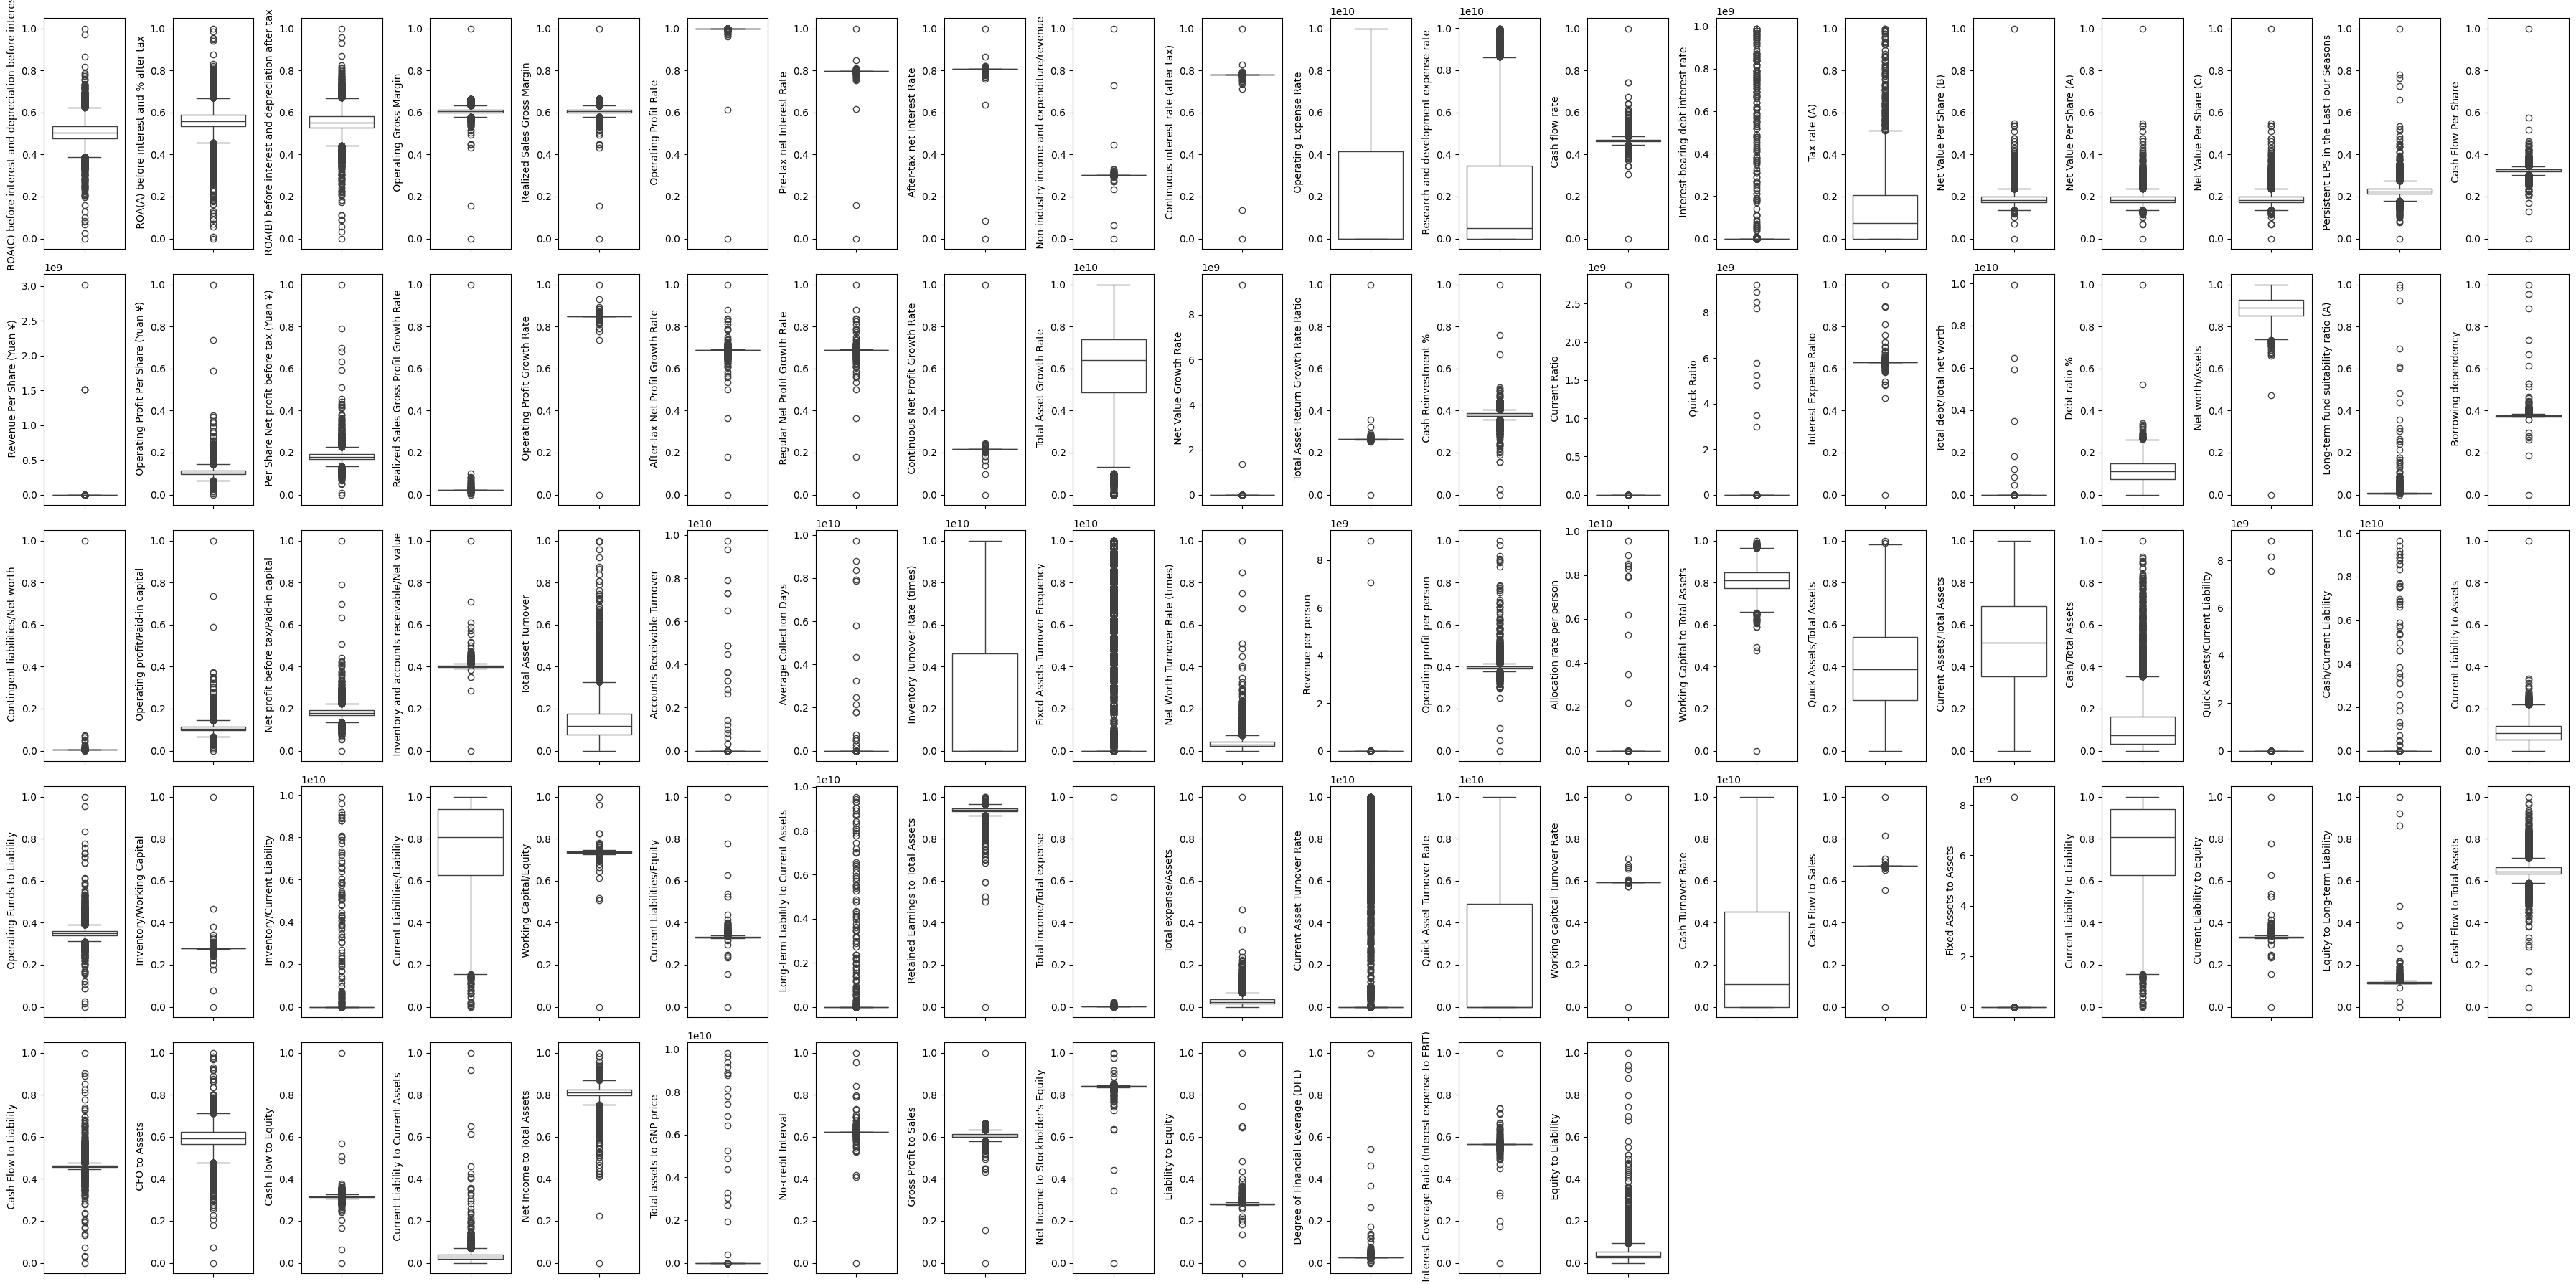

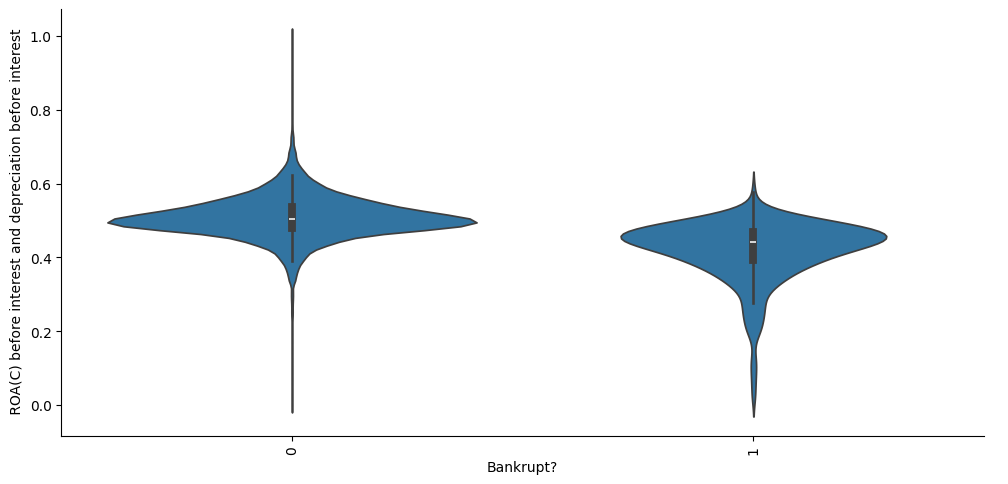

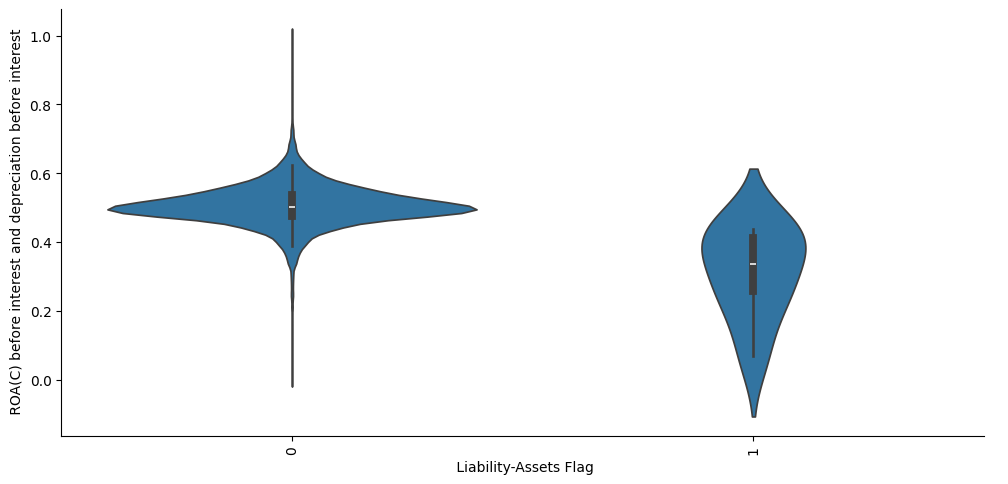

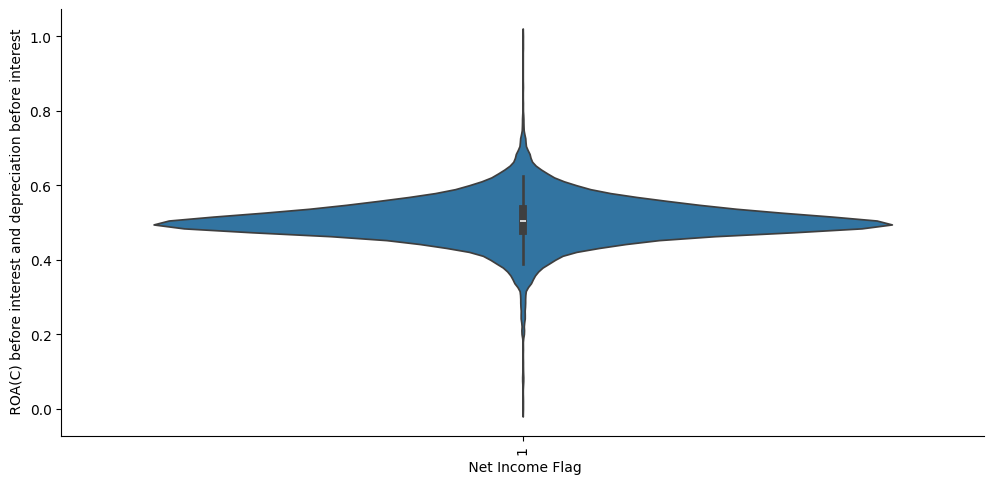

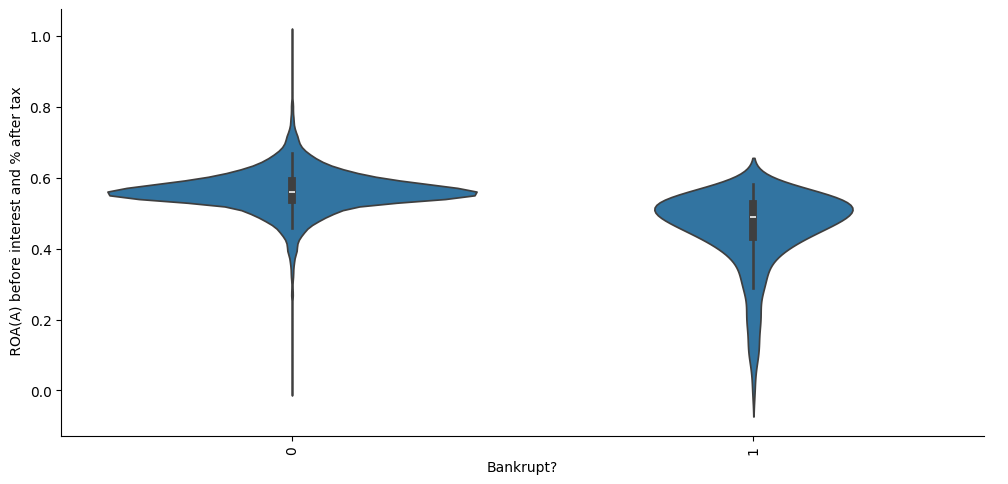

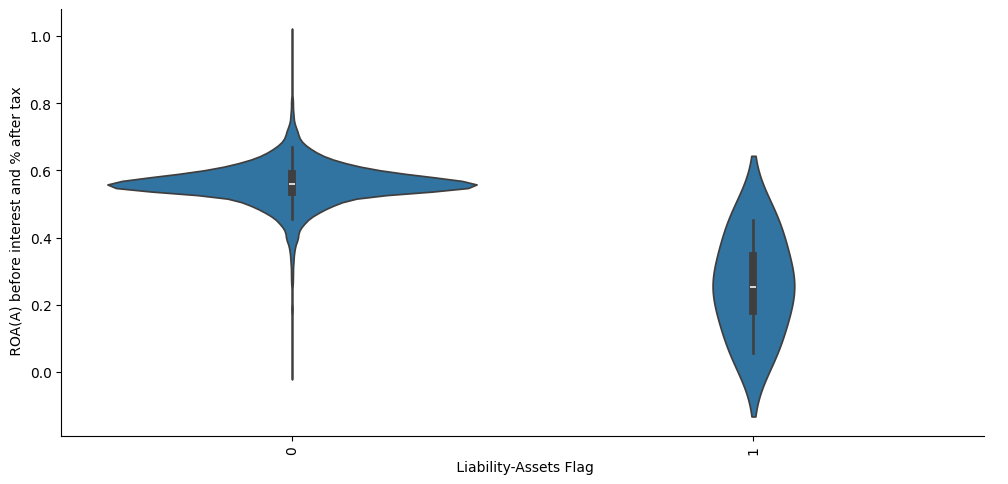

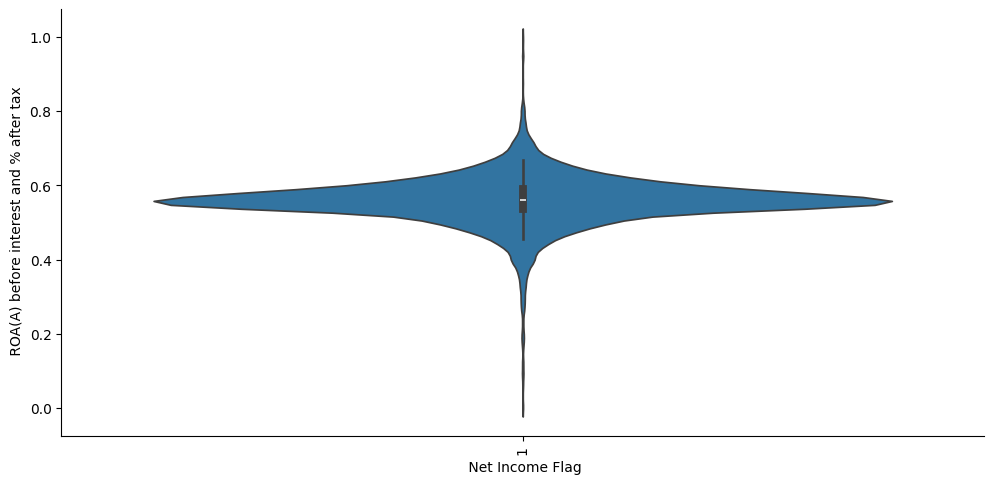

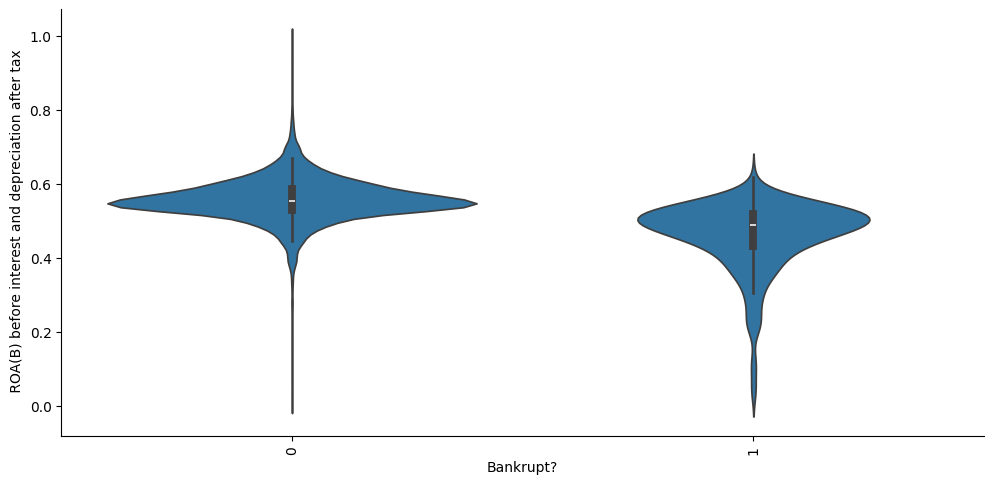

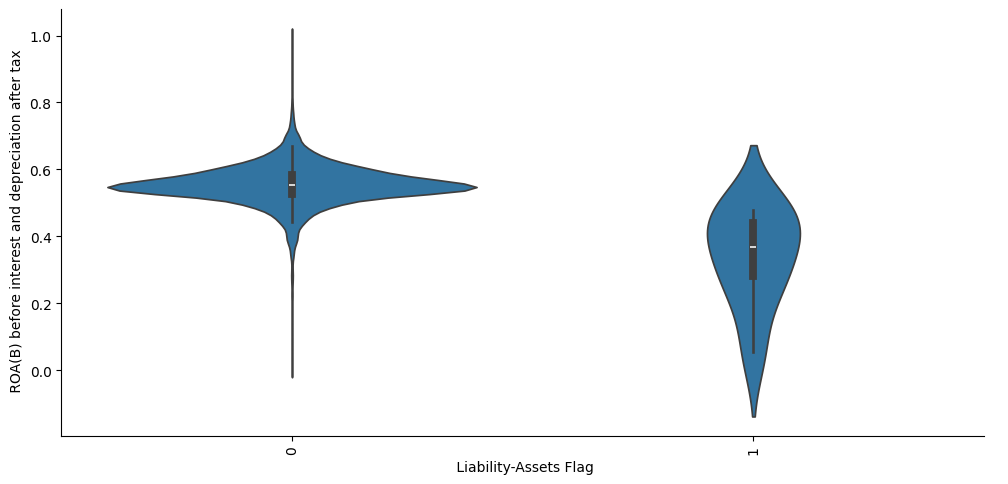

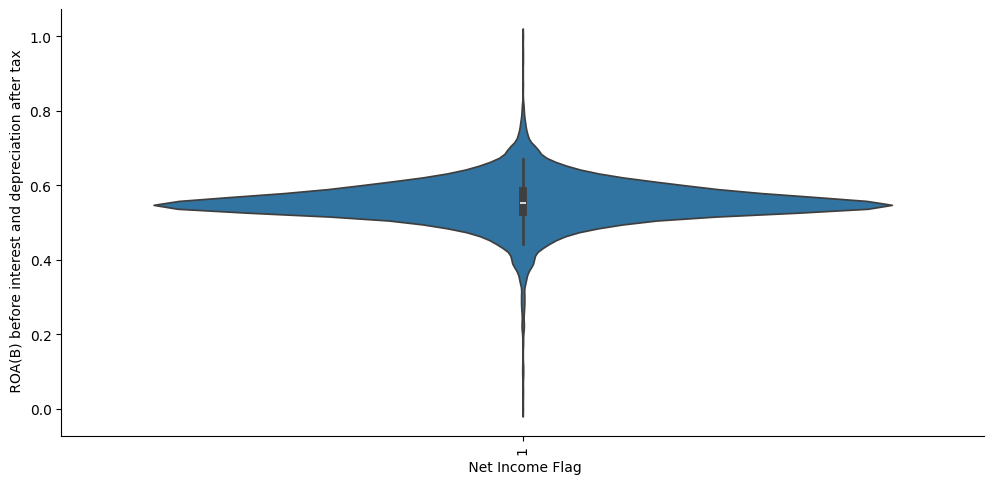

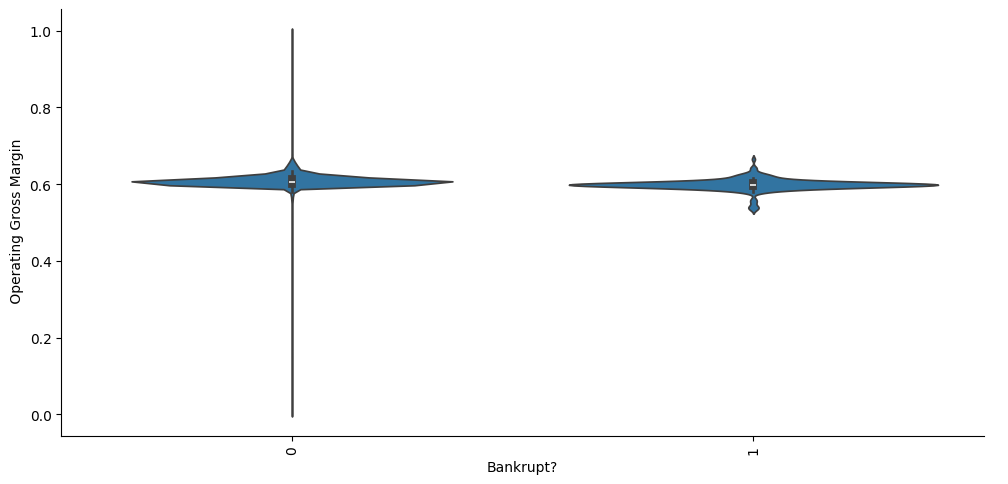

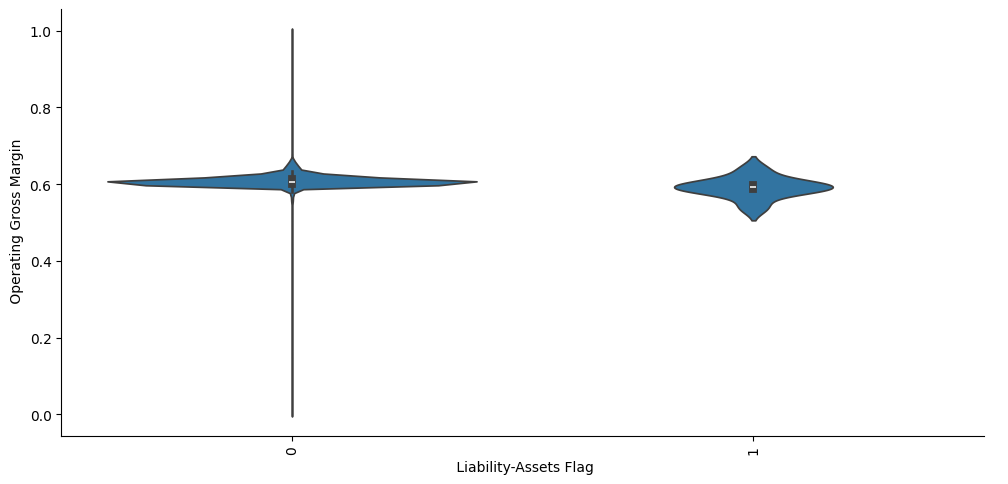

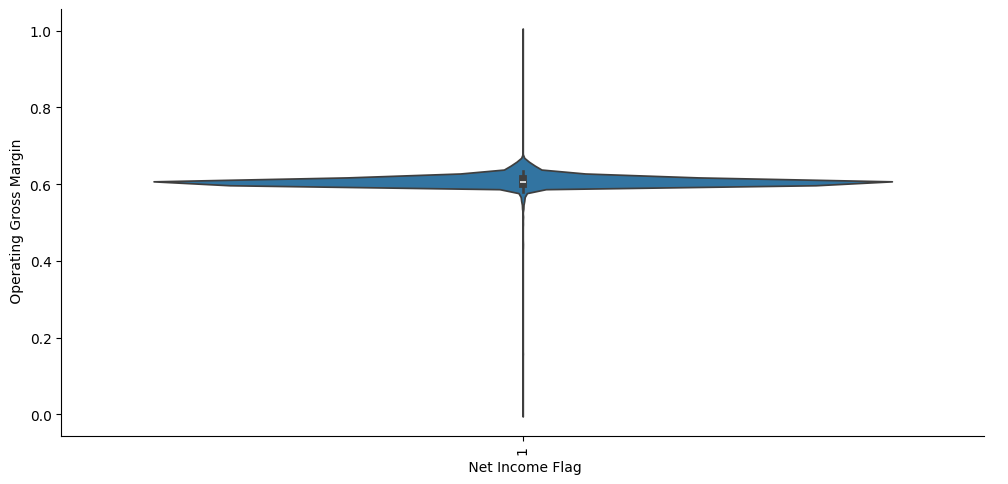

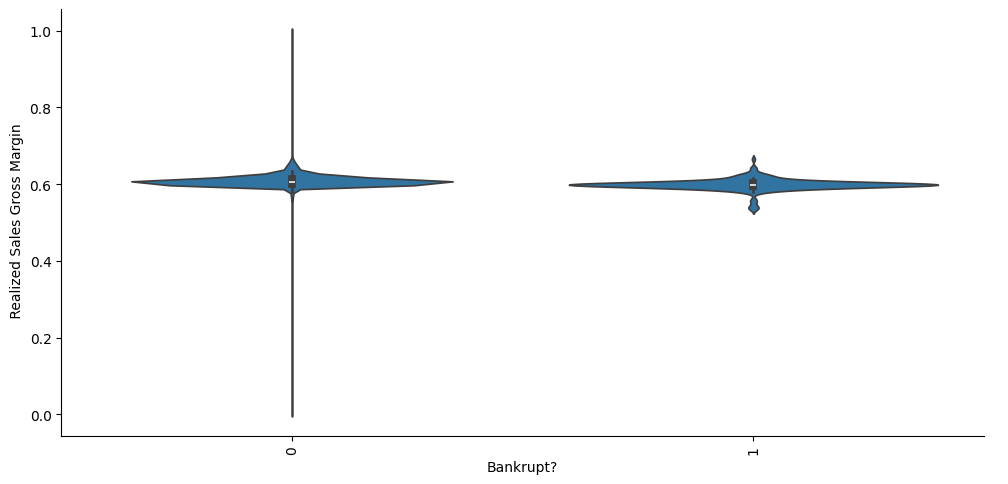

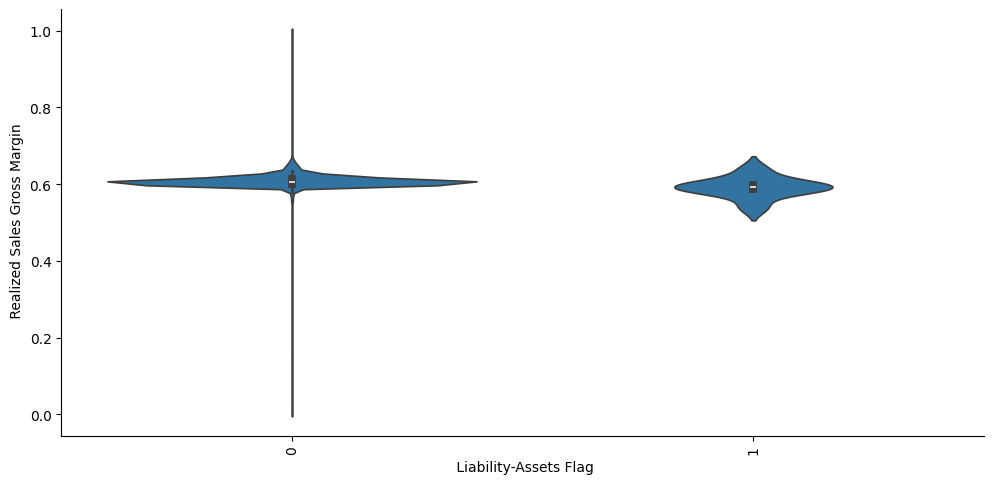

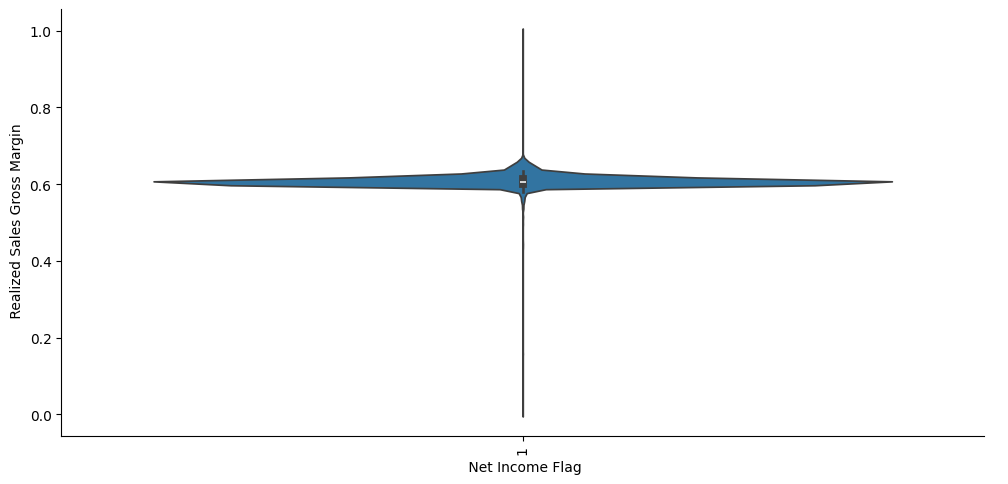

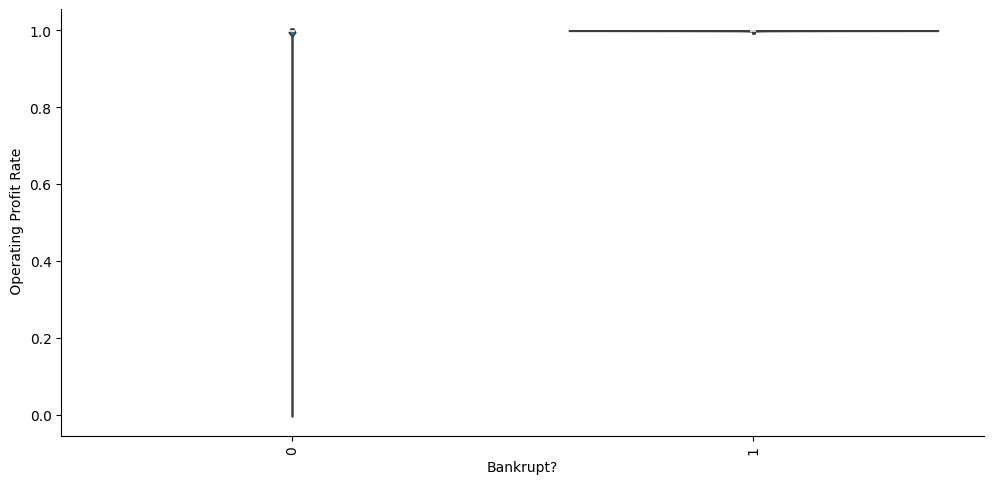

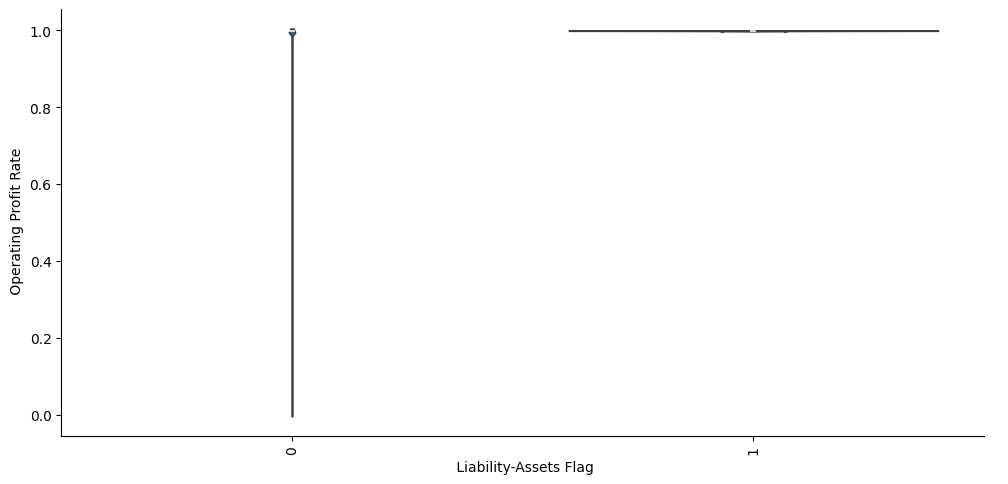

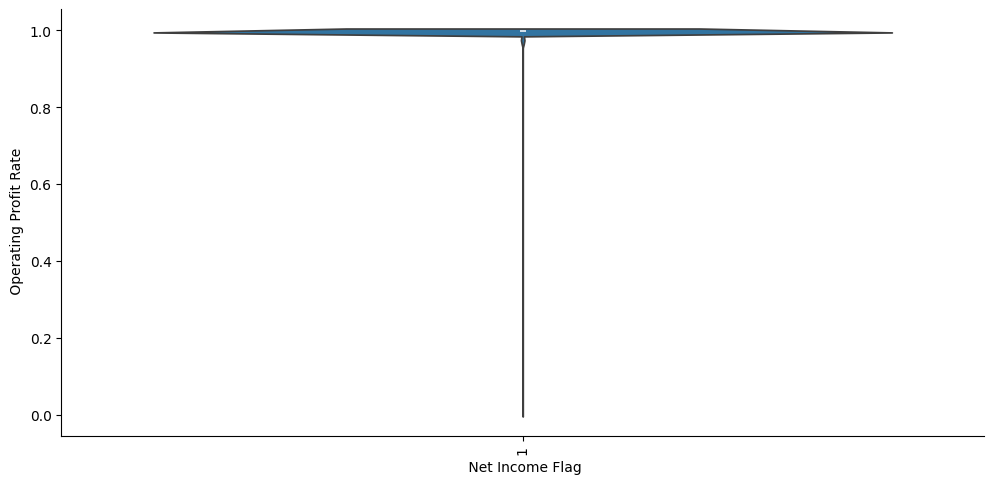

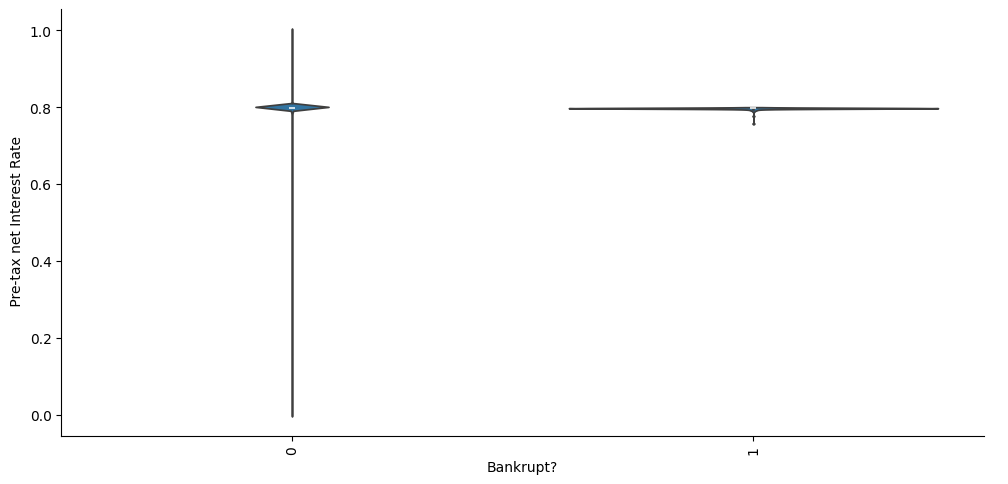

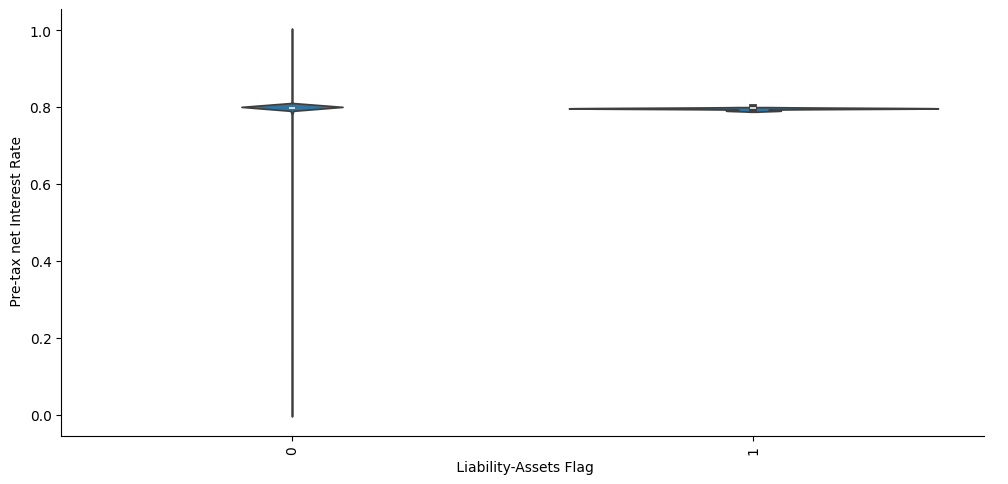

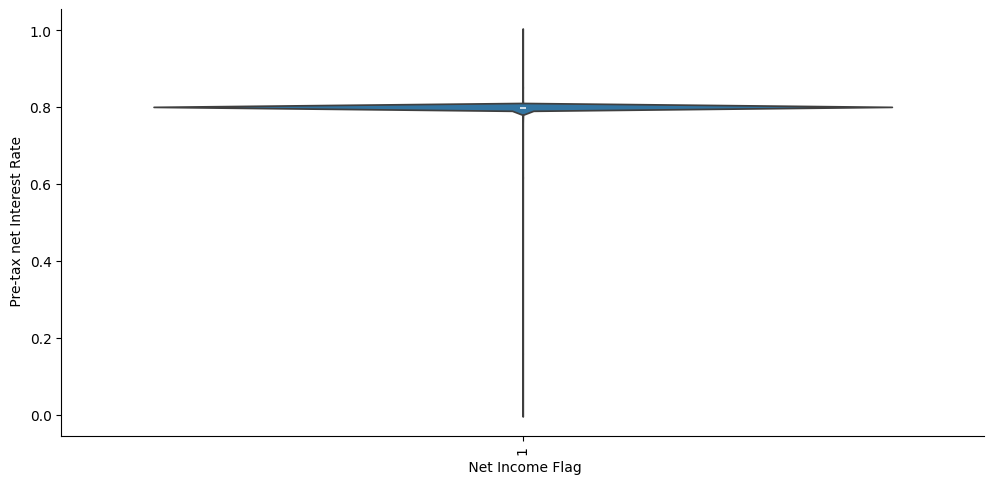

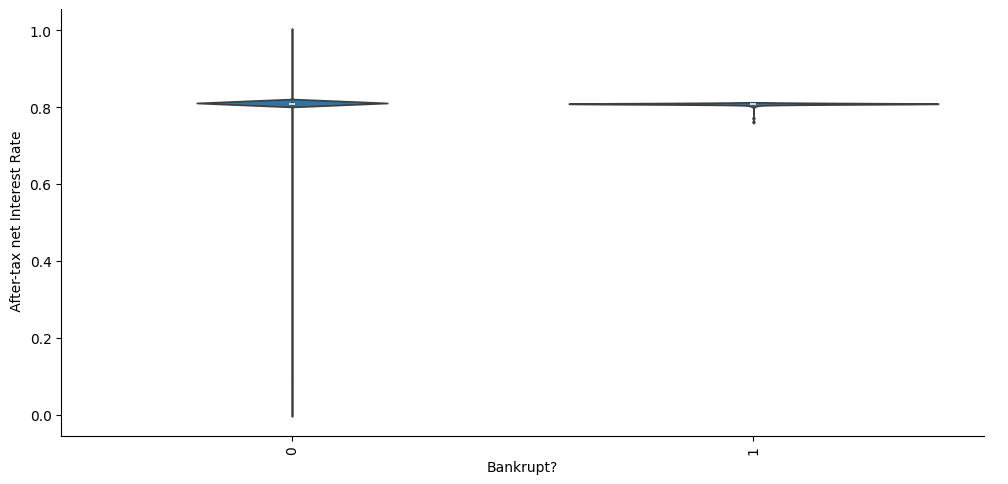

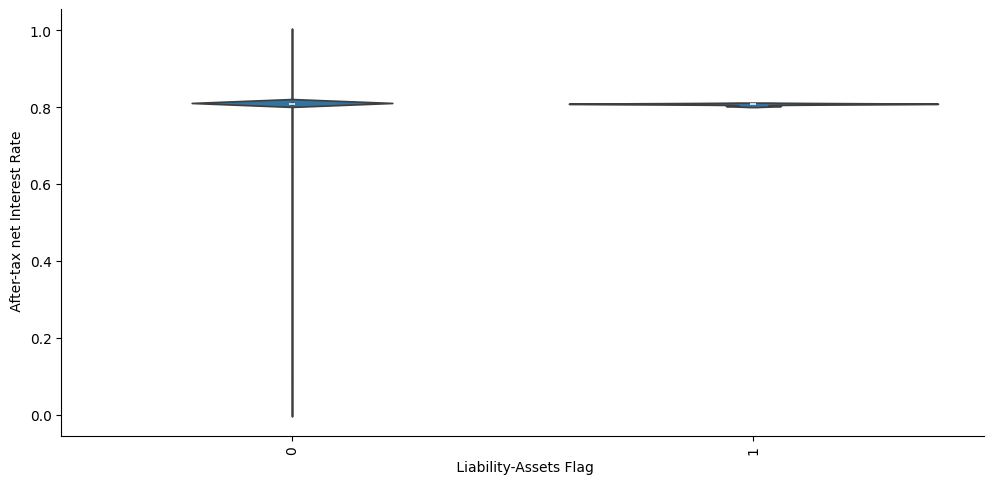

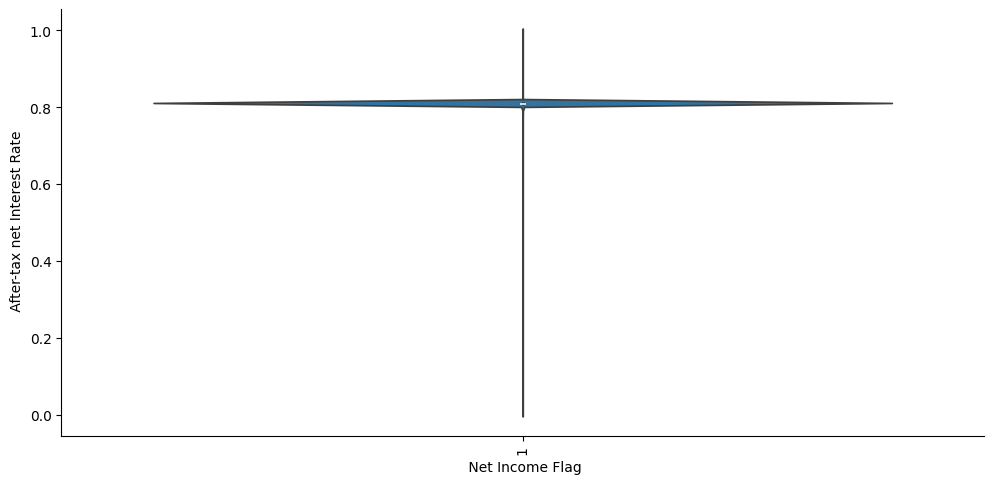

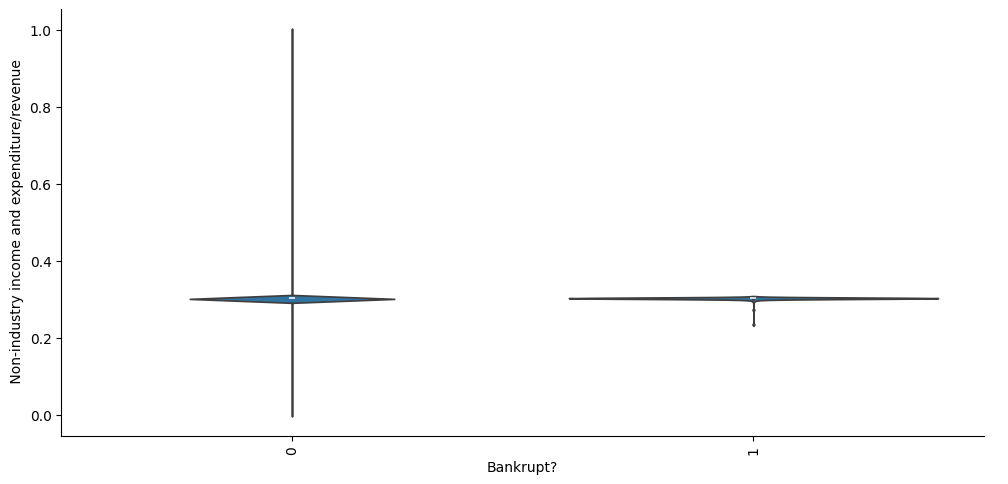

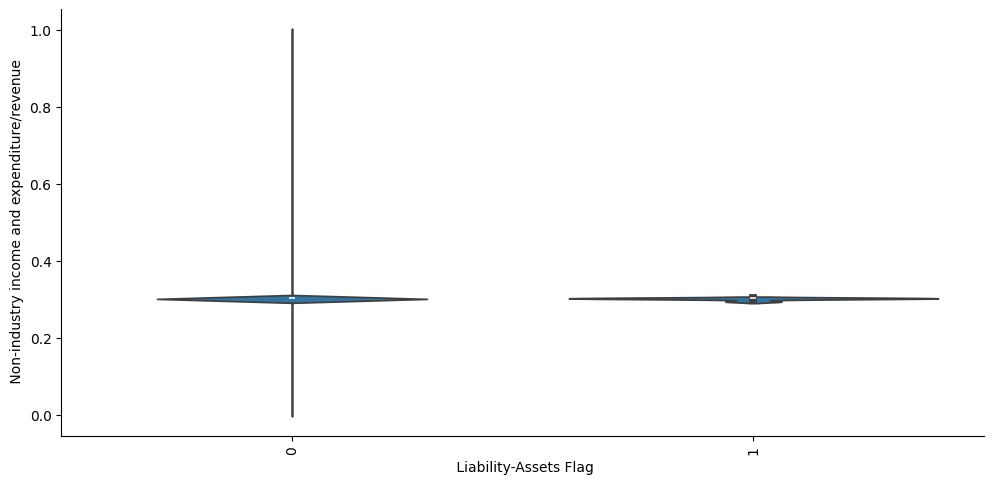

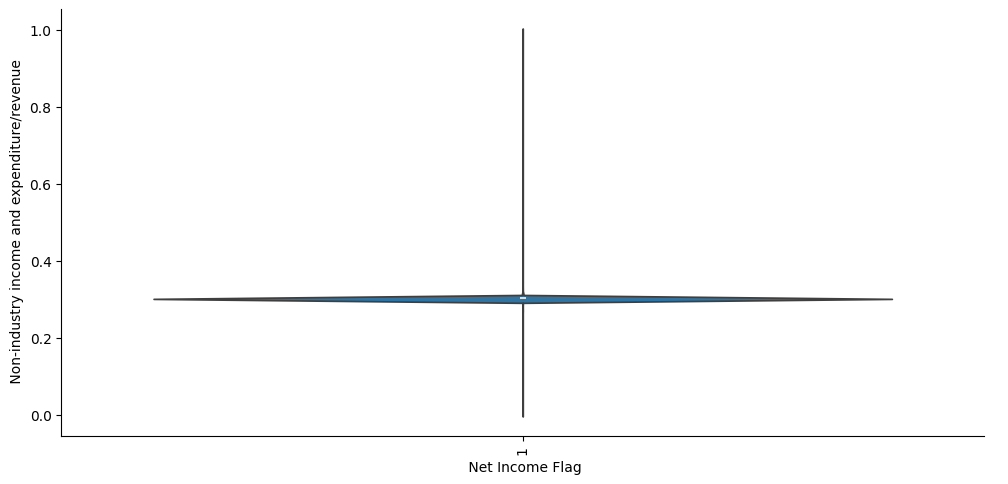

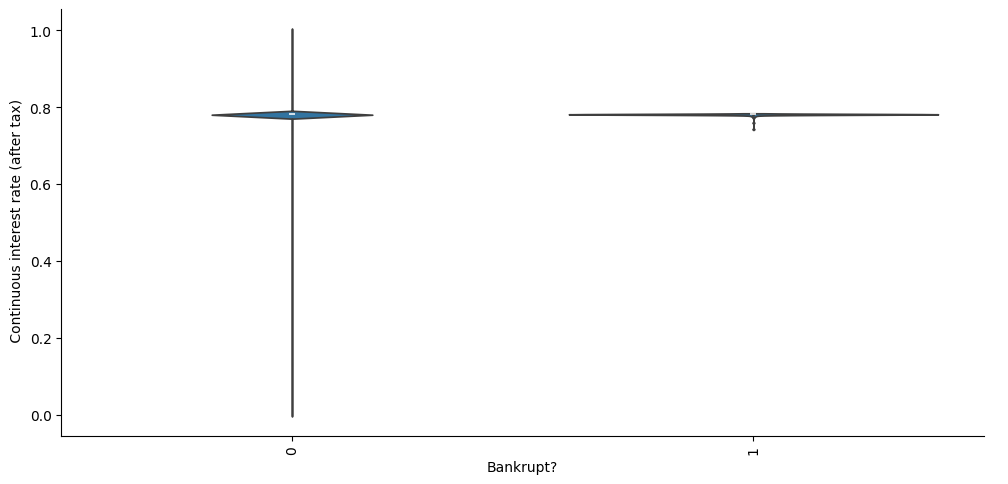

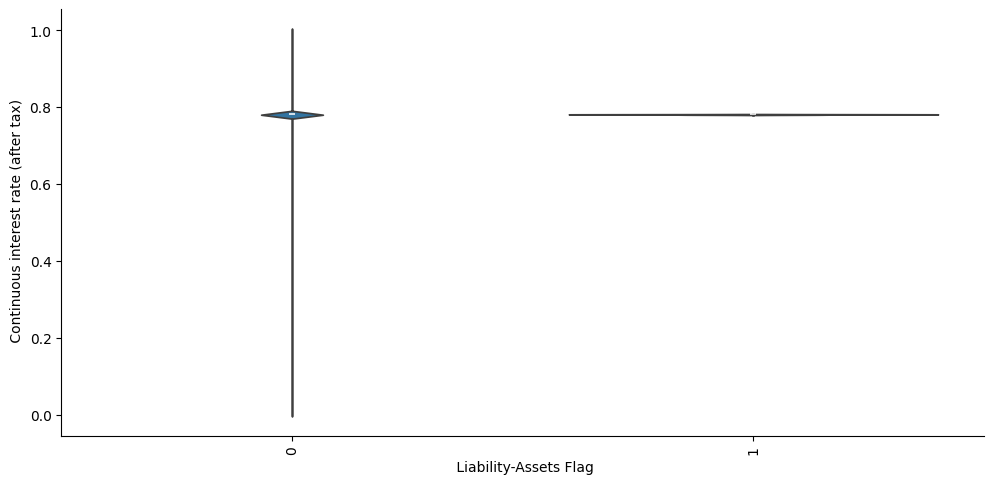

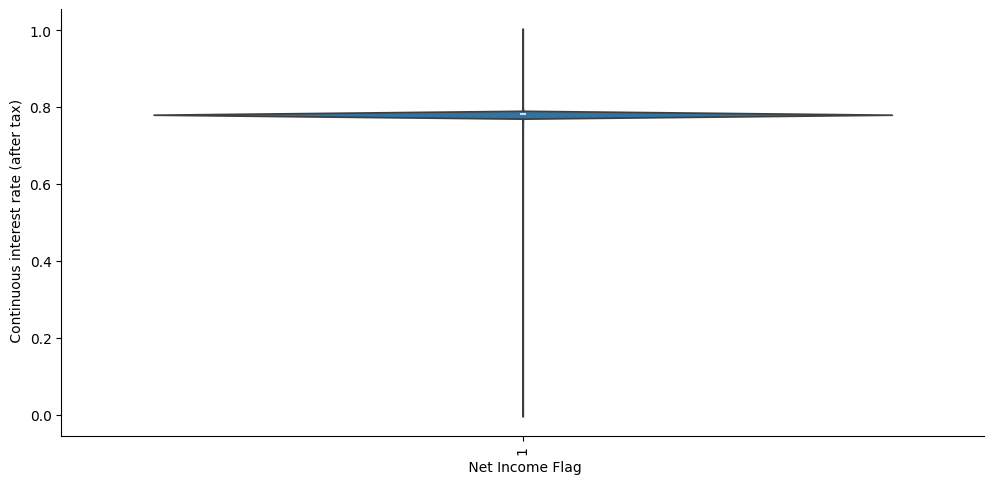

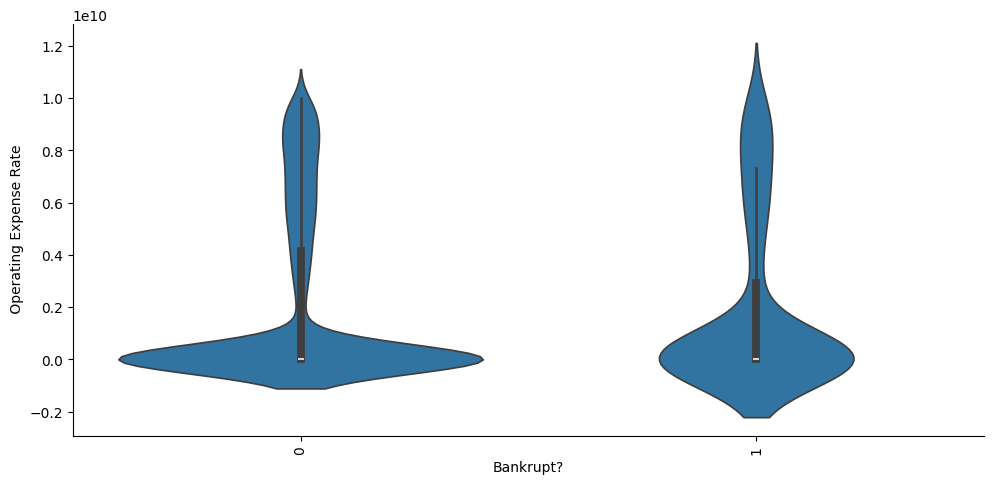

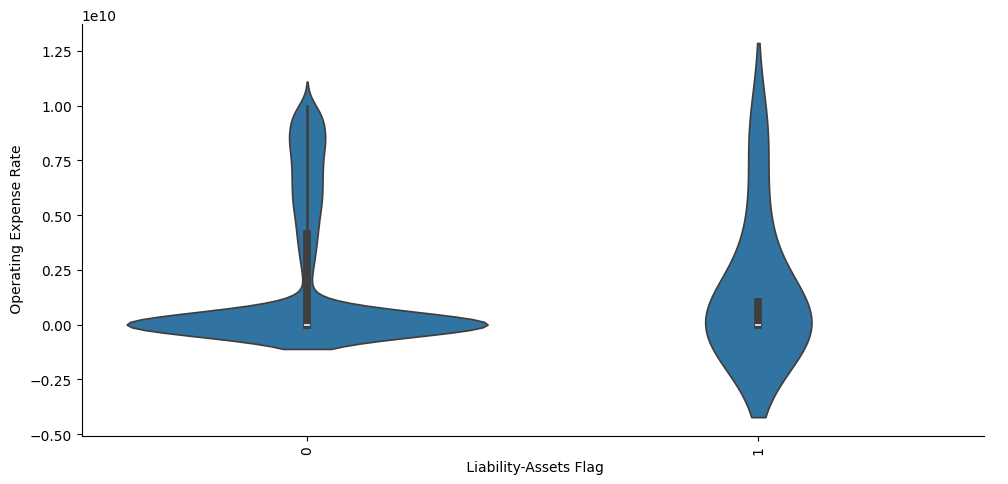

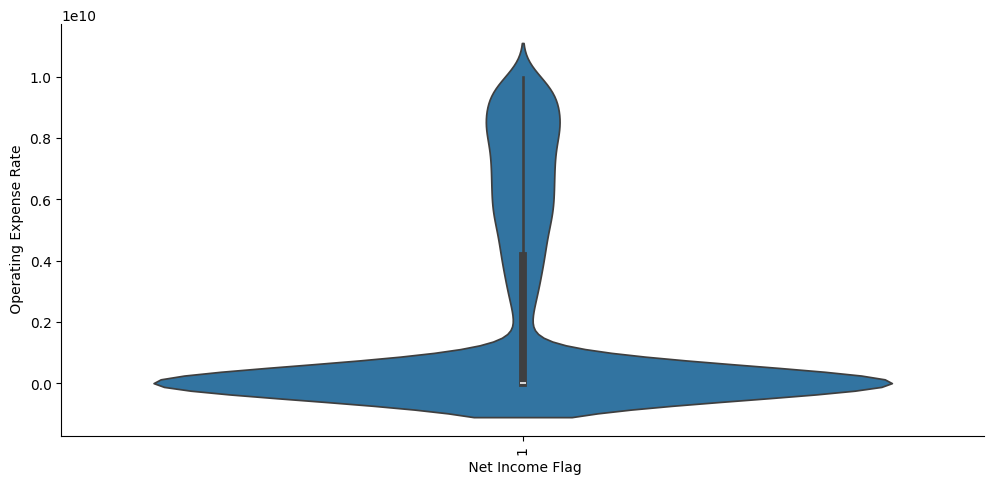

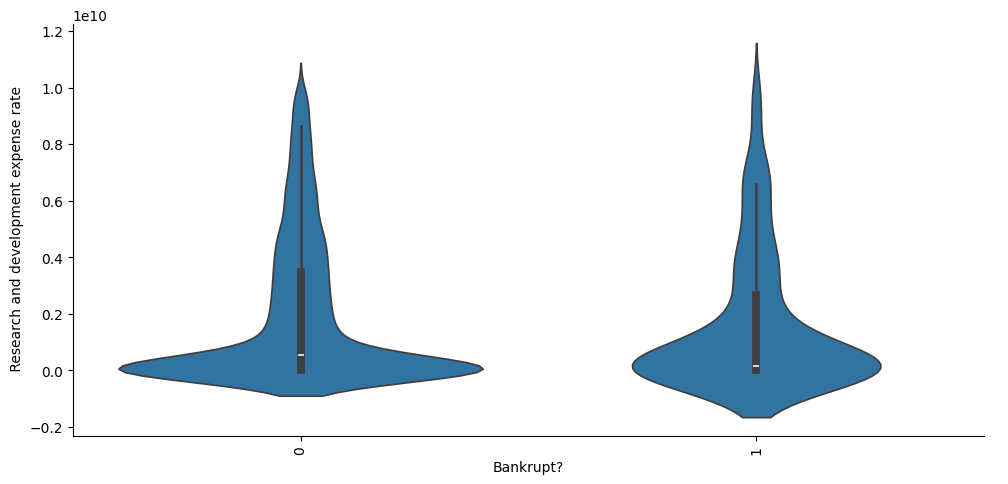

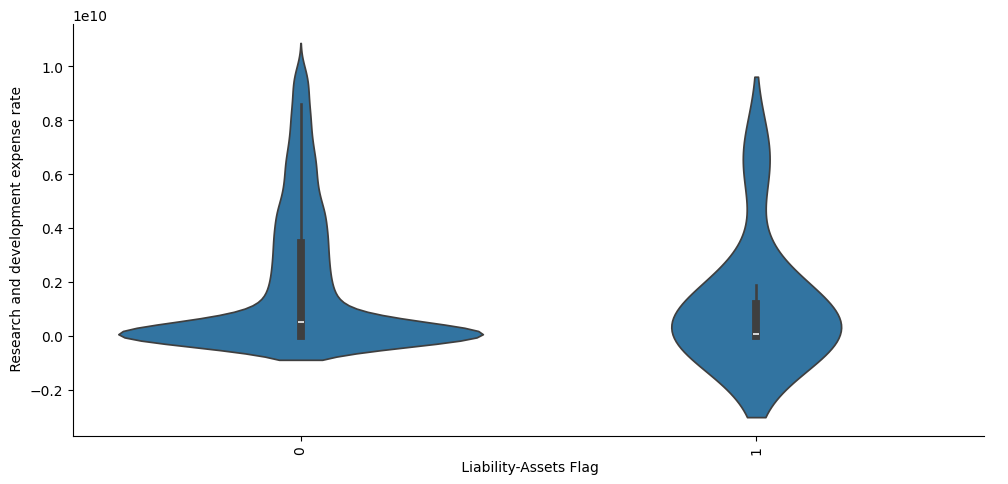

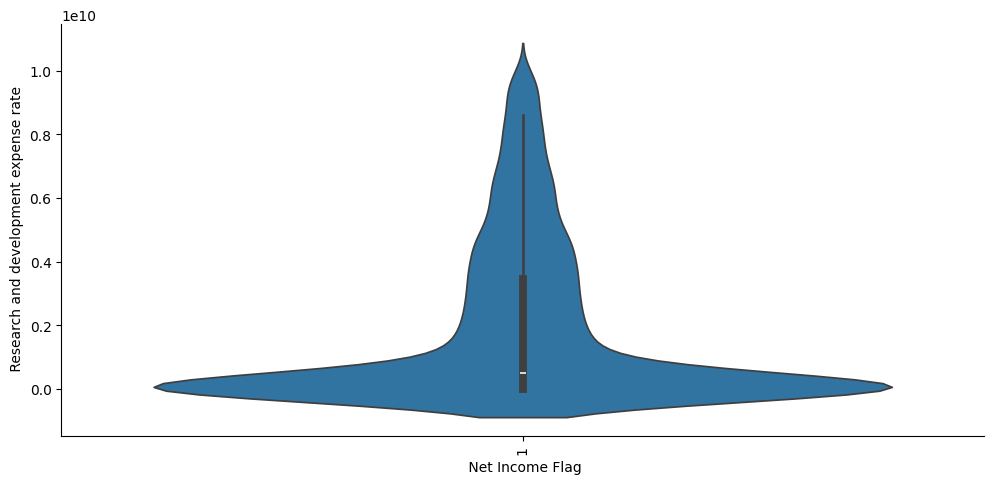

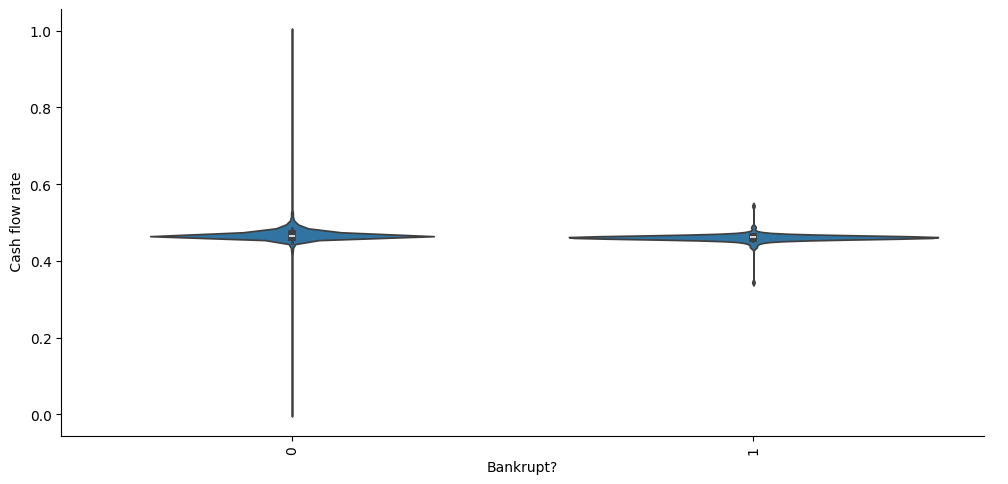

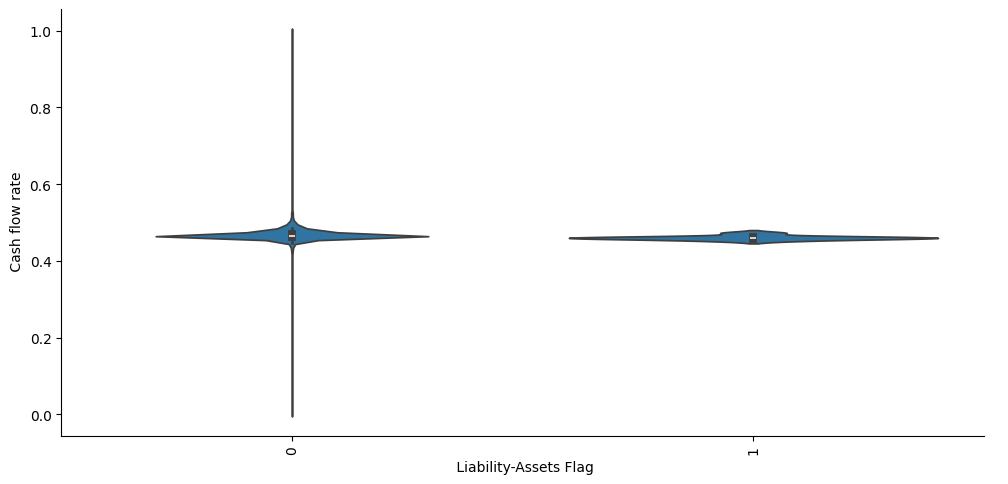

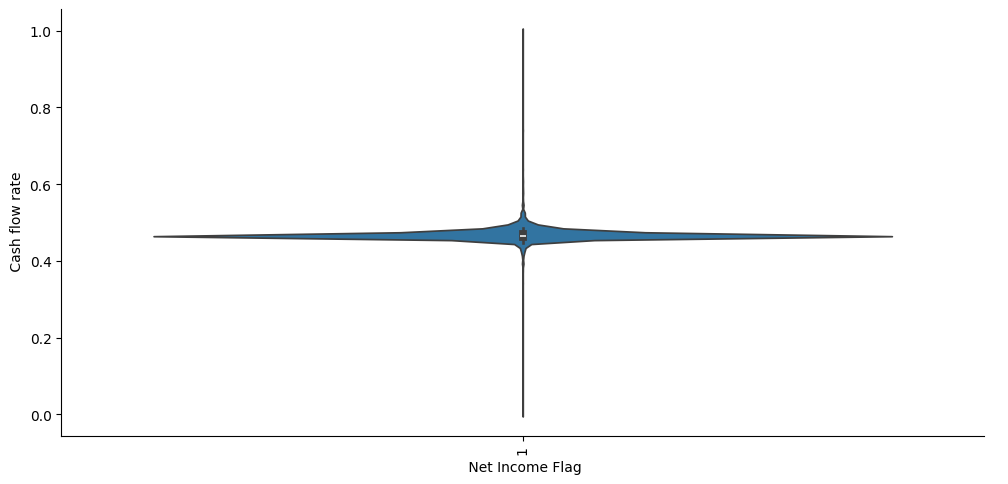

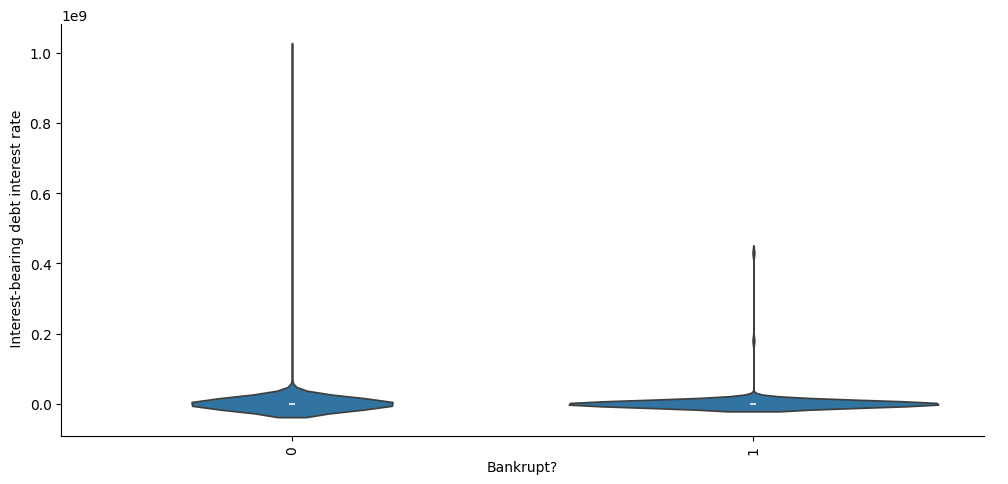

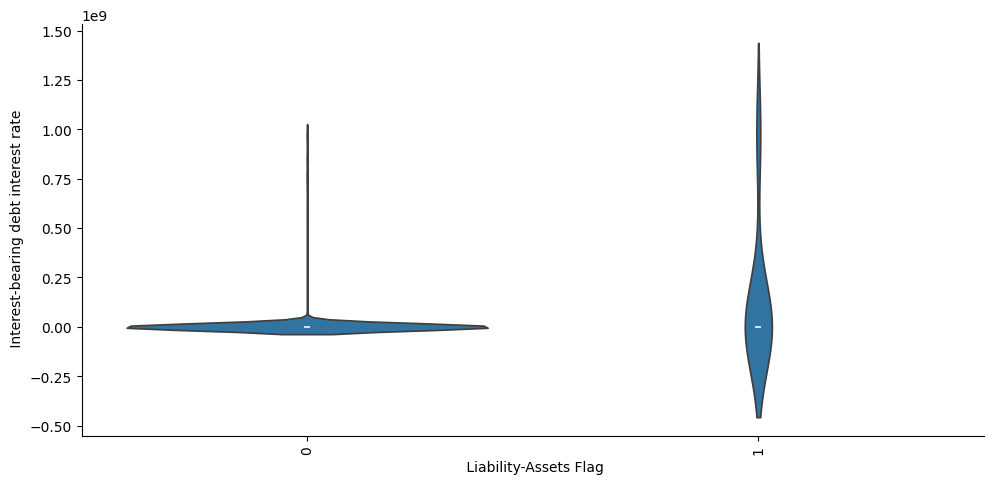

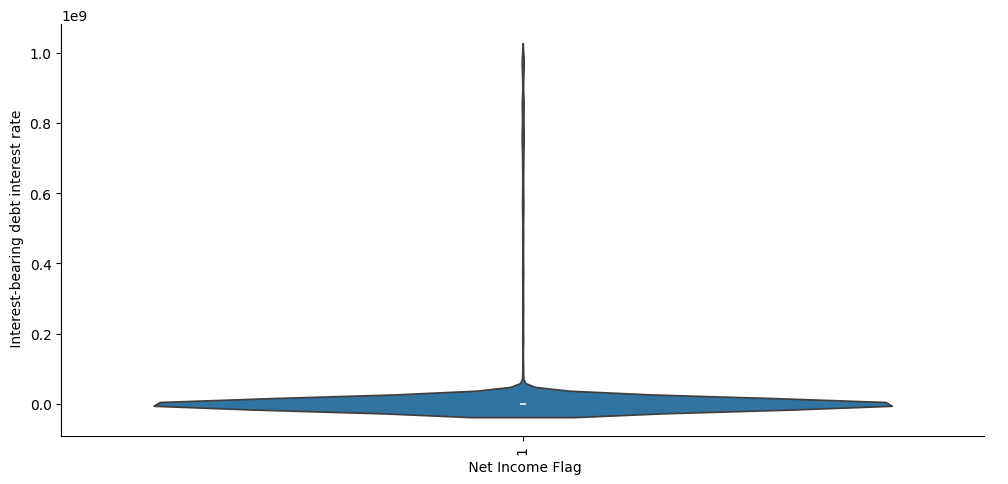

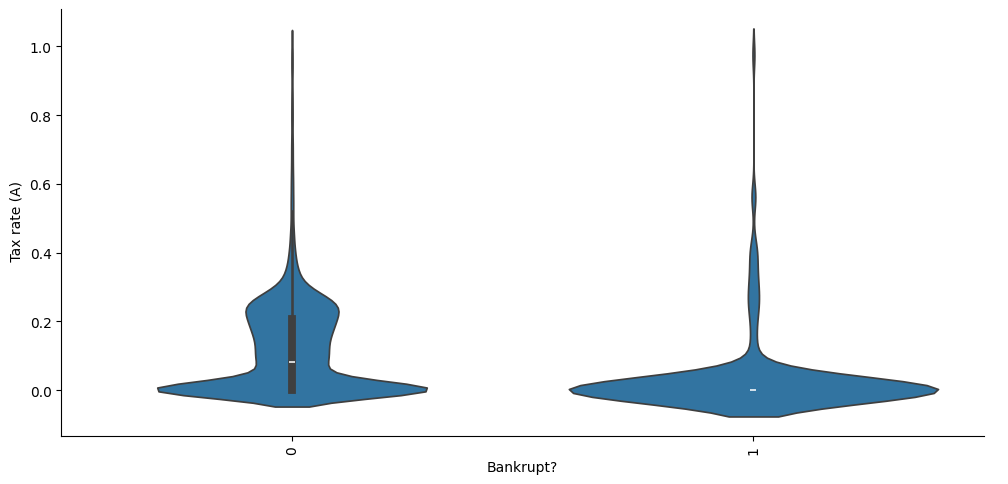

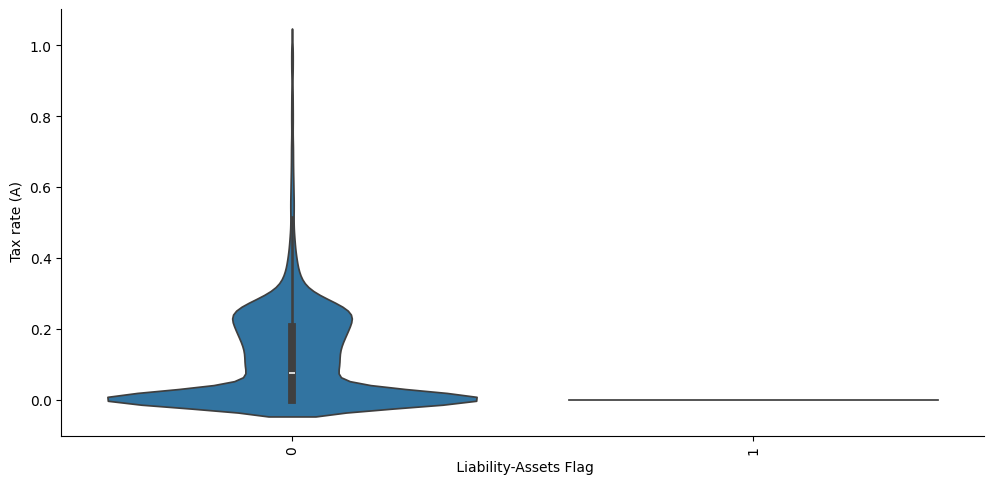

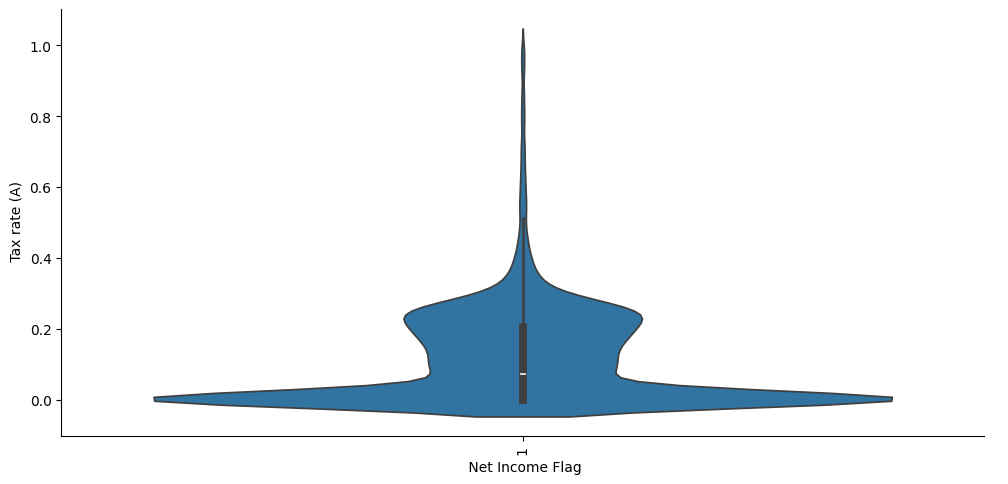

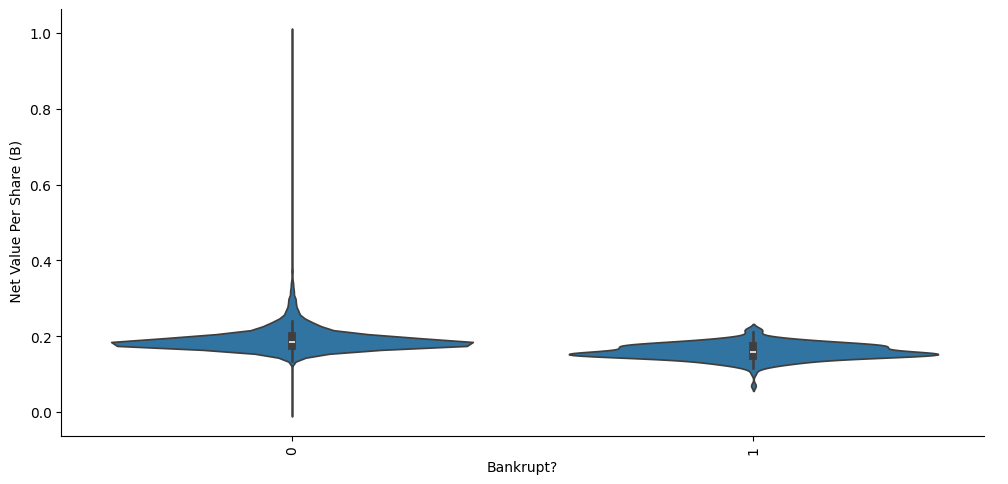

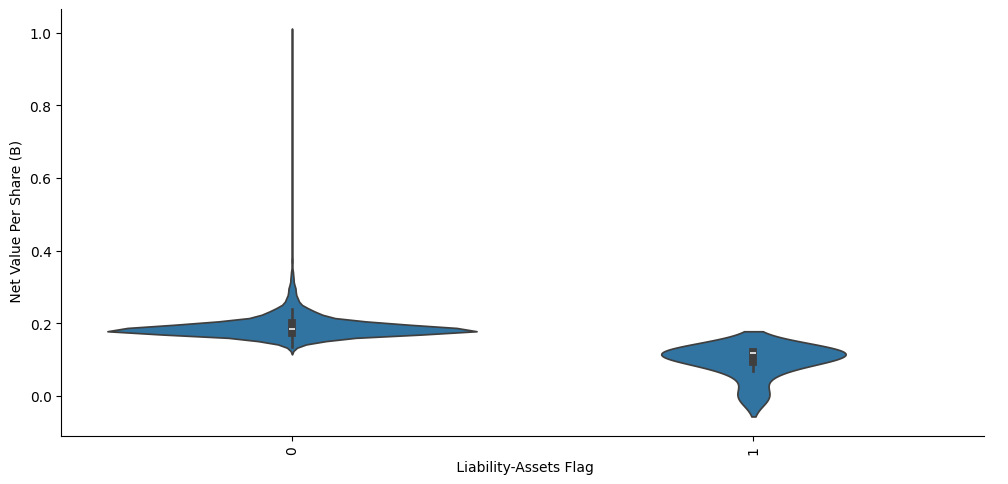

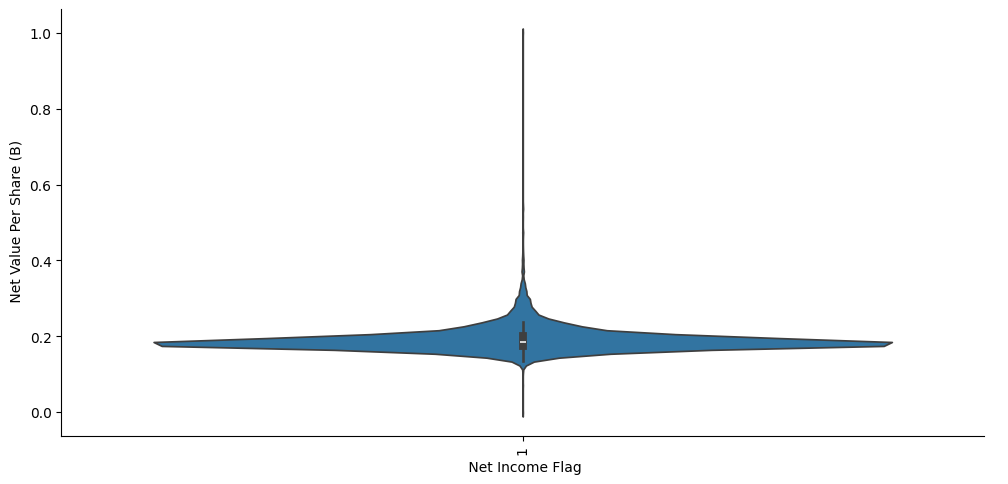

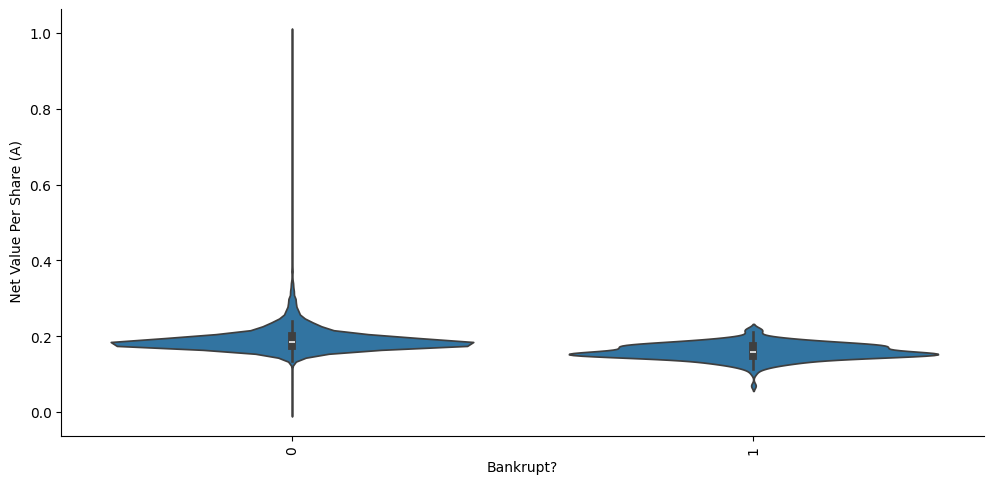

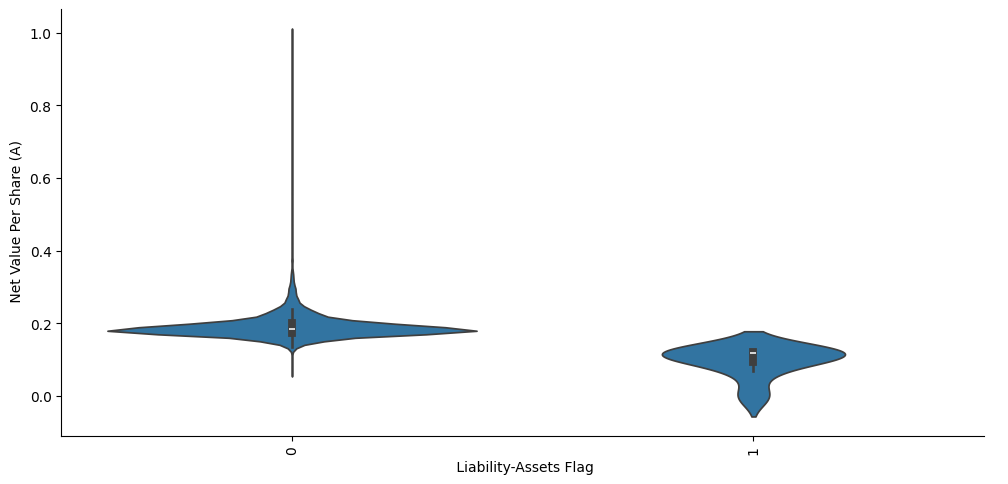

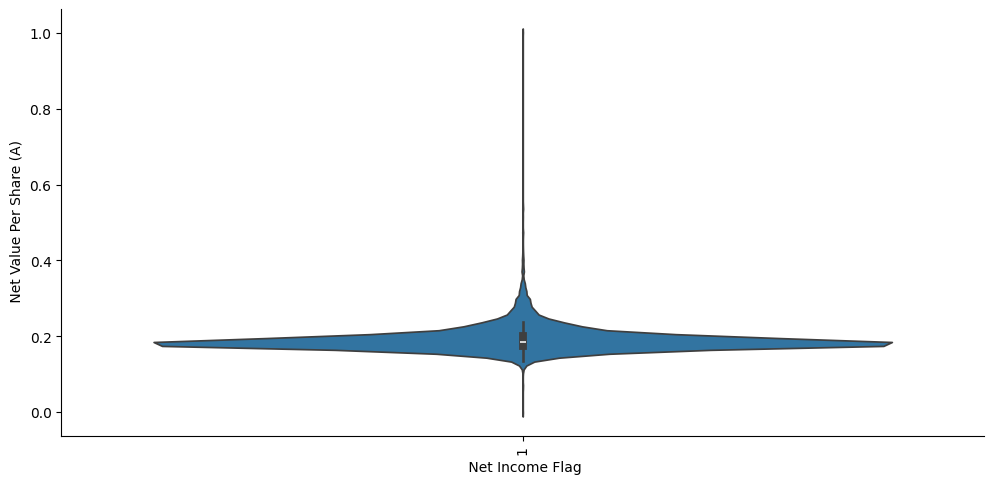

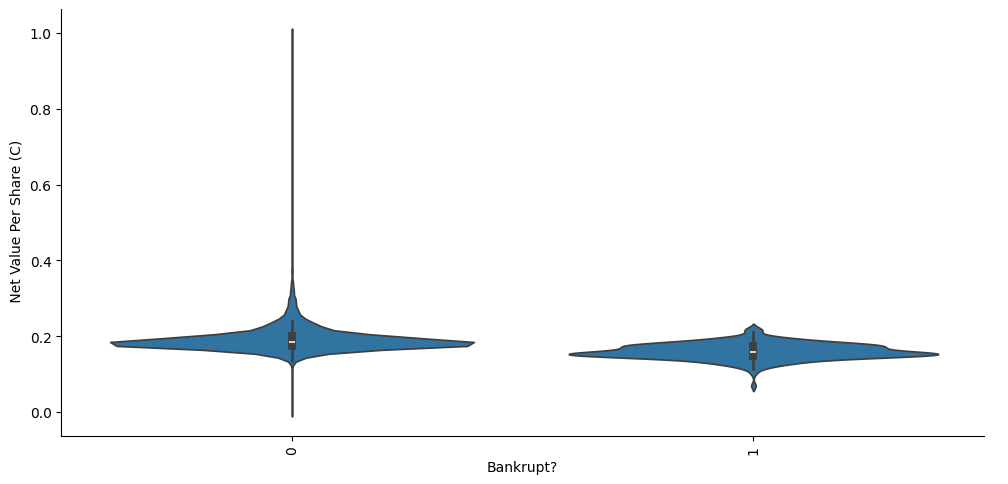

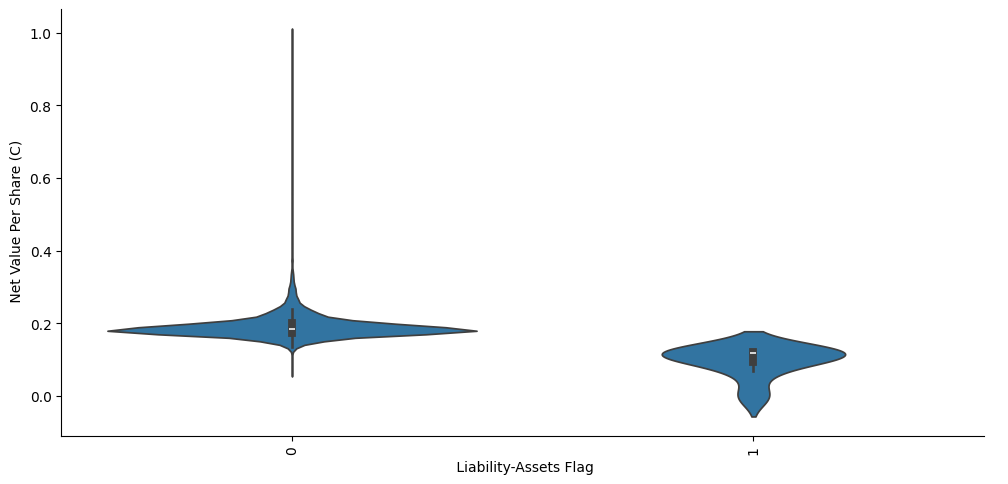

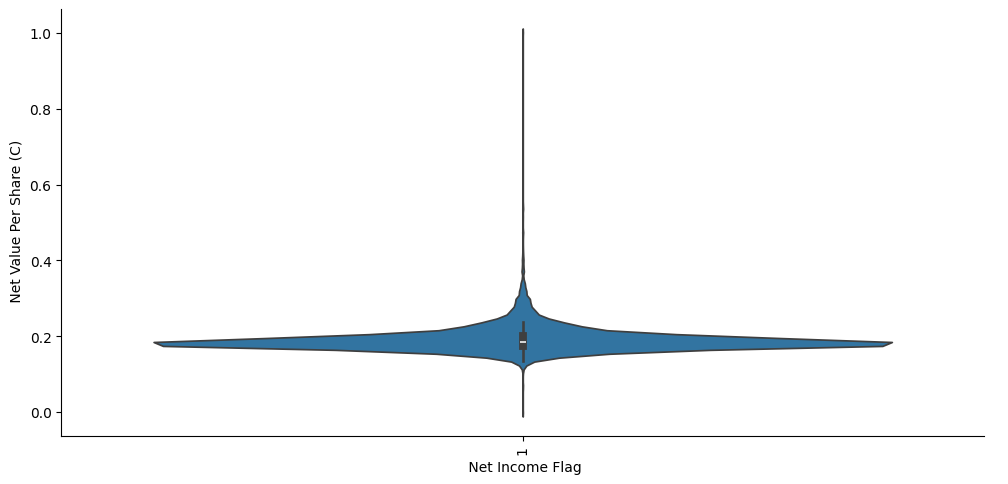

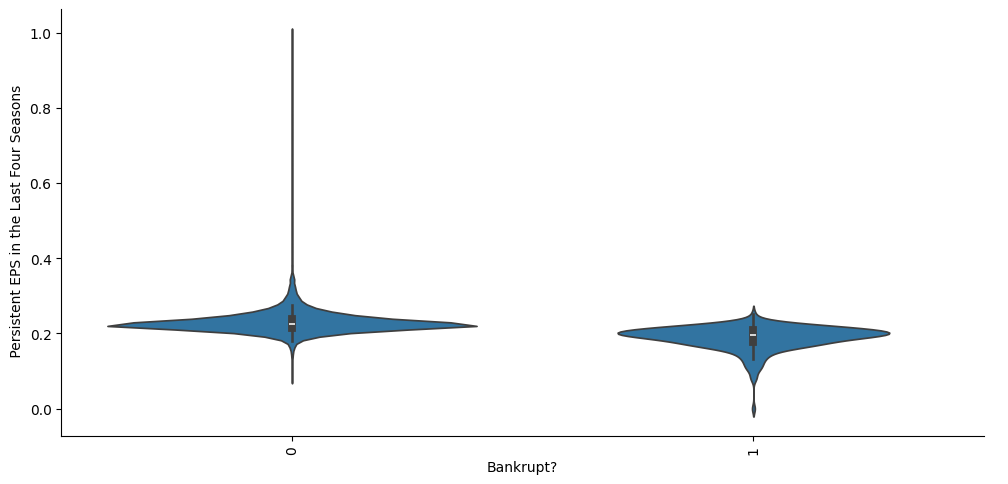

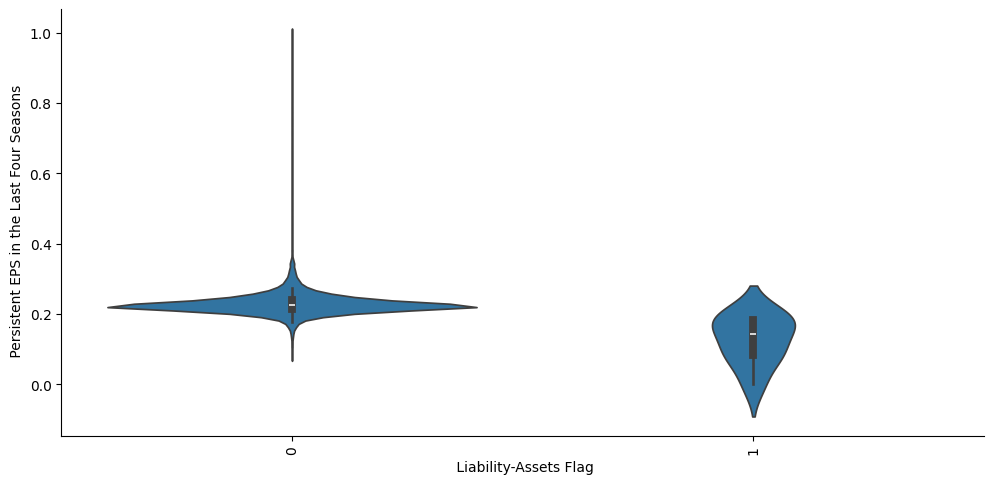

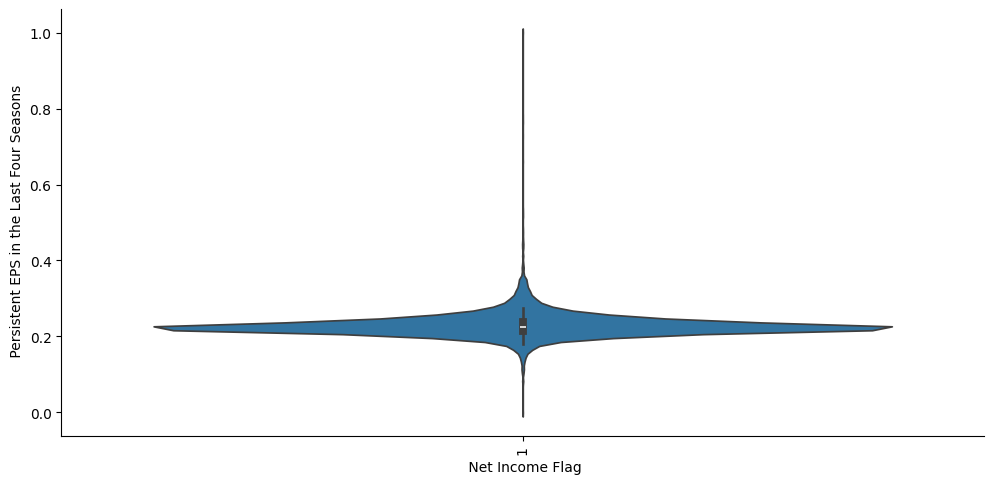

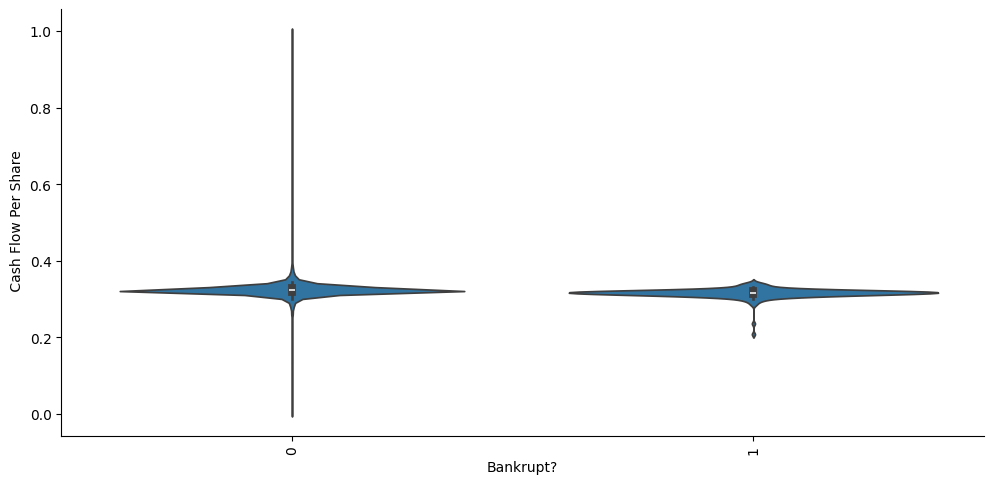

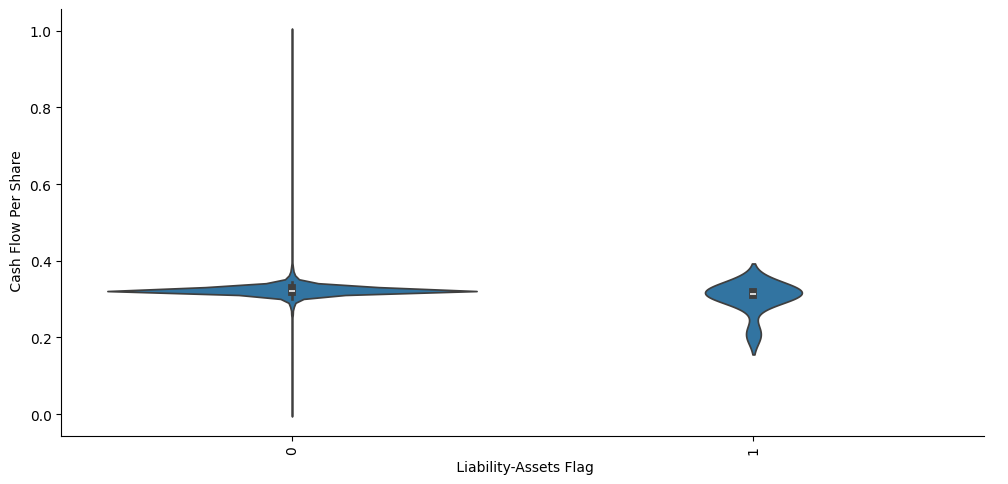

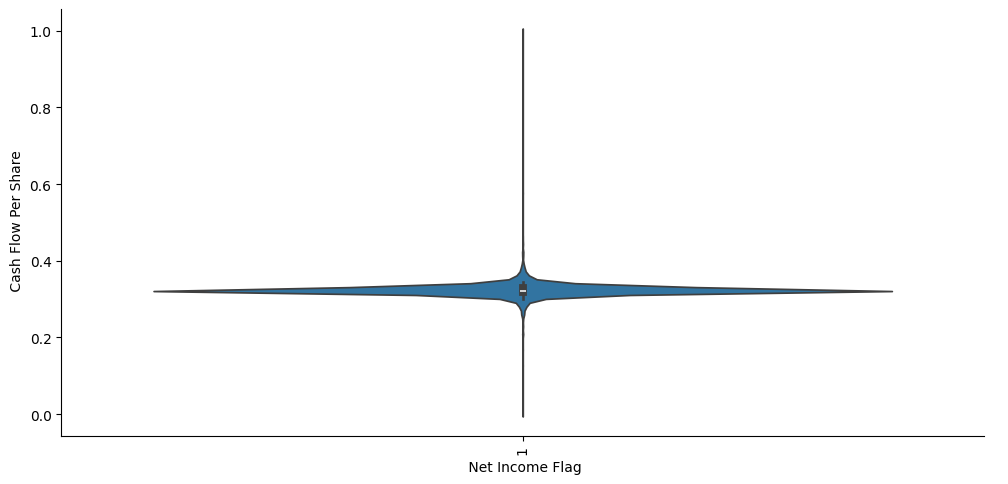

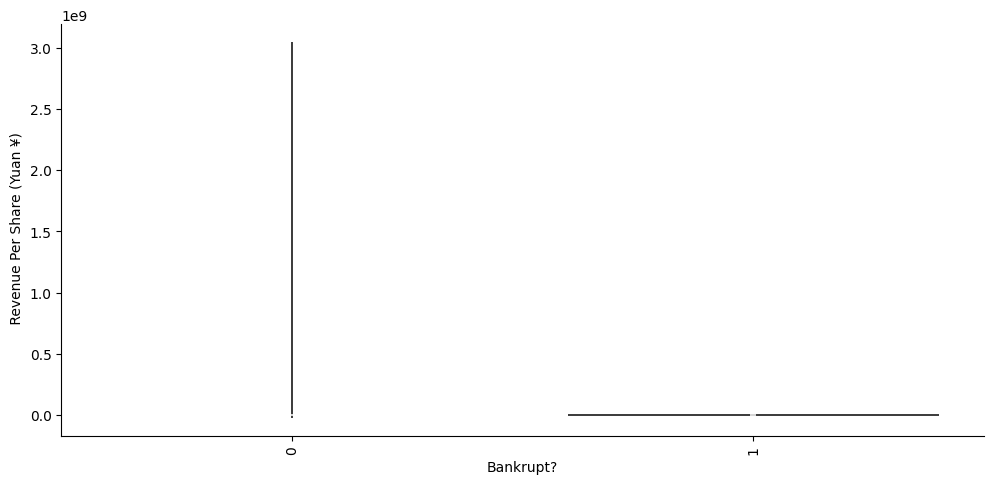

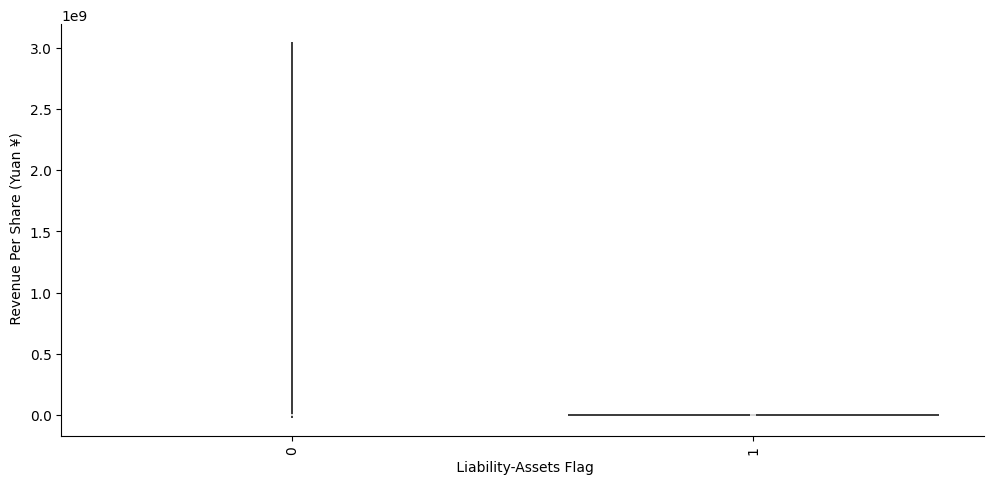

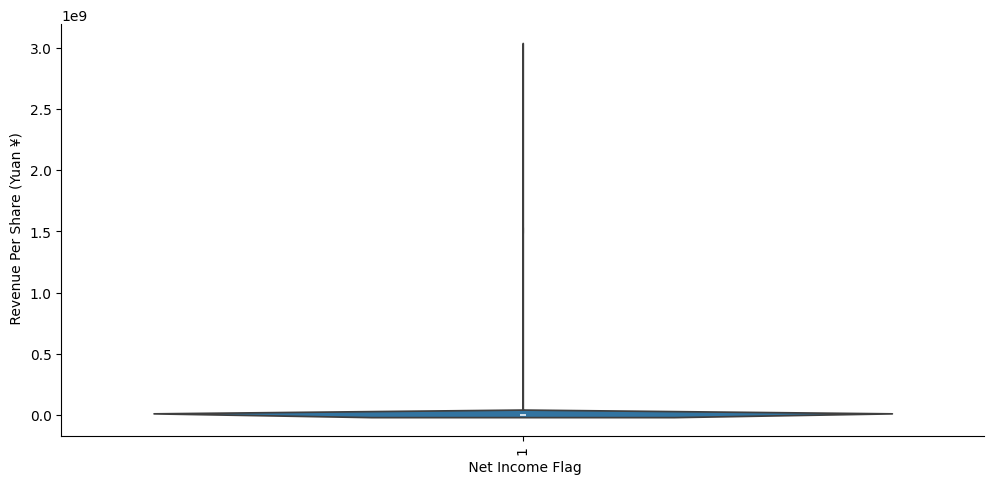

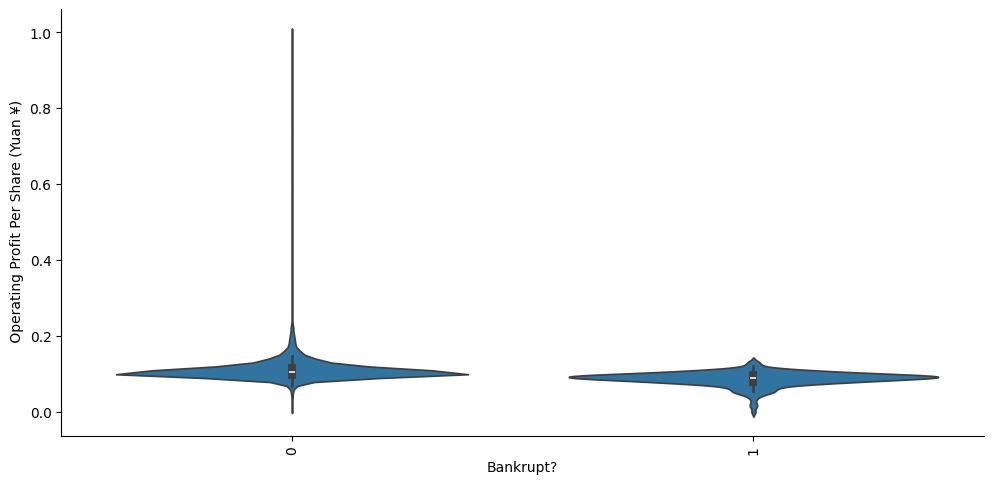

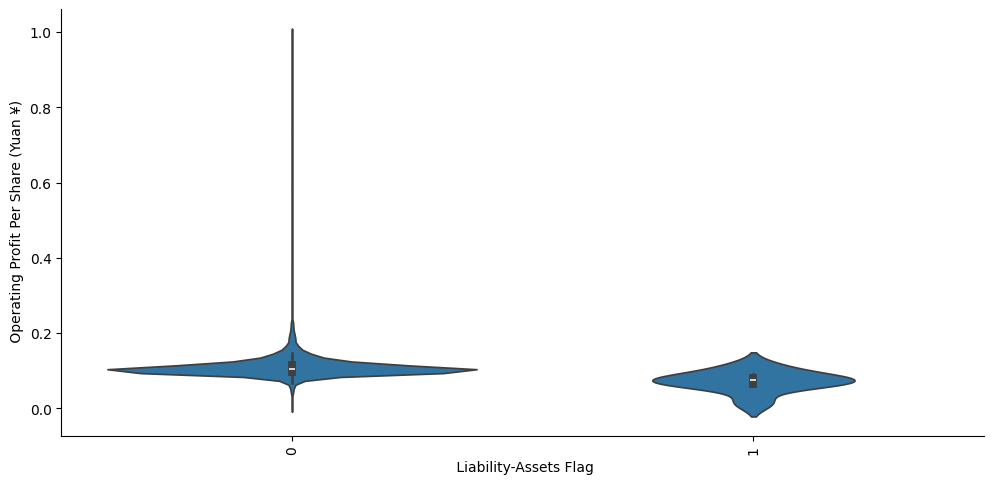

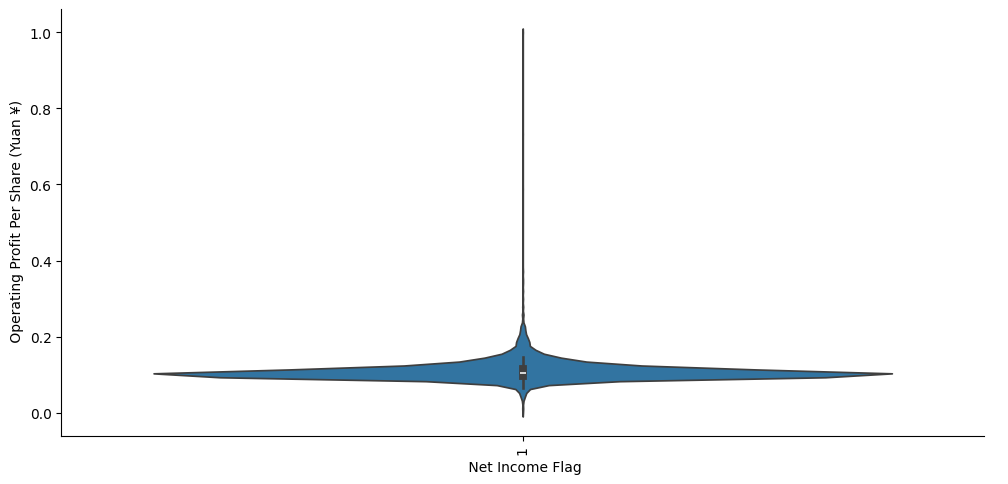

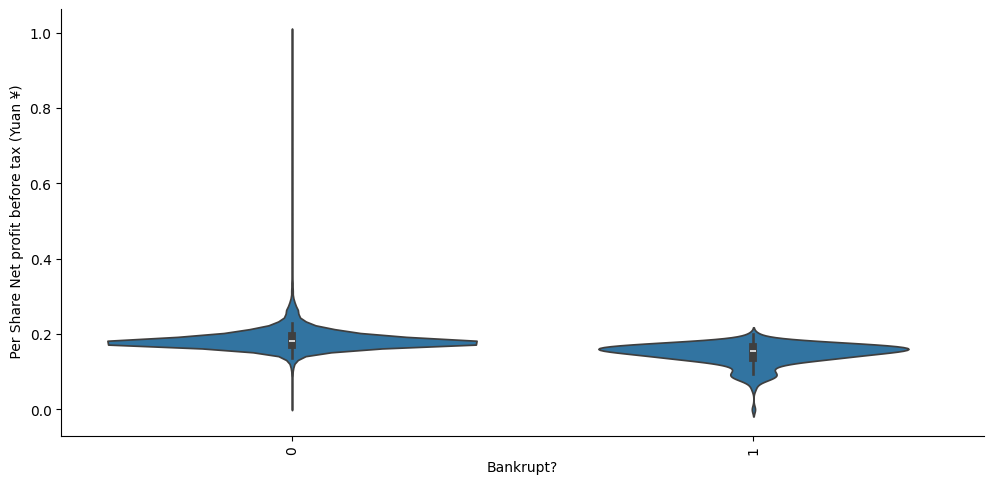

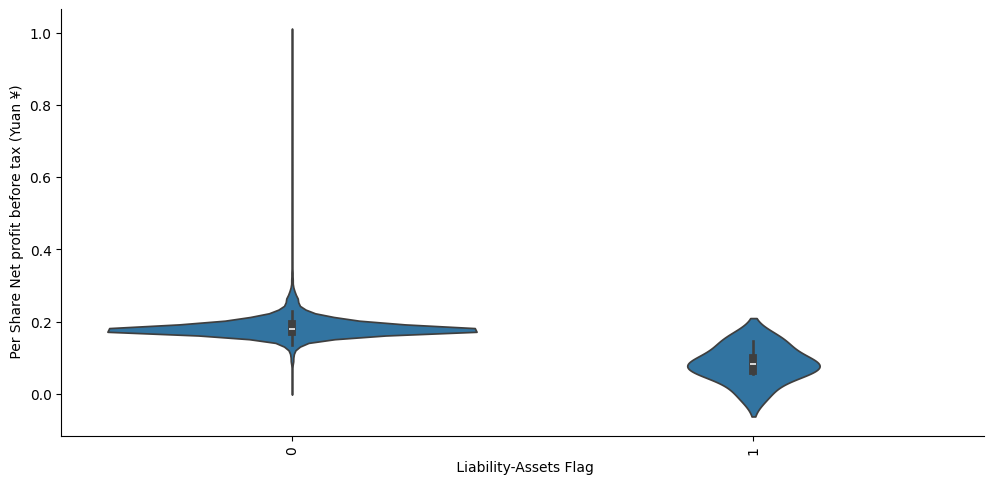

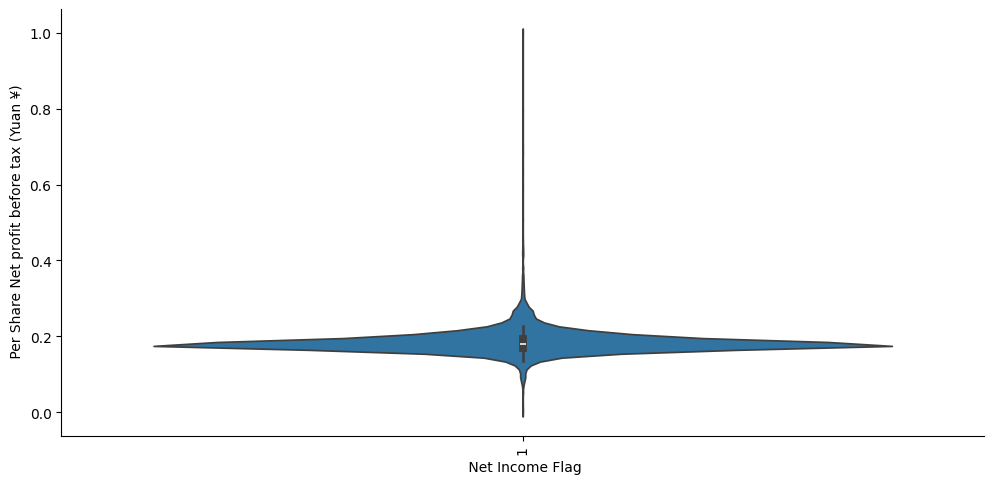

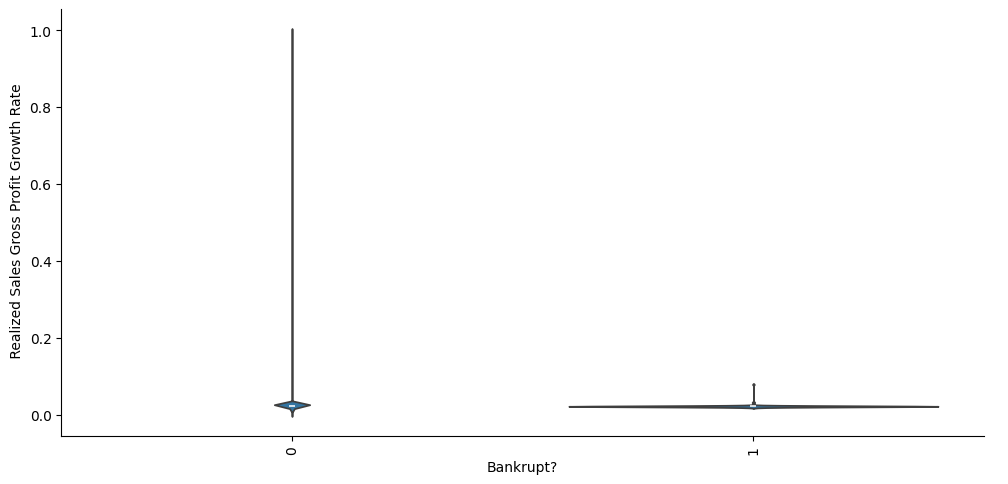

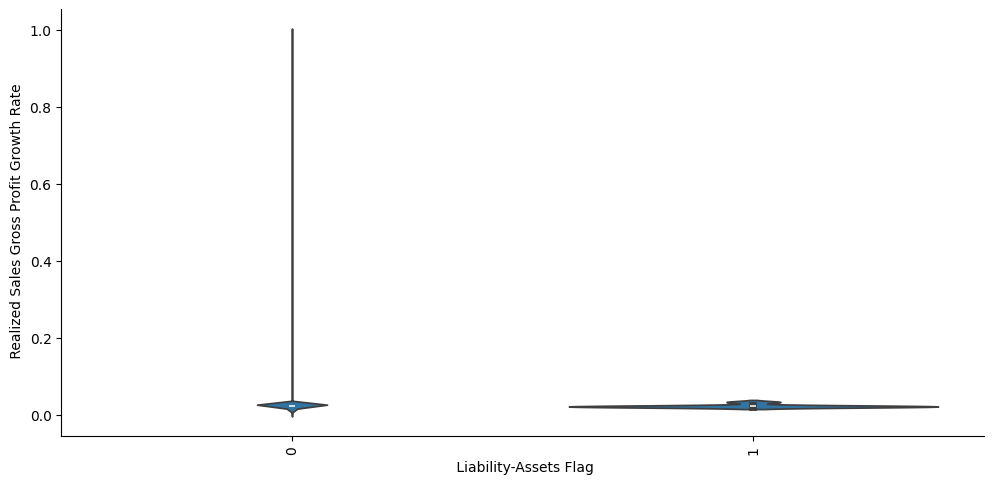

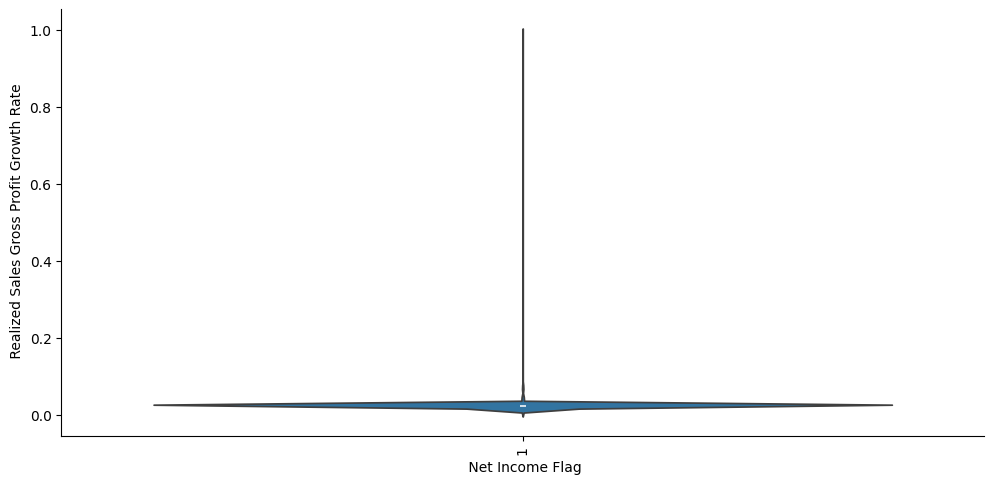

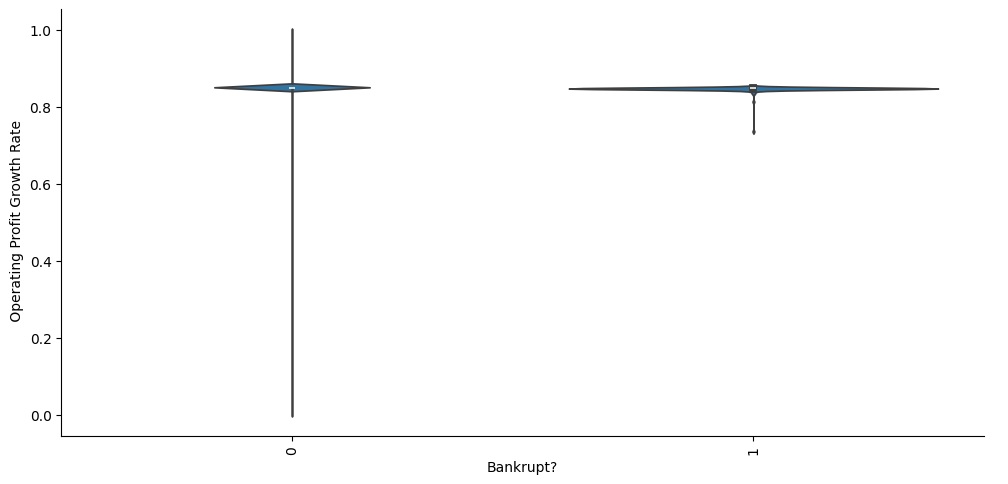

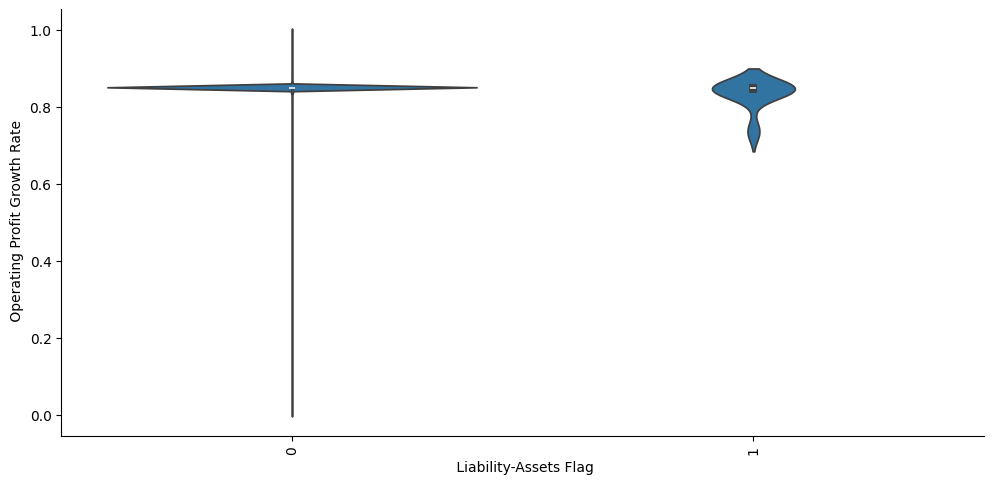

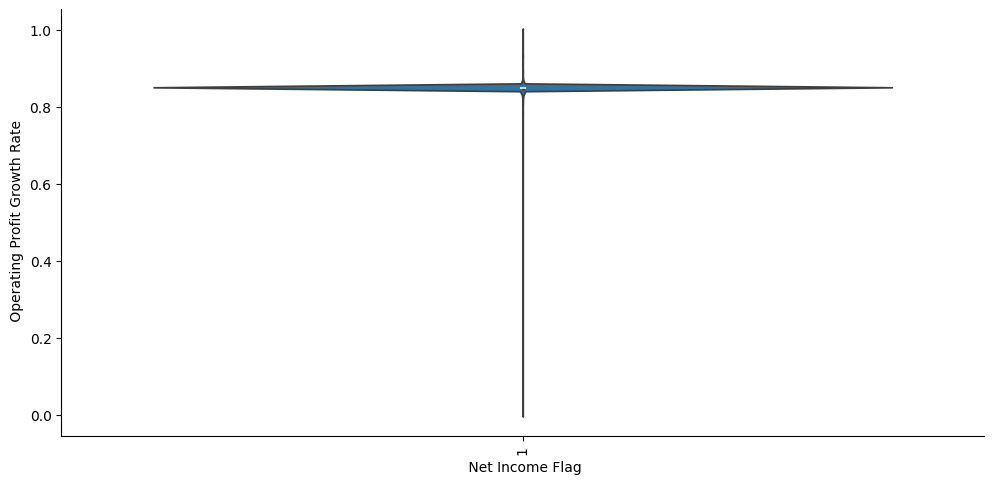

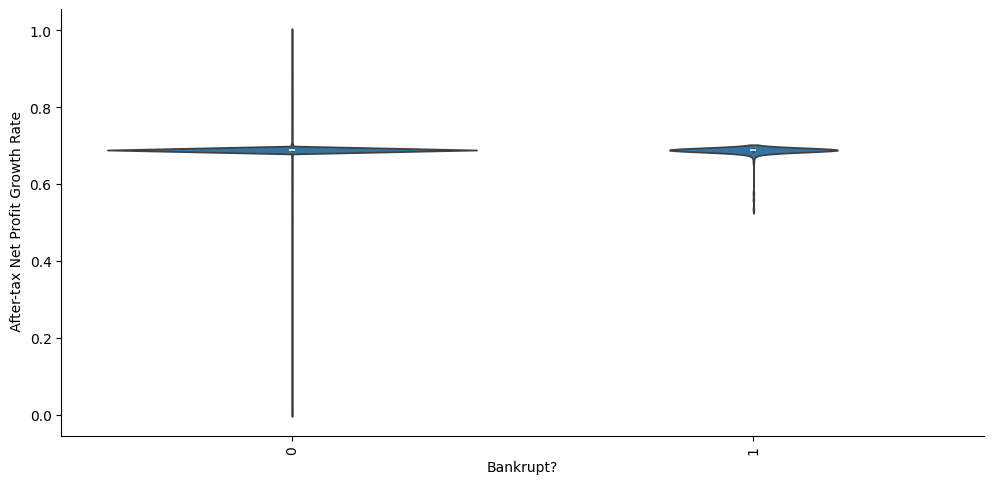

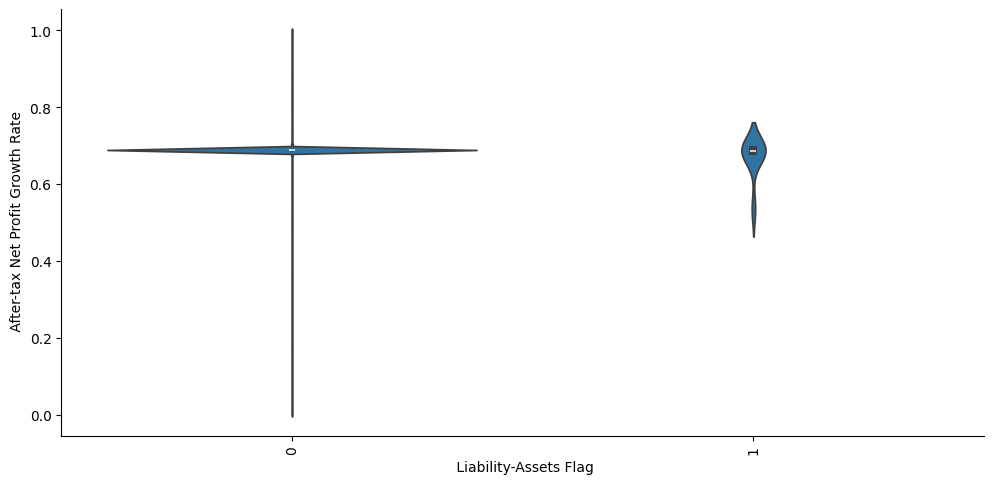

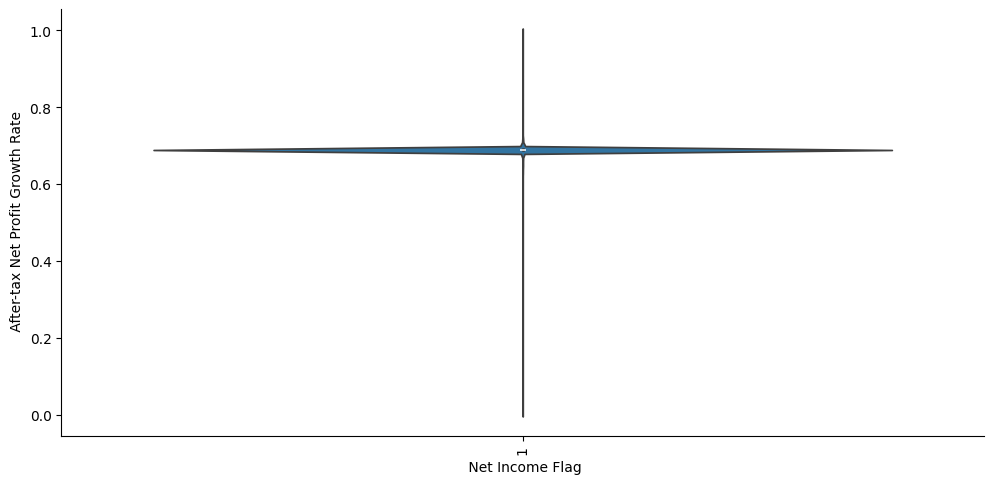

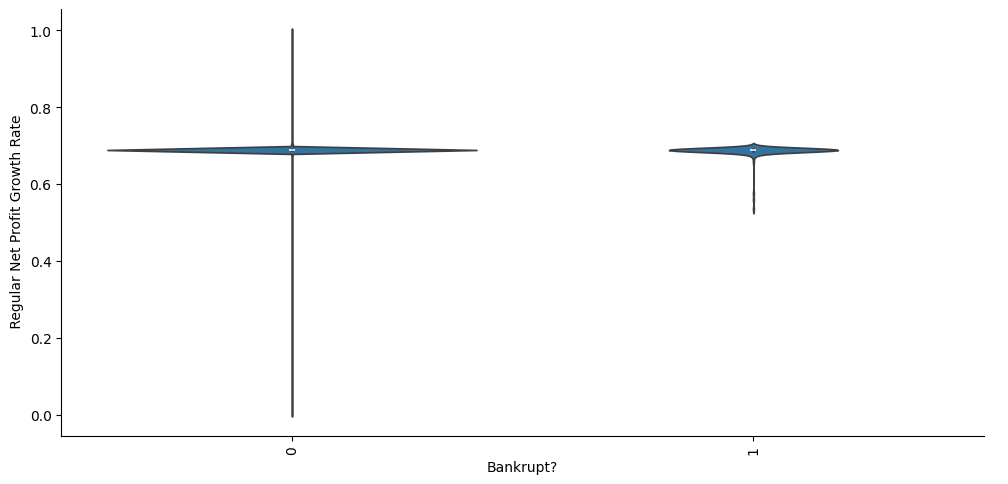

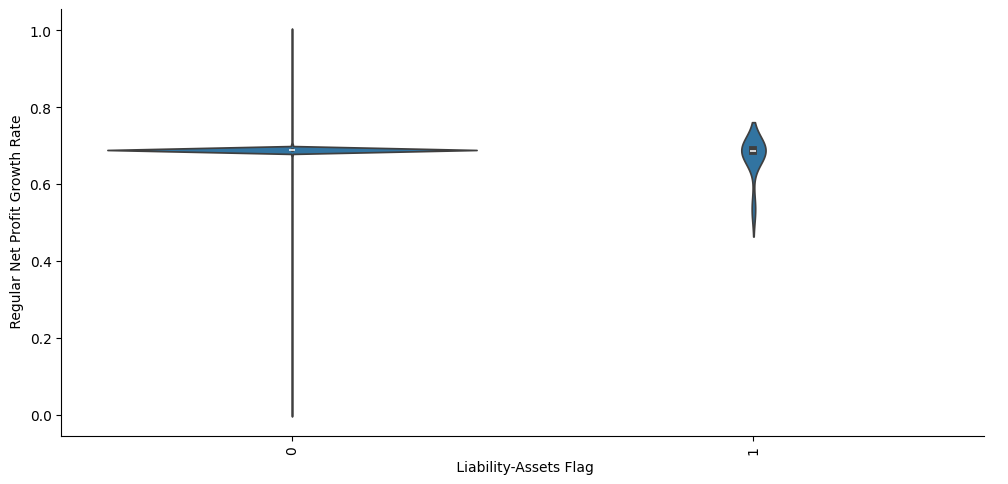

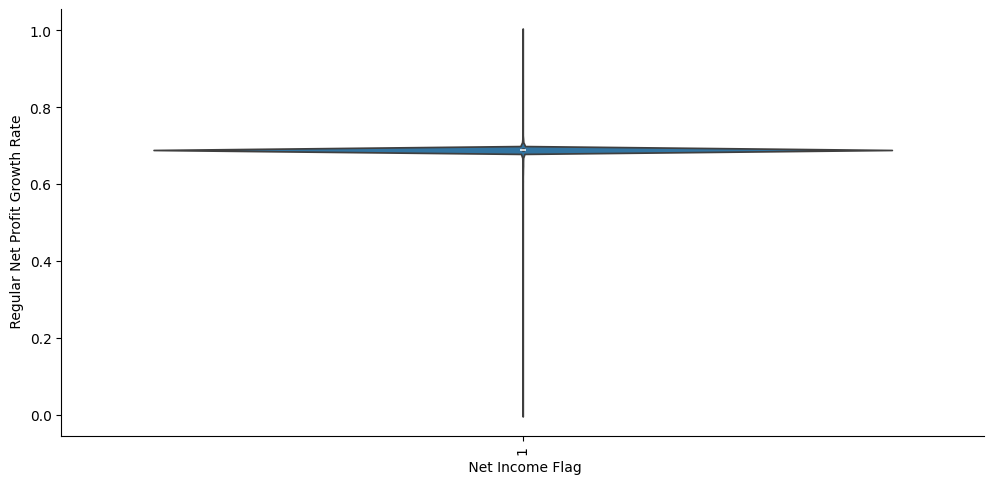

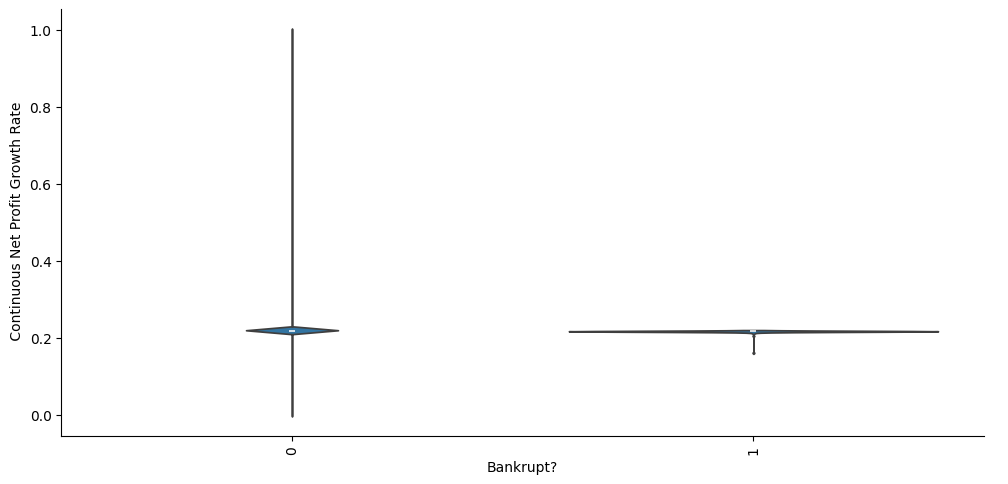

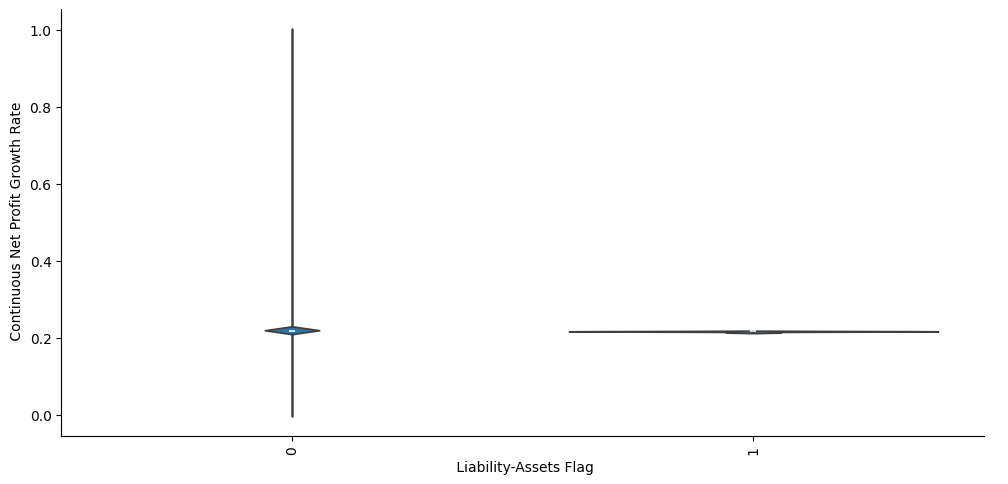

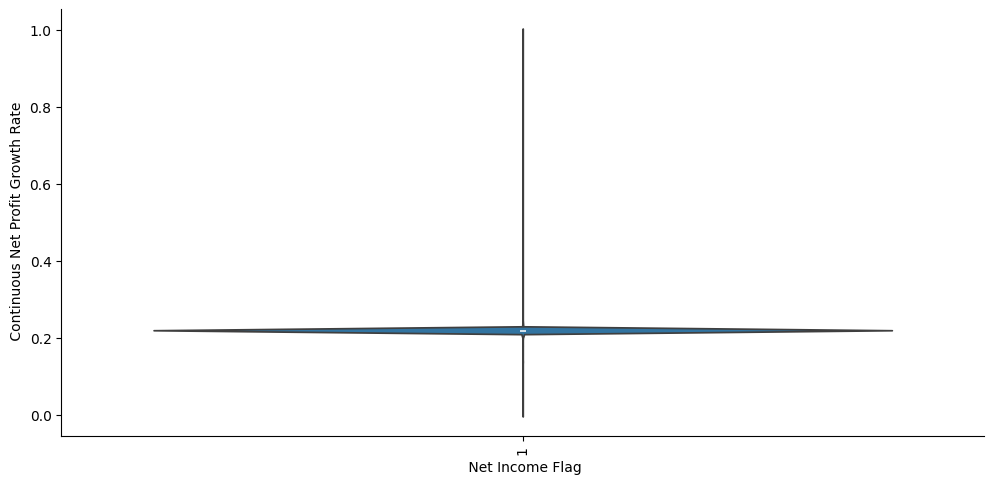

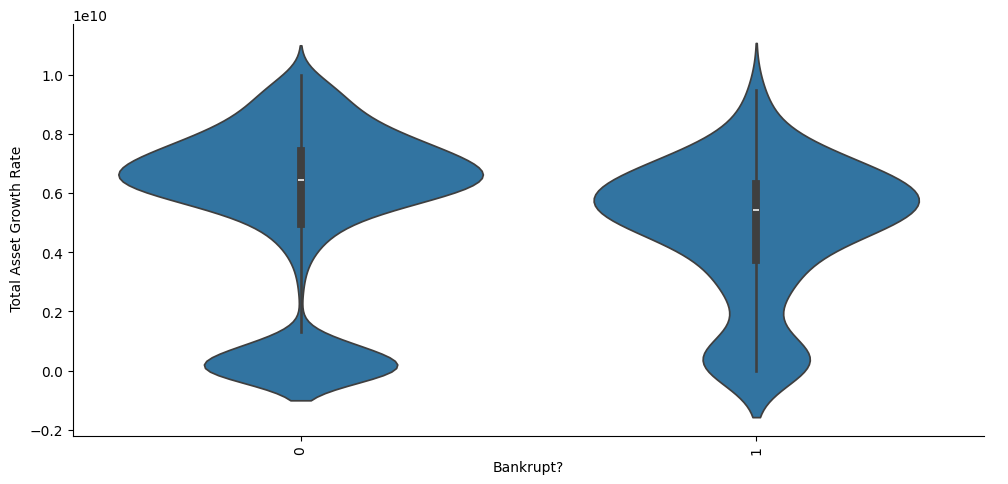

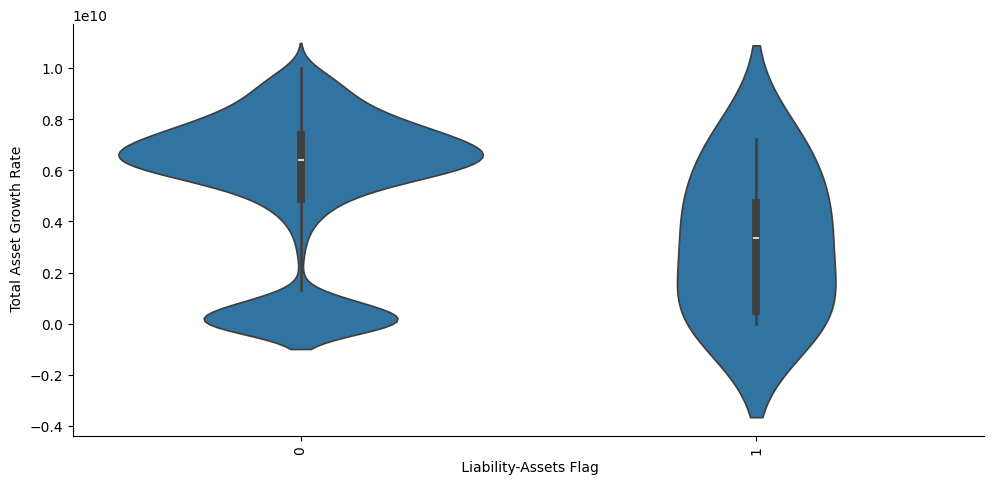

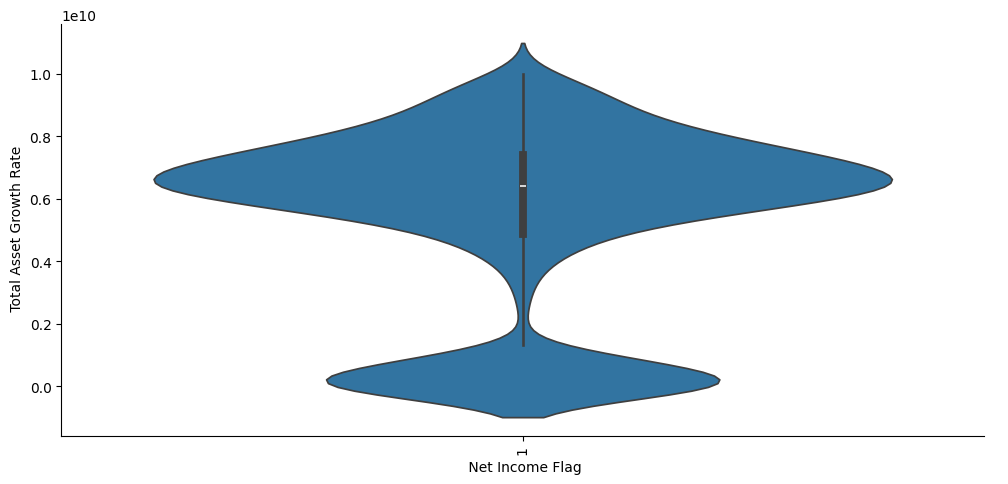

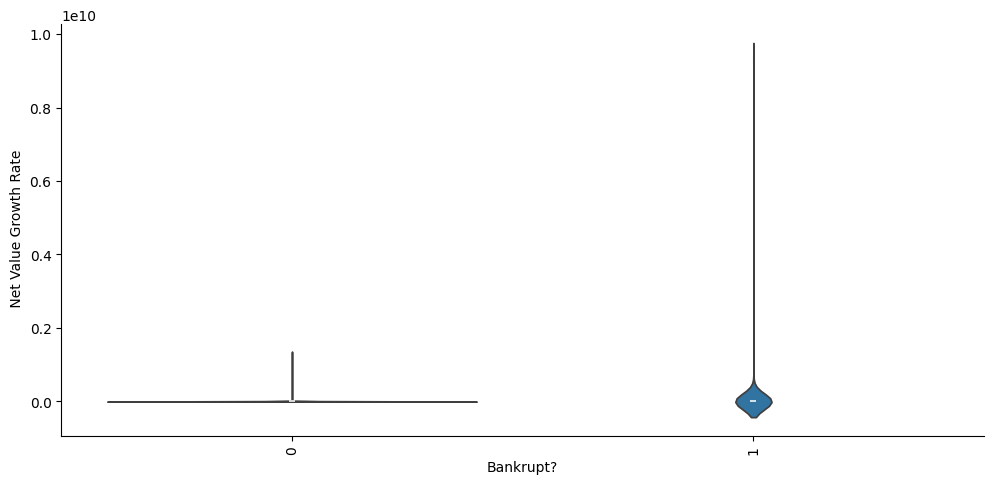

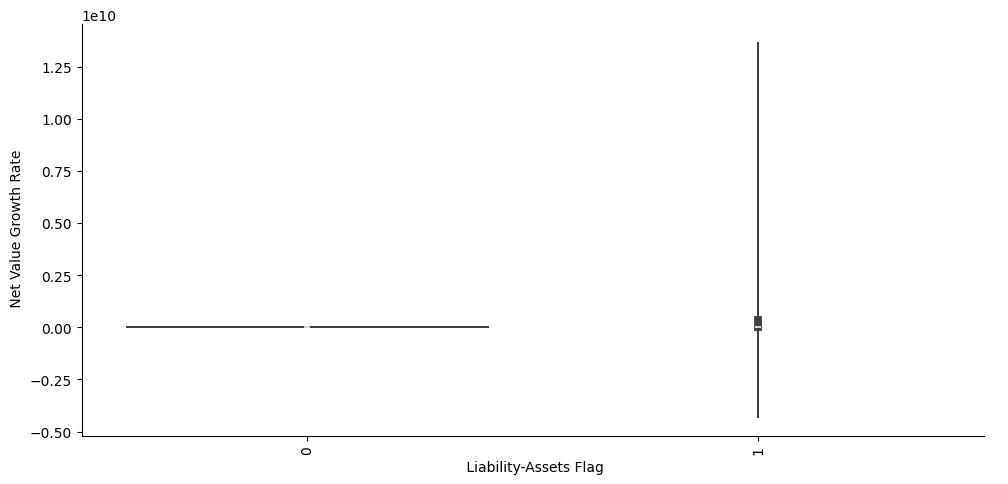

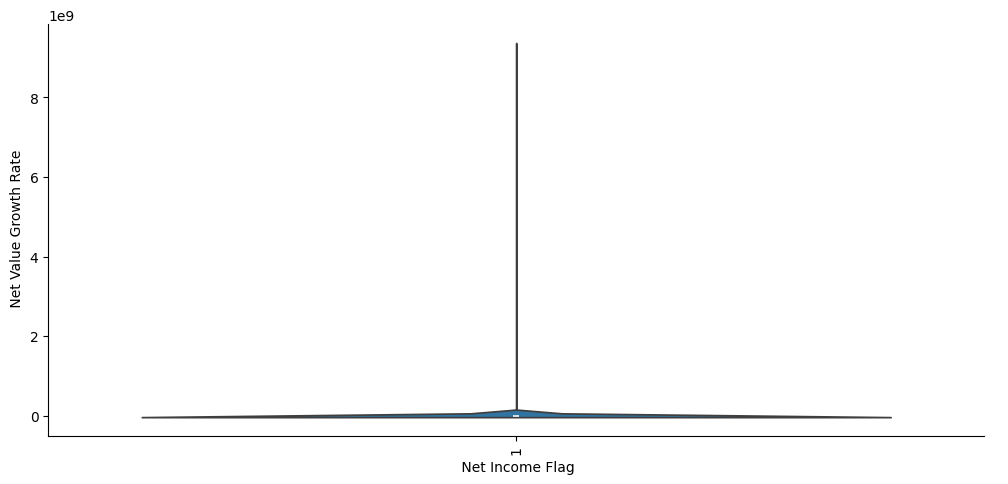

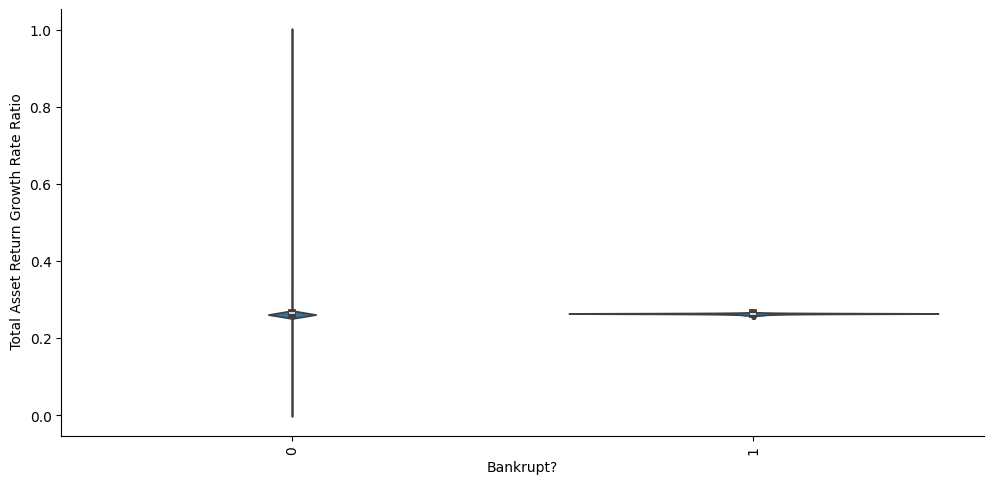

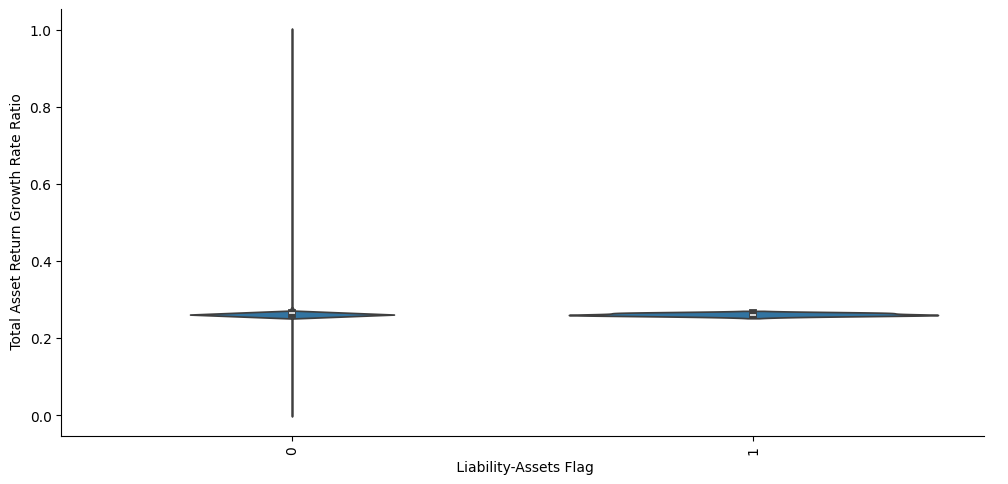

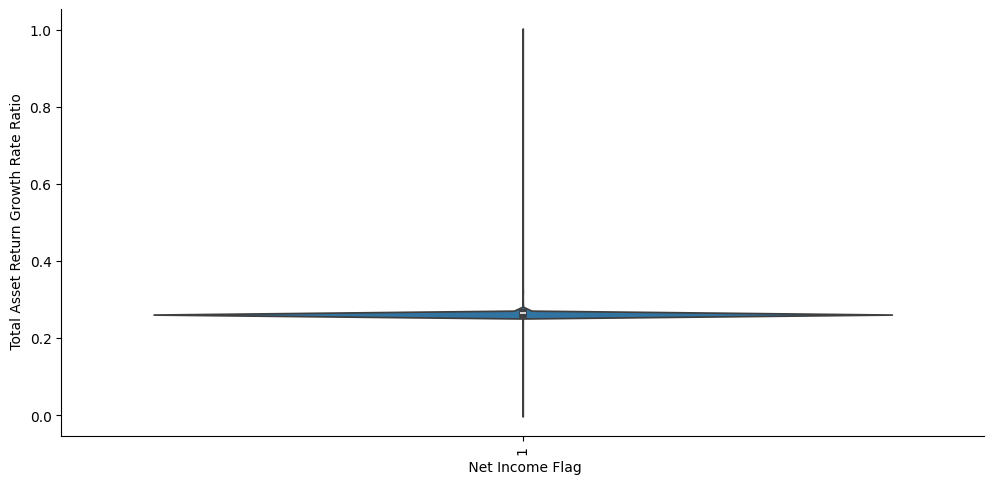

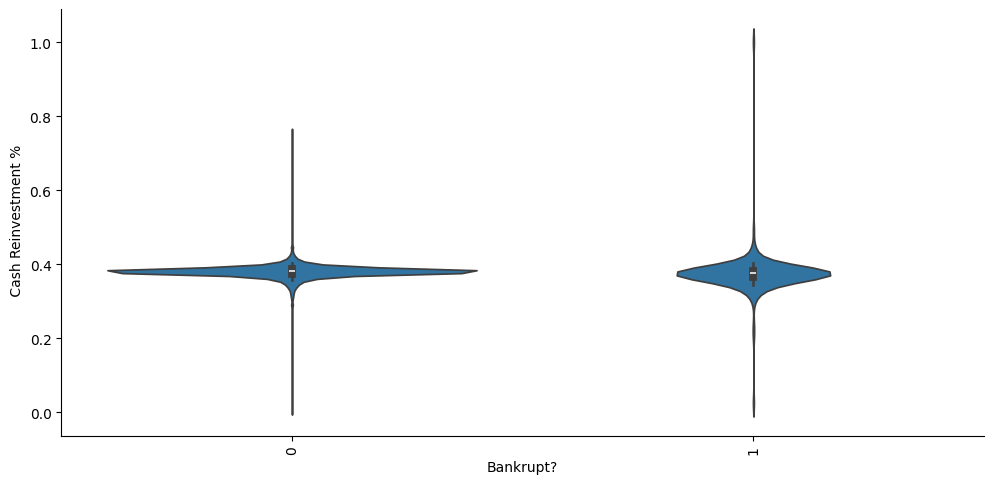

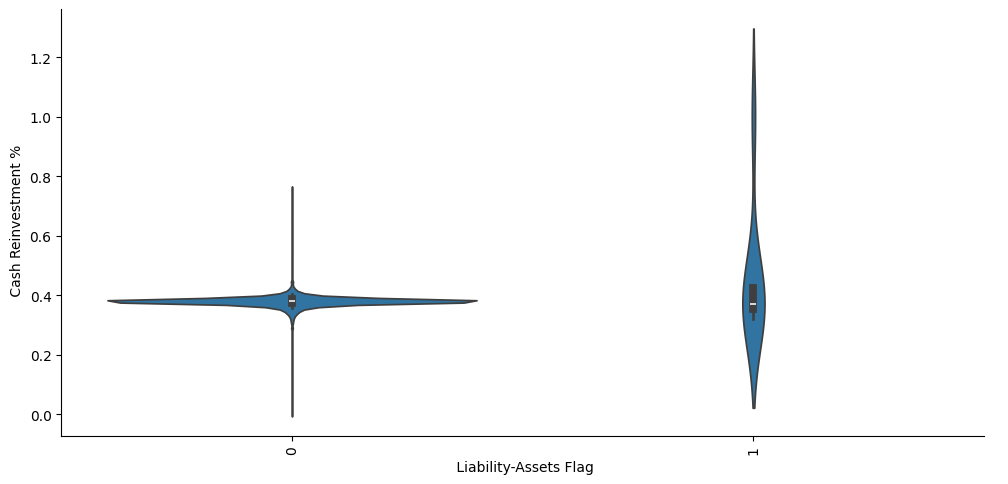

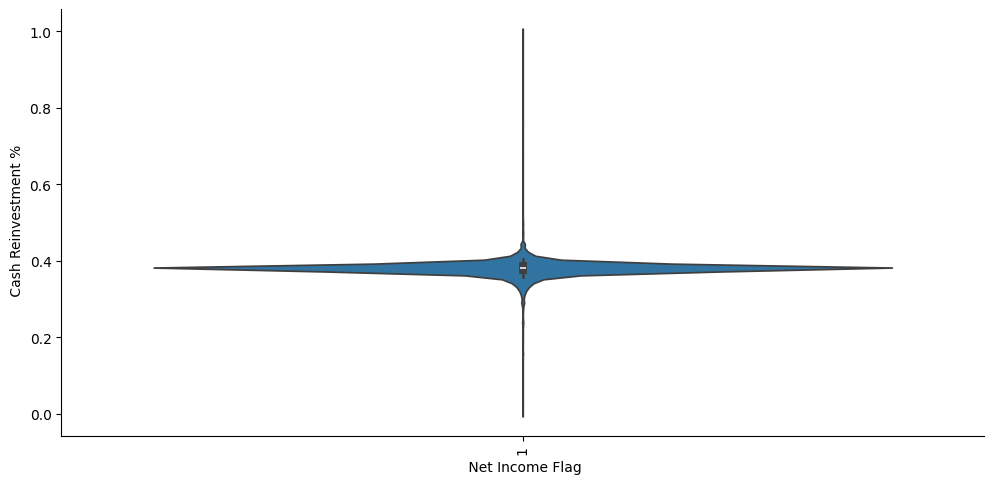

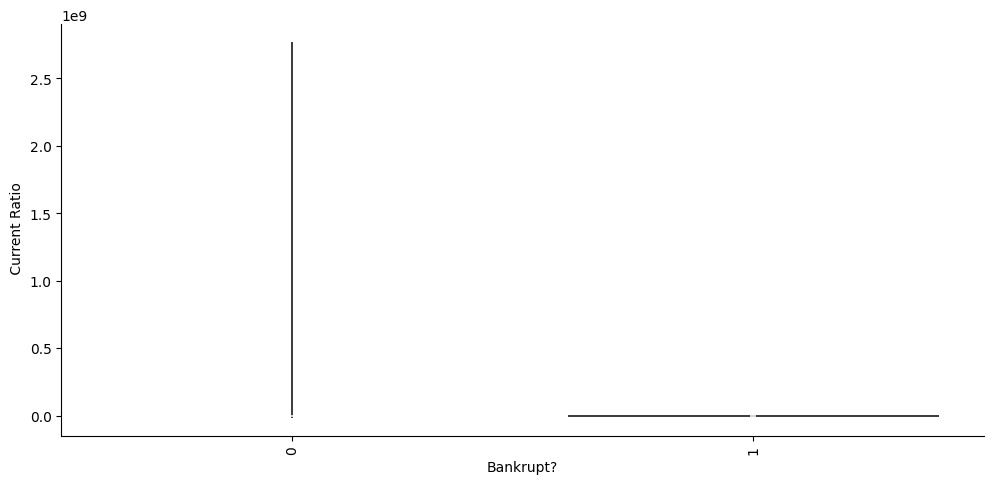

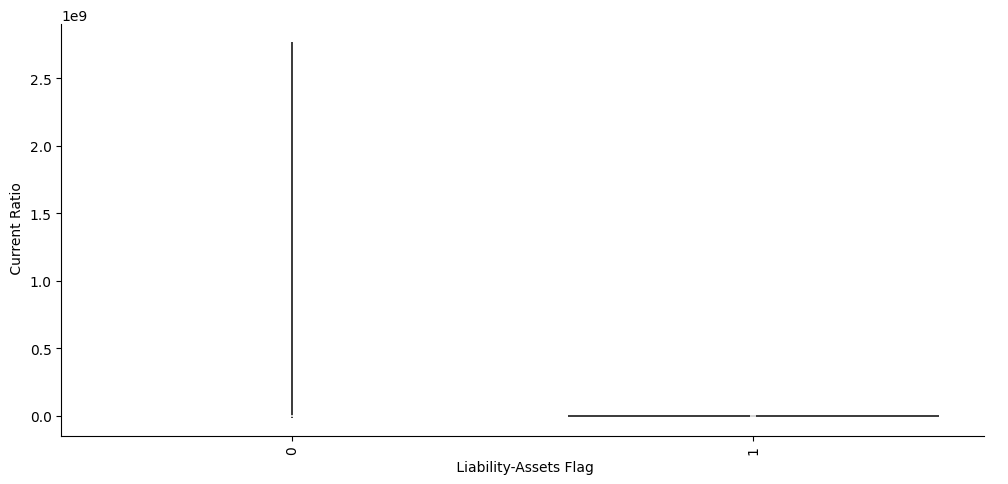

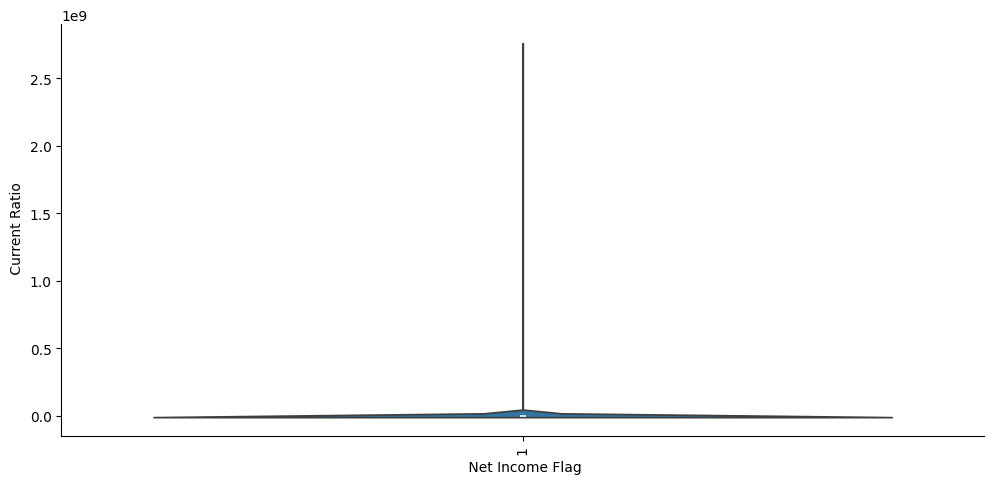

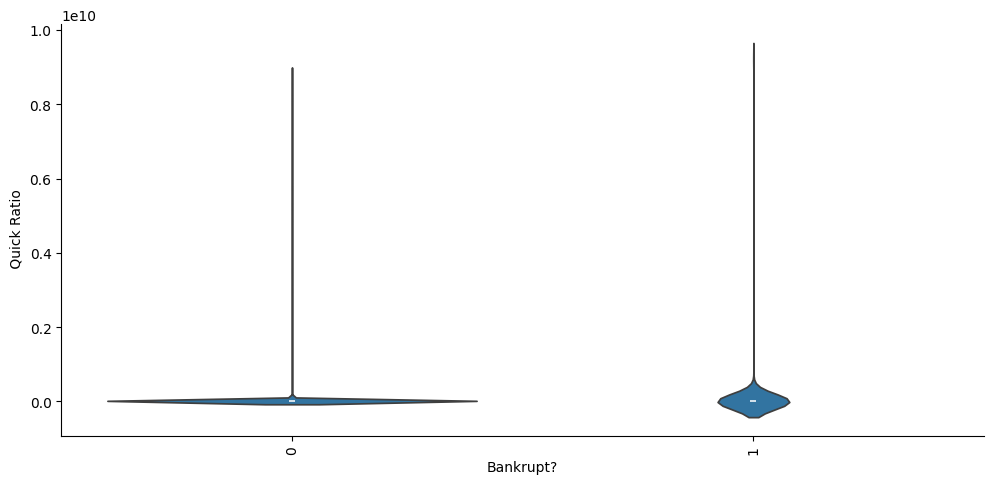

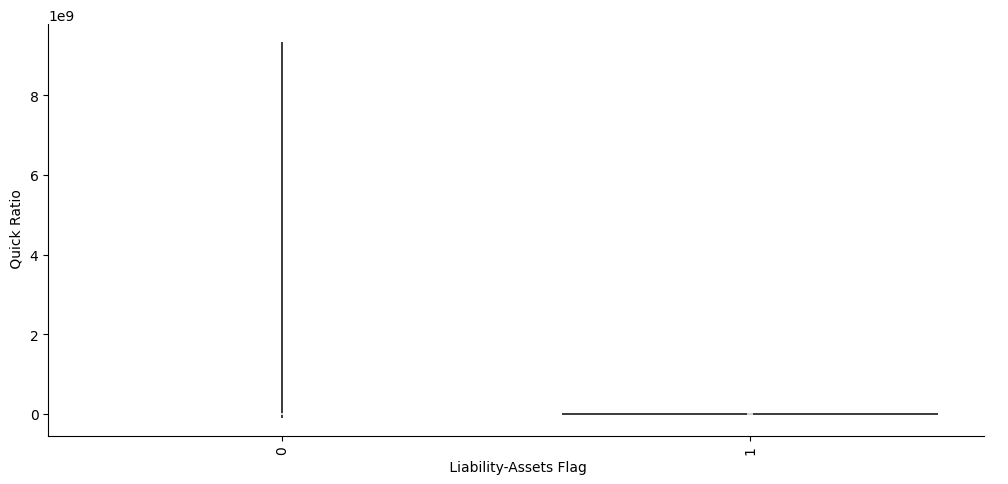

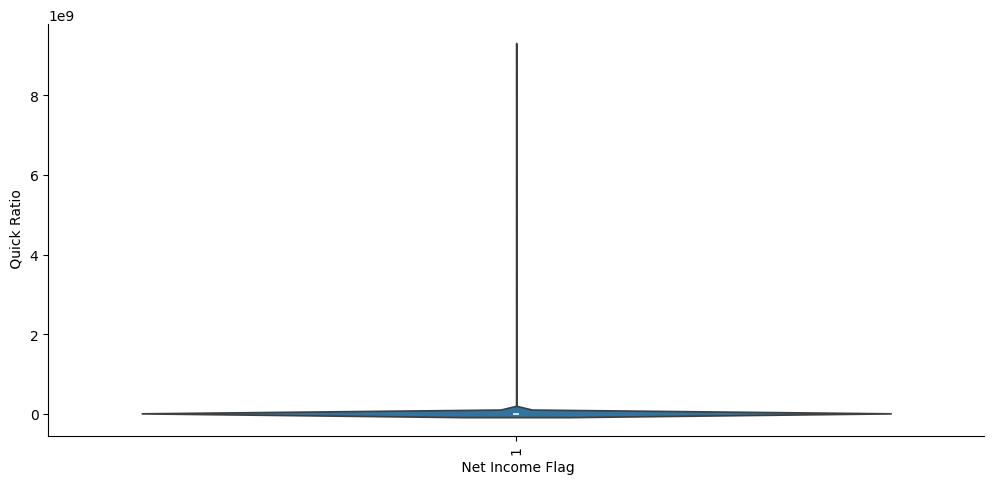

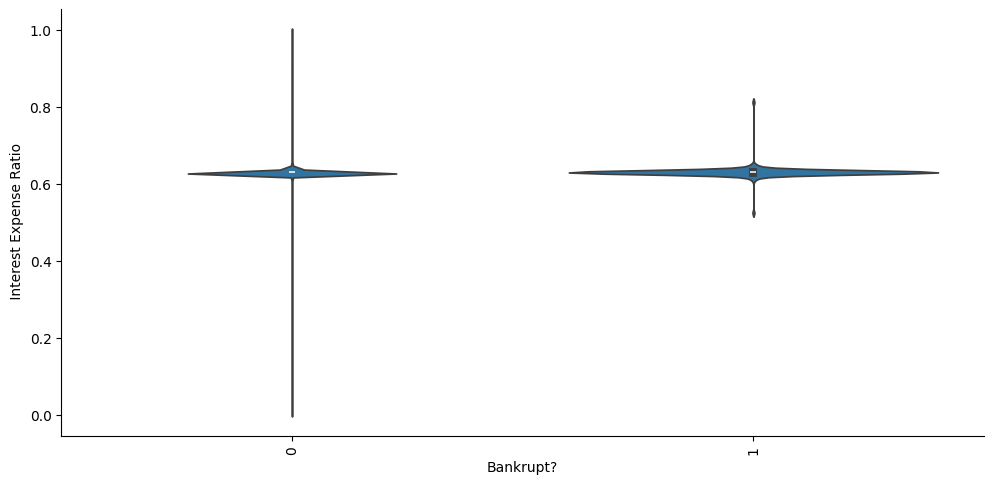

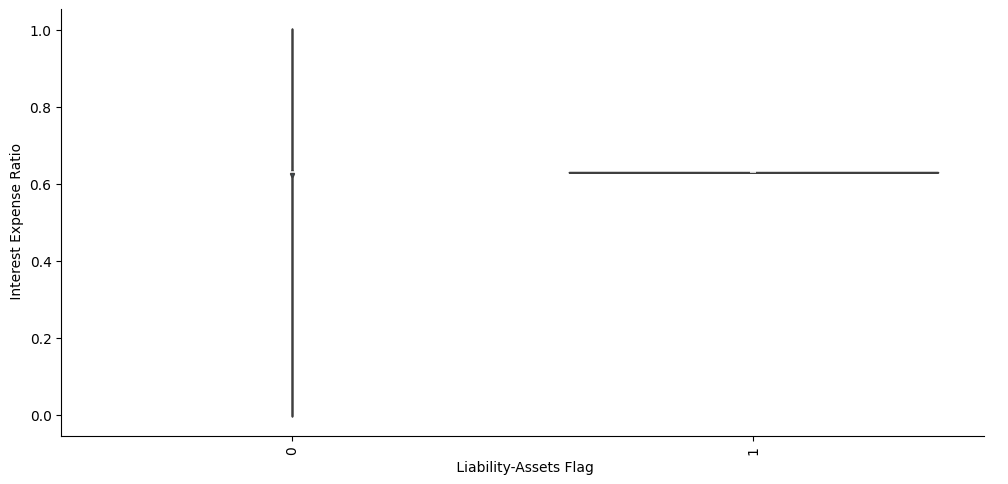

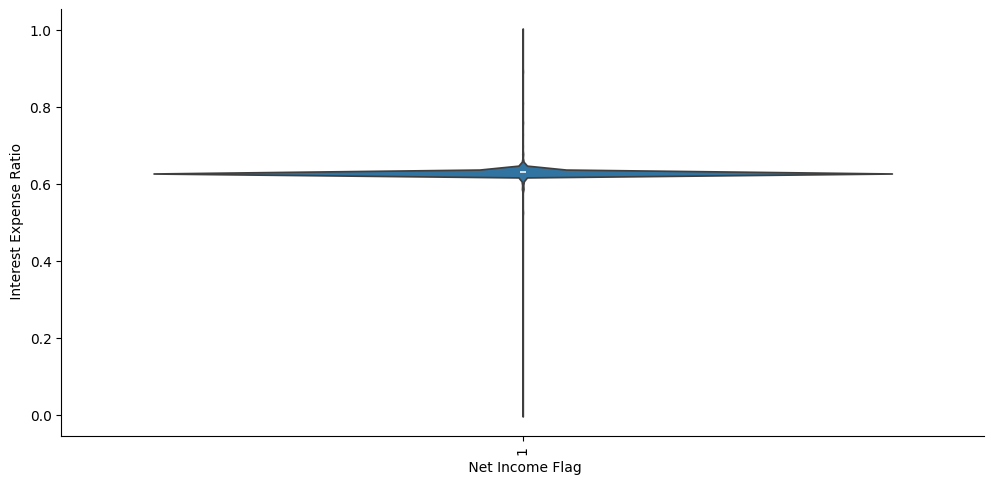

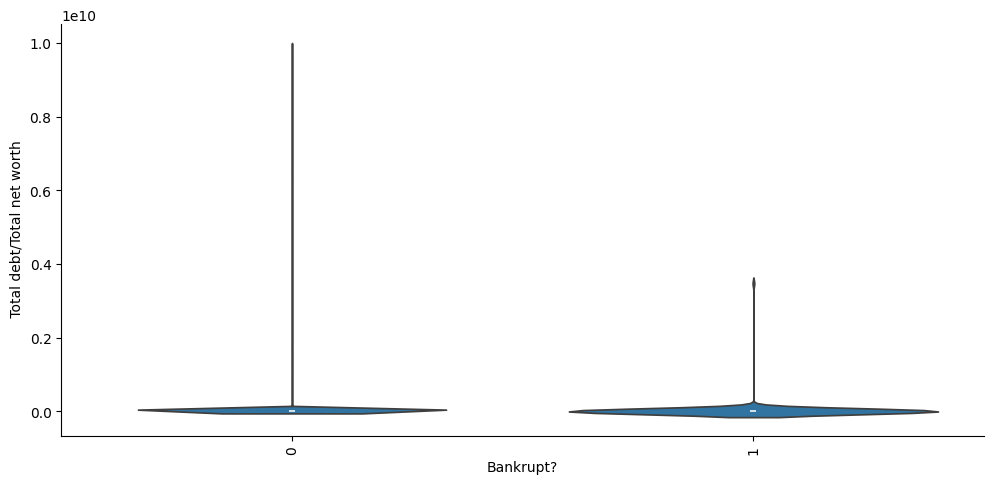

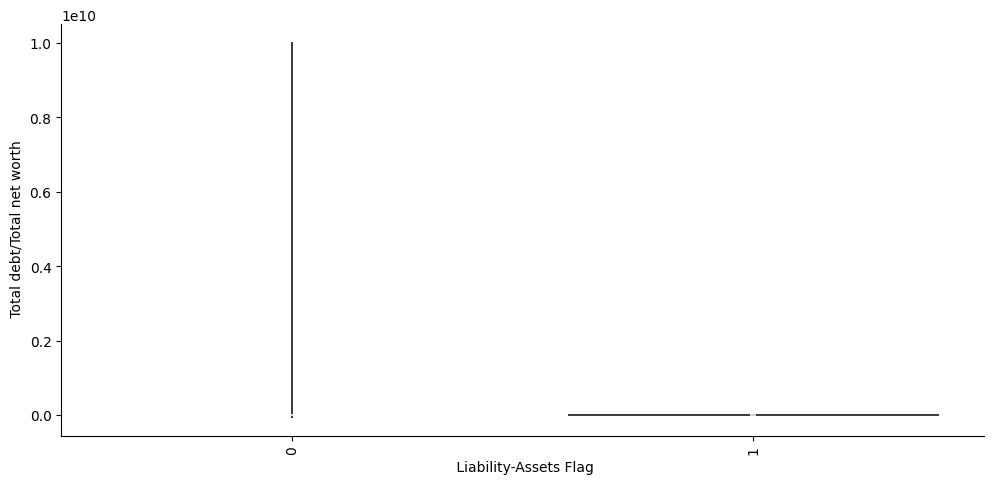

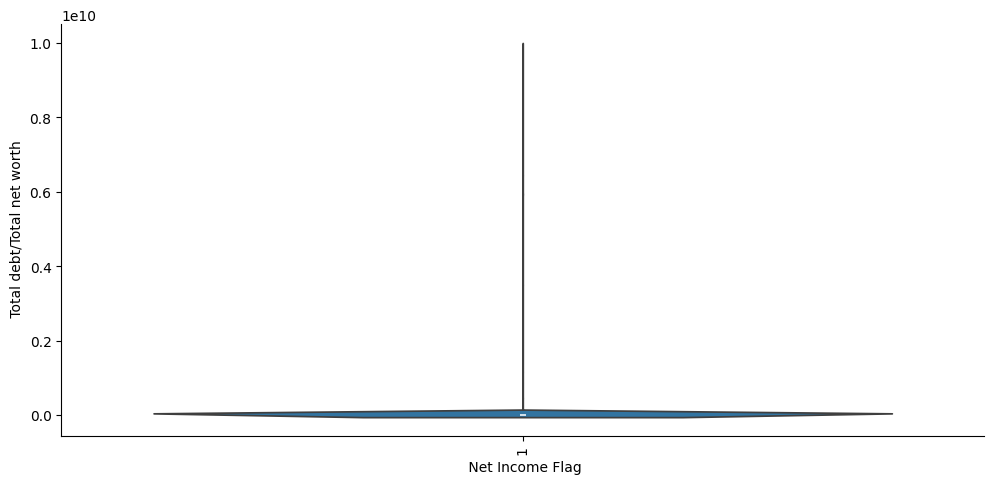

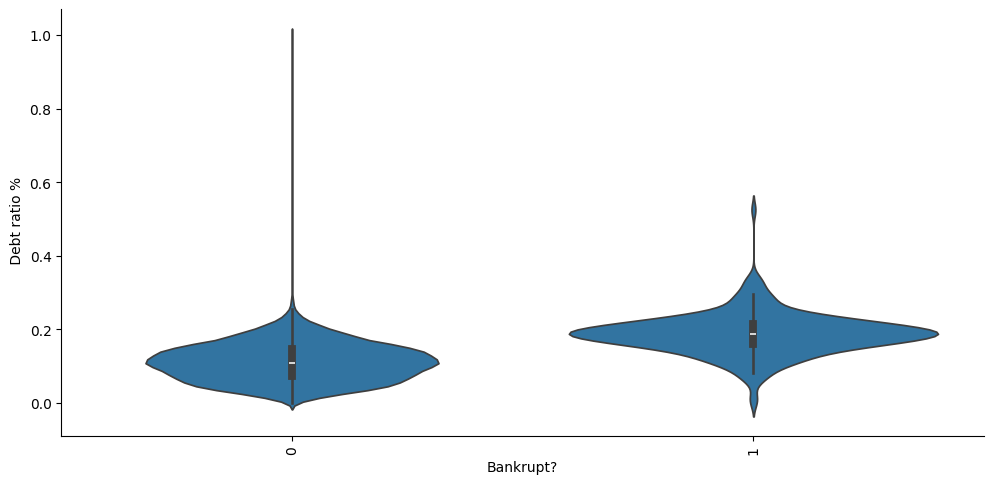

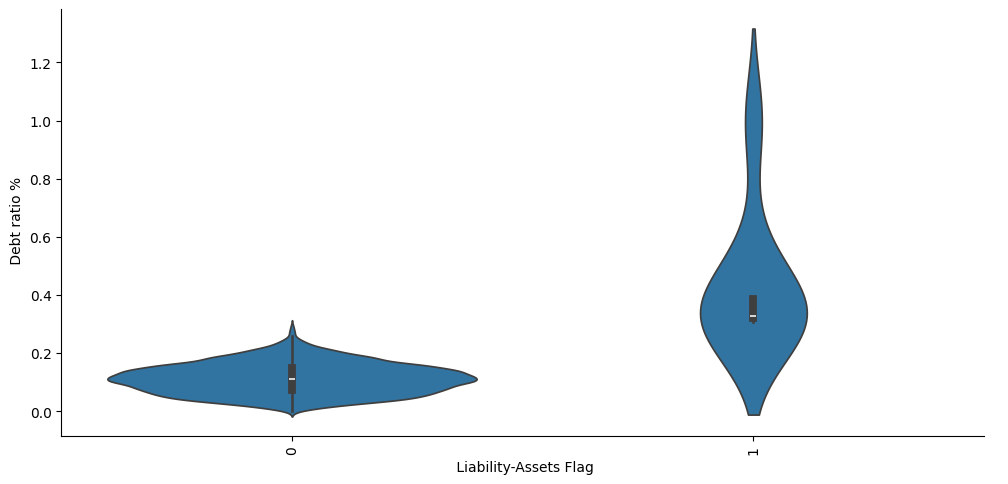

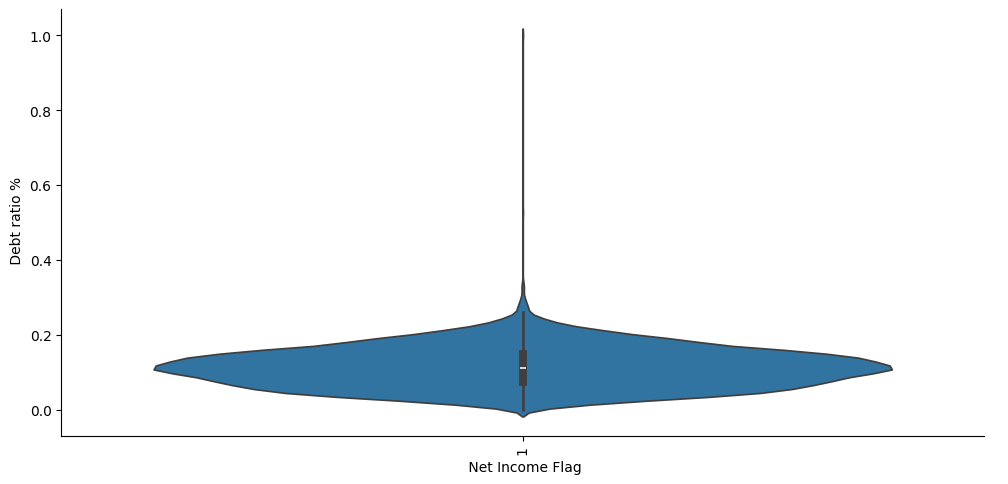

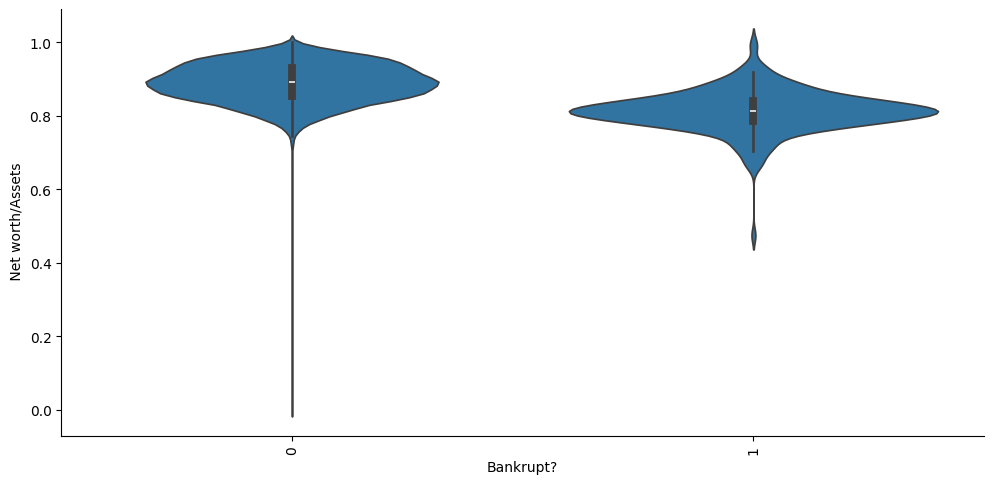

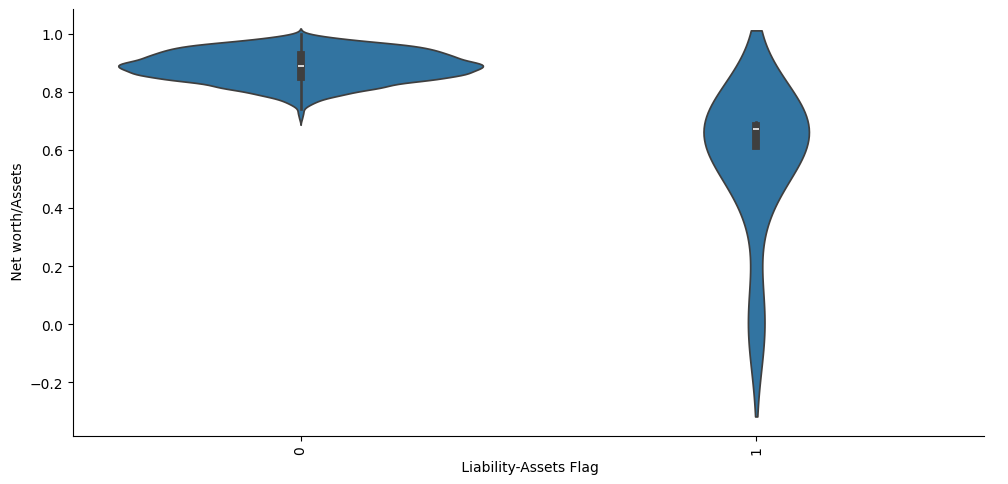

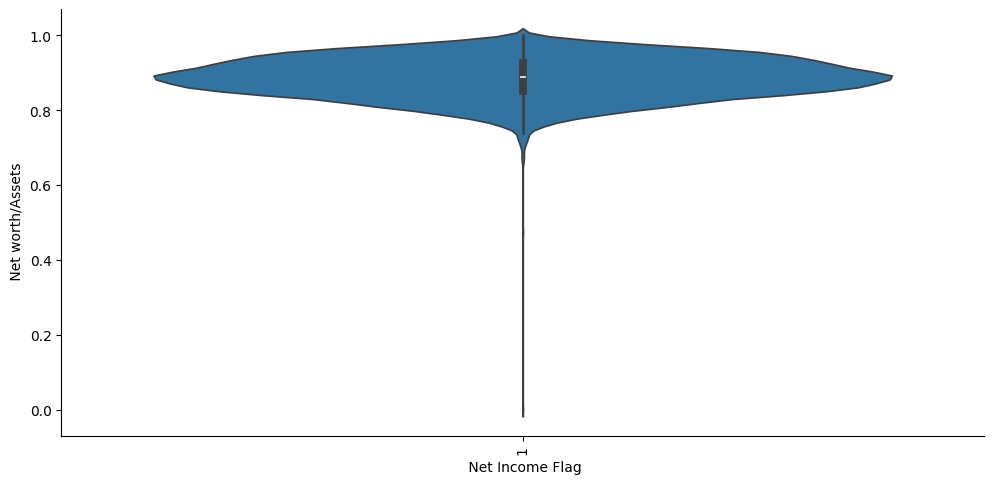

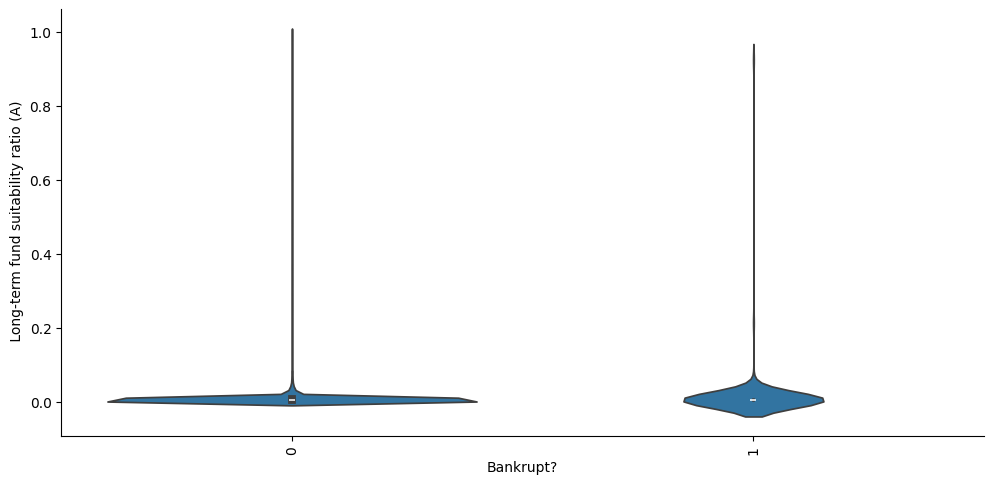

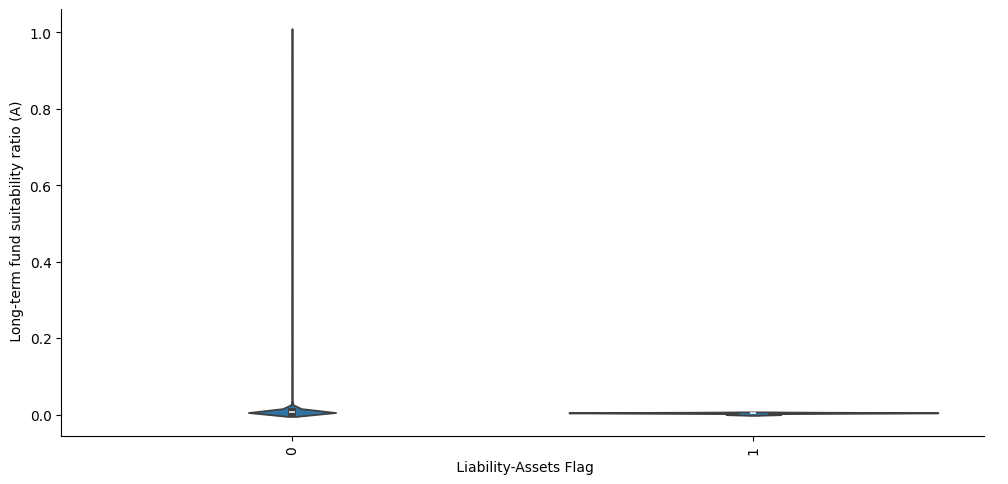

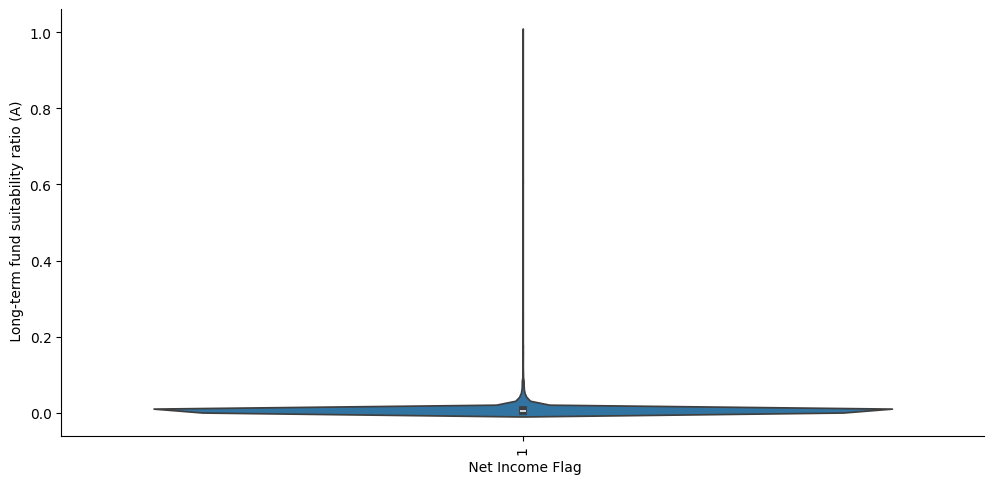

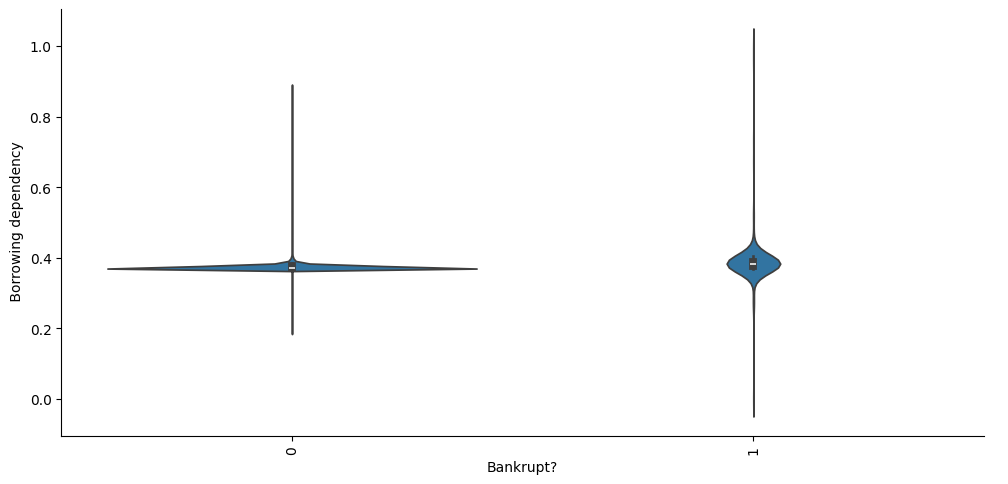

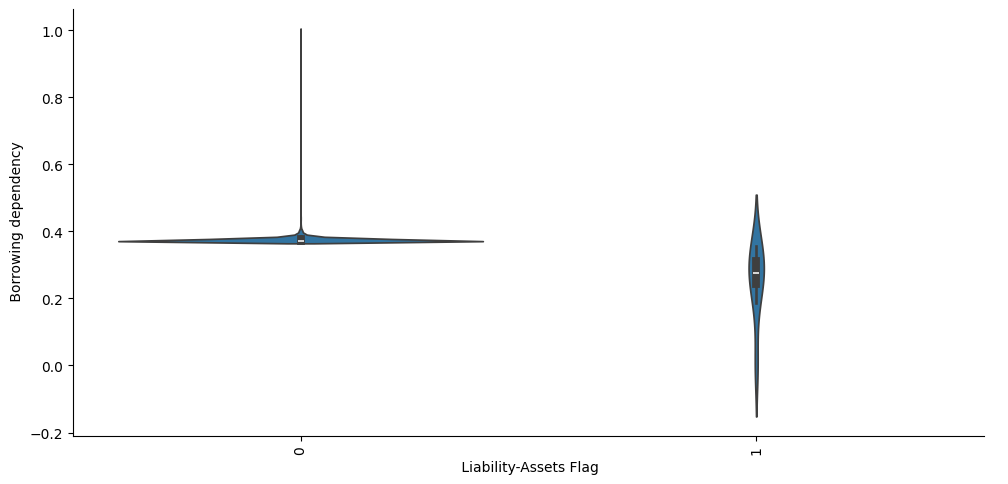

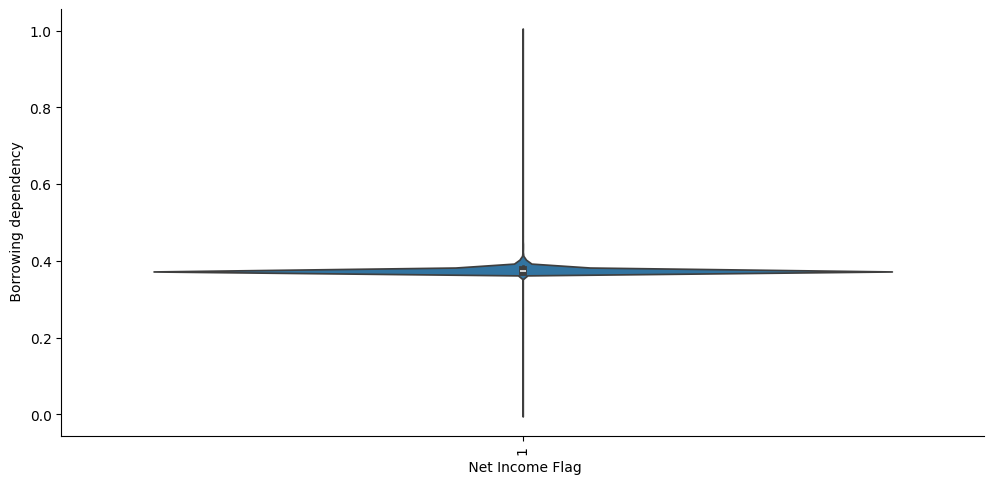

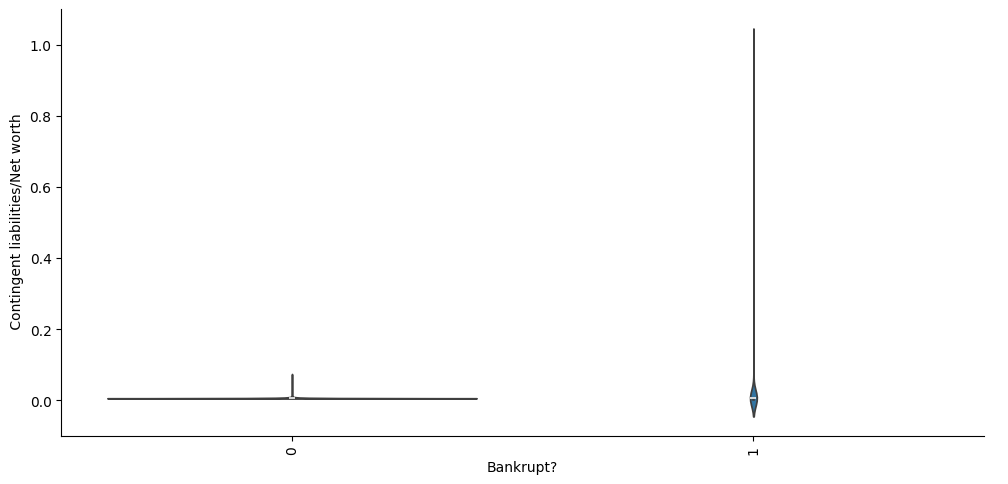

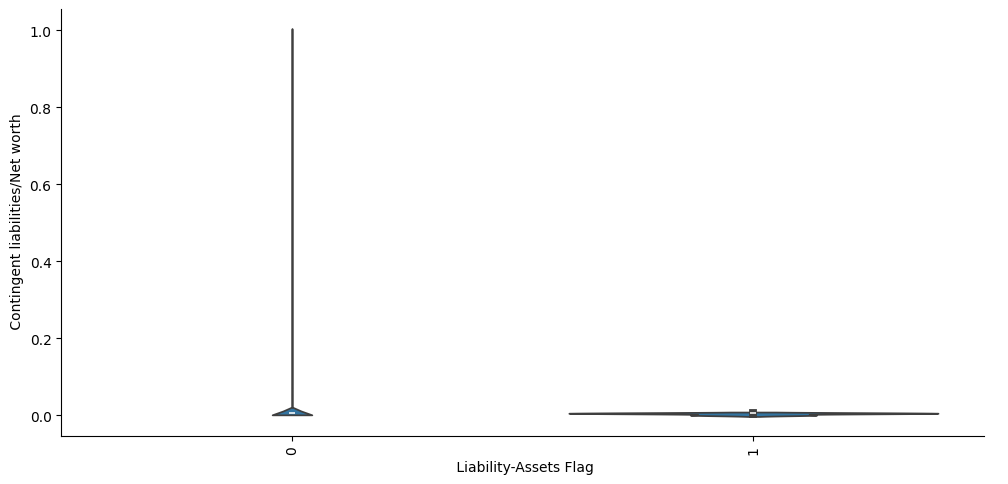

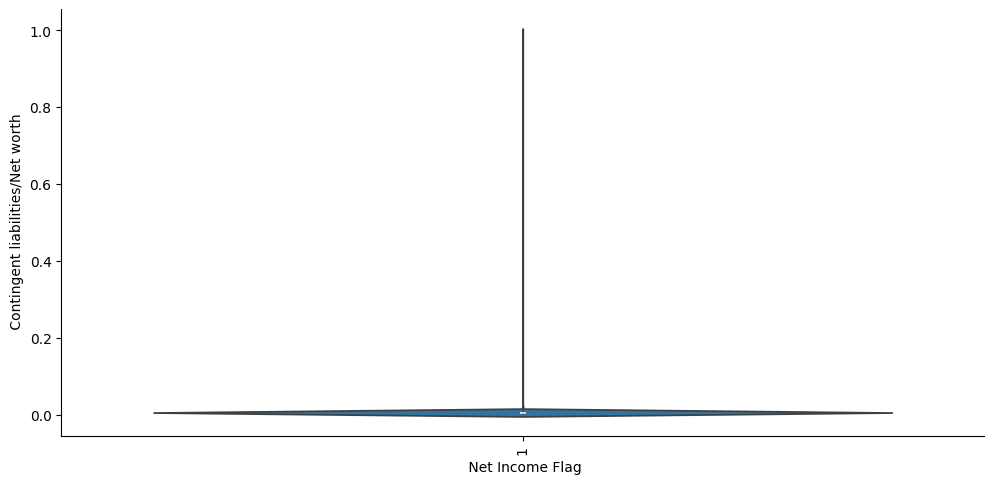

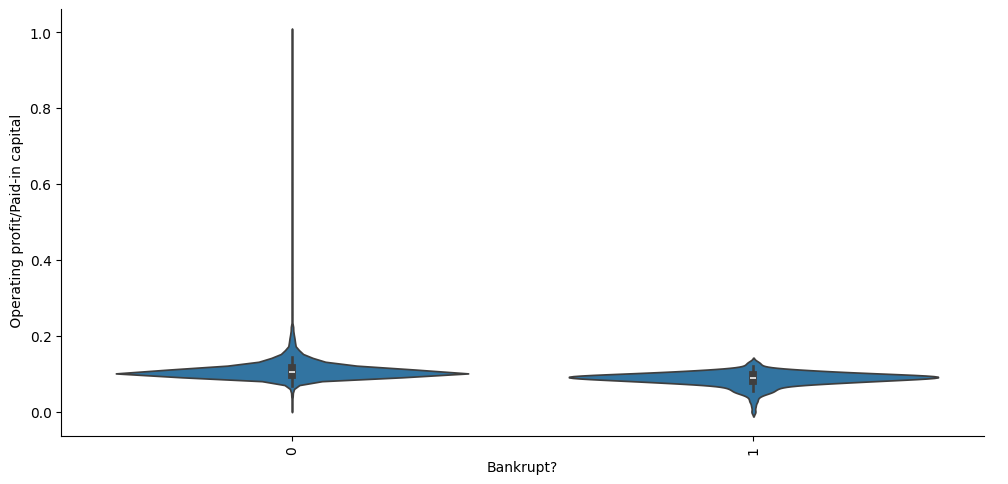

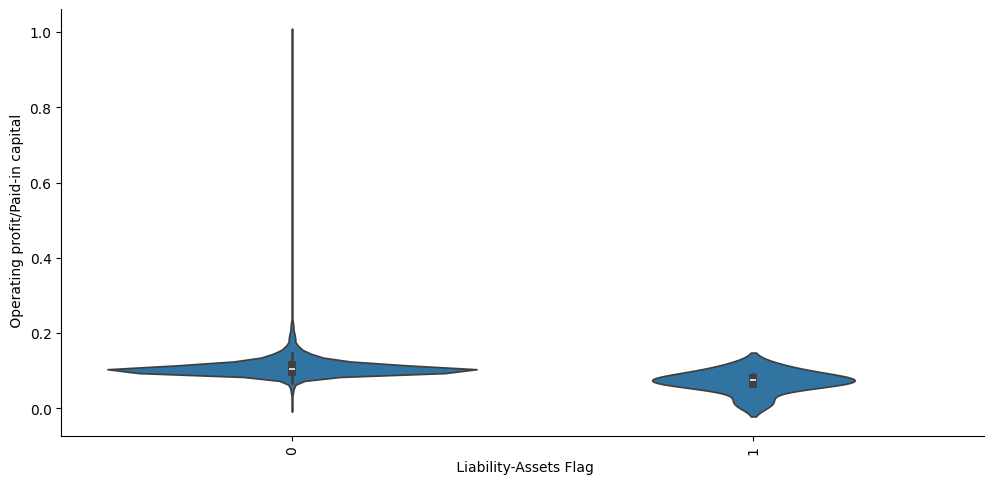

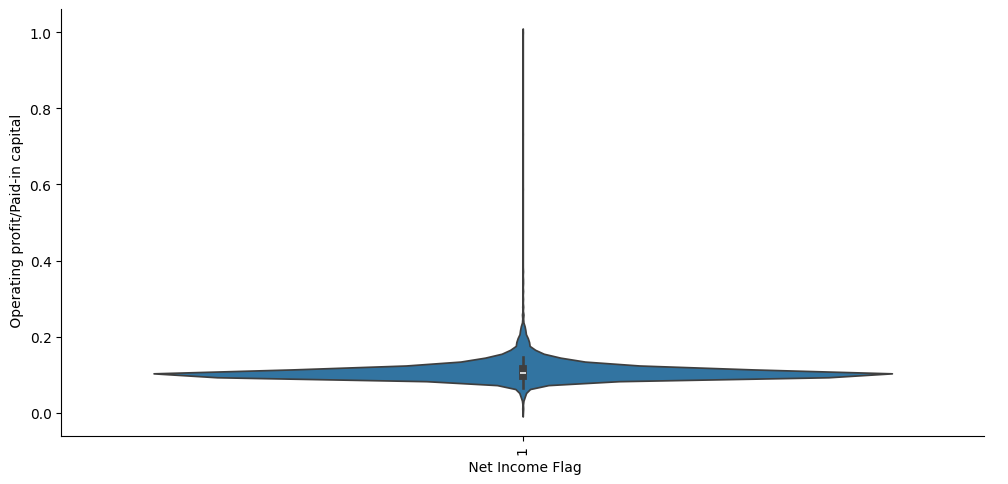

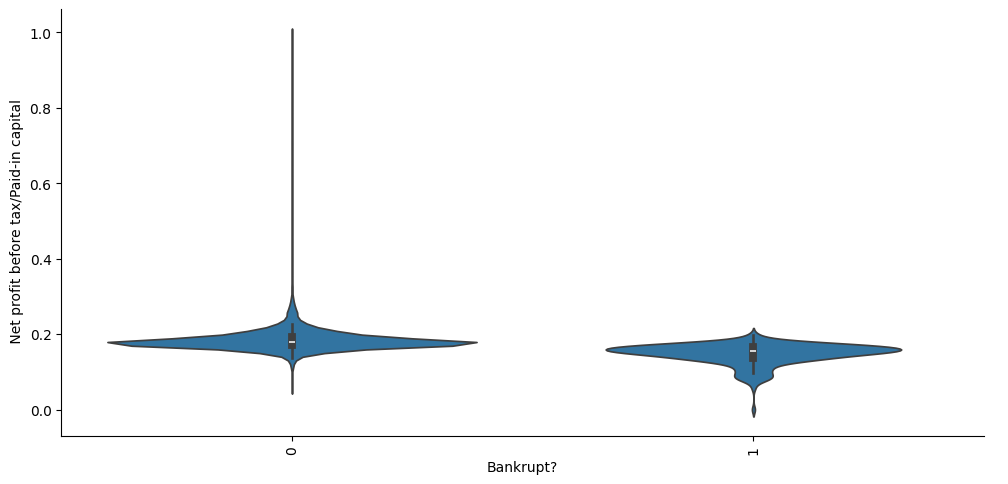

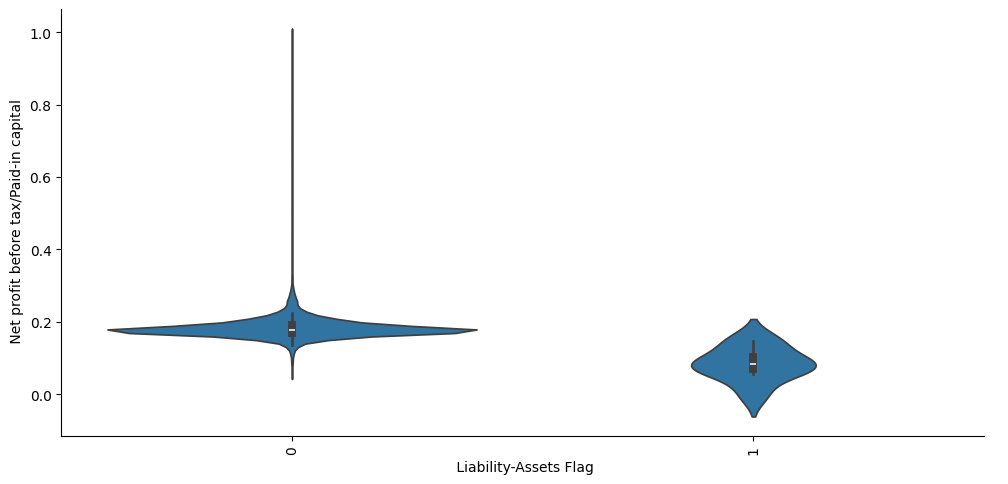

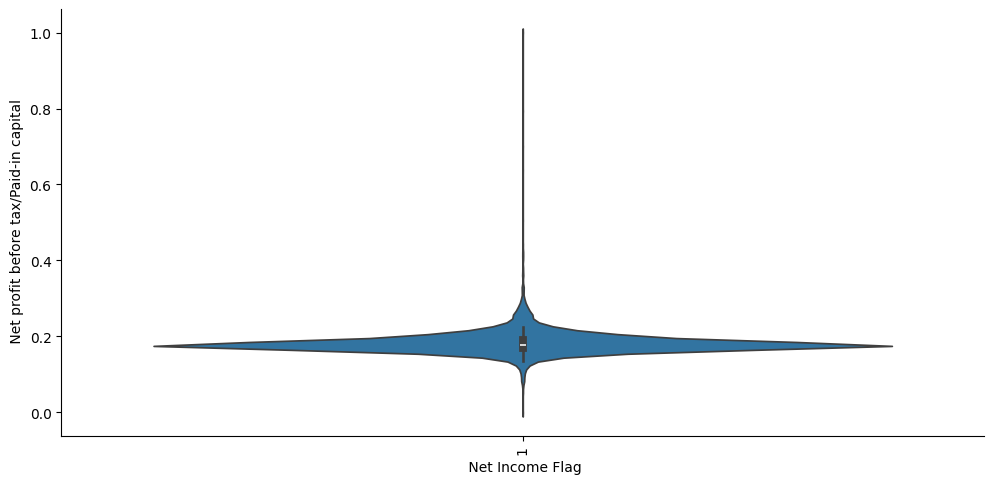

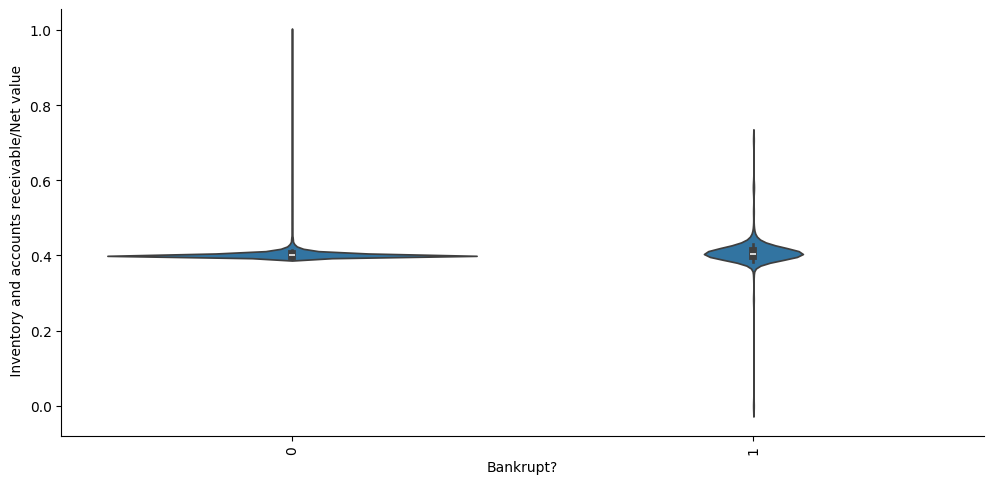

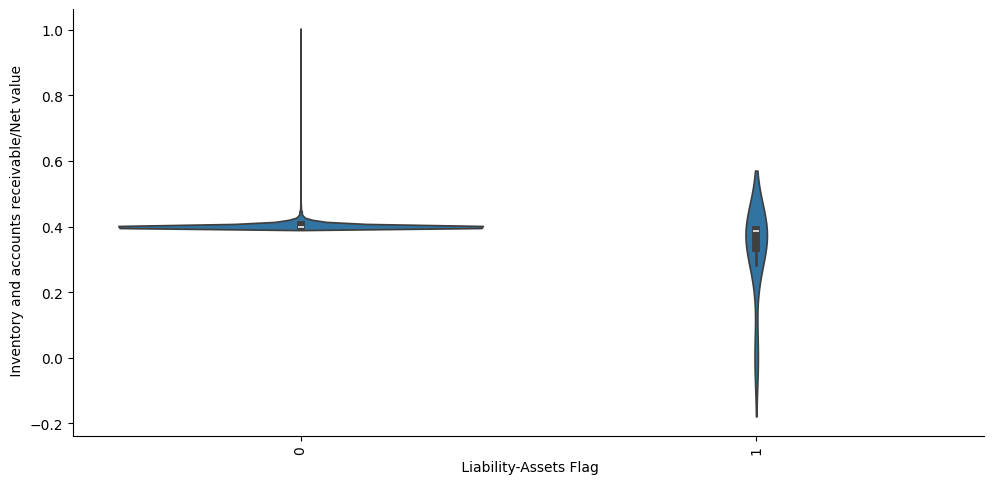

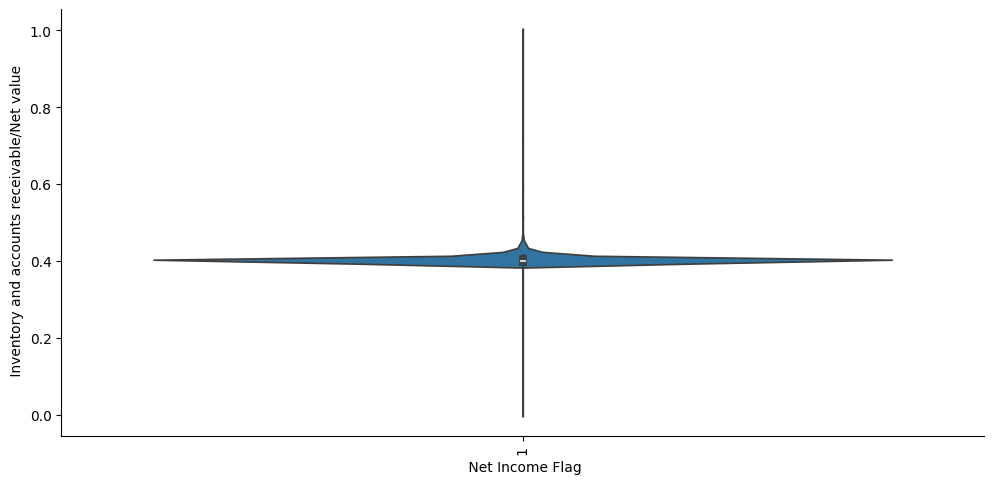

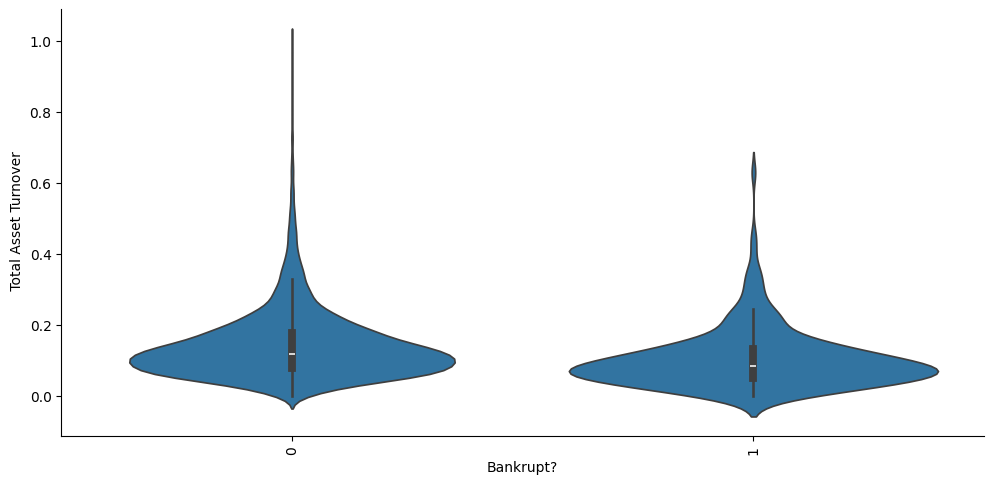

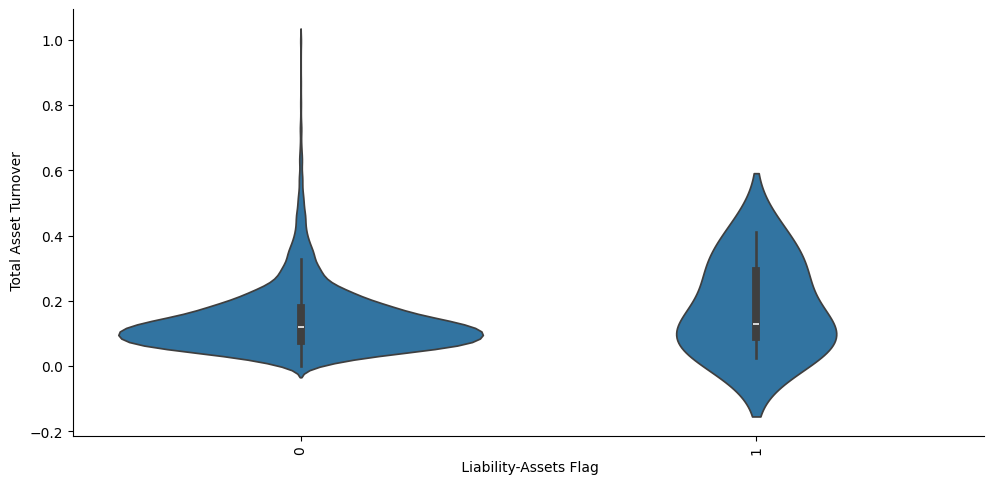

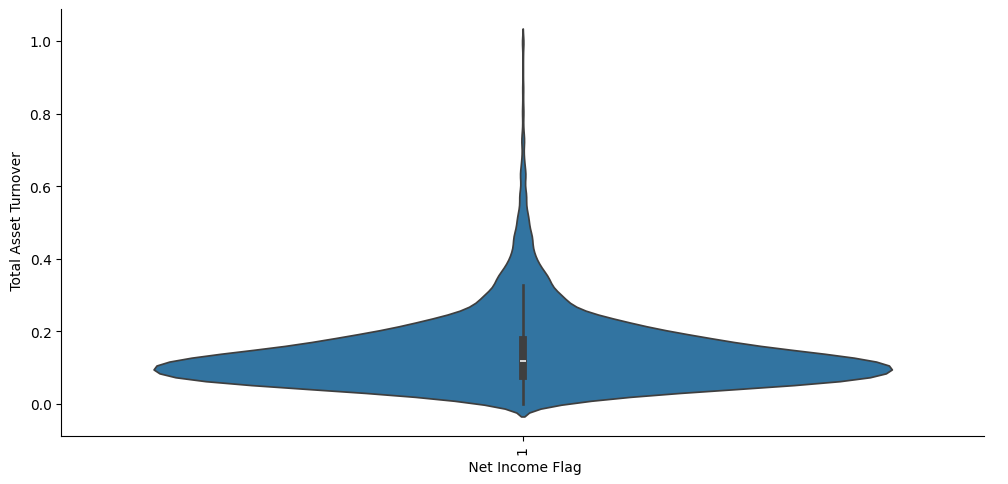

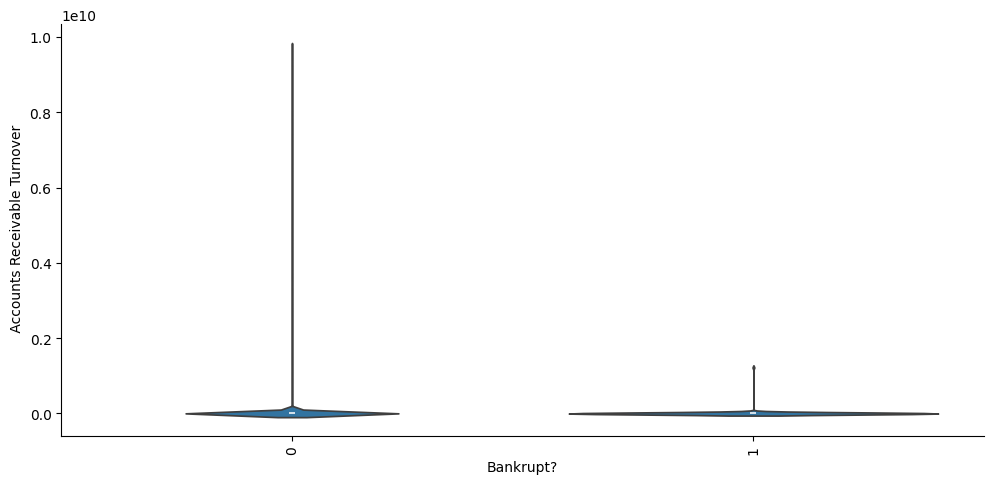

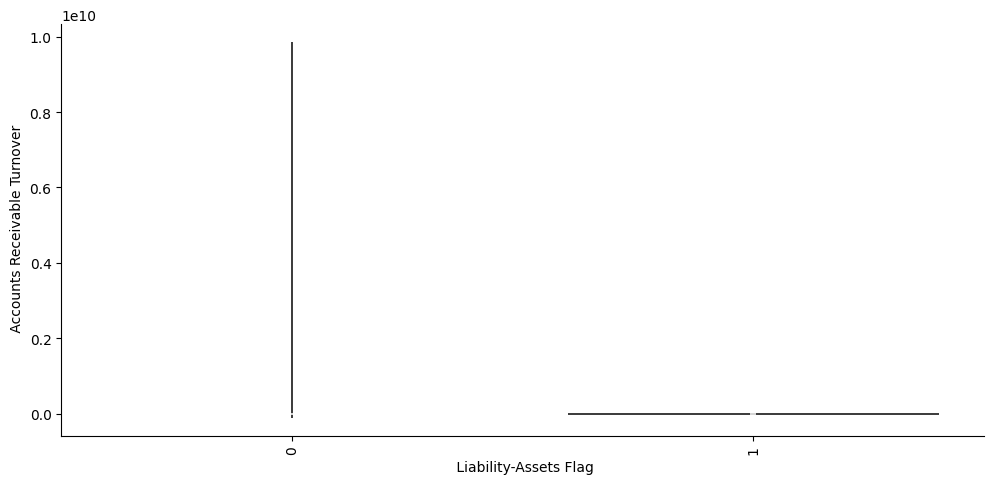

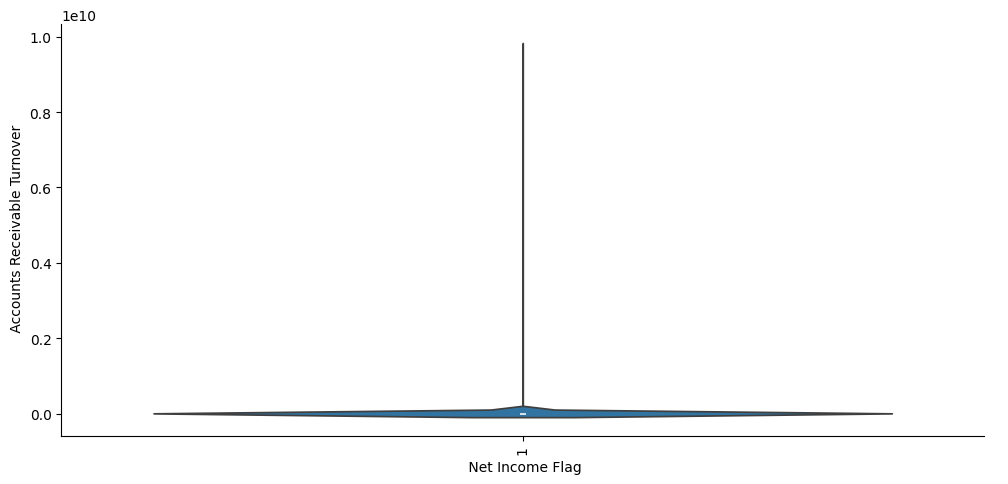

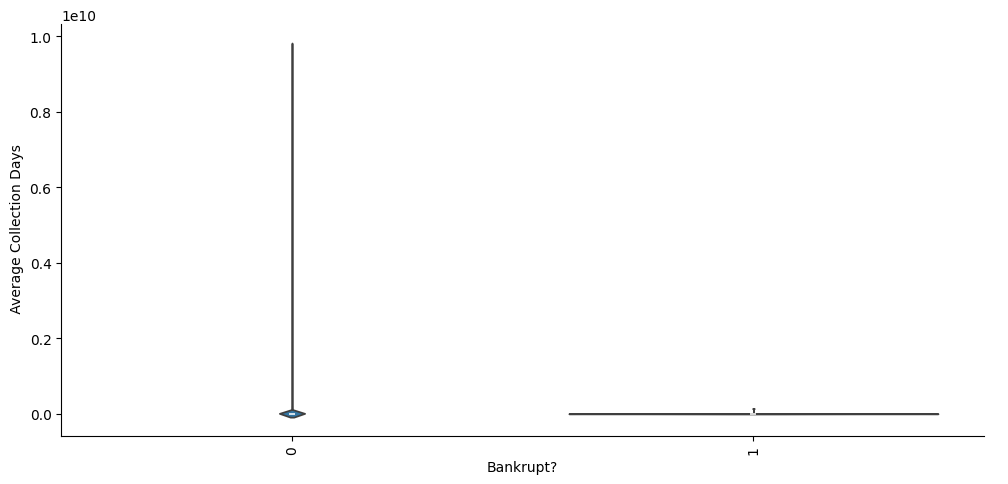

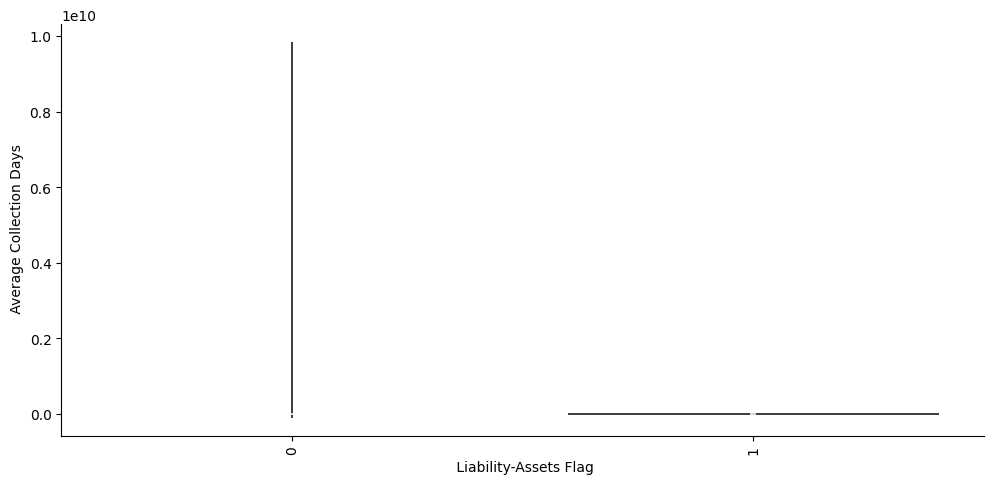

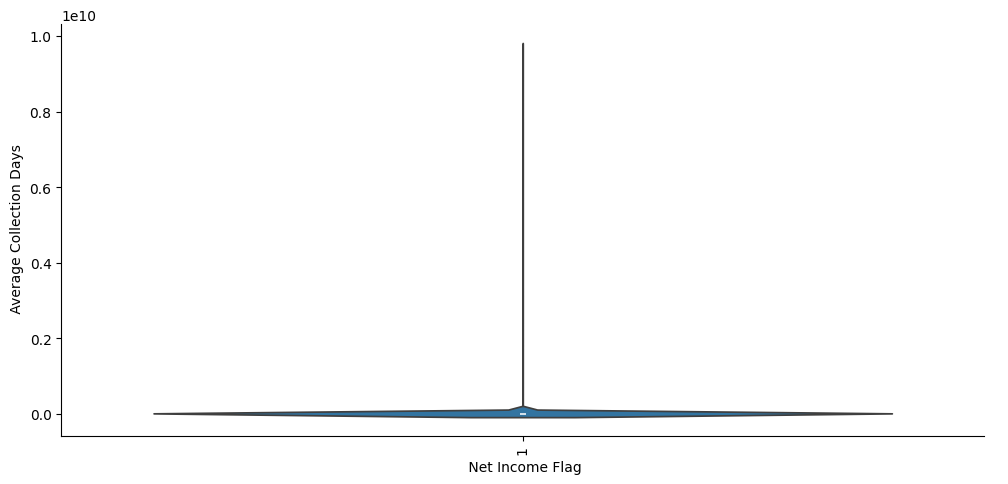

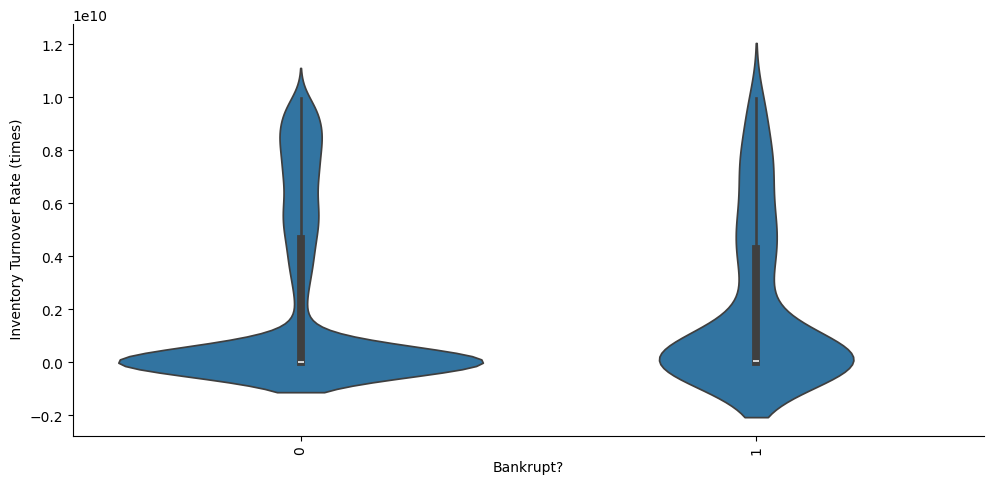

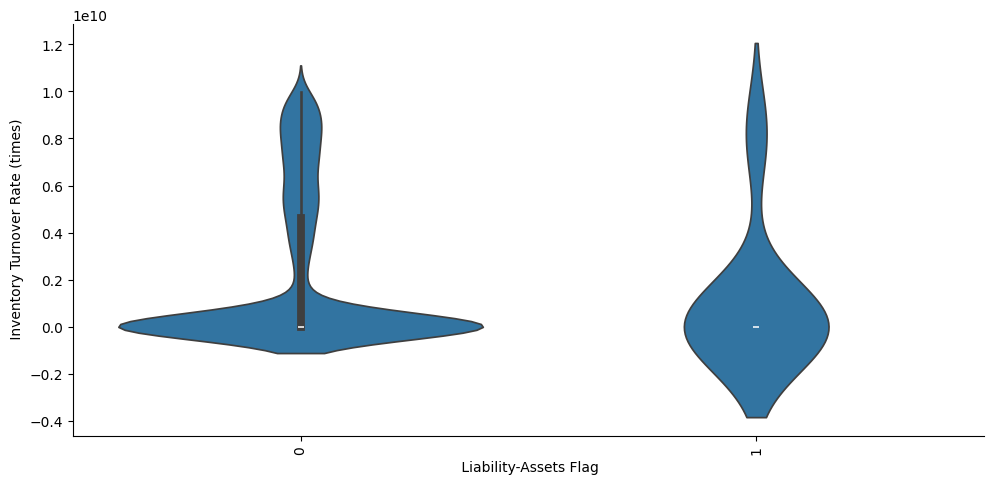

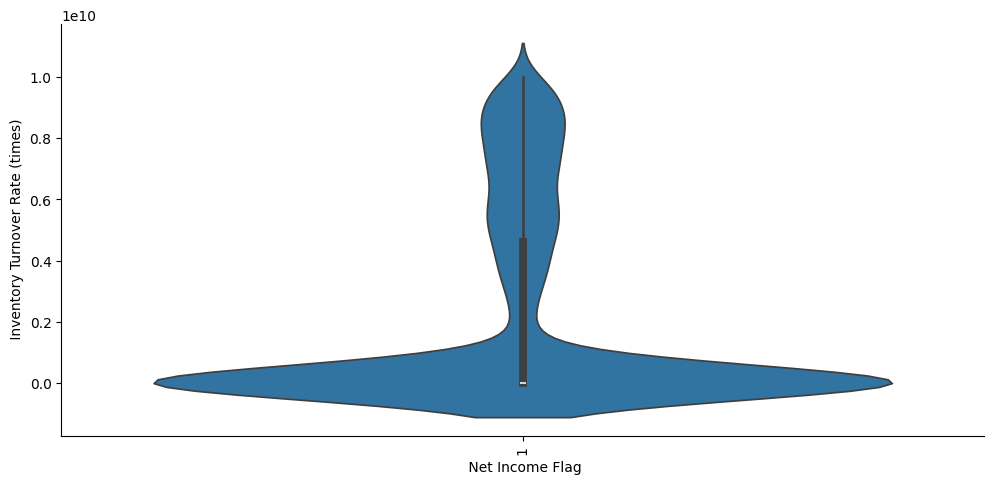

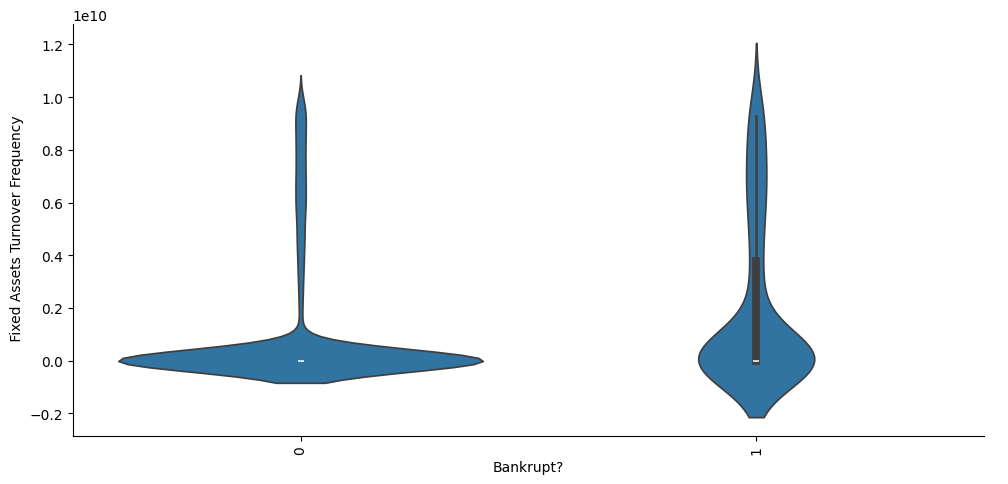

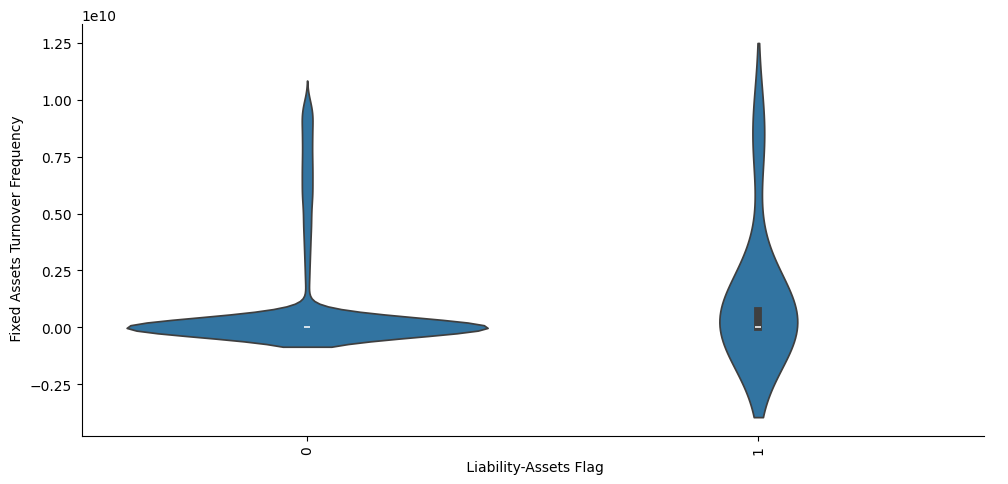

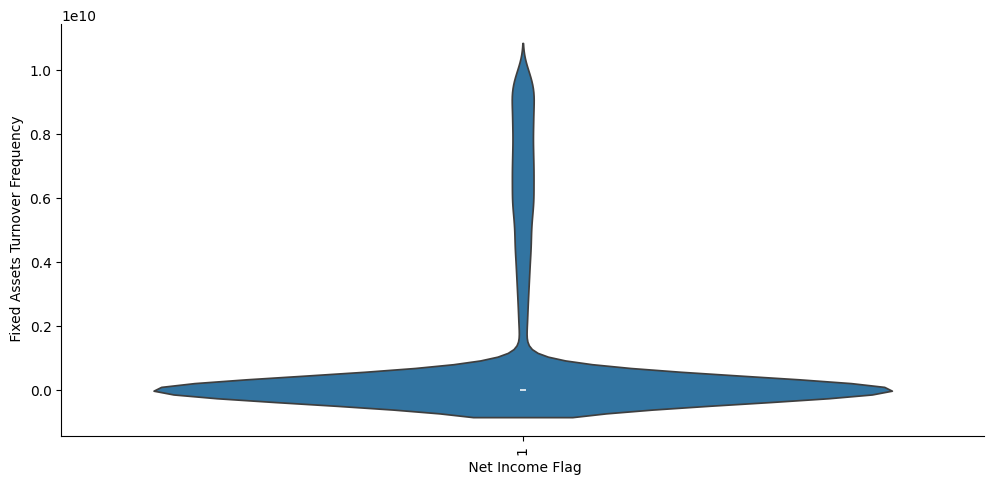

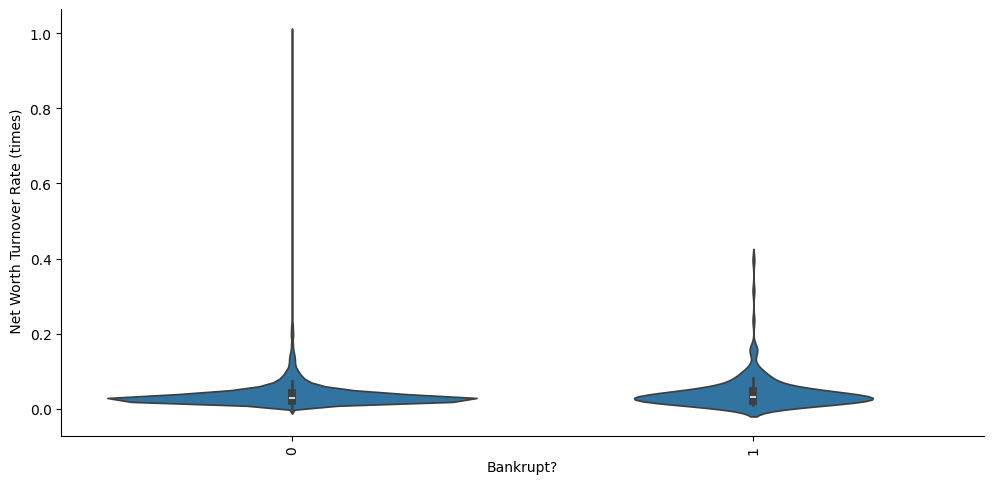

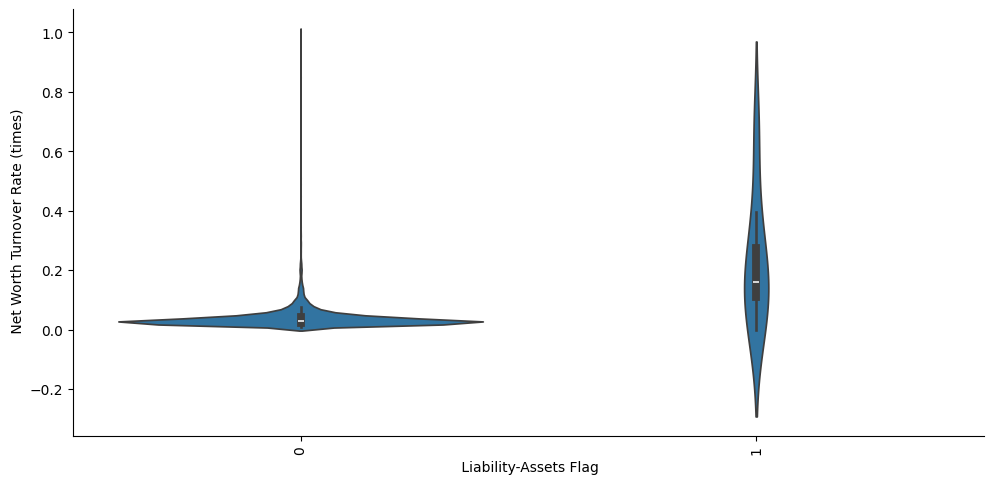

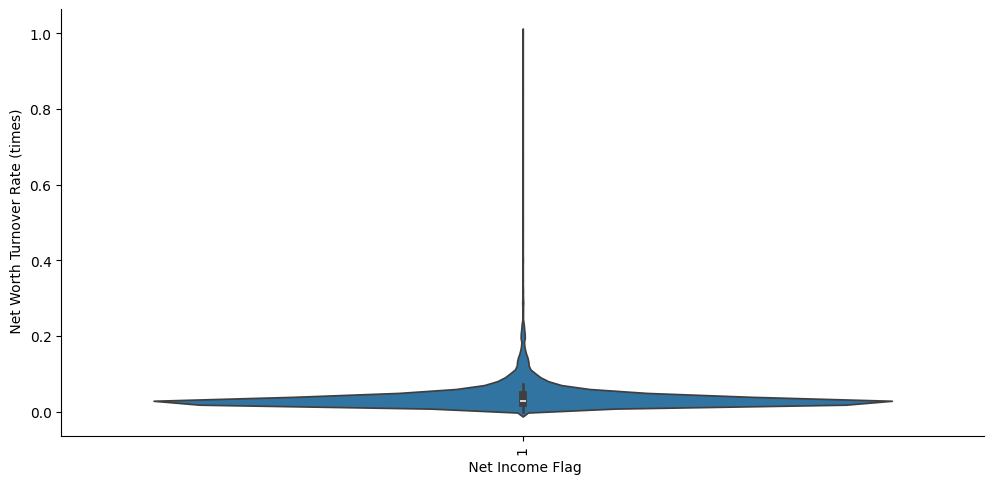

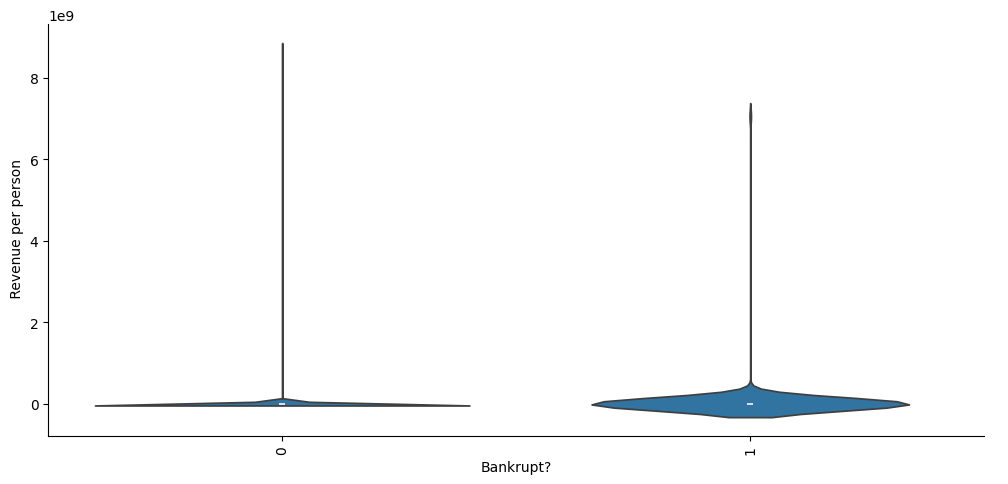

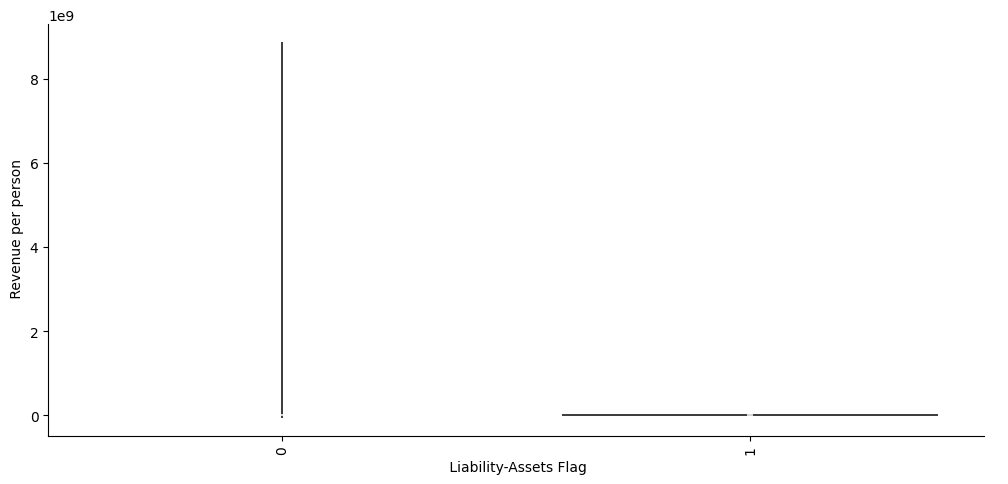

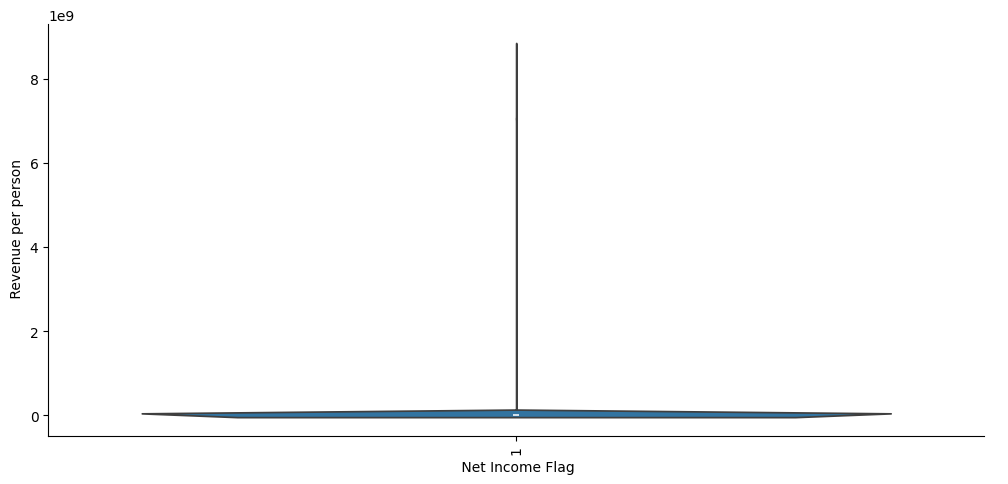

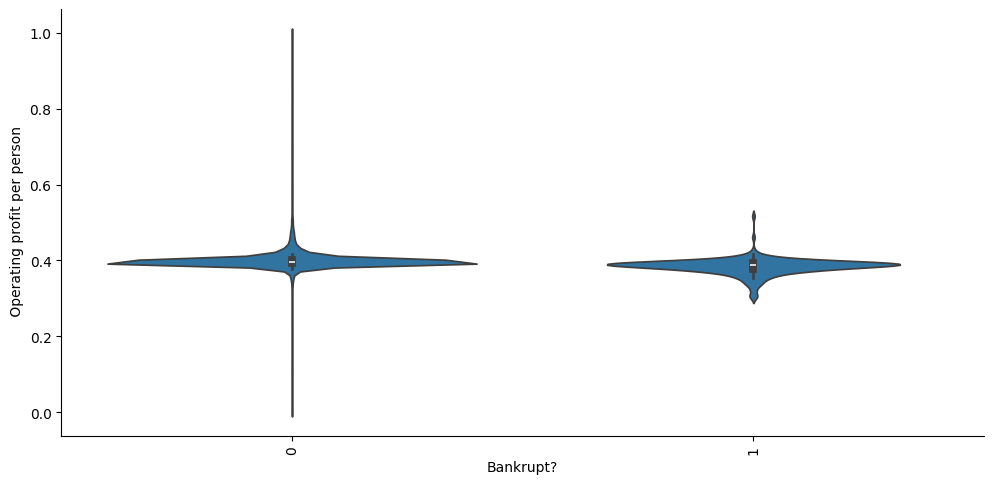

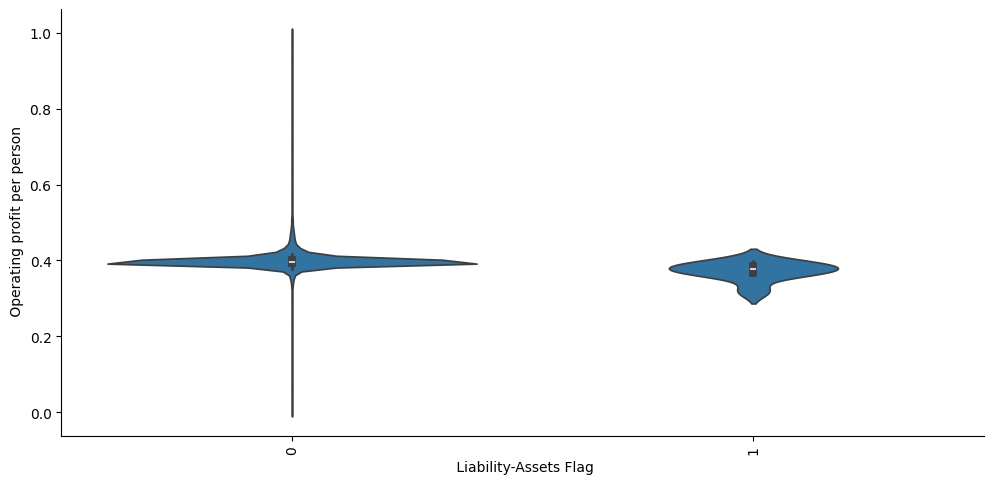

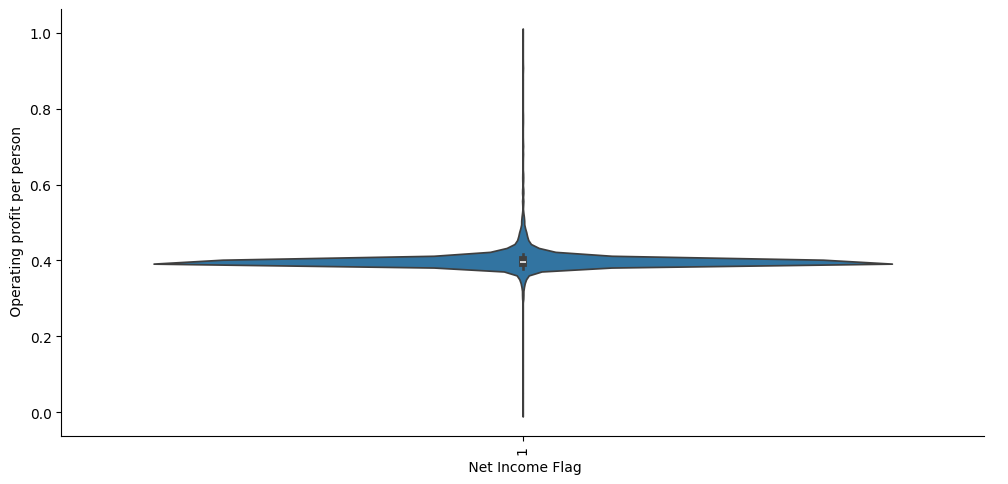

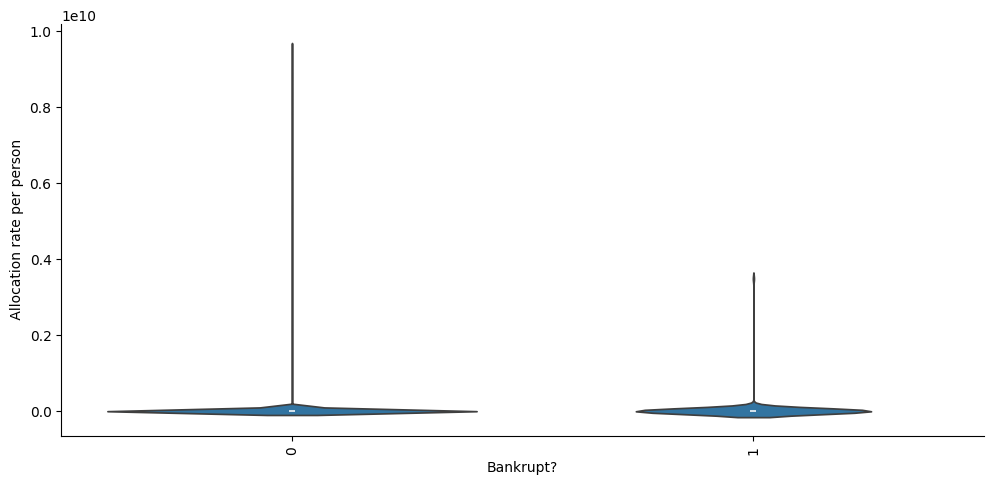

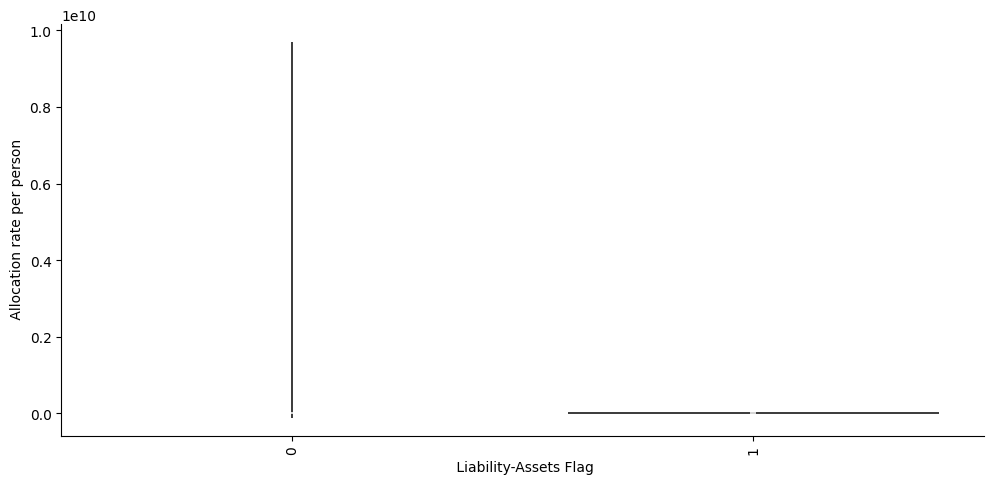

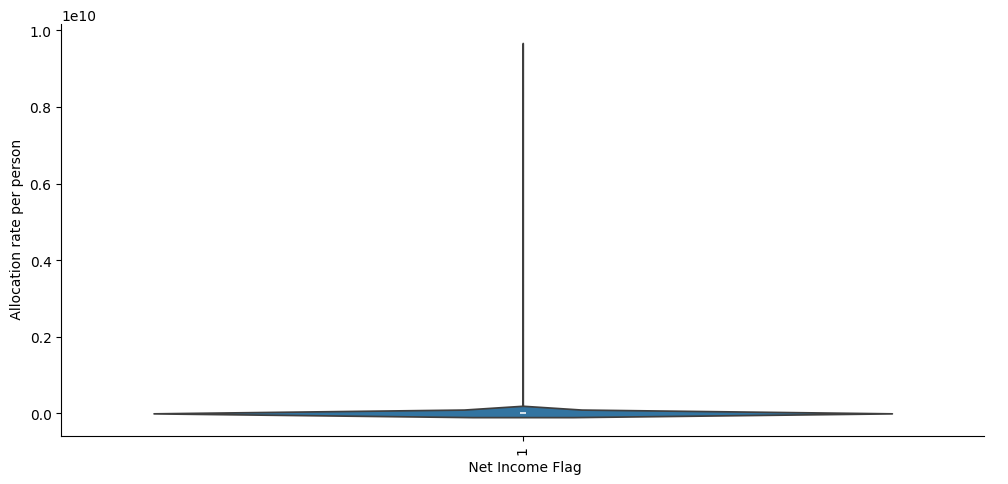

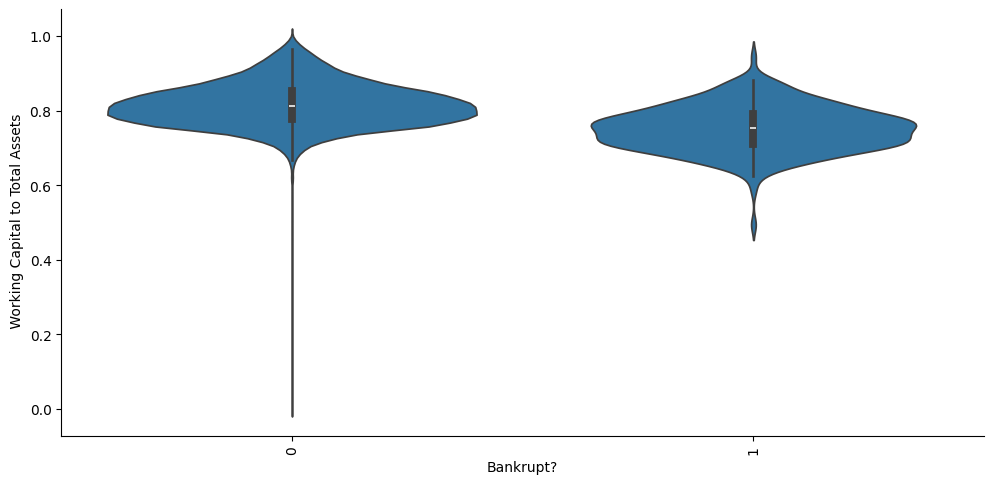

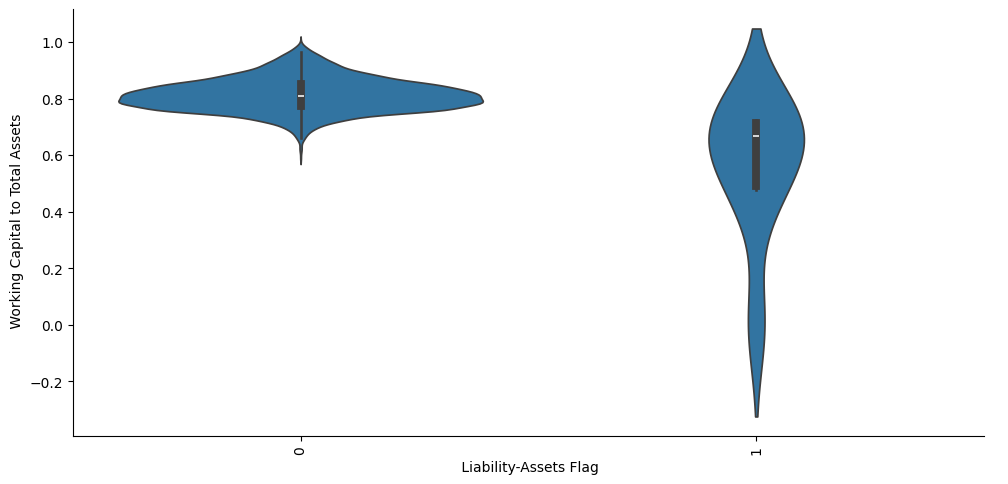

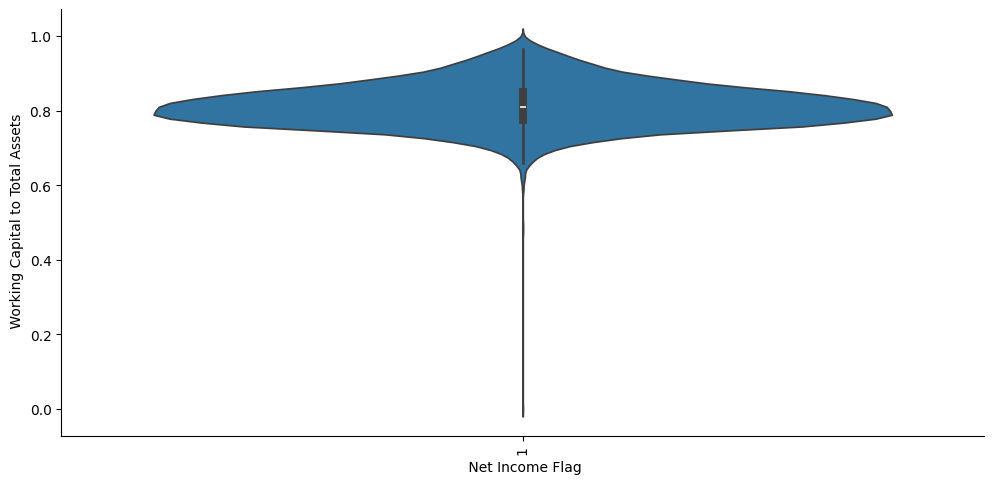

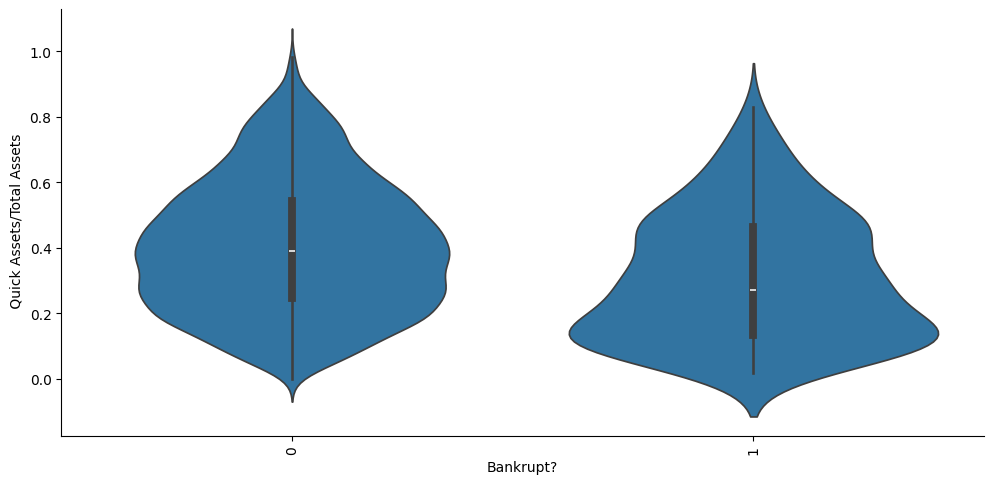

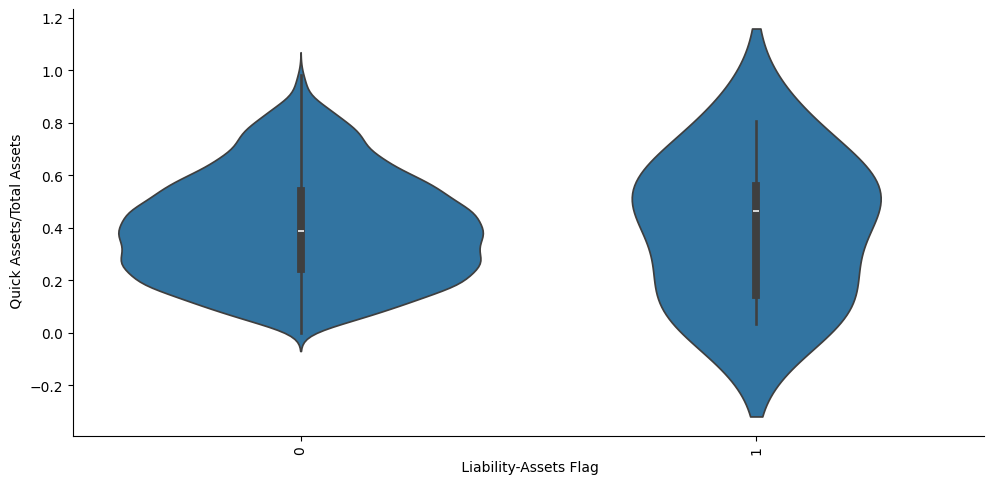

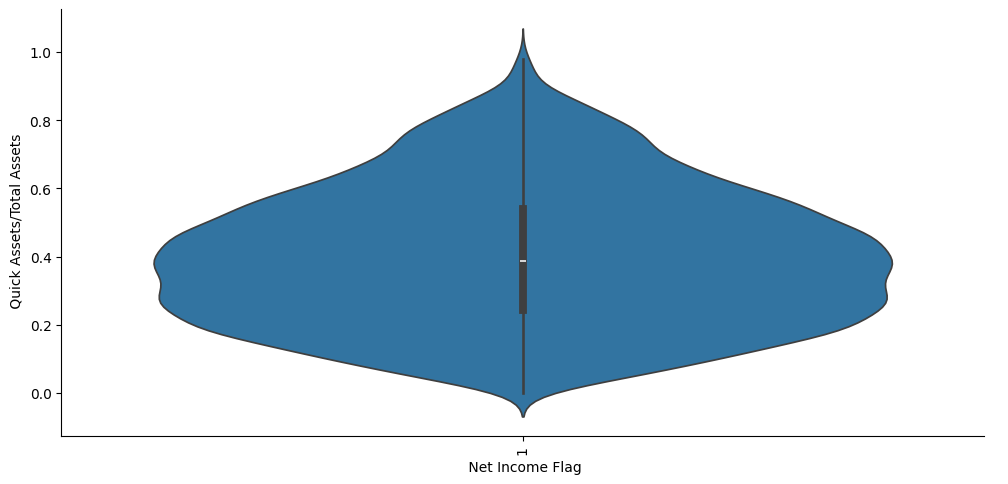

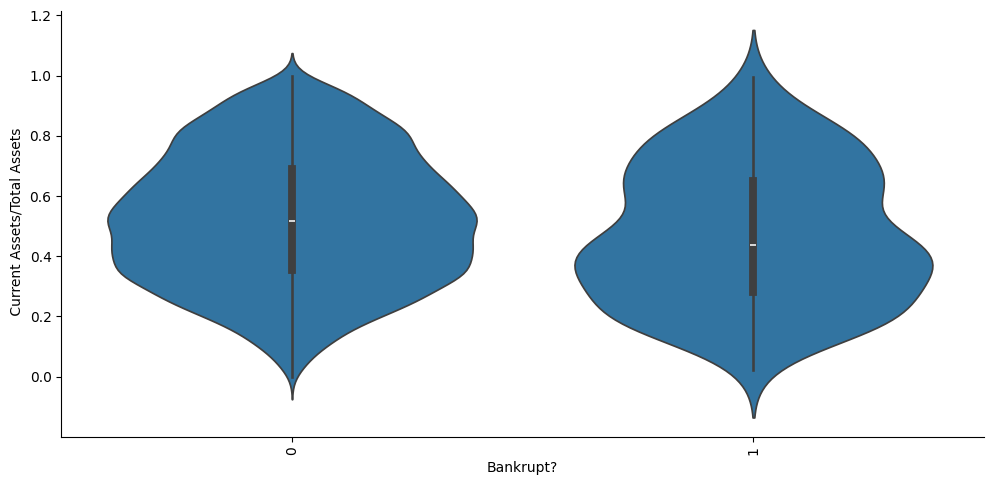

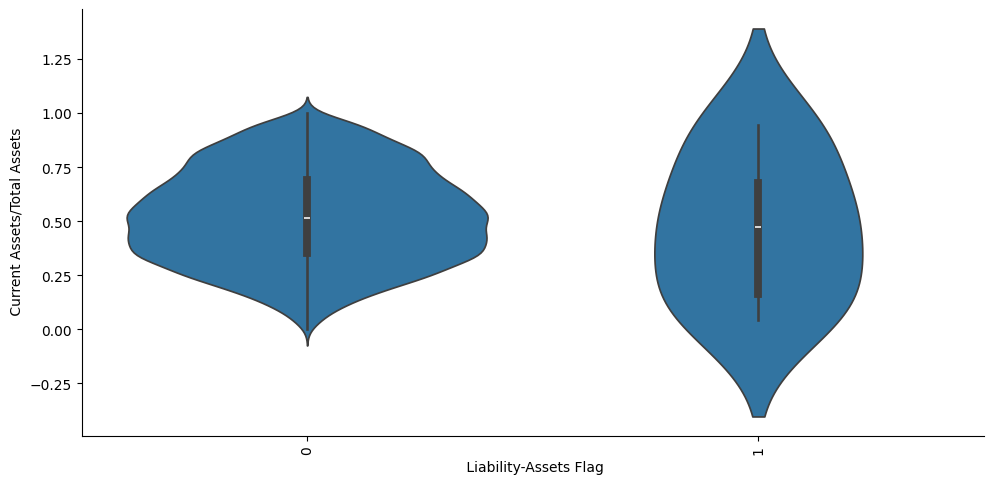

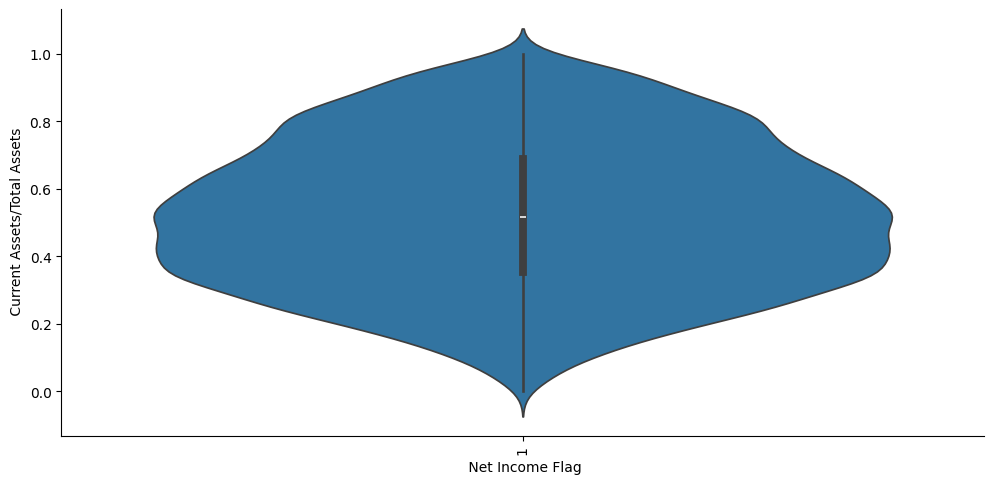

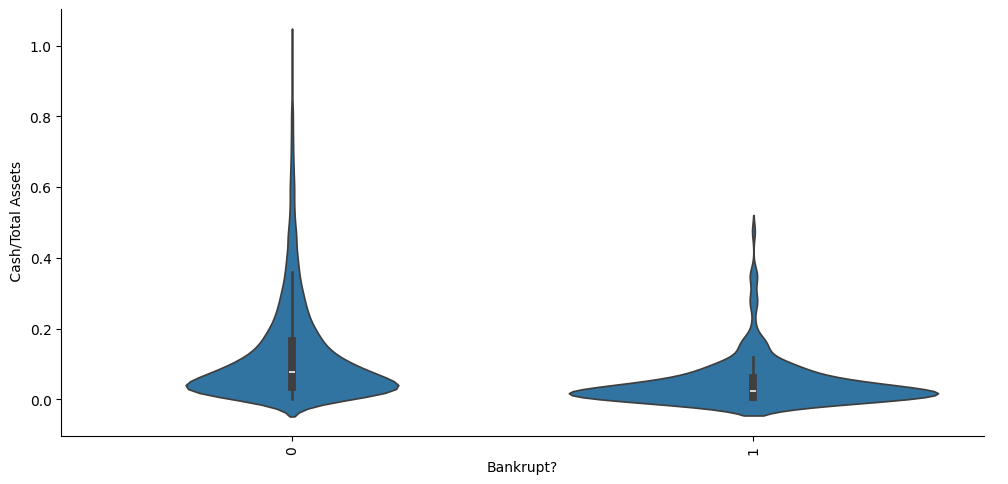

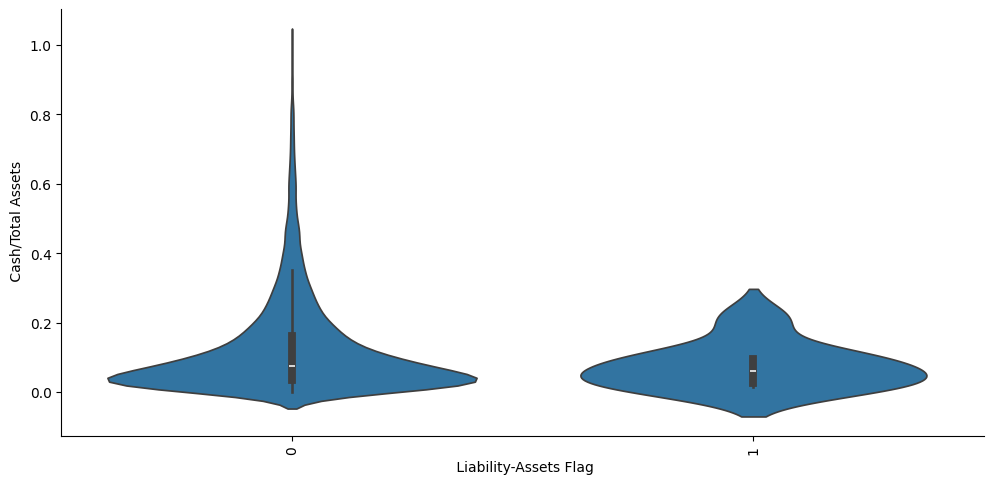

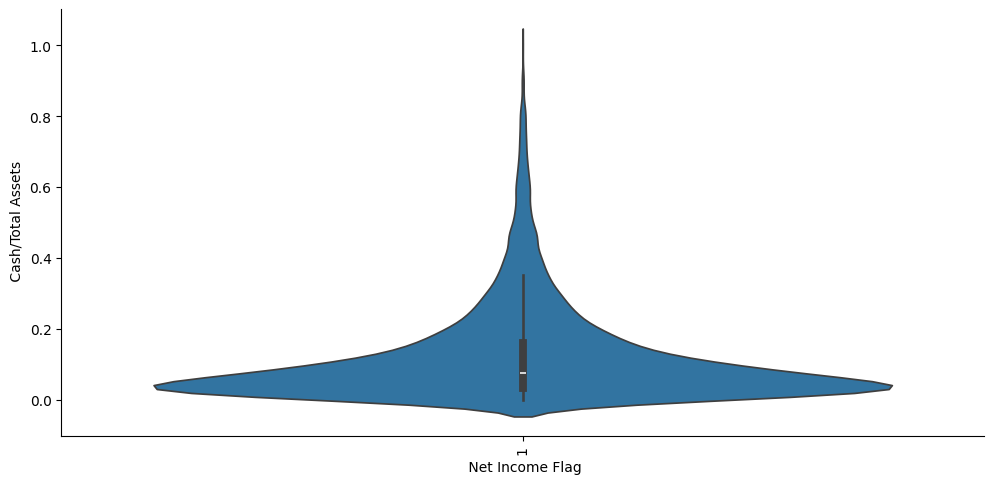

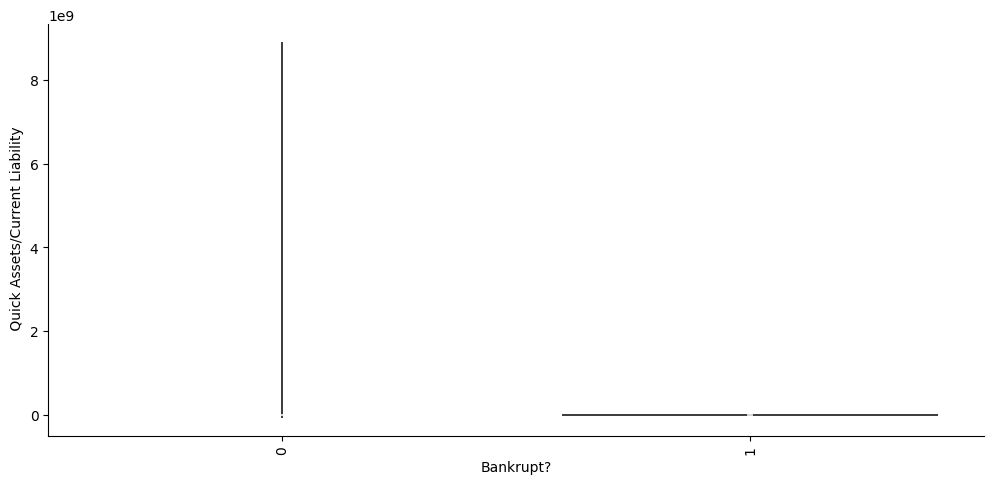

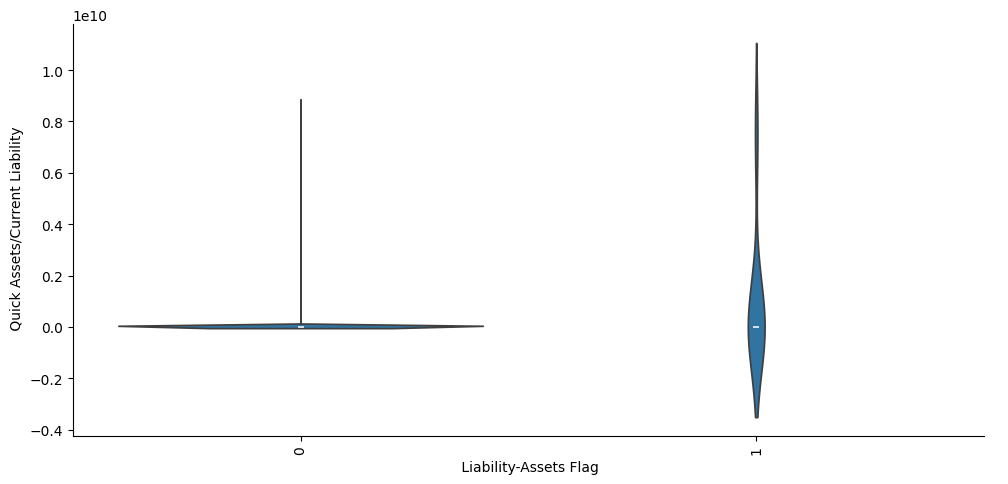

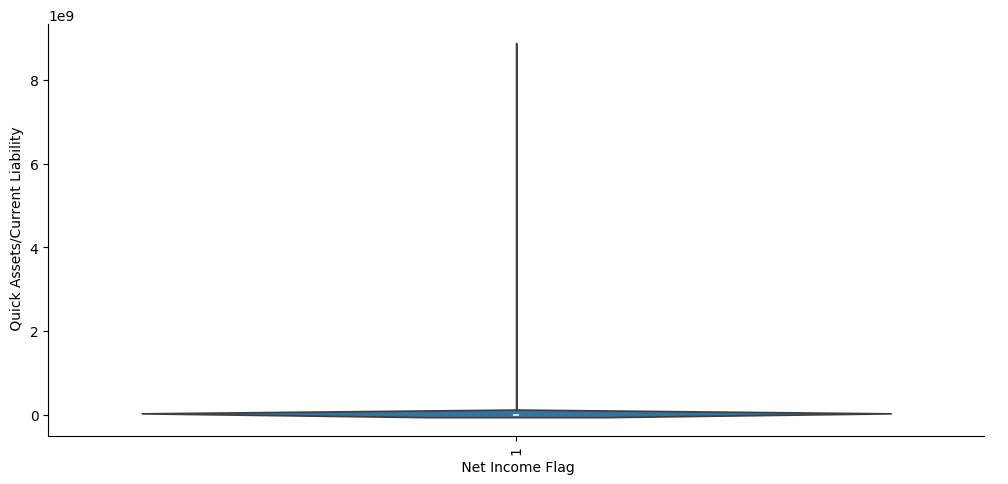

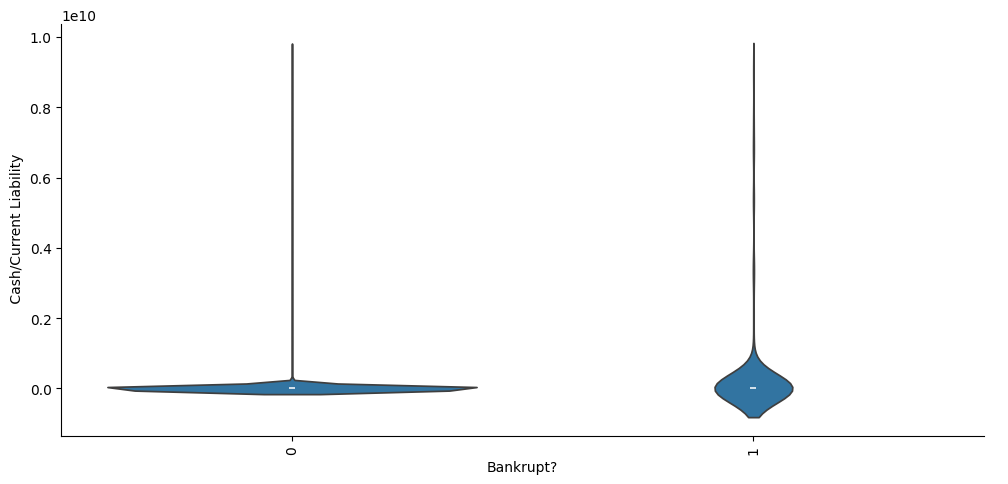

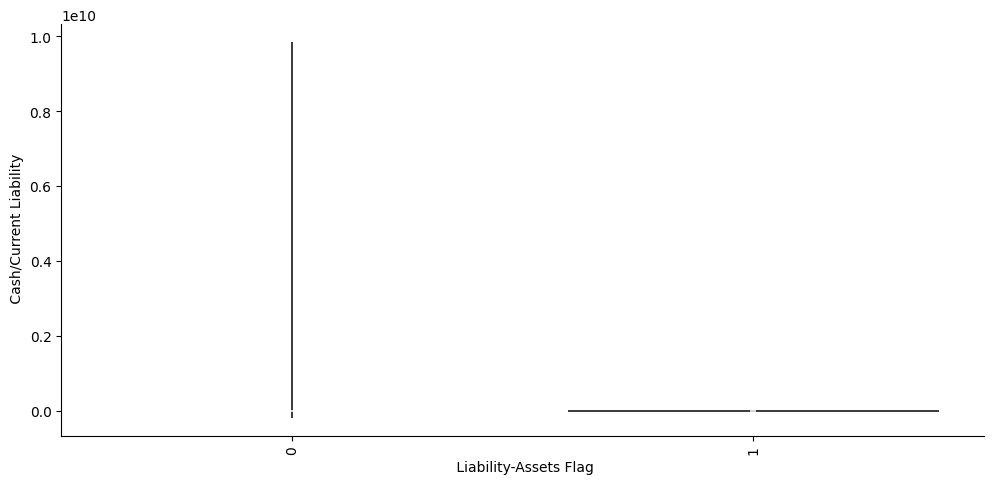

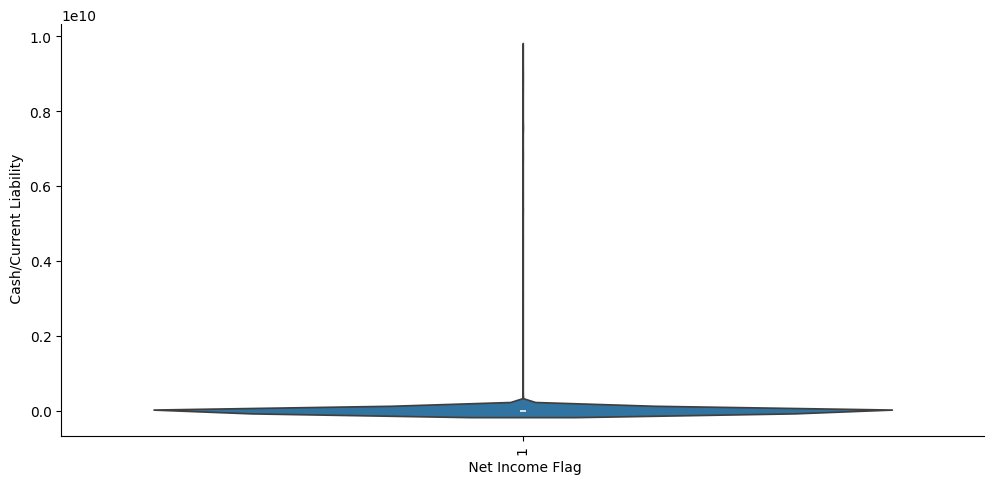

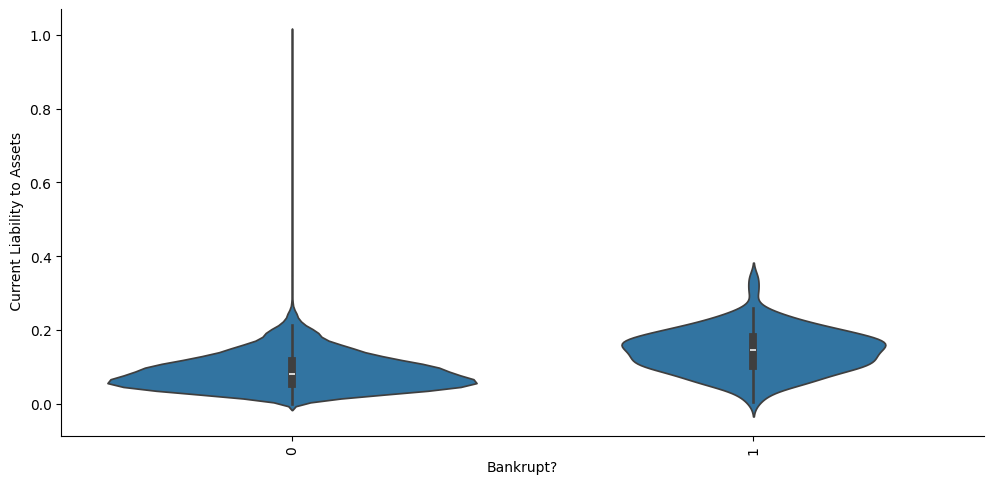

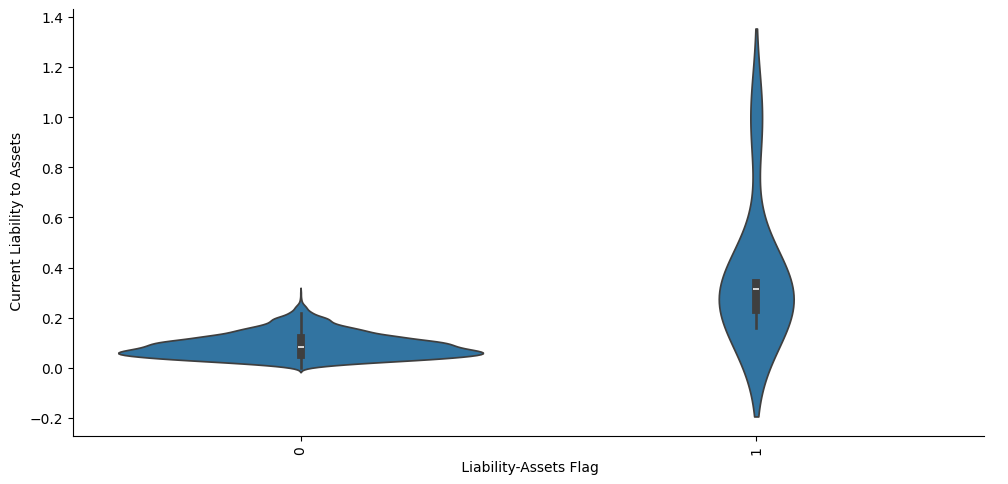

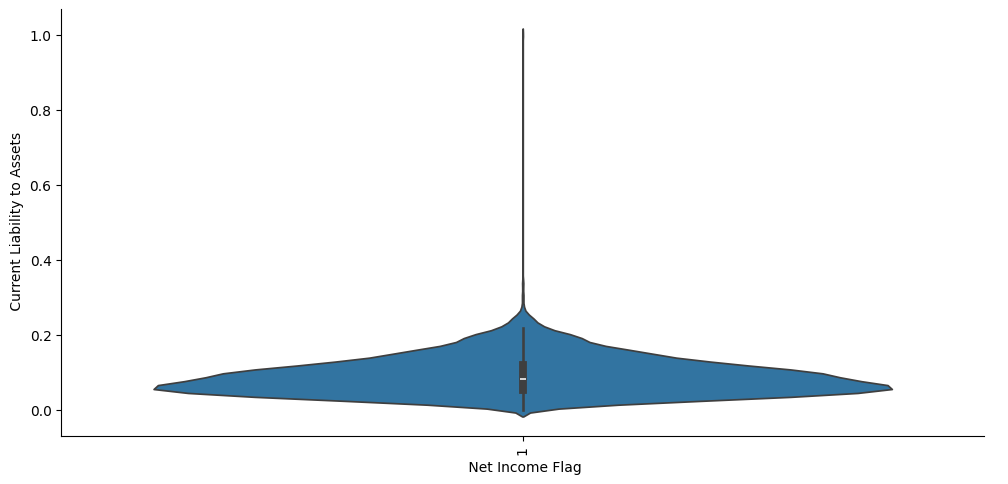

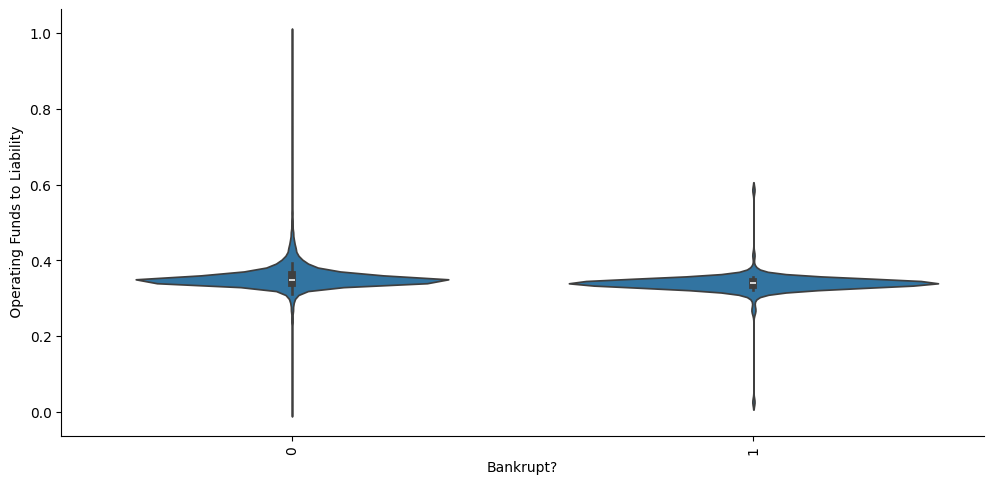

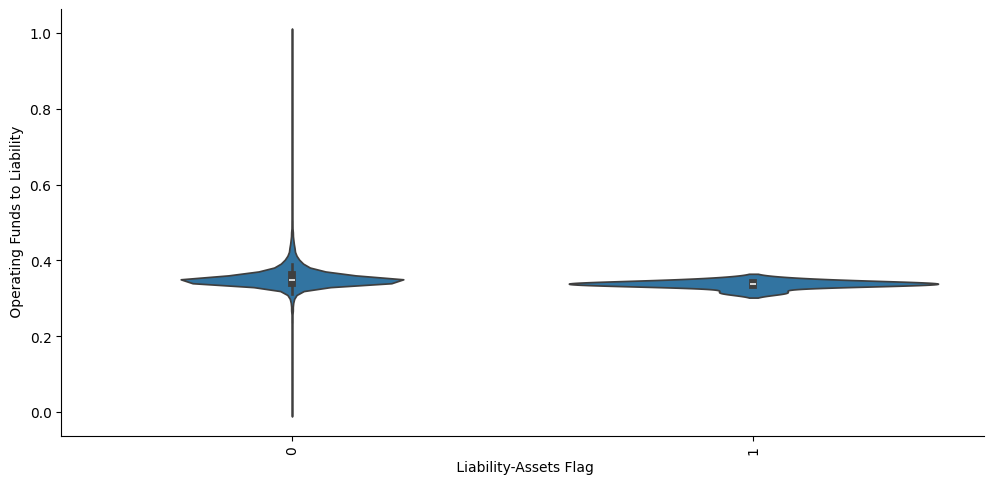

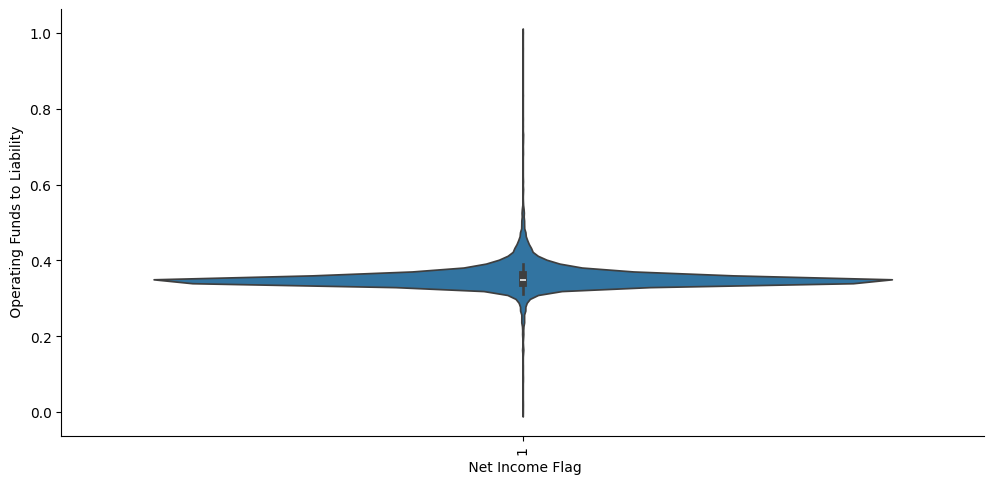

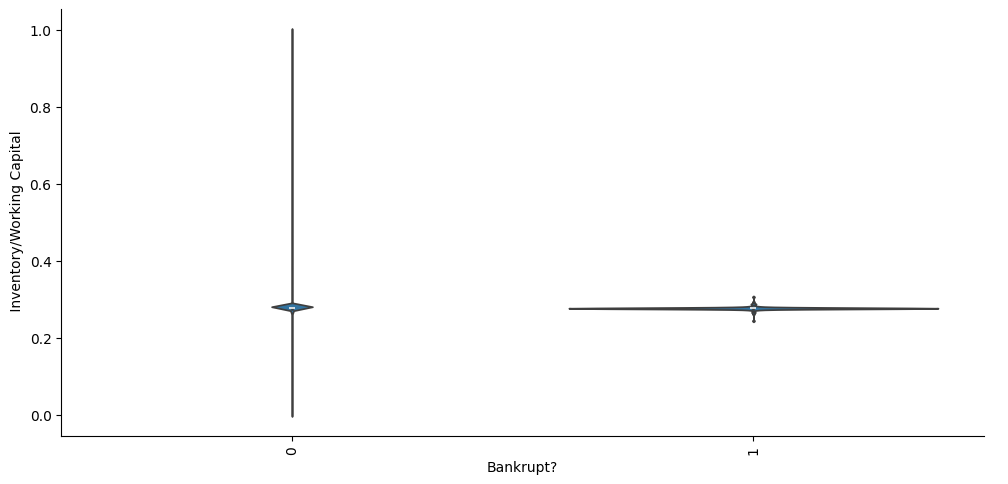

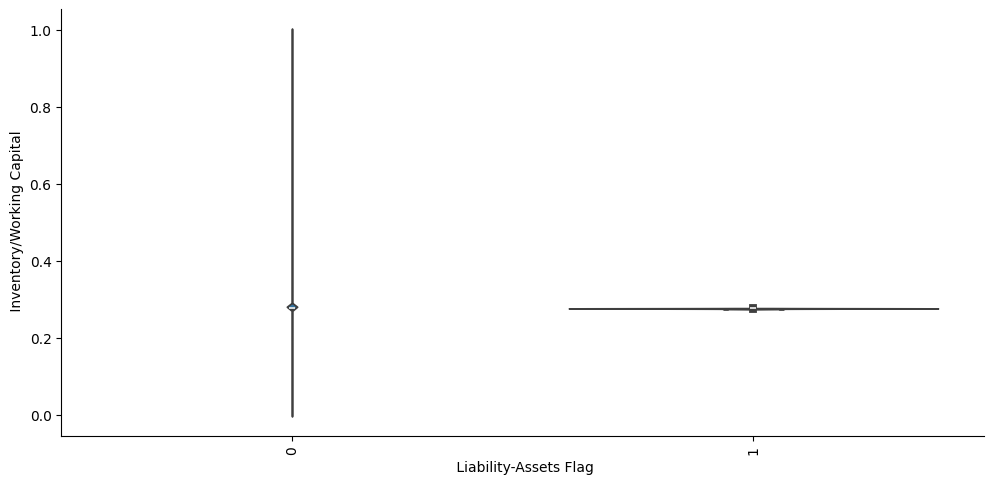

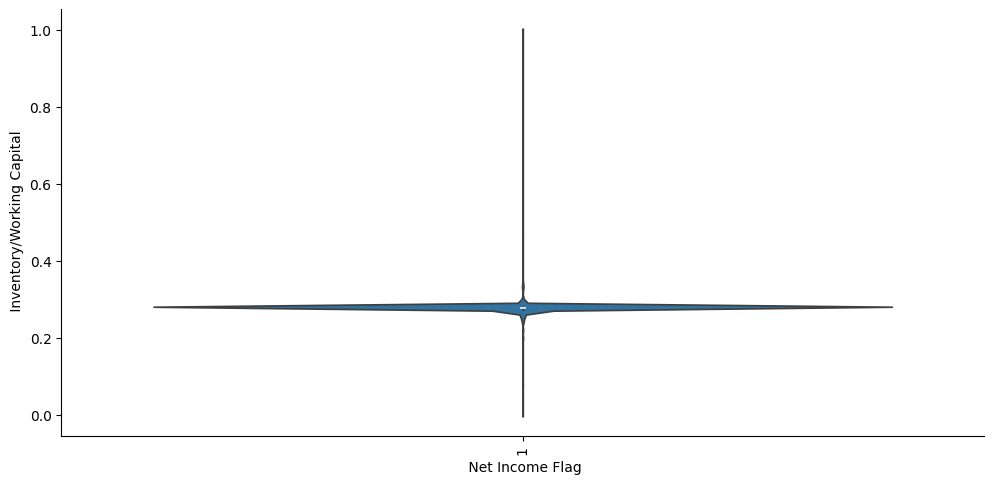

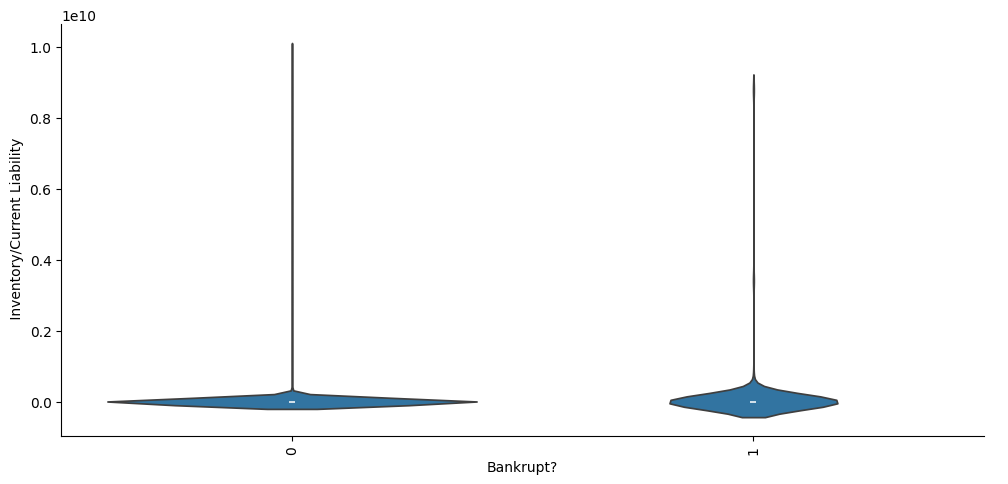

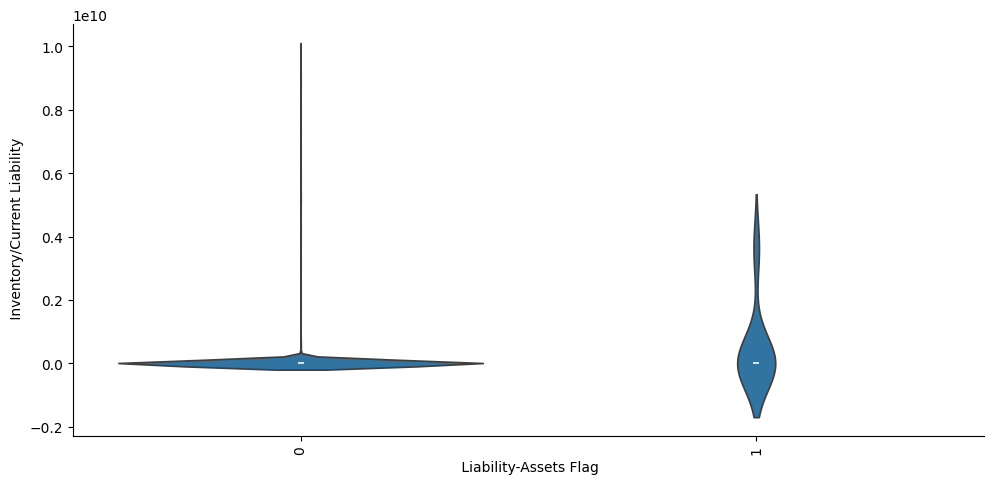

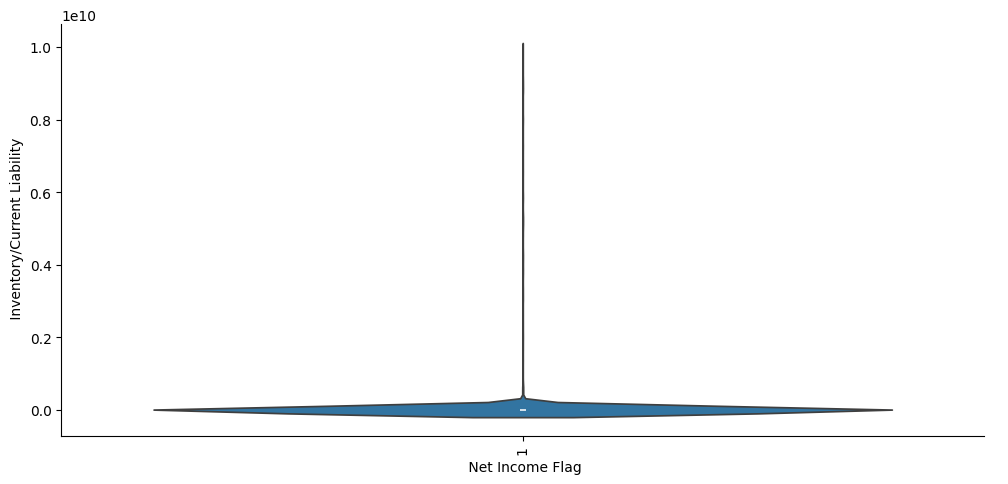

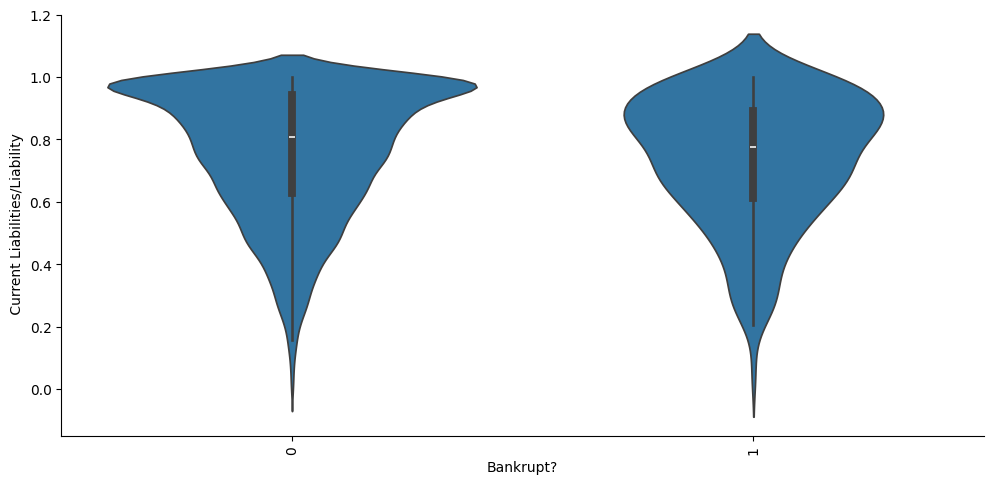

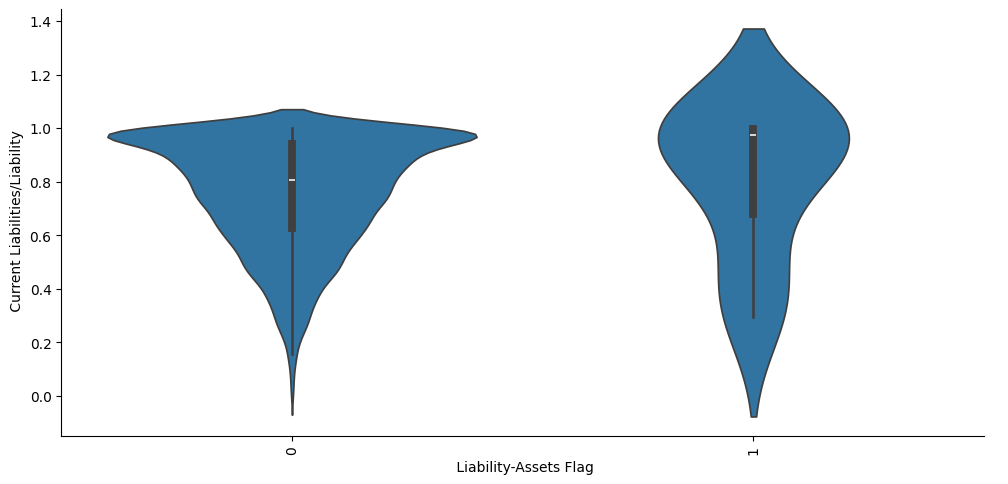

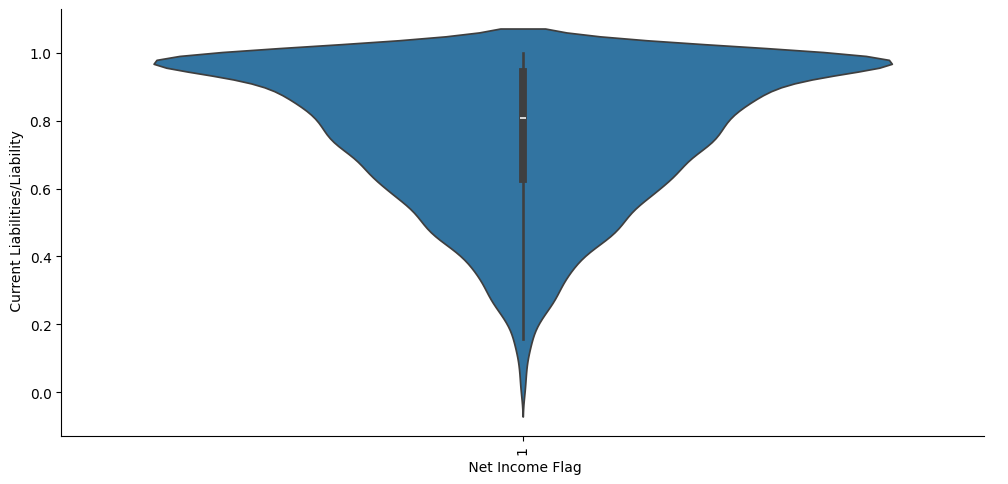

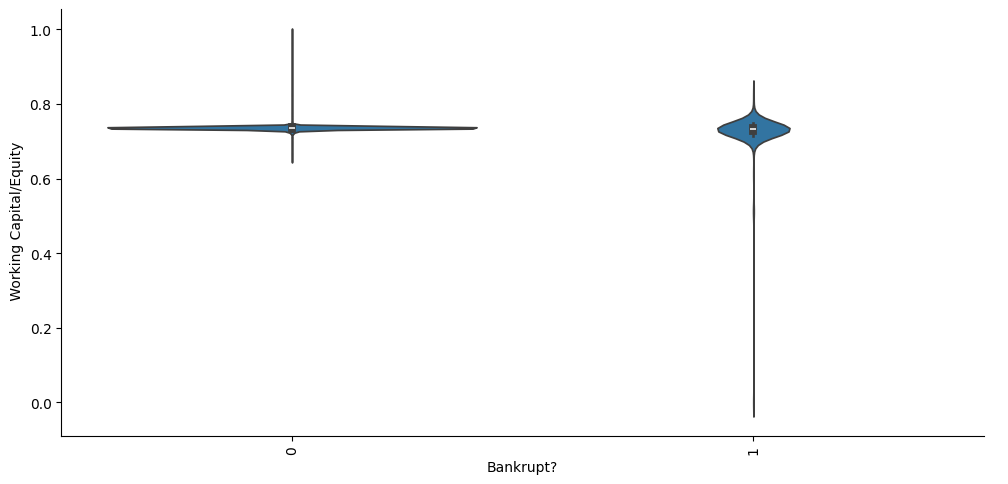

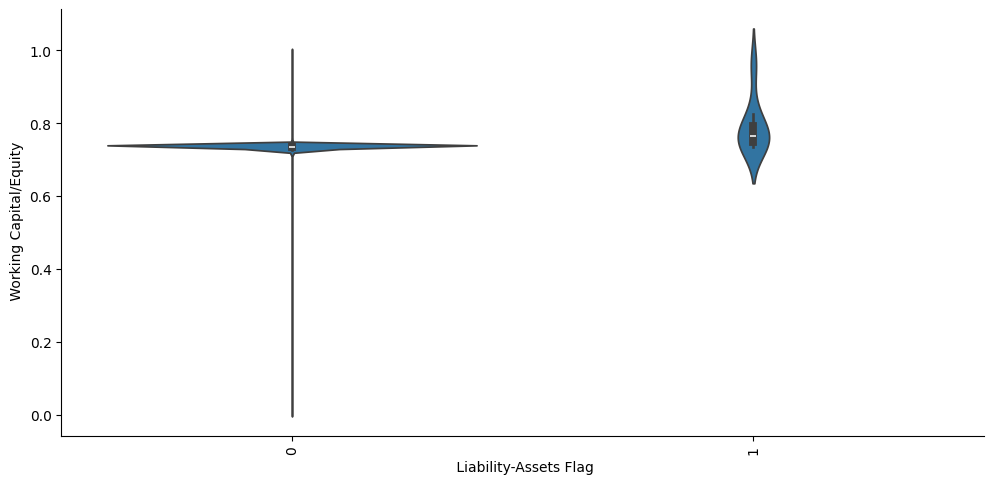

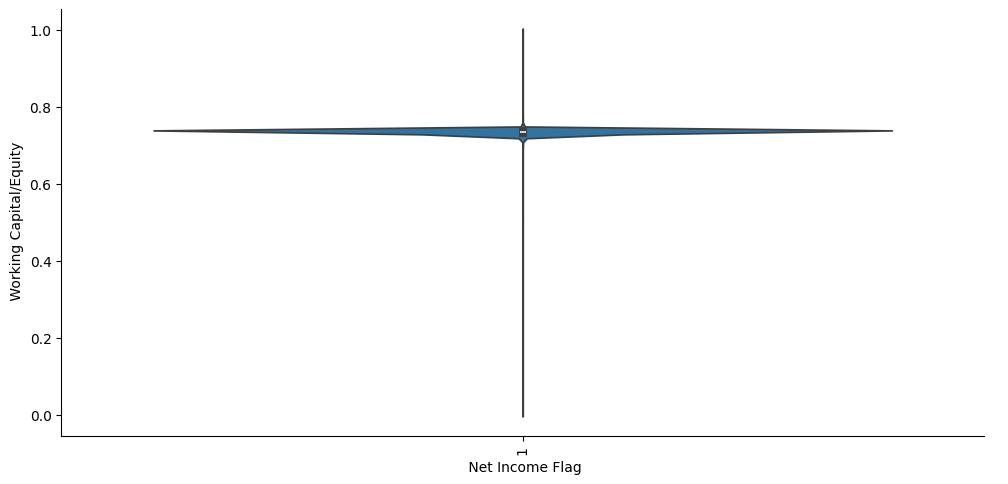

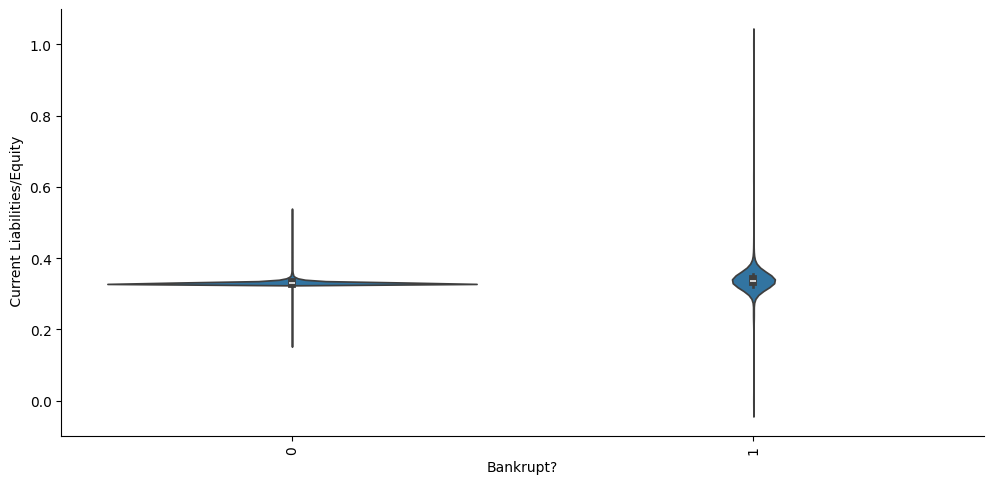

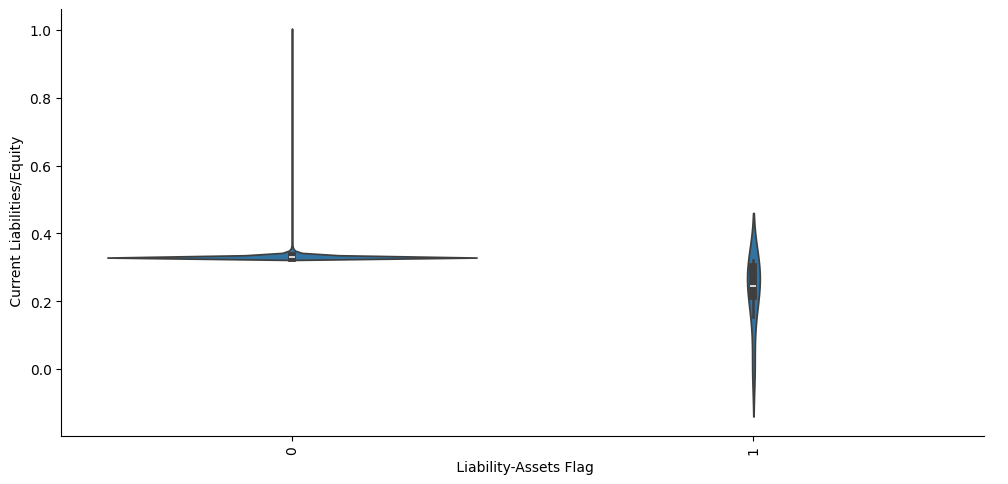

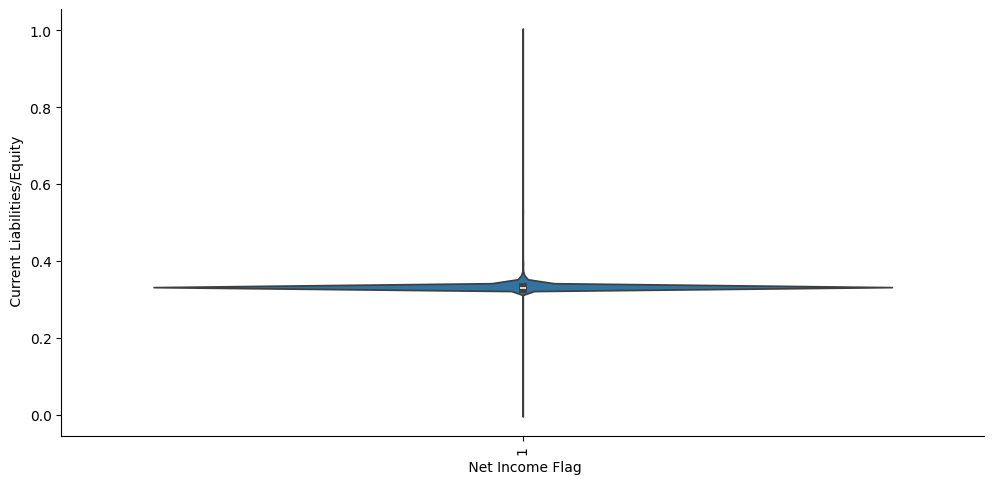

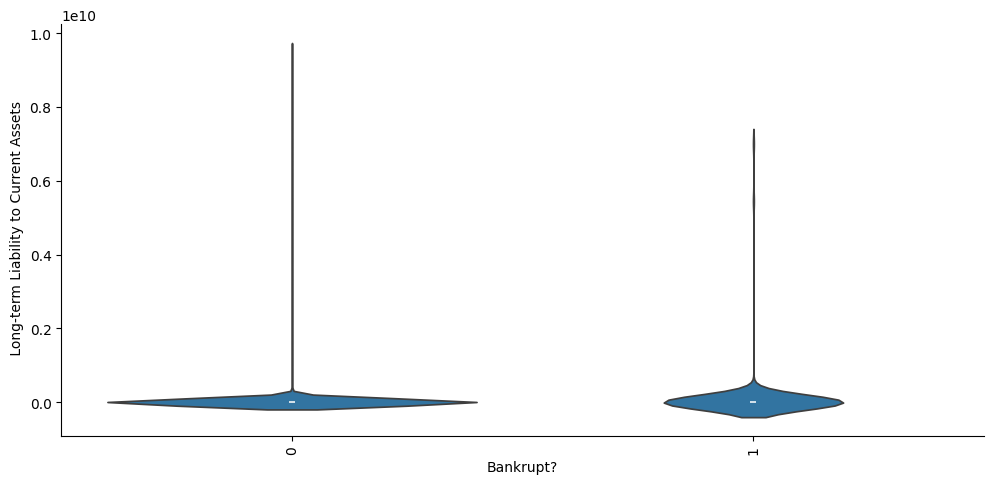

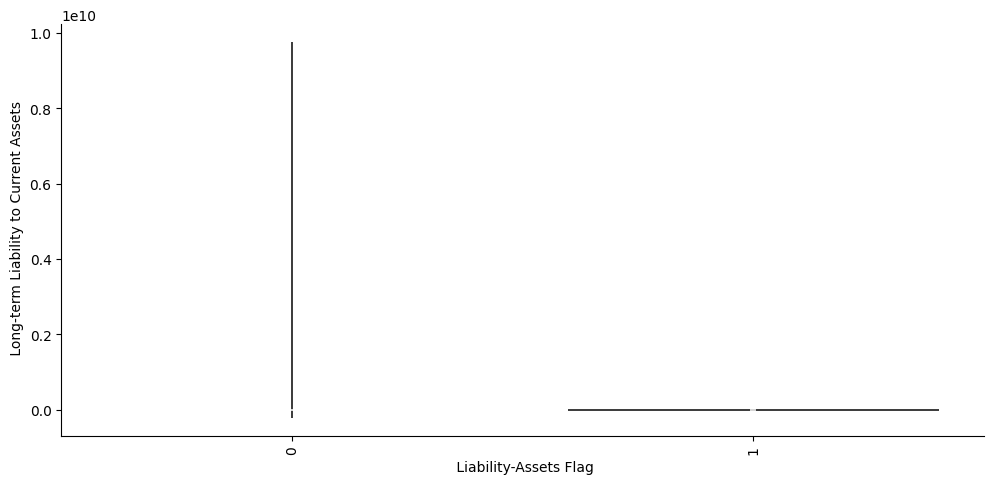

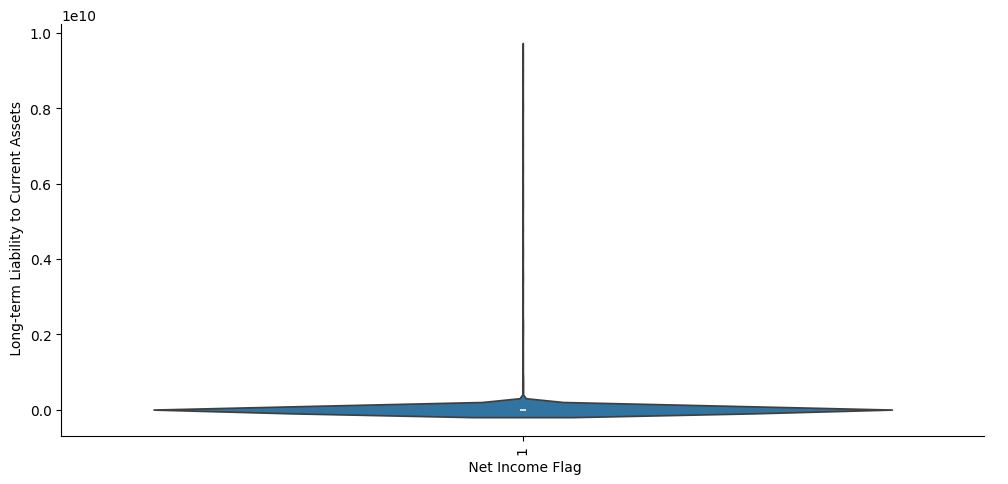

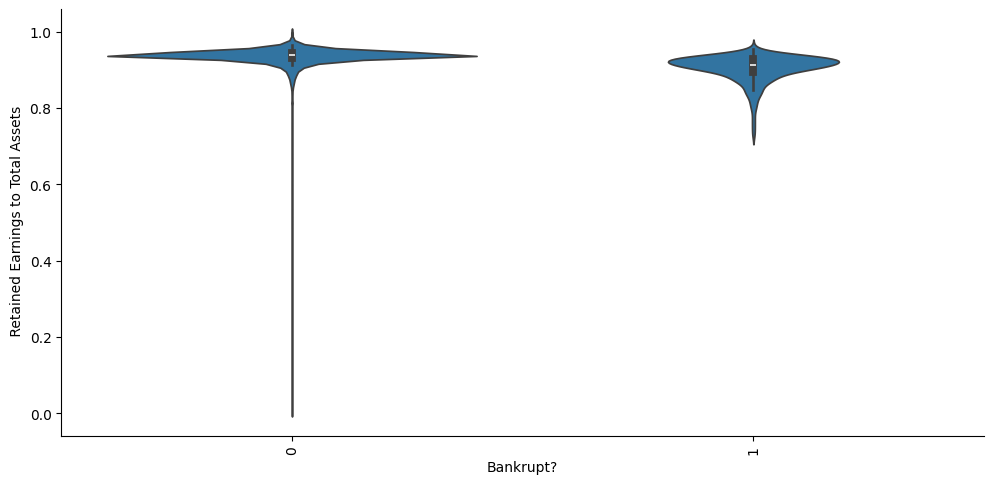

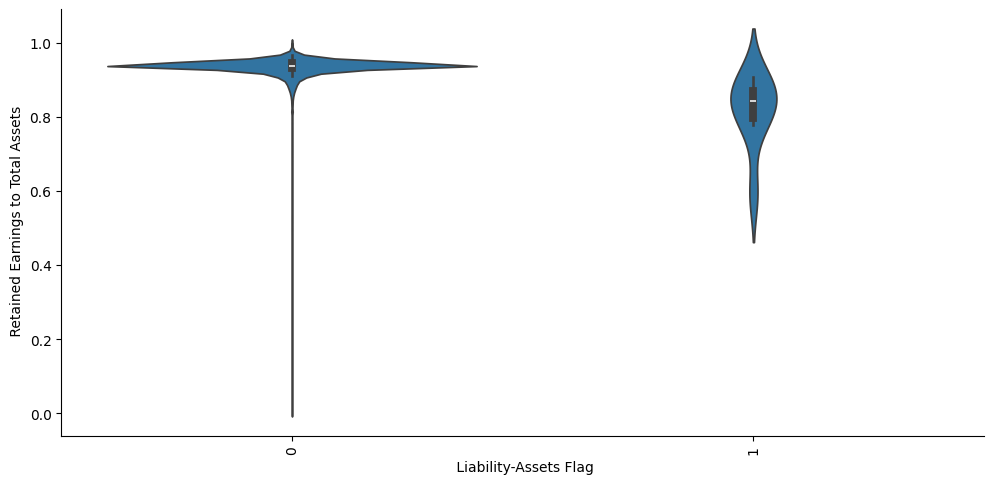

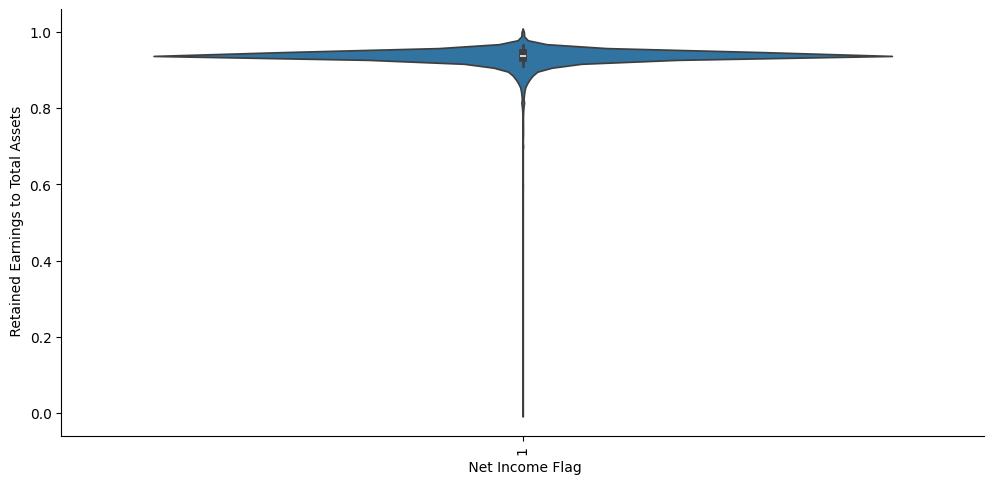

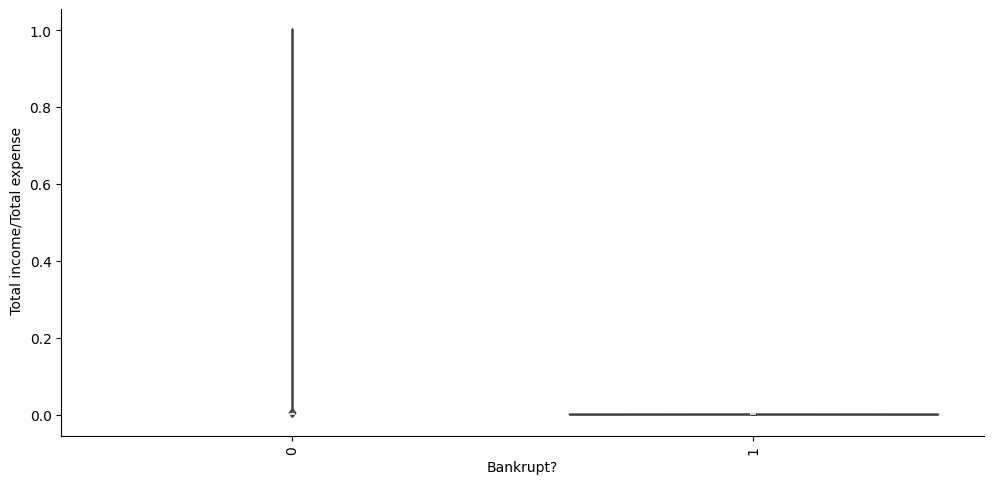

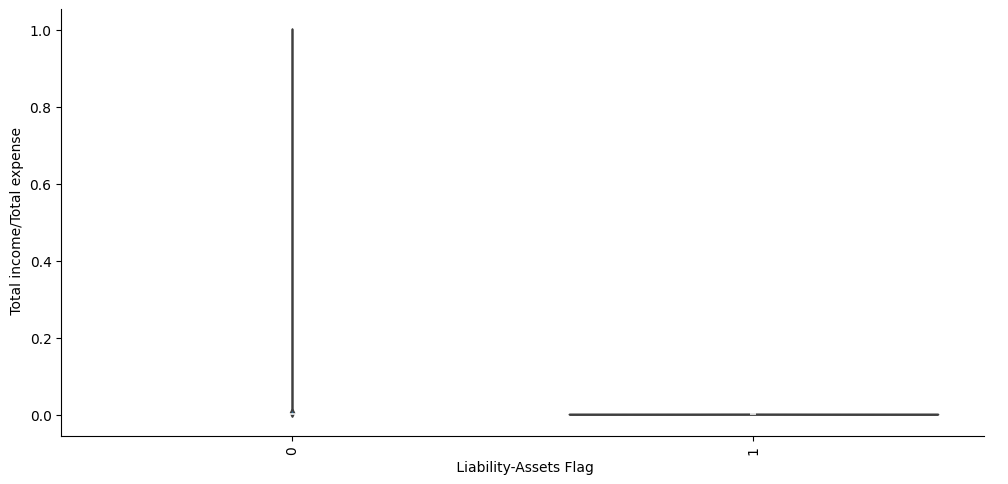

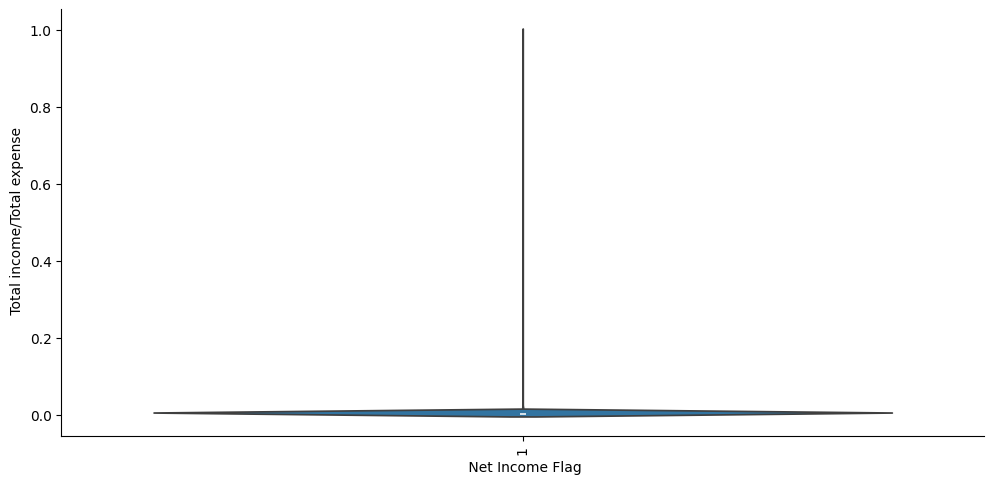

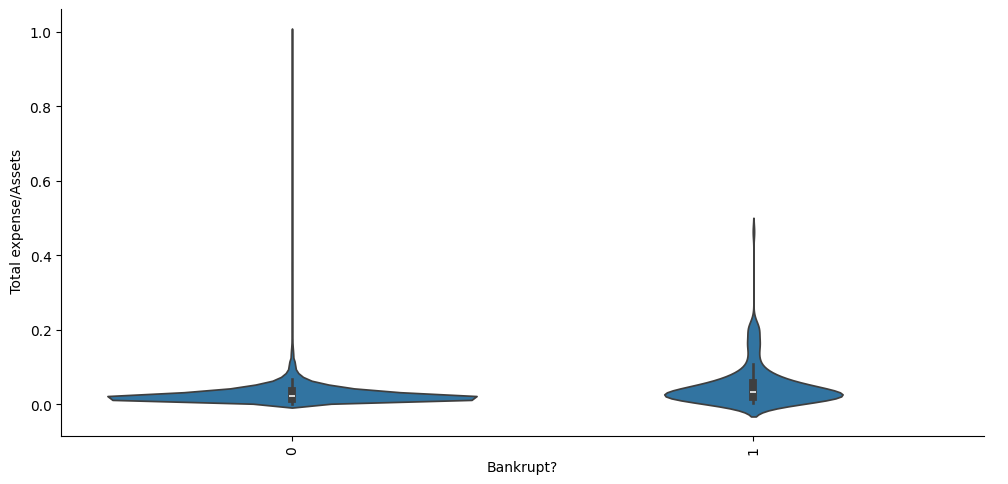

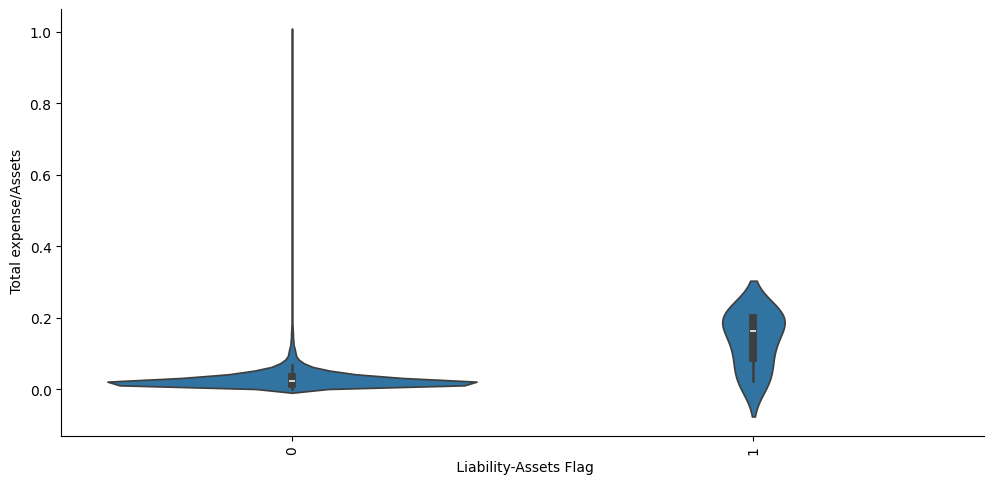

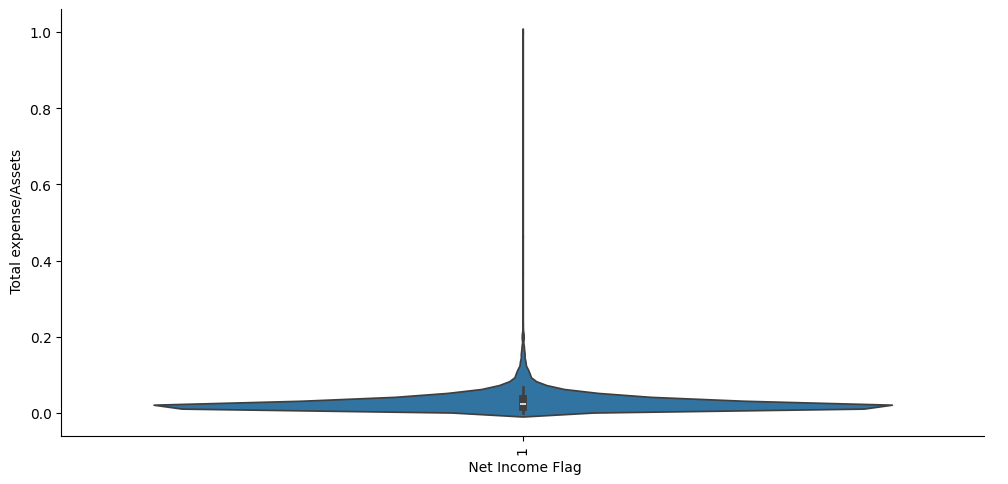

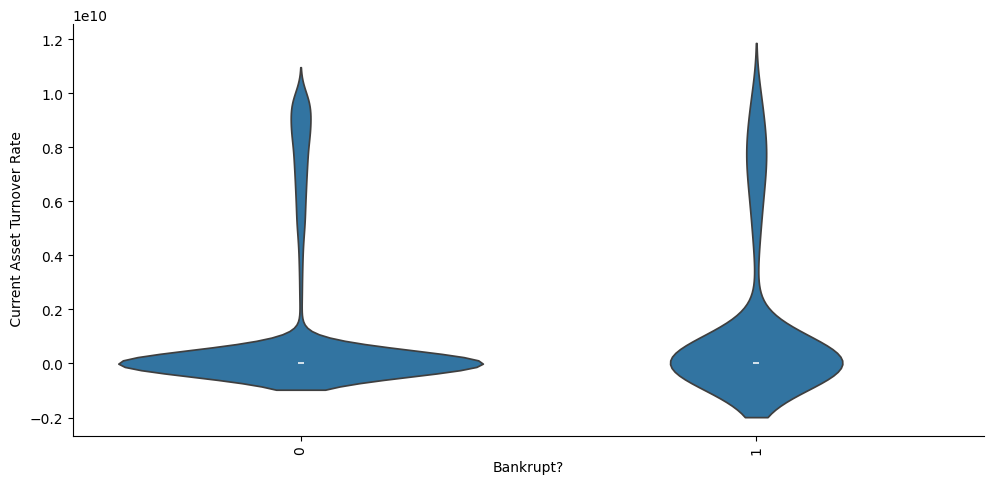

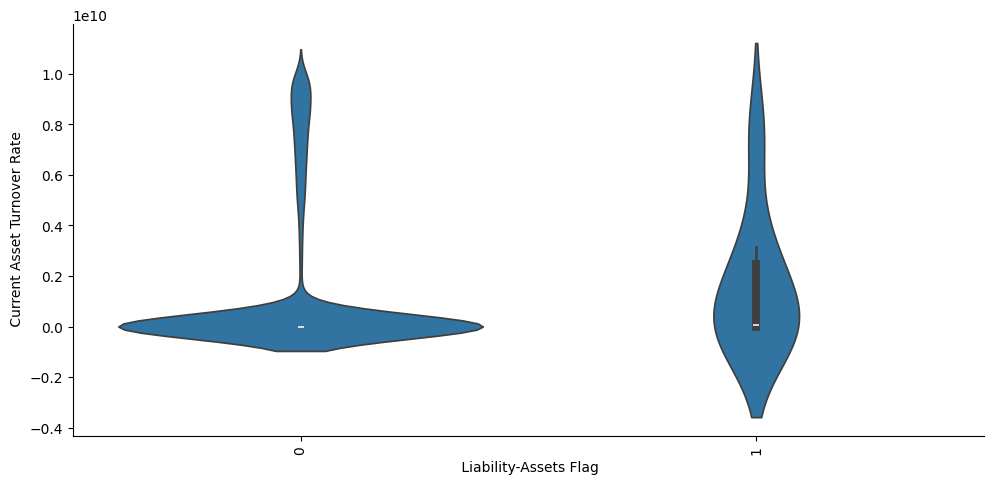

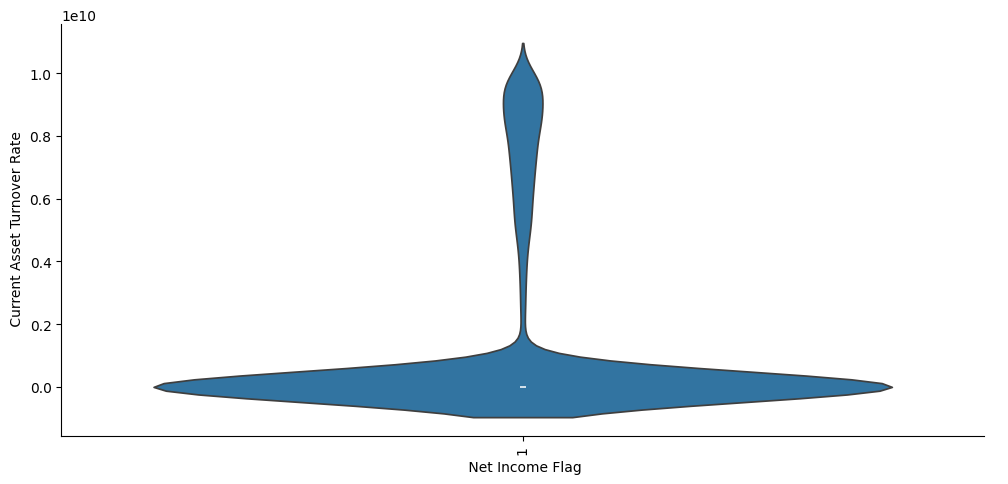

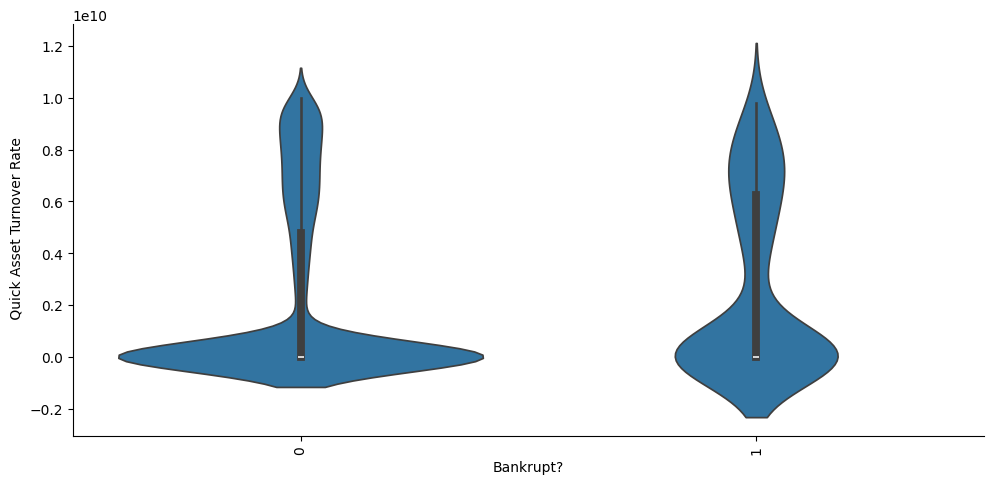

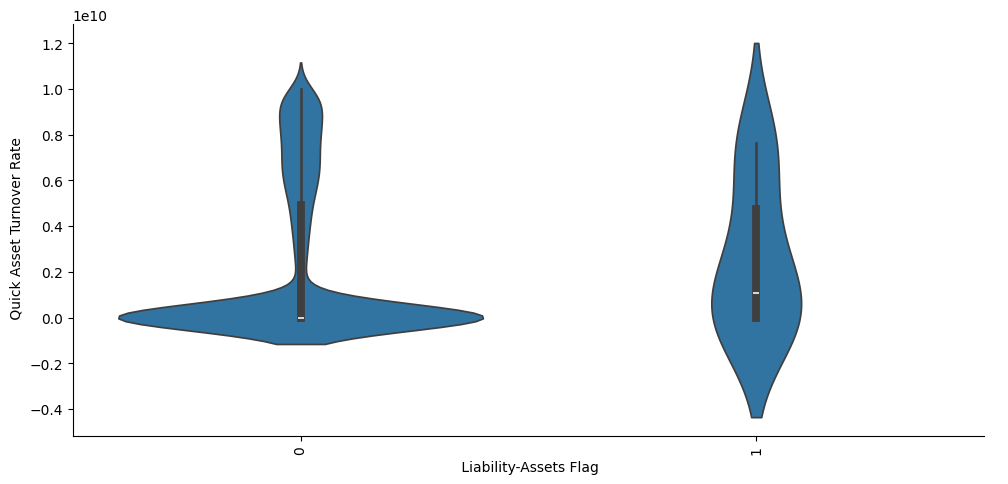

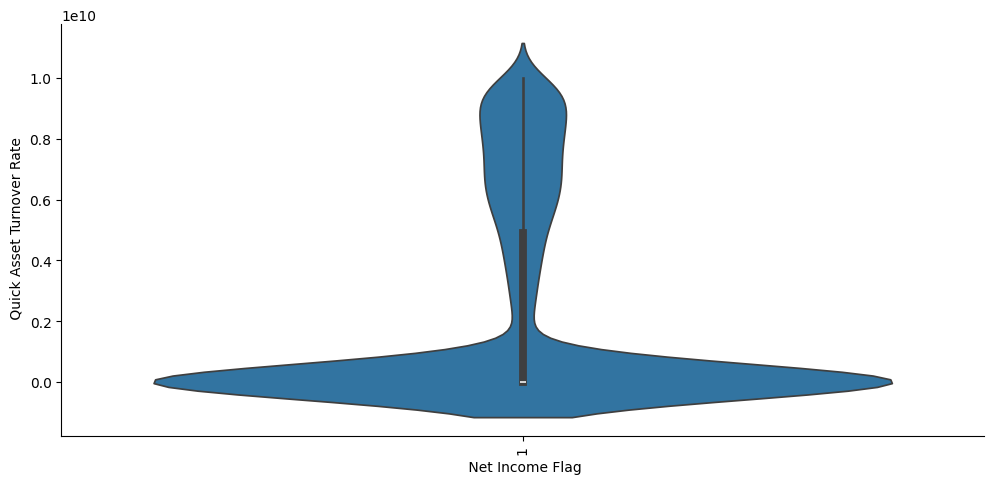

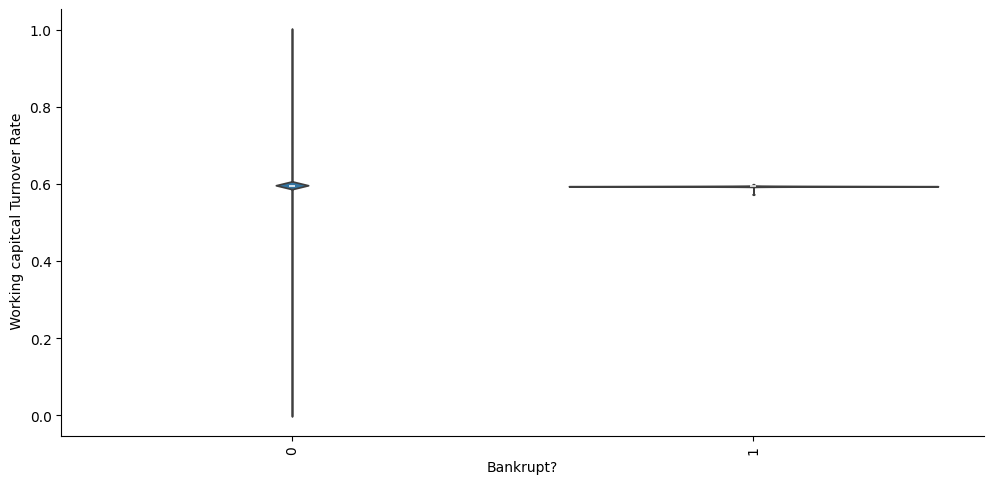

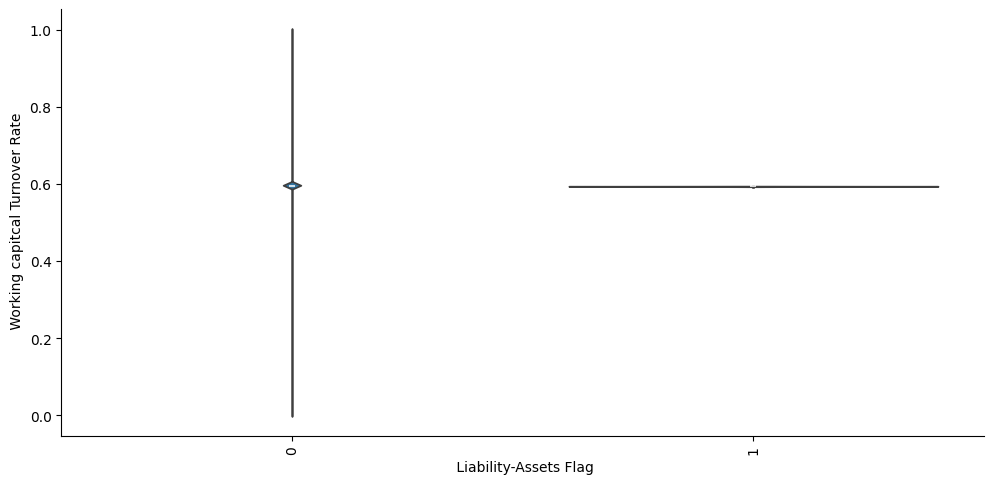

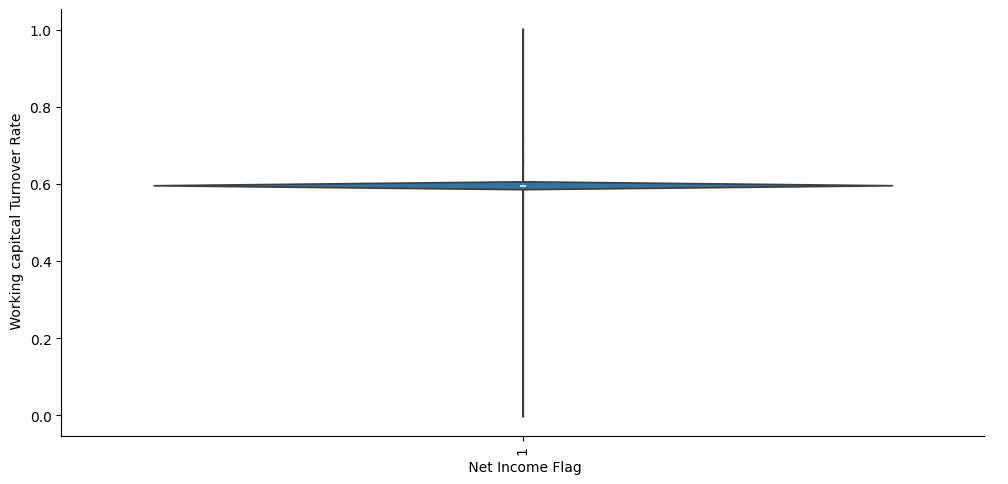

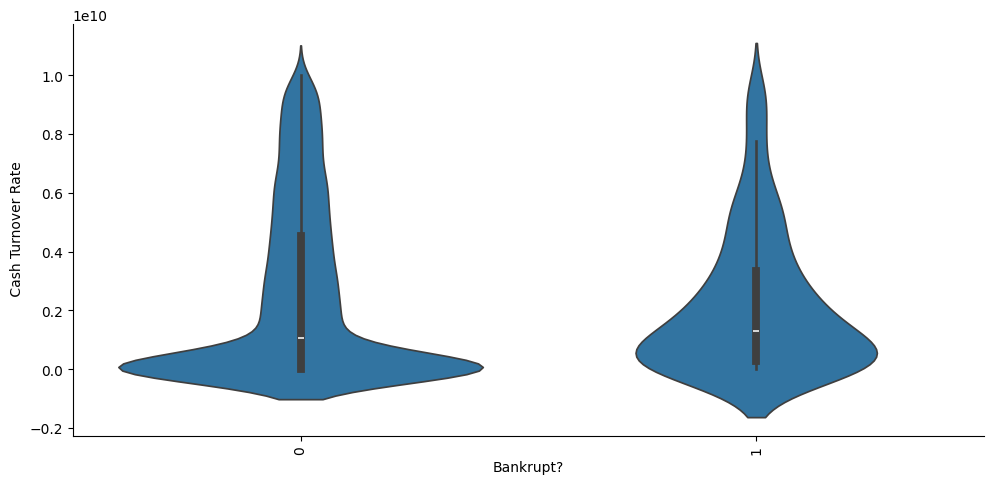

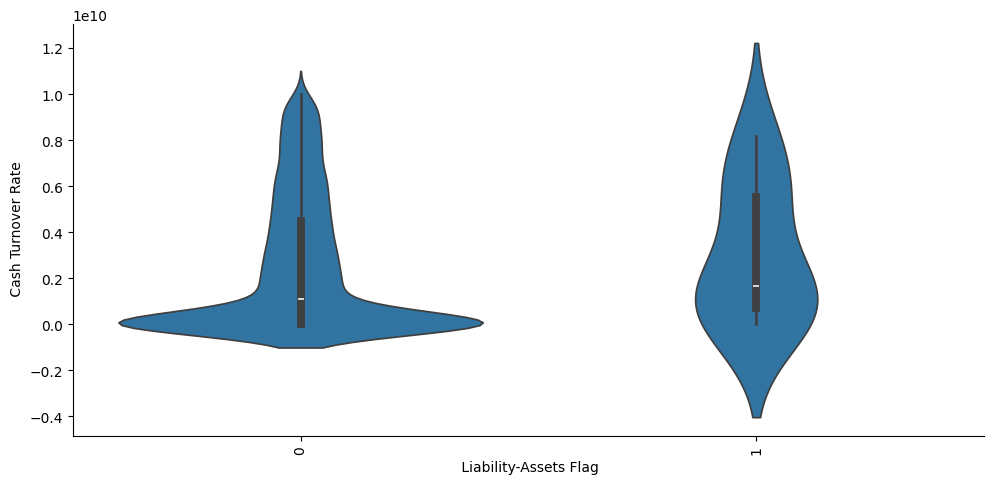

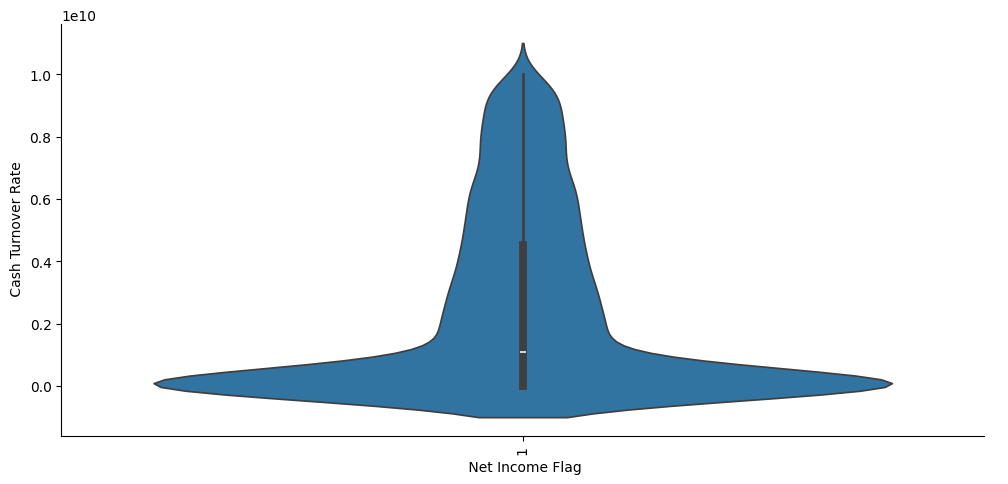

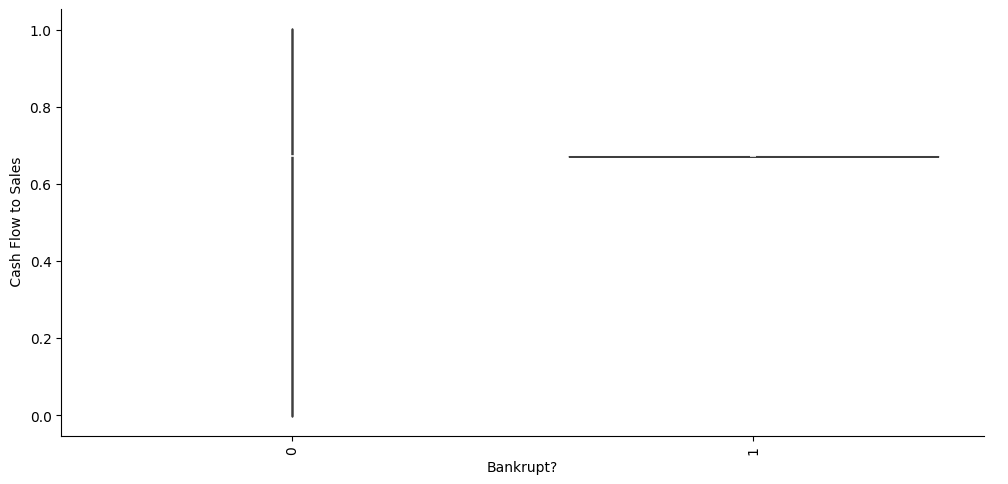

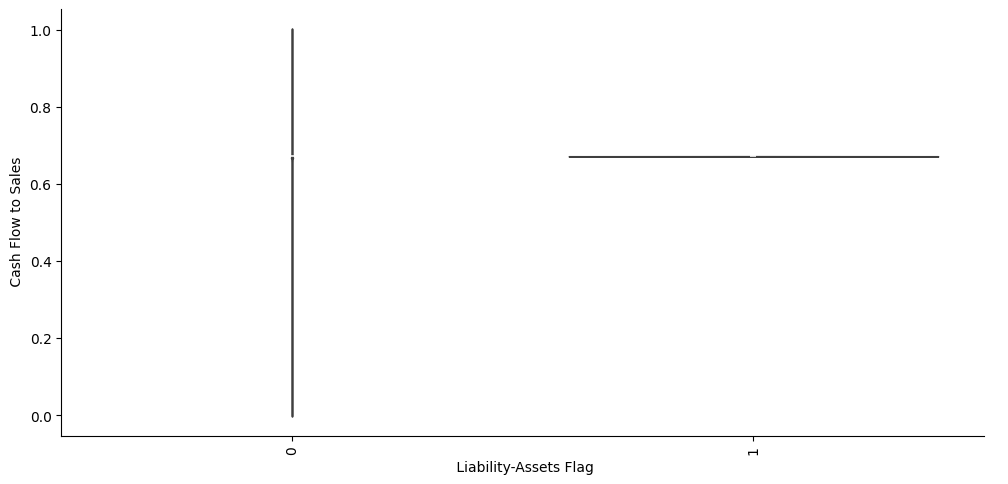

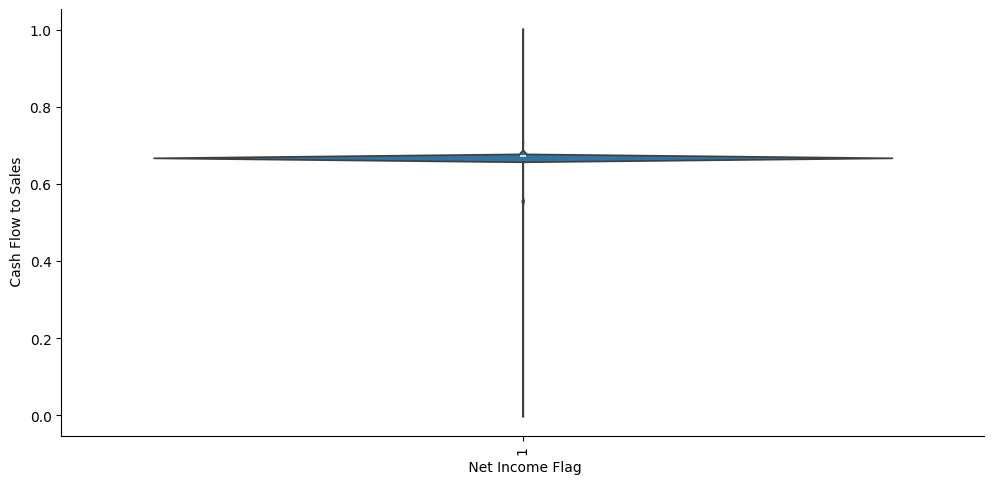

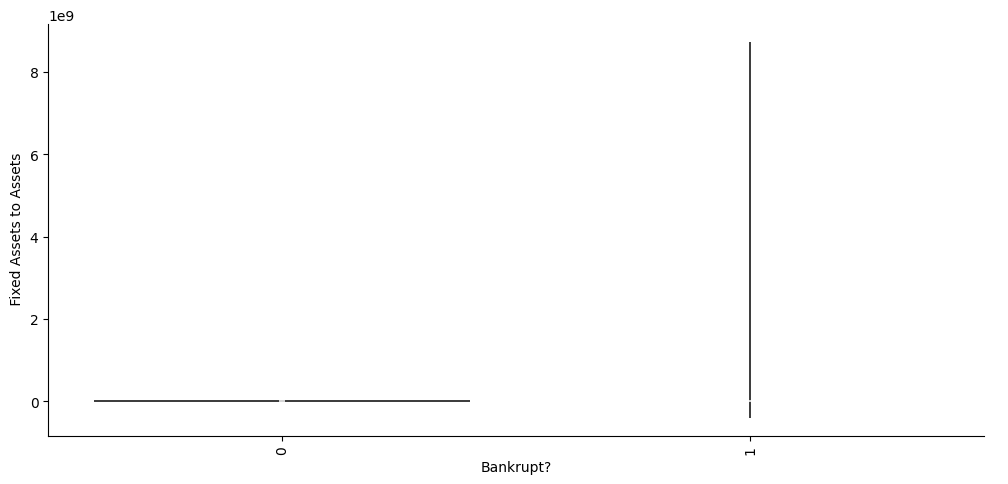

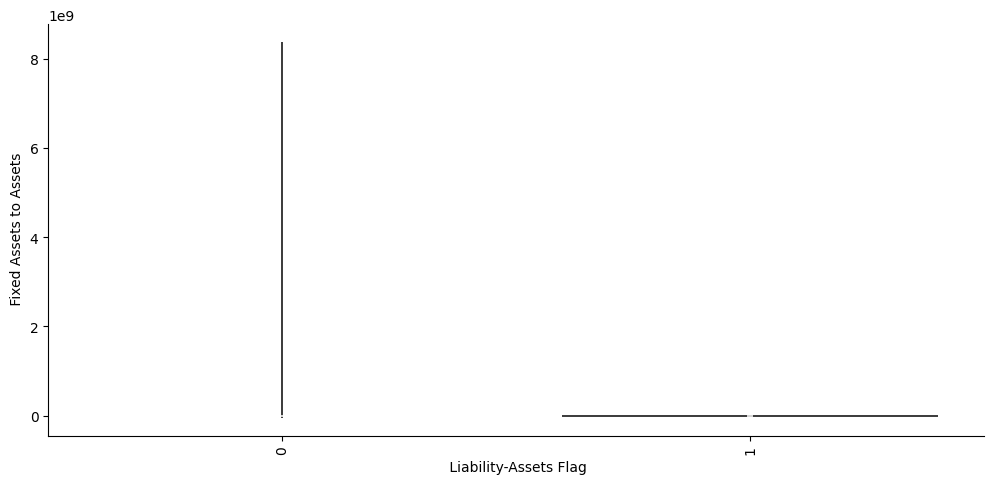

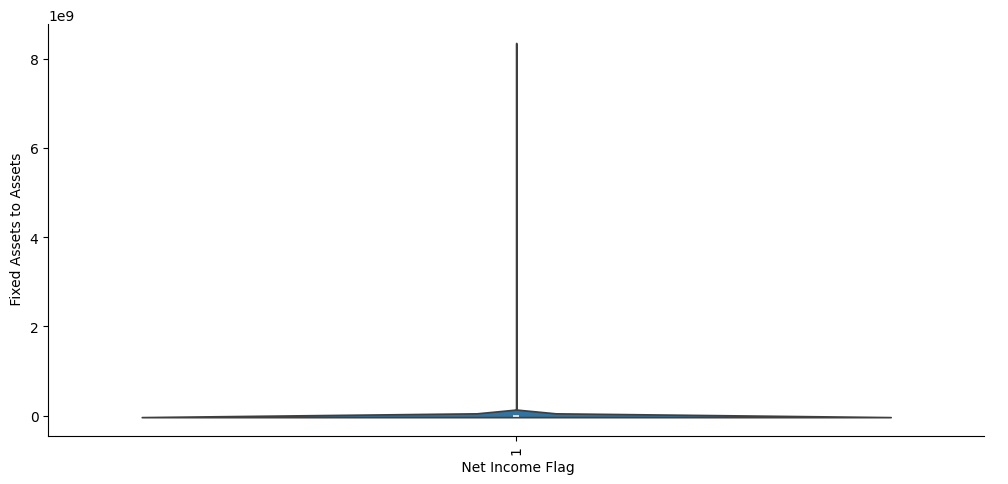

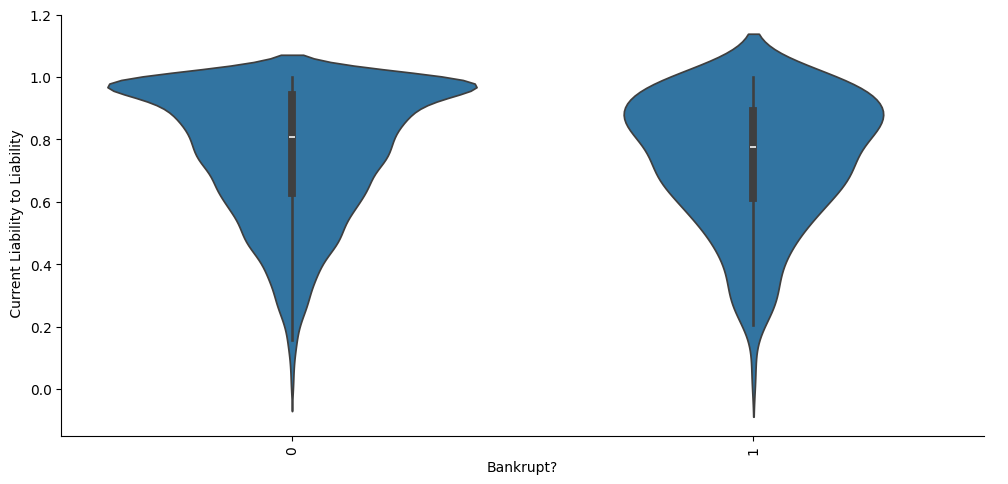

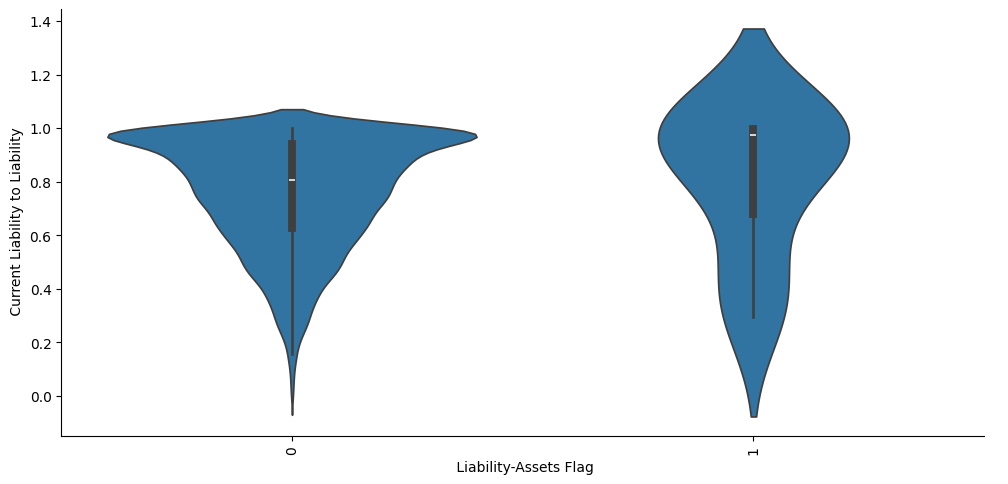

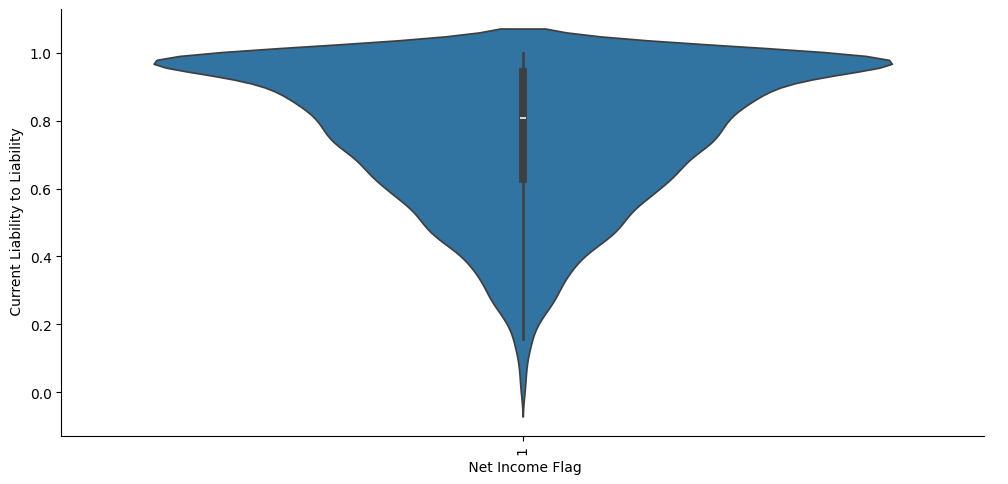

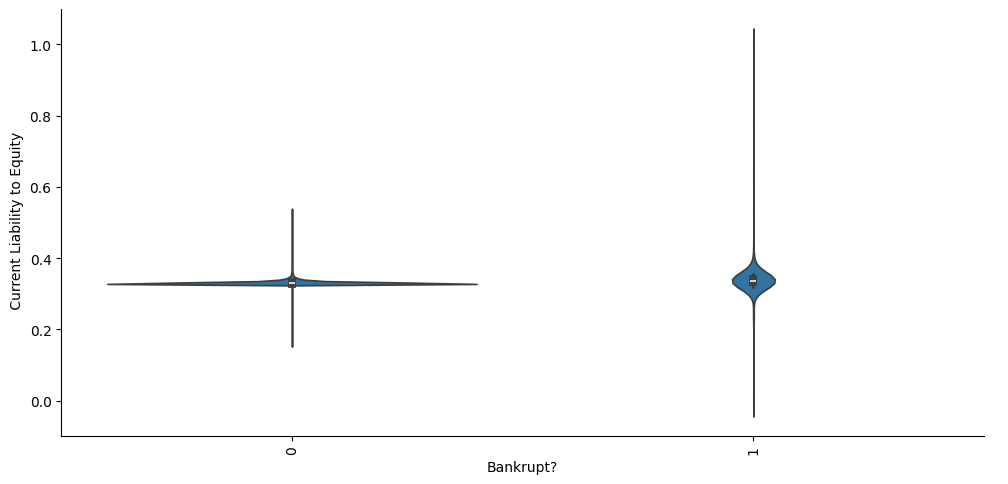

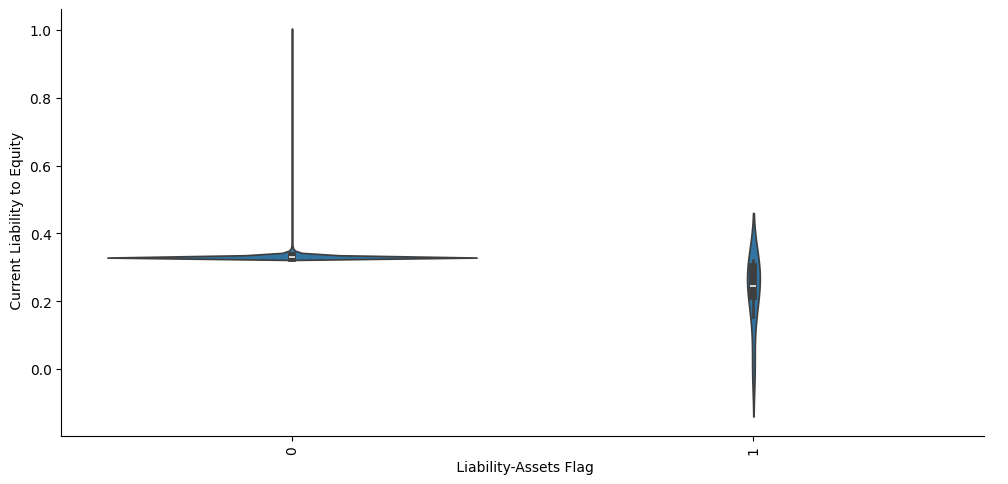

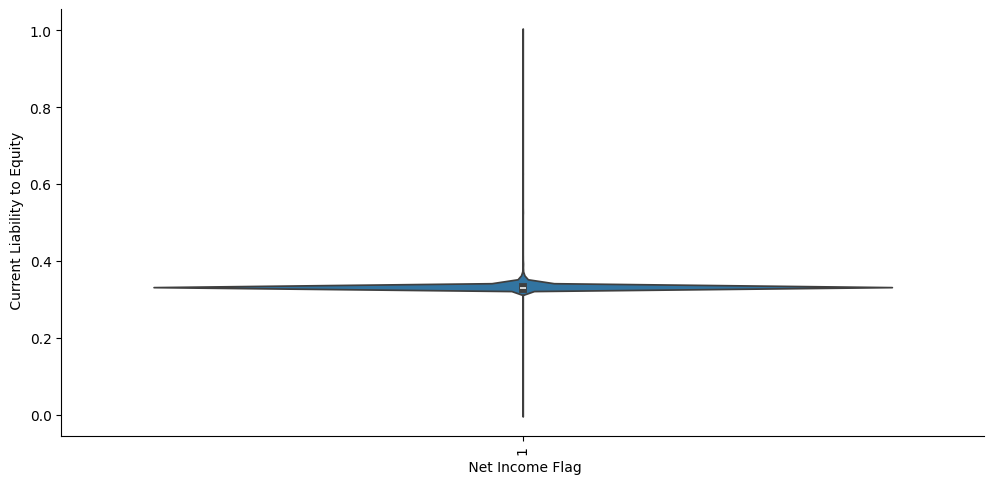

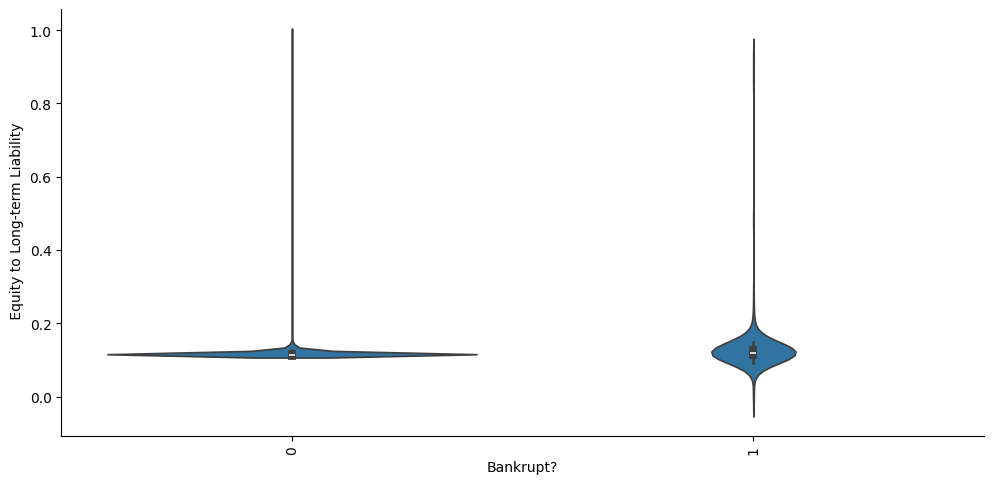

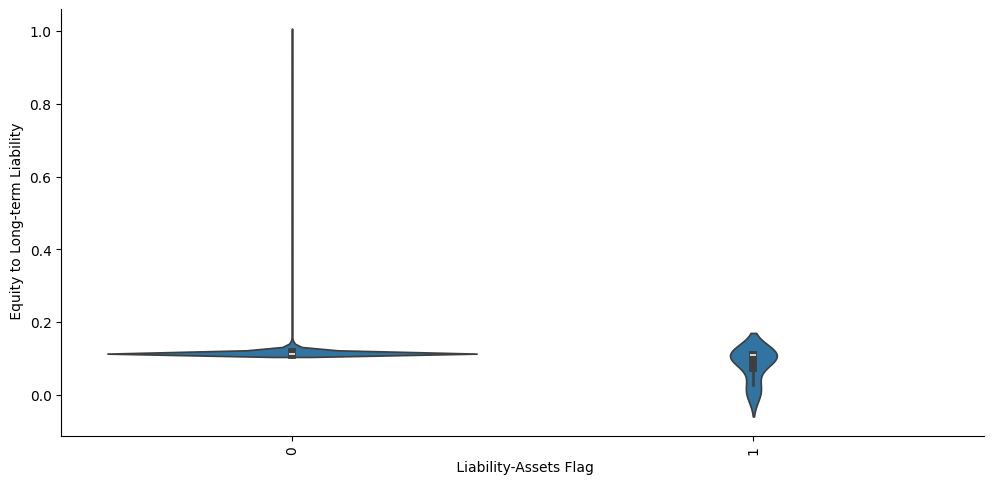

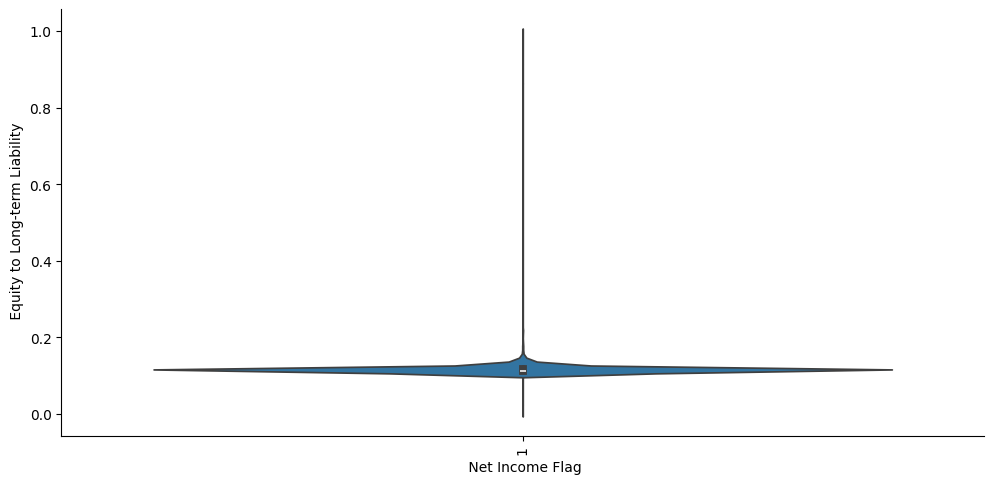

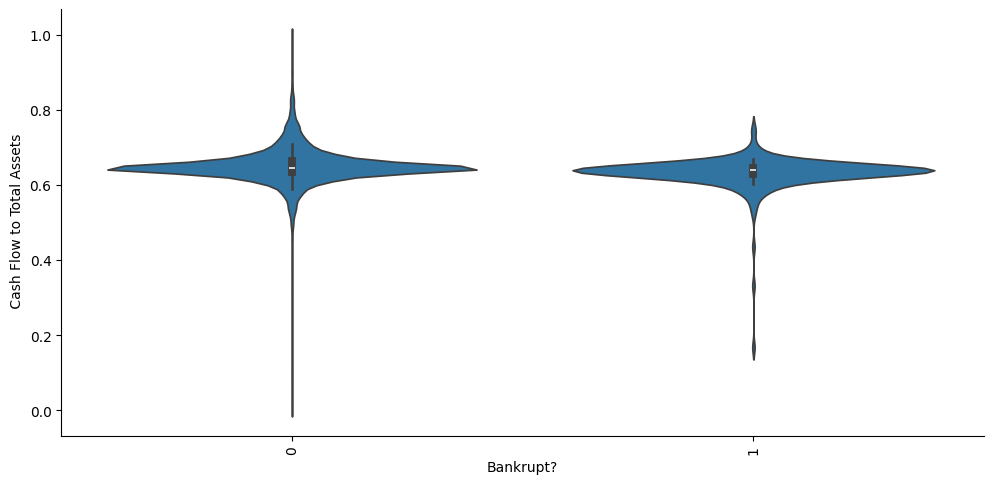

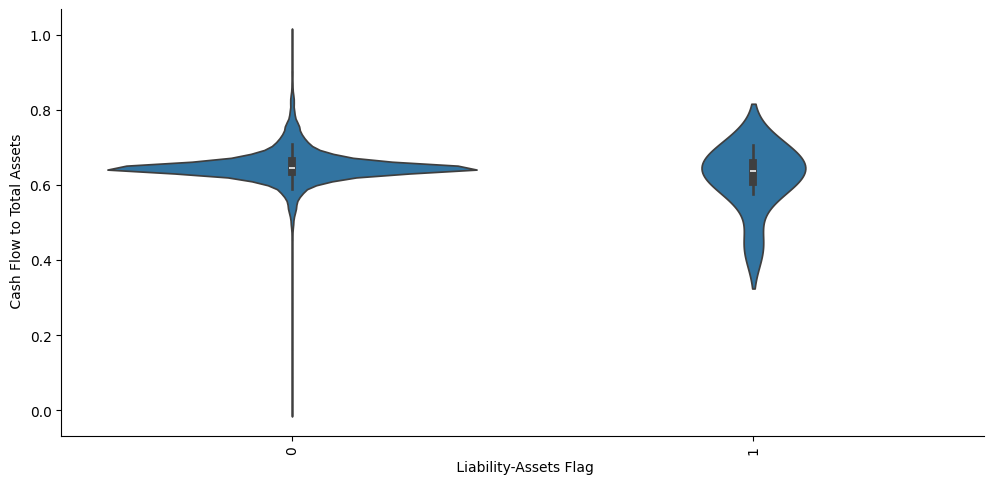

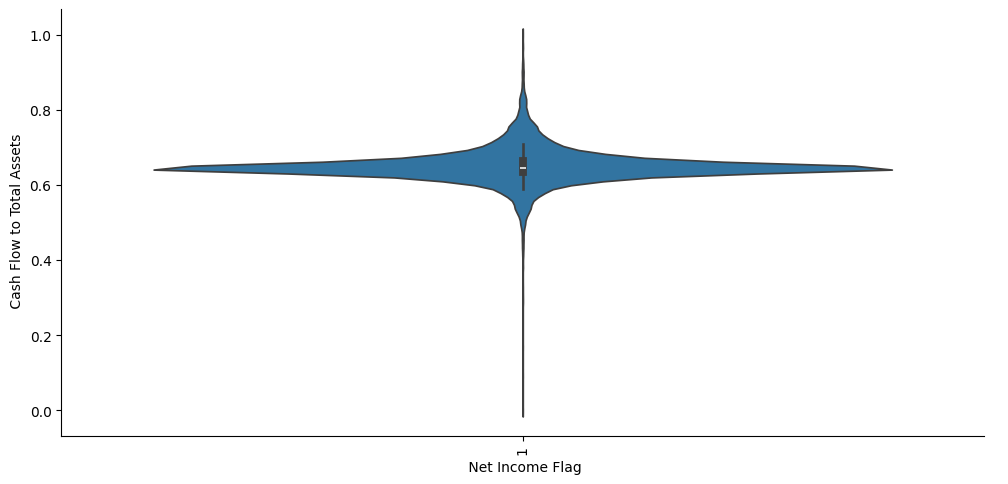

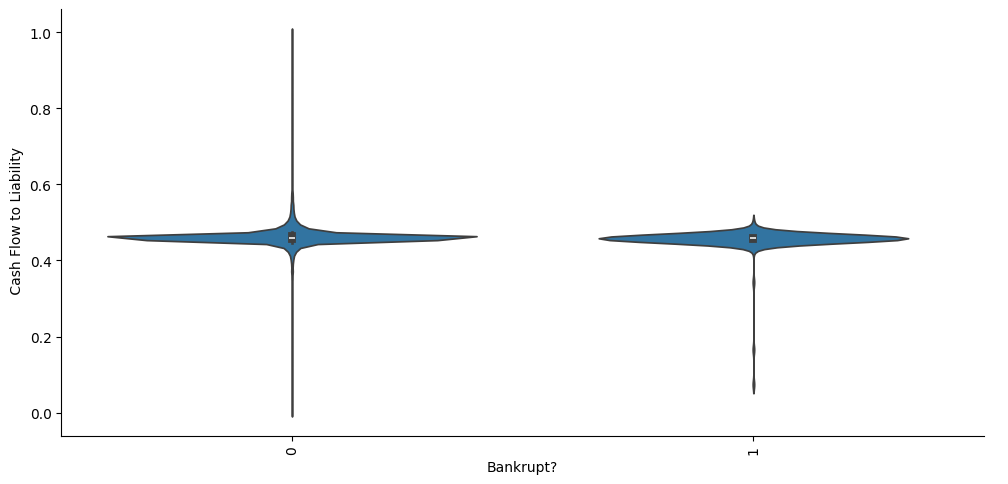

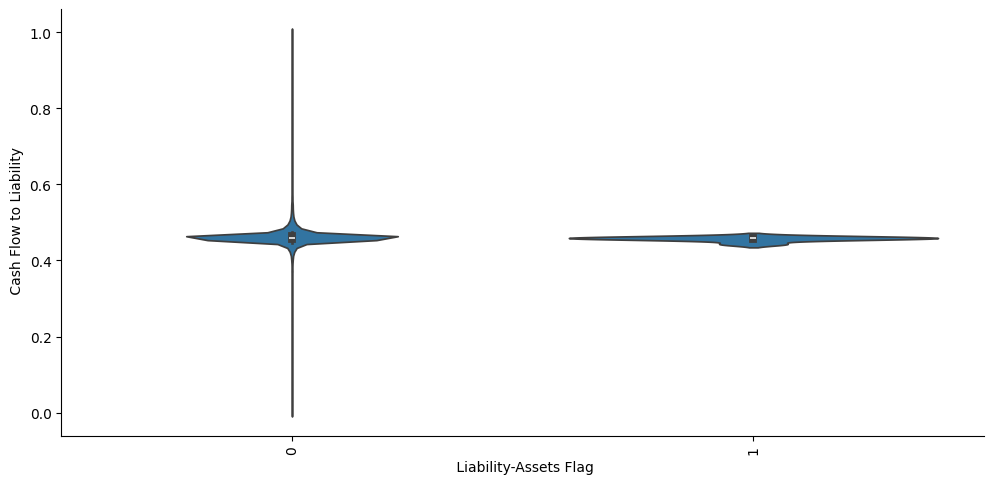

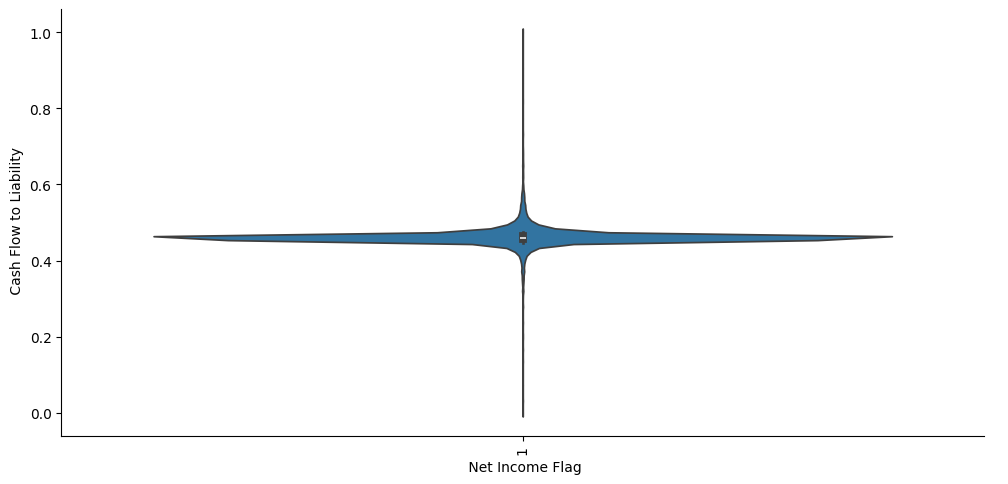

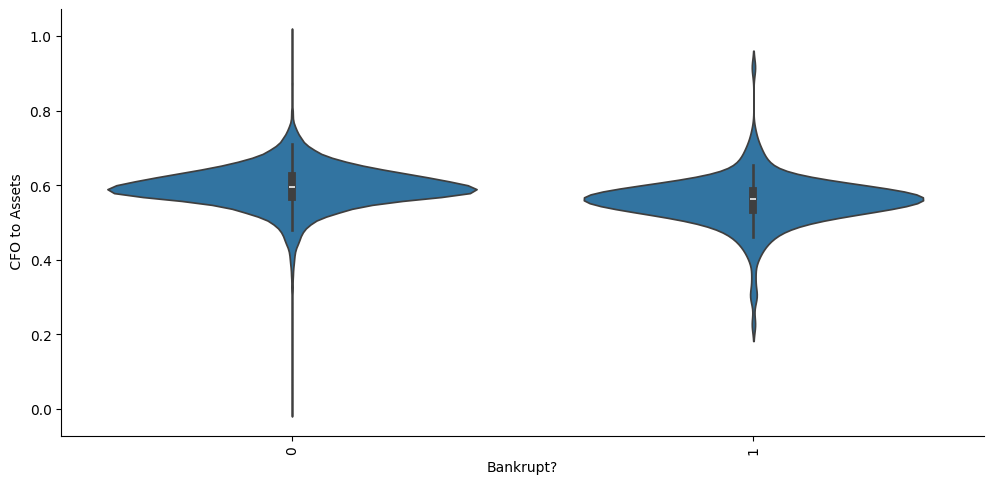

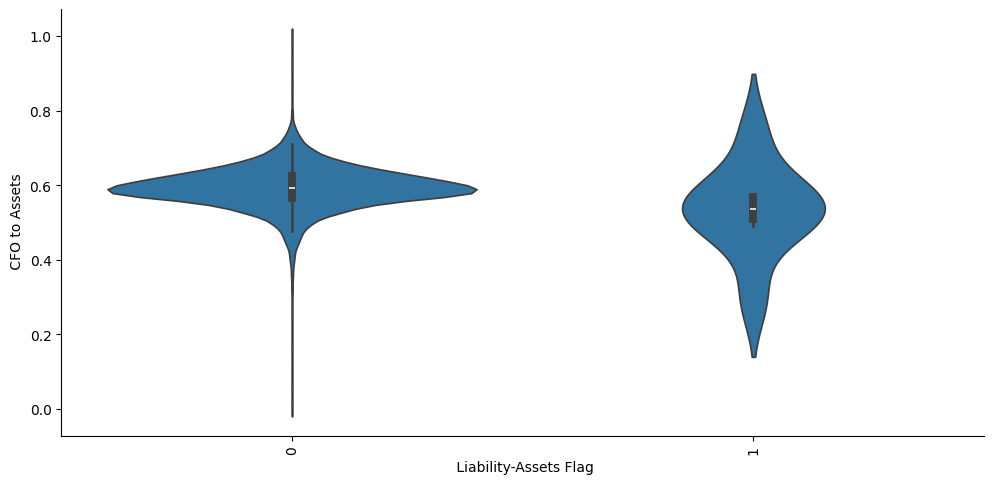

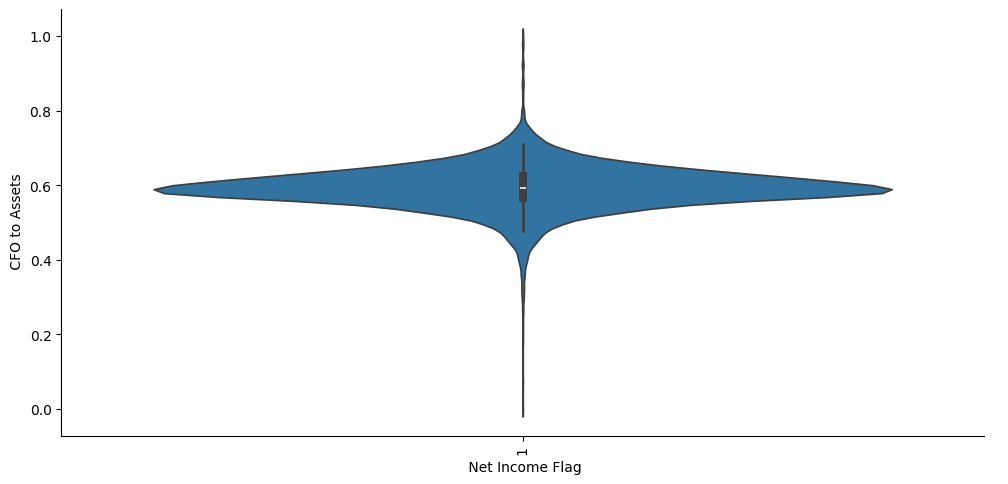

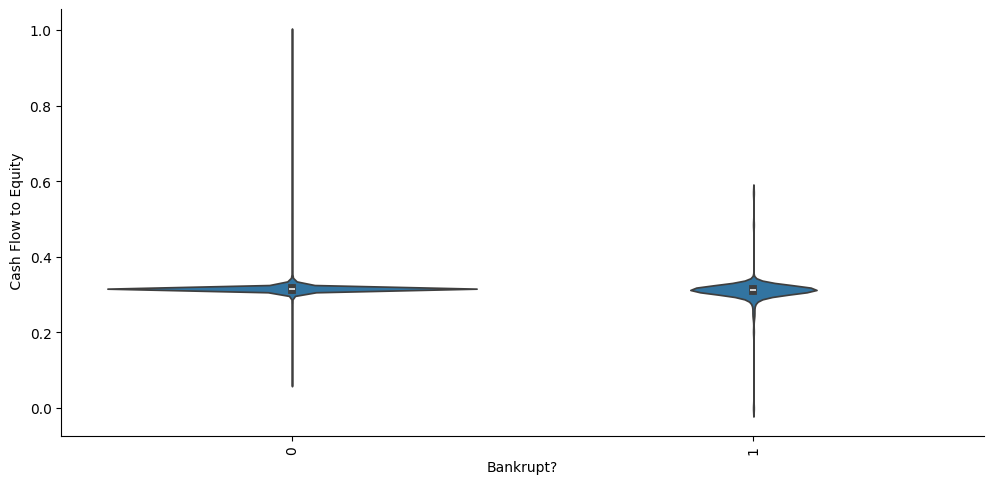

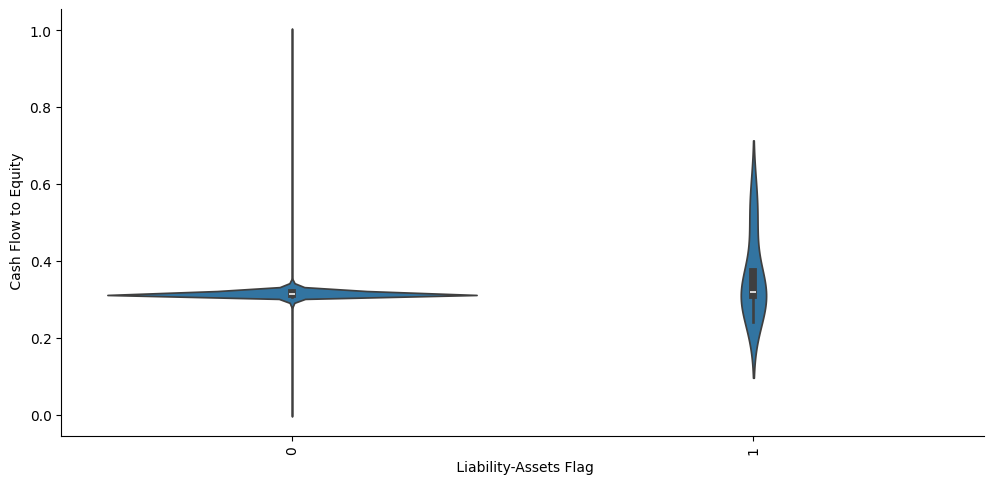

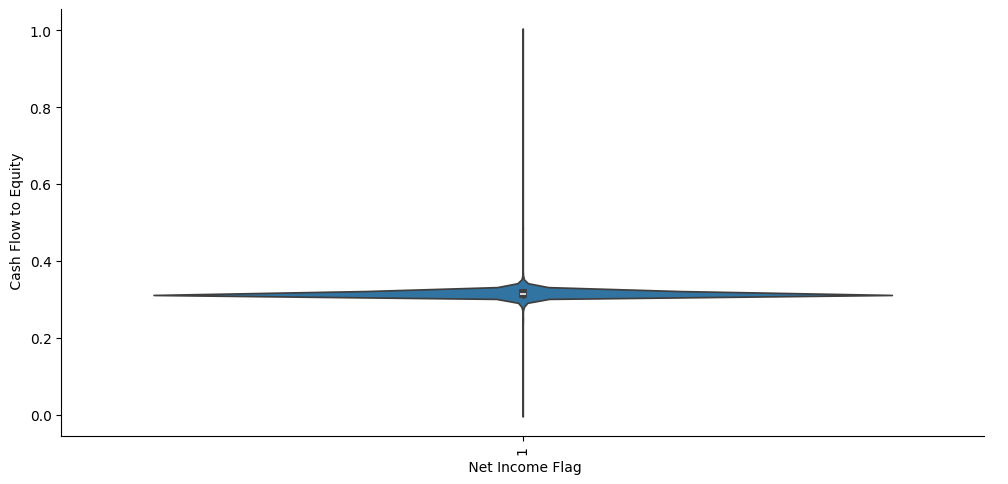

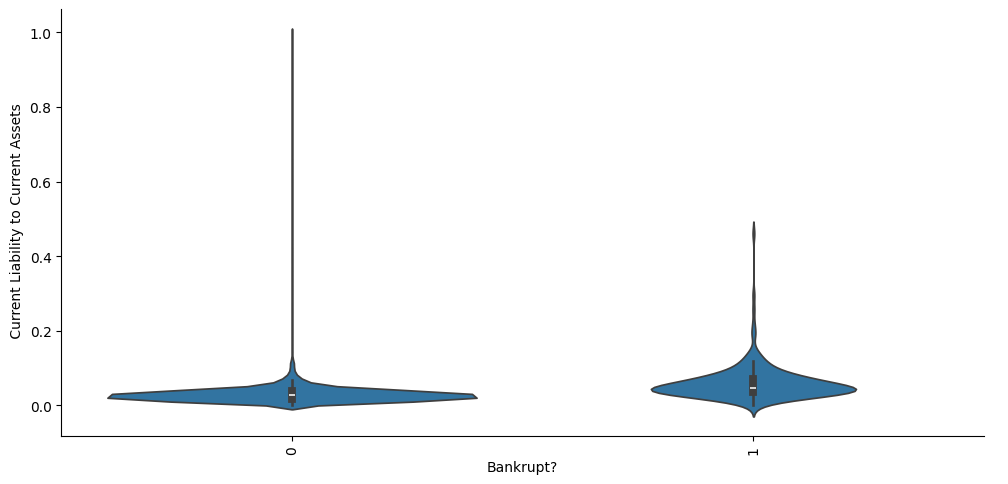

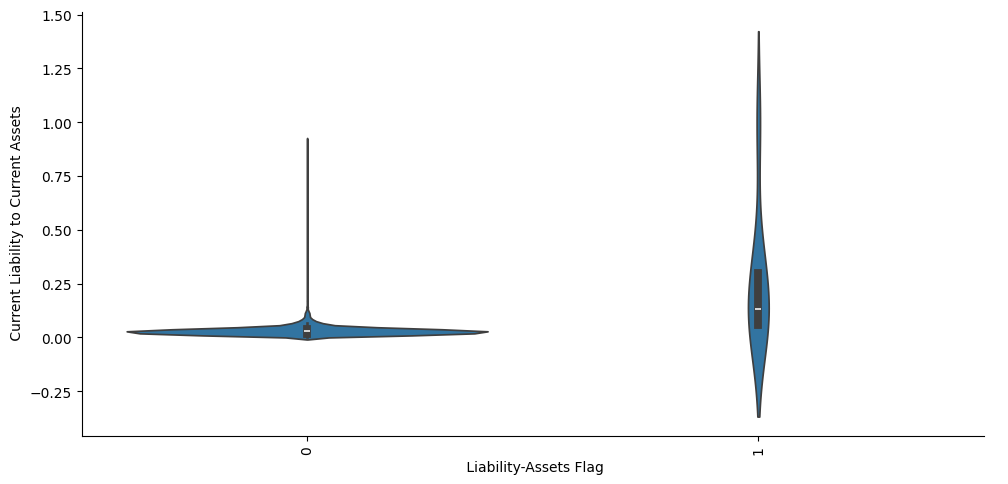

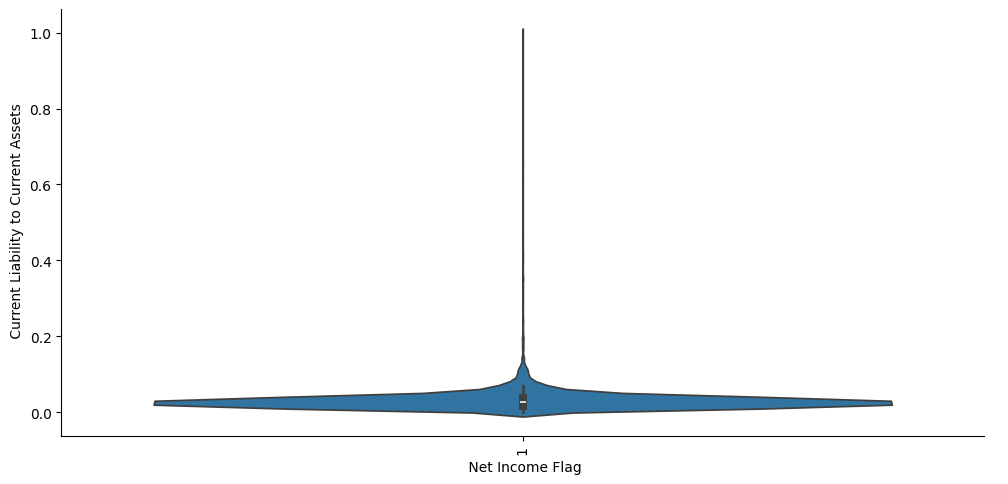

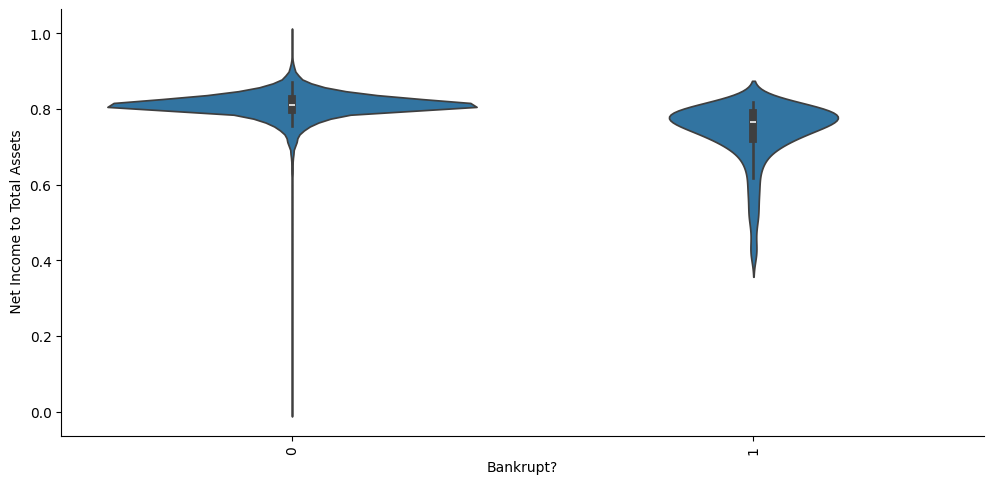

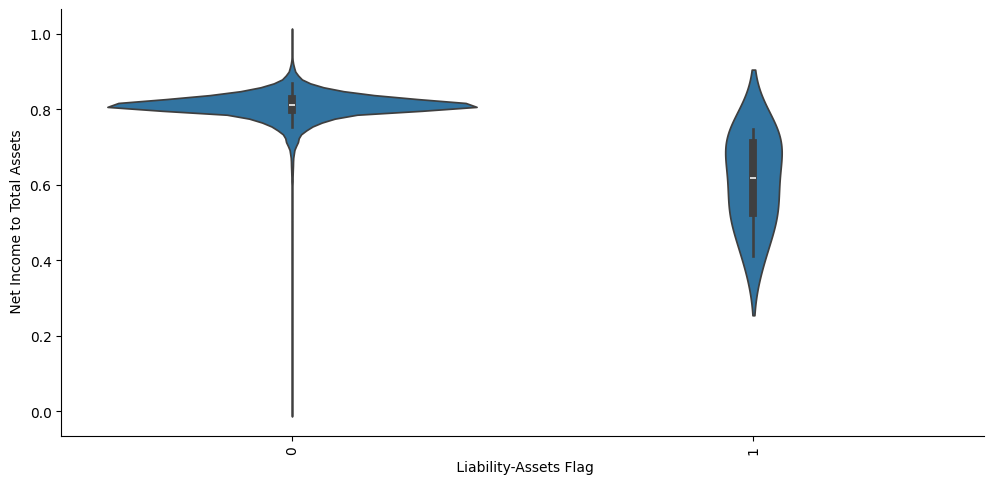

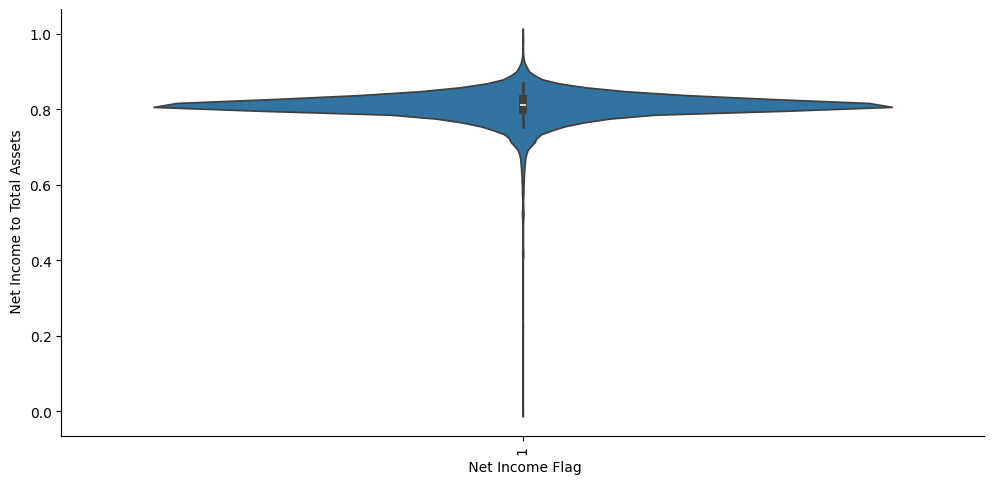

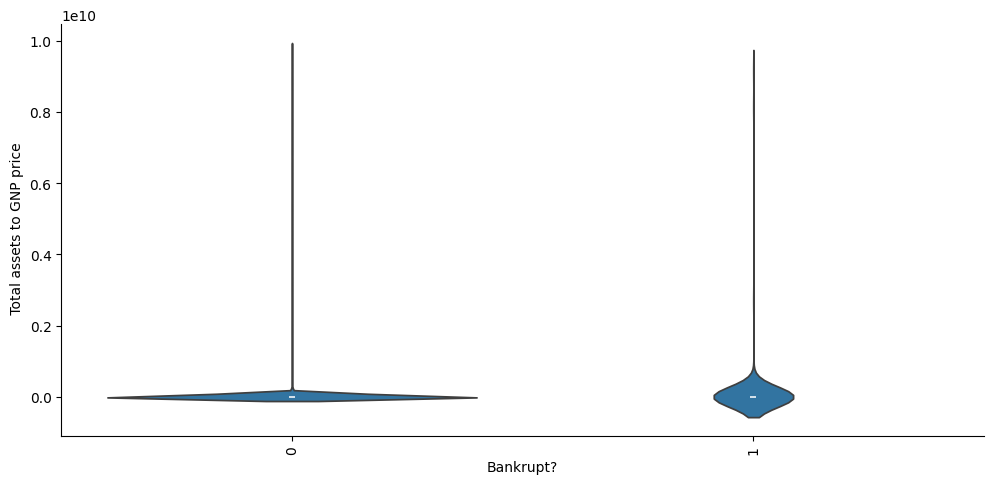

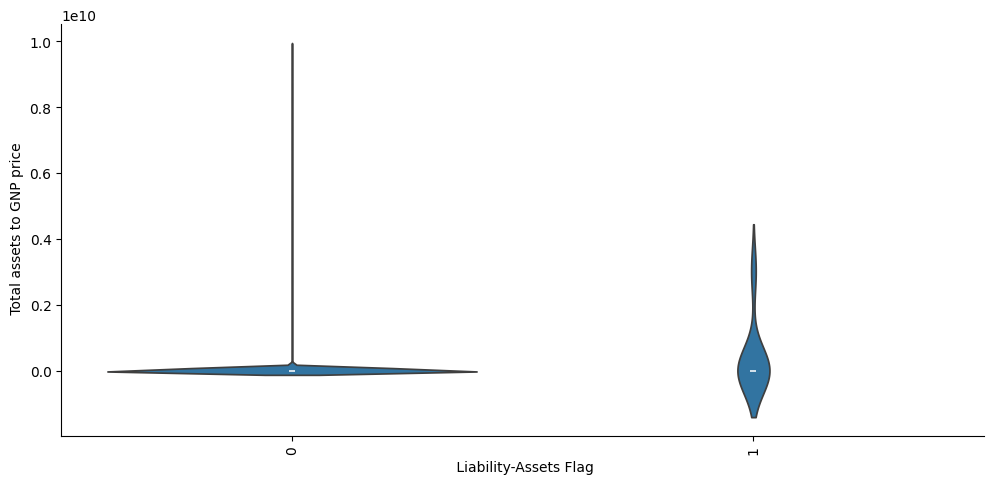

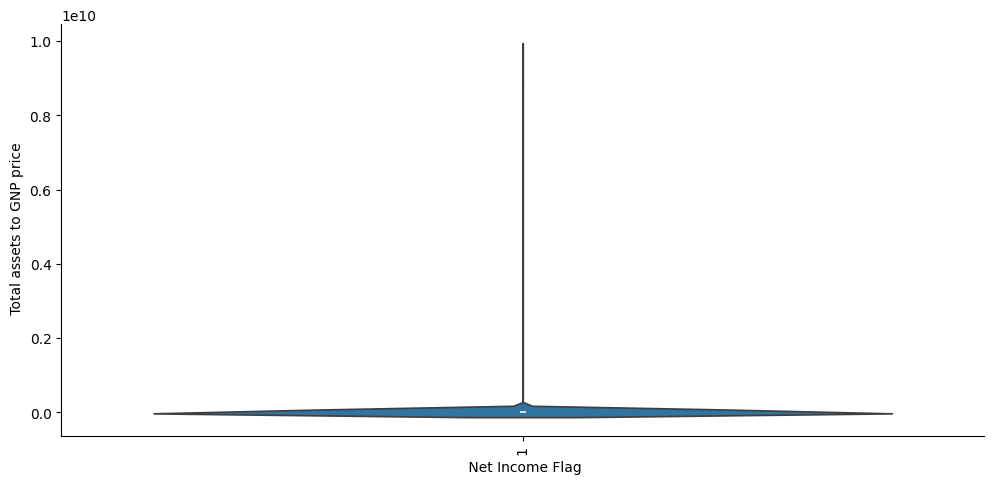

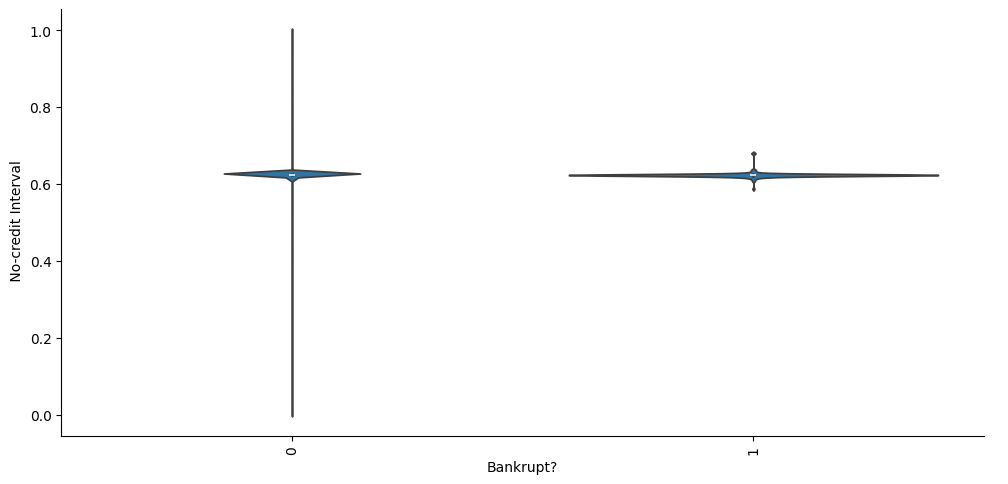

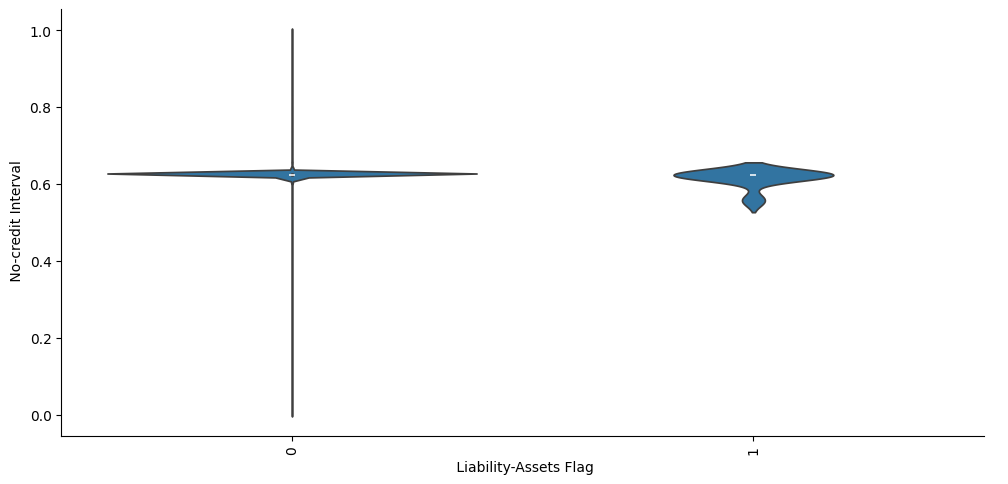

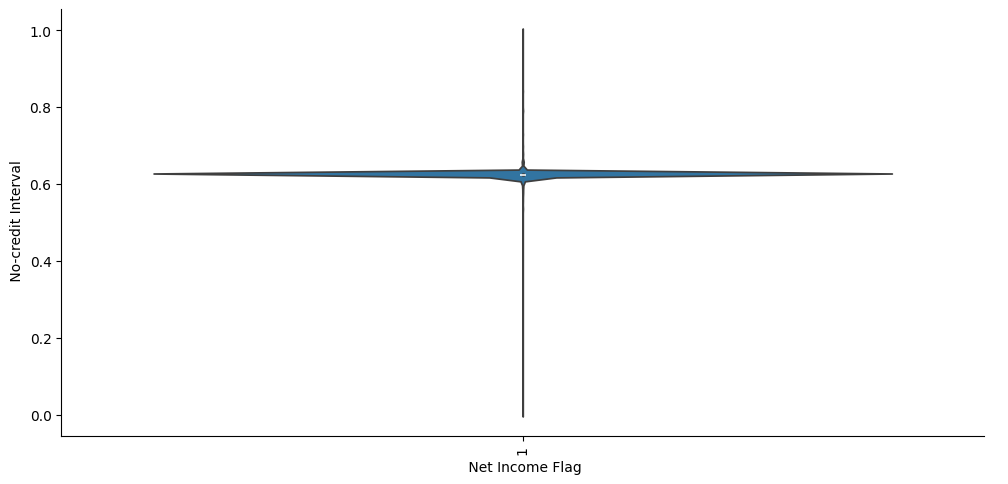

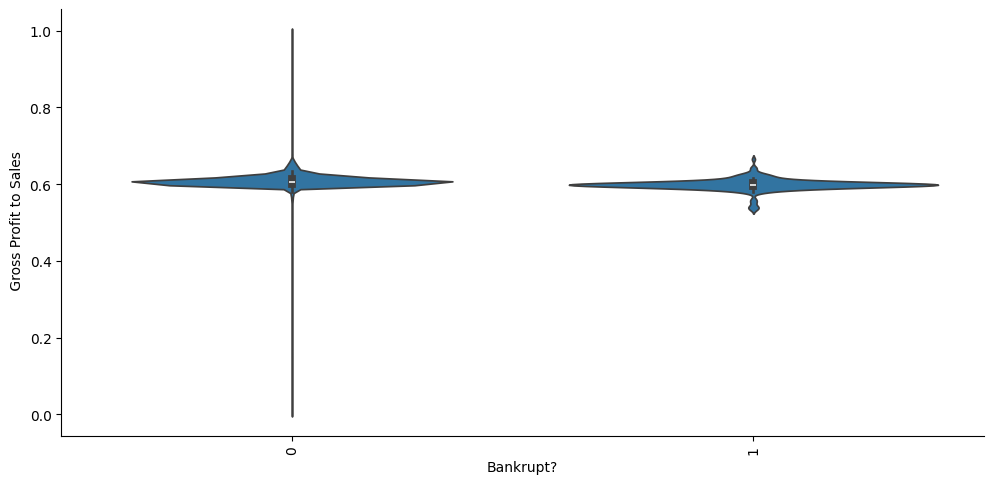

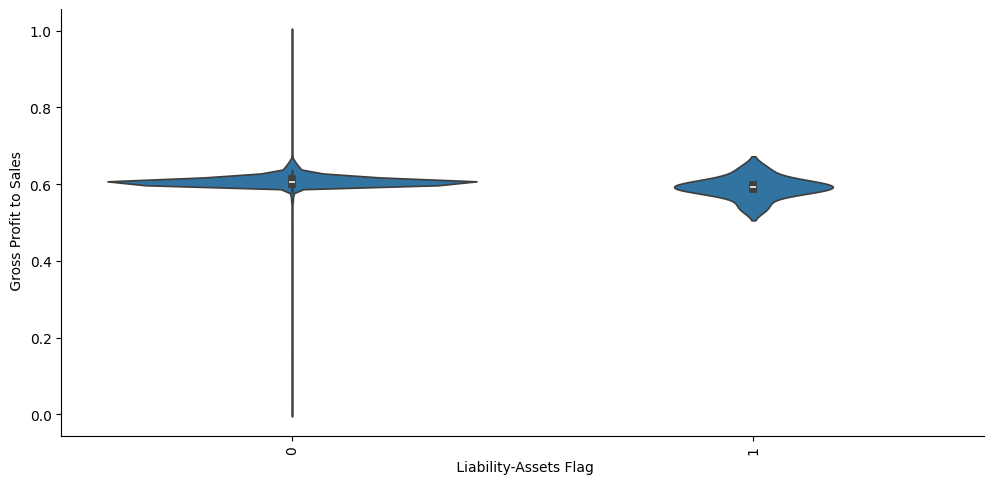

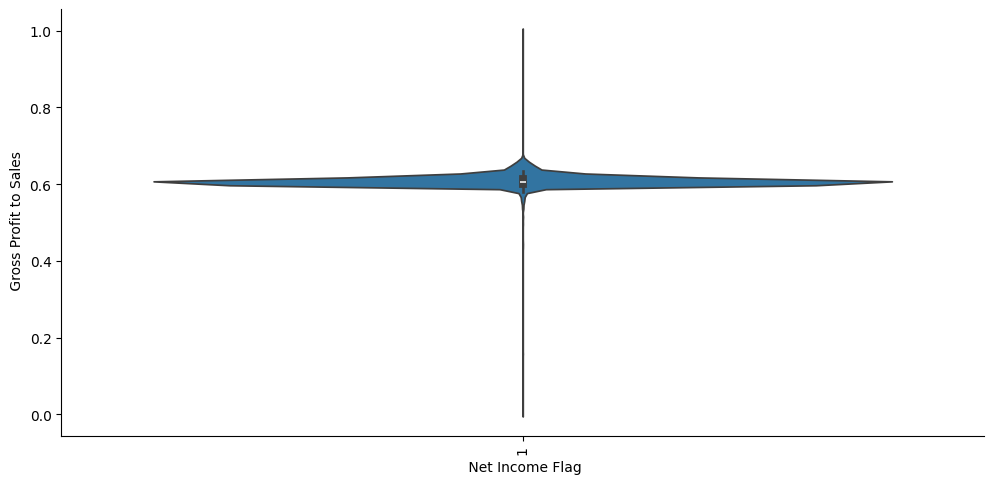

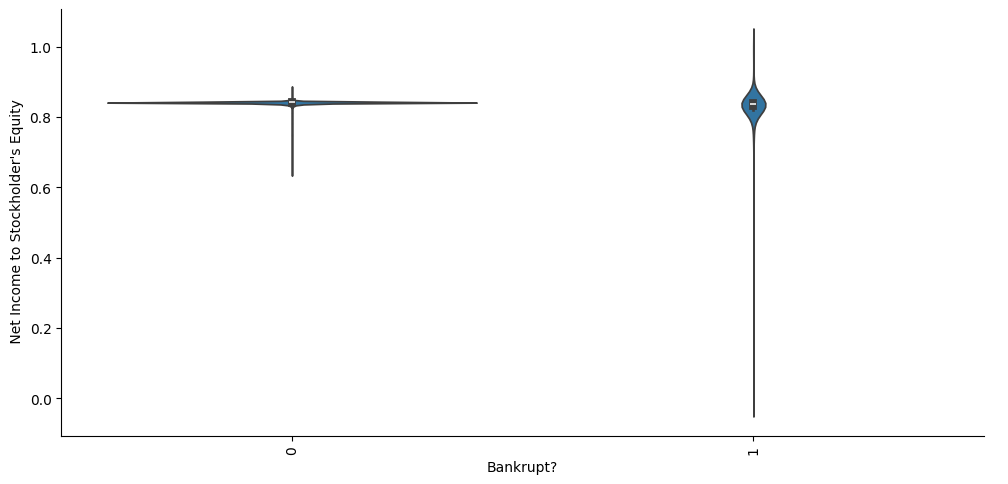

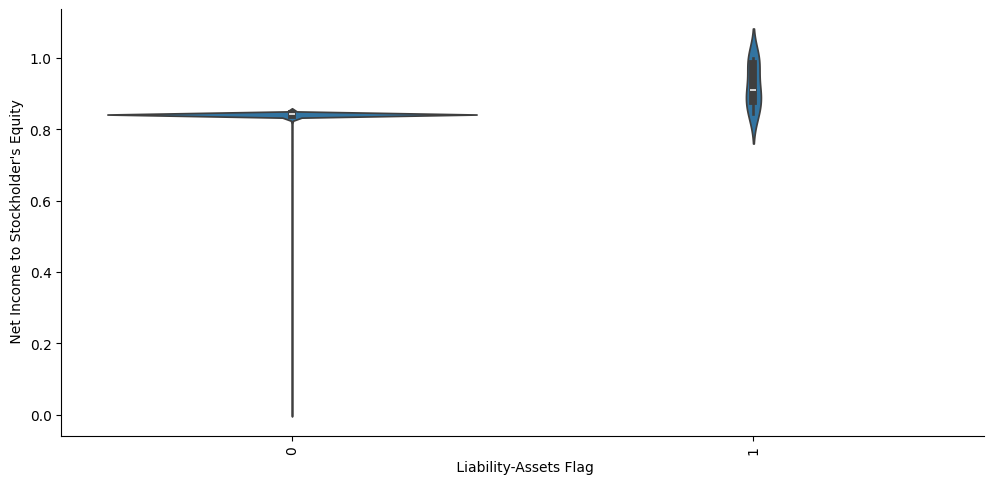

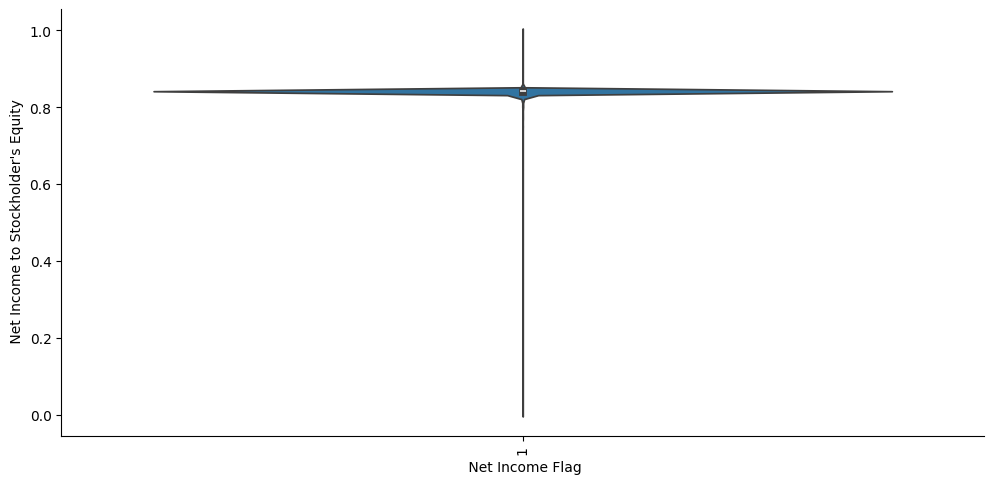

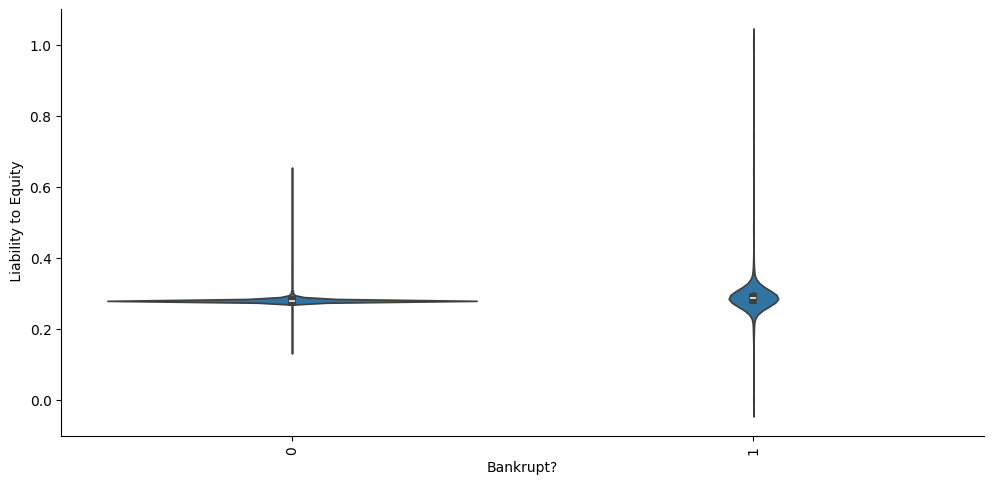

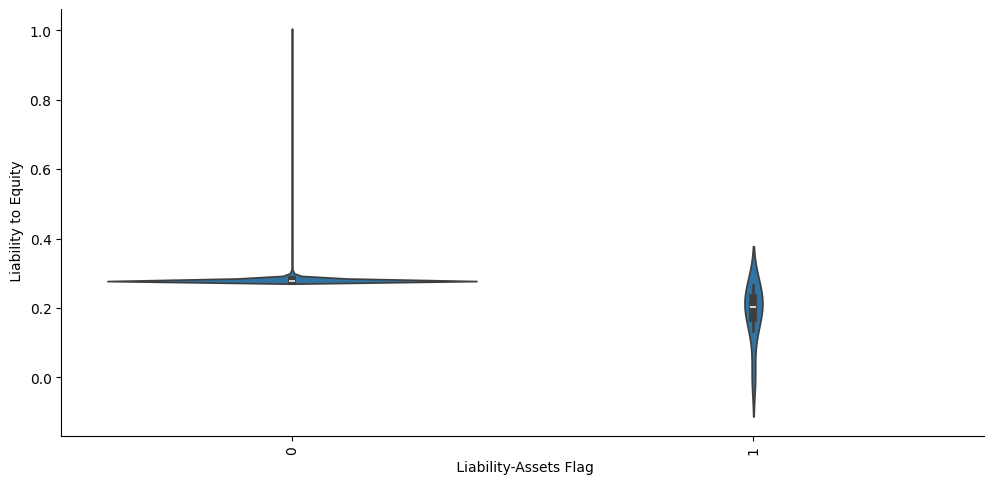

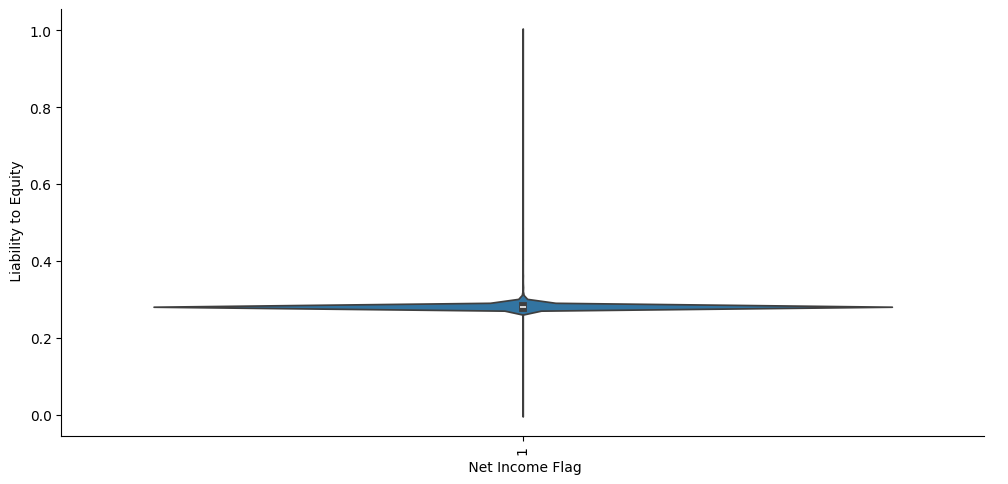

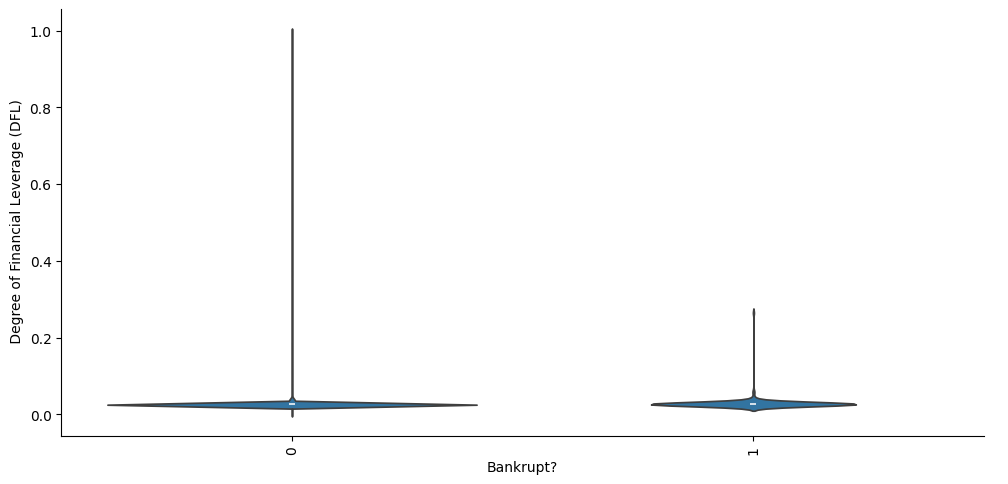

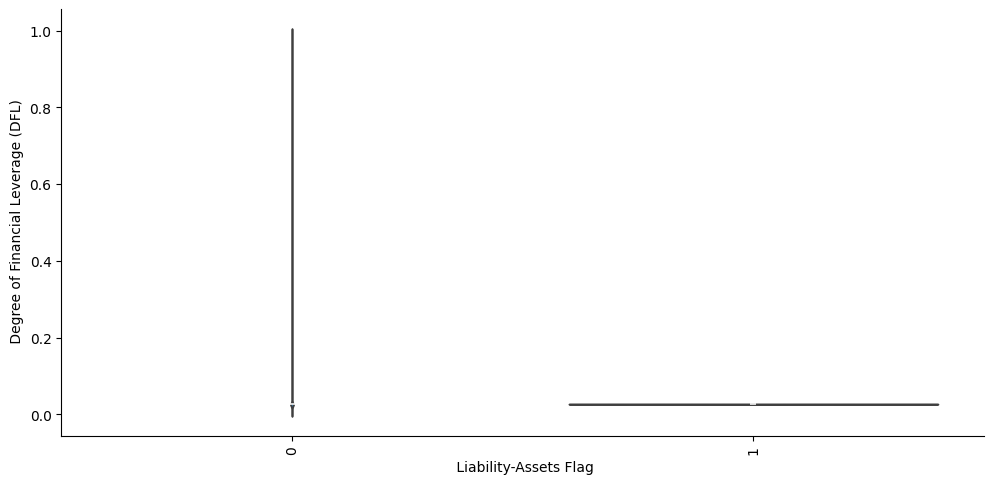

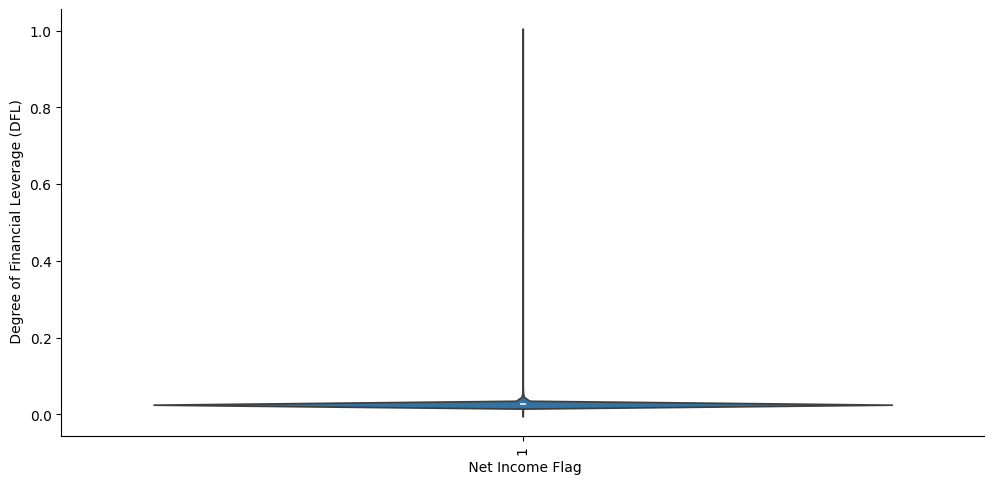

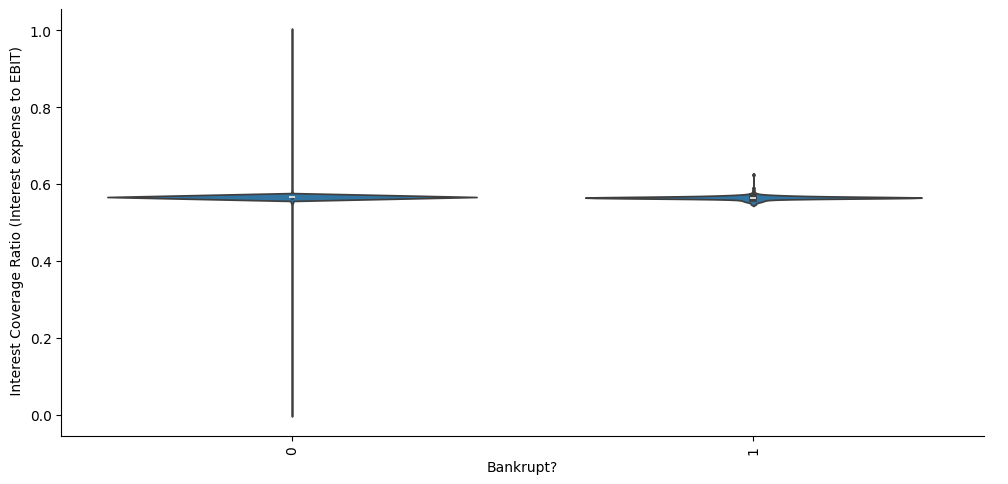

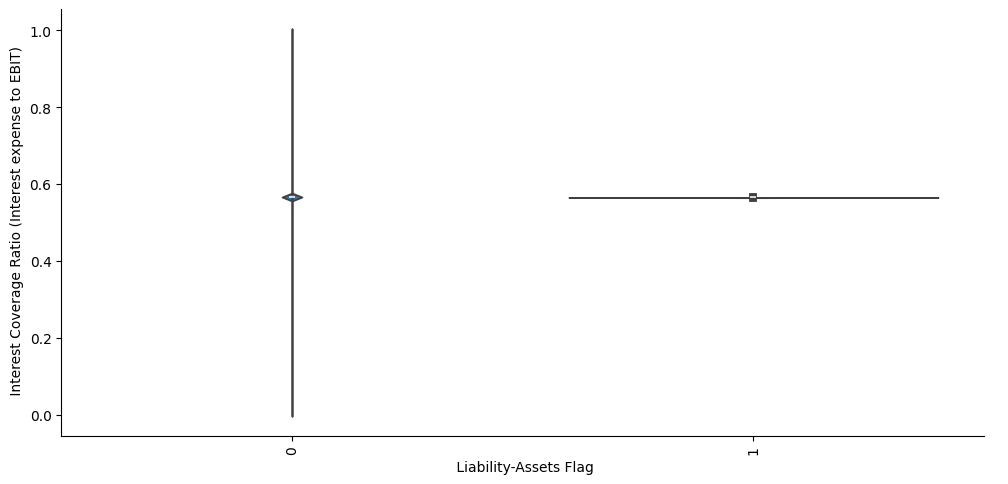

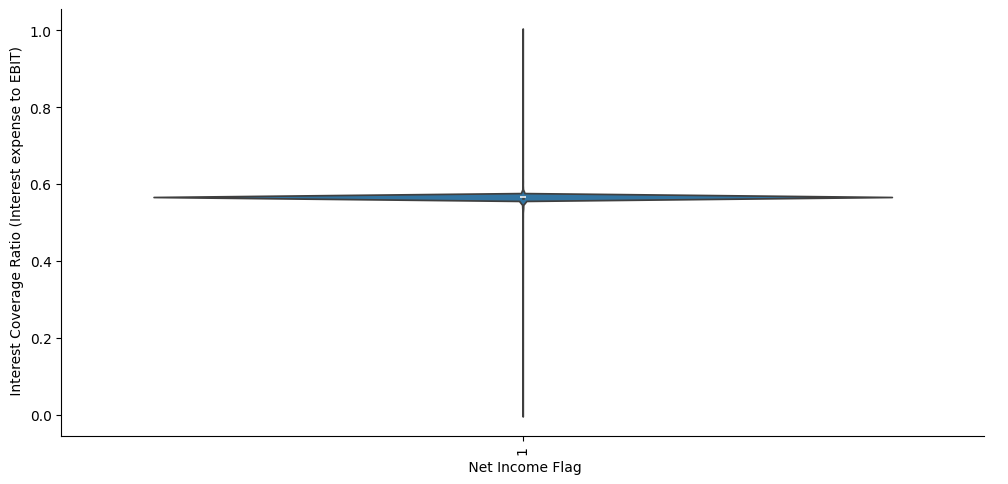

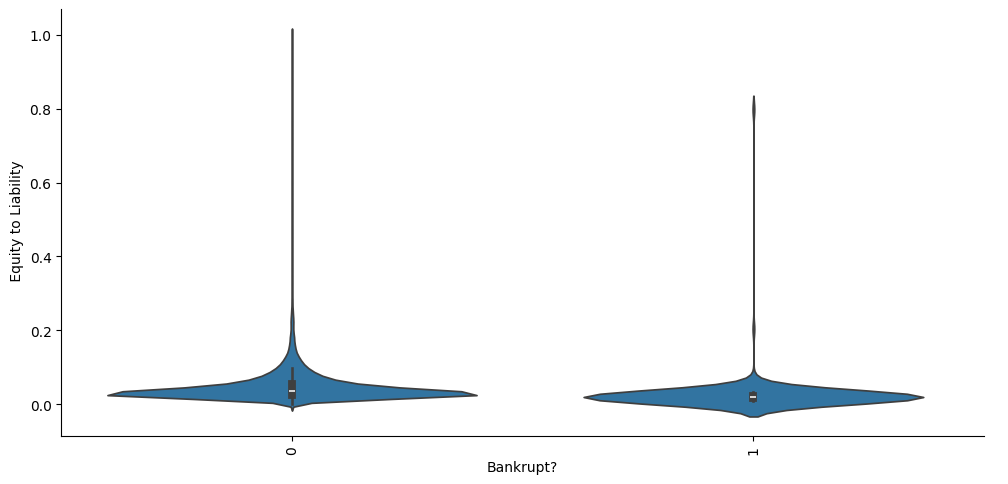

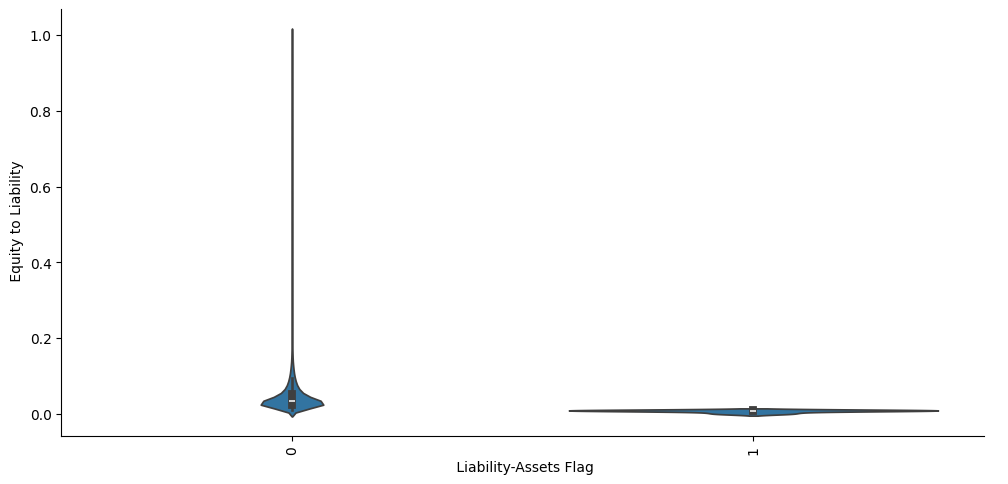

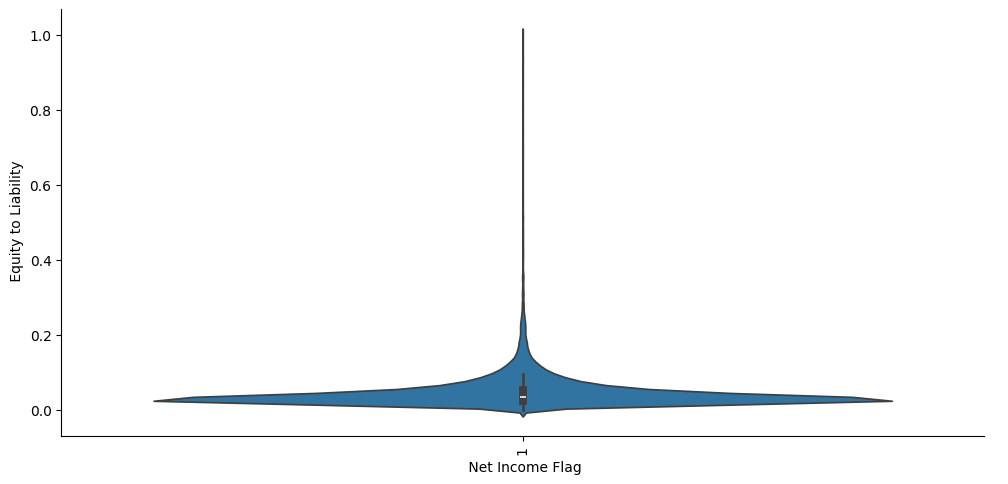

Há não valores negativos nos dados numéricos.


In [46]:
print("\nCheckando: \nDistribuição de dados numéricos")
display(df.describe().T)
columns = df.select_dtypes(include=np.number).columns
num_subplots_per_row = 20
num_rows = (len(columns) - 1) // num_subplots_per_row + 1

figure = plt.figure(figsize=(36, 18))
for subplot_index, col in enumerate(columns):
    if subplot_index >= num_subplots_per_row * num_rows:
        break
    figure.add_subplot(num_rows, num_subplots_per_row, subplot_index + 1)
    sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
figure.tight_layout()
plt.show()

if len(df.select_dtypes(include='category').columns) > 0:
    for col_num in df.select_dtypes(include=np.number).columns:
        for col in df.select_dtypes(include='category').columns:
            fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
            fig.set_xticklabels(rotation=90)
            plt.show()

numeric_columns = df.select_dtypes(include=np.number).columns
negative_values = df[numeric_columns].lt(0).any()

if negative_values.any():
    print("Há valores negativos nos dados numéricos.")
else:
    print("Há não valores negativos nos dados numéricos.")



Como observado, não há valores numéricos negativos nos dados numéricos.

Quase todas colunas numéricas indicam possuirem outliers, já que há valores ou acima do terceiro quartil ou abaixo do primeiro quartil. A presença de outliers pode ser um problema para a análise de dados, já que eles podem distorcer a análise estatística dos dados. No entanto, a presença de outliers não significa necessariamente que os dados estão errados ou que devem ser removidos. Em vez disso, os outliers devem ser investigados para determinar se eles são erros de medição ou se são dados válidos.

Também plotamos alguns gráficos no formato de violino para averiguar se em alguns casos o outlier é um erro ou é fruto de uma circunstância especial. Por exemplo, se formos investigar a variável de 'Operating profit per share' vendo o efeito da variável 'Bankrupted?' nela, vemos que não falir geralmente significa maiores lucros de operação por ação, por conta das seções mais largas do violino. Isso é um bom sinal de que a variável é útil para prever falência.

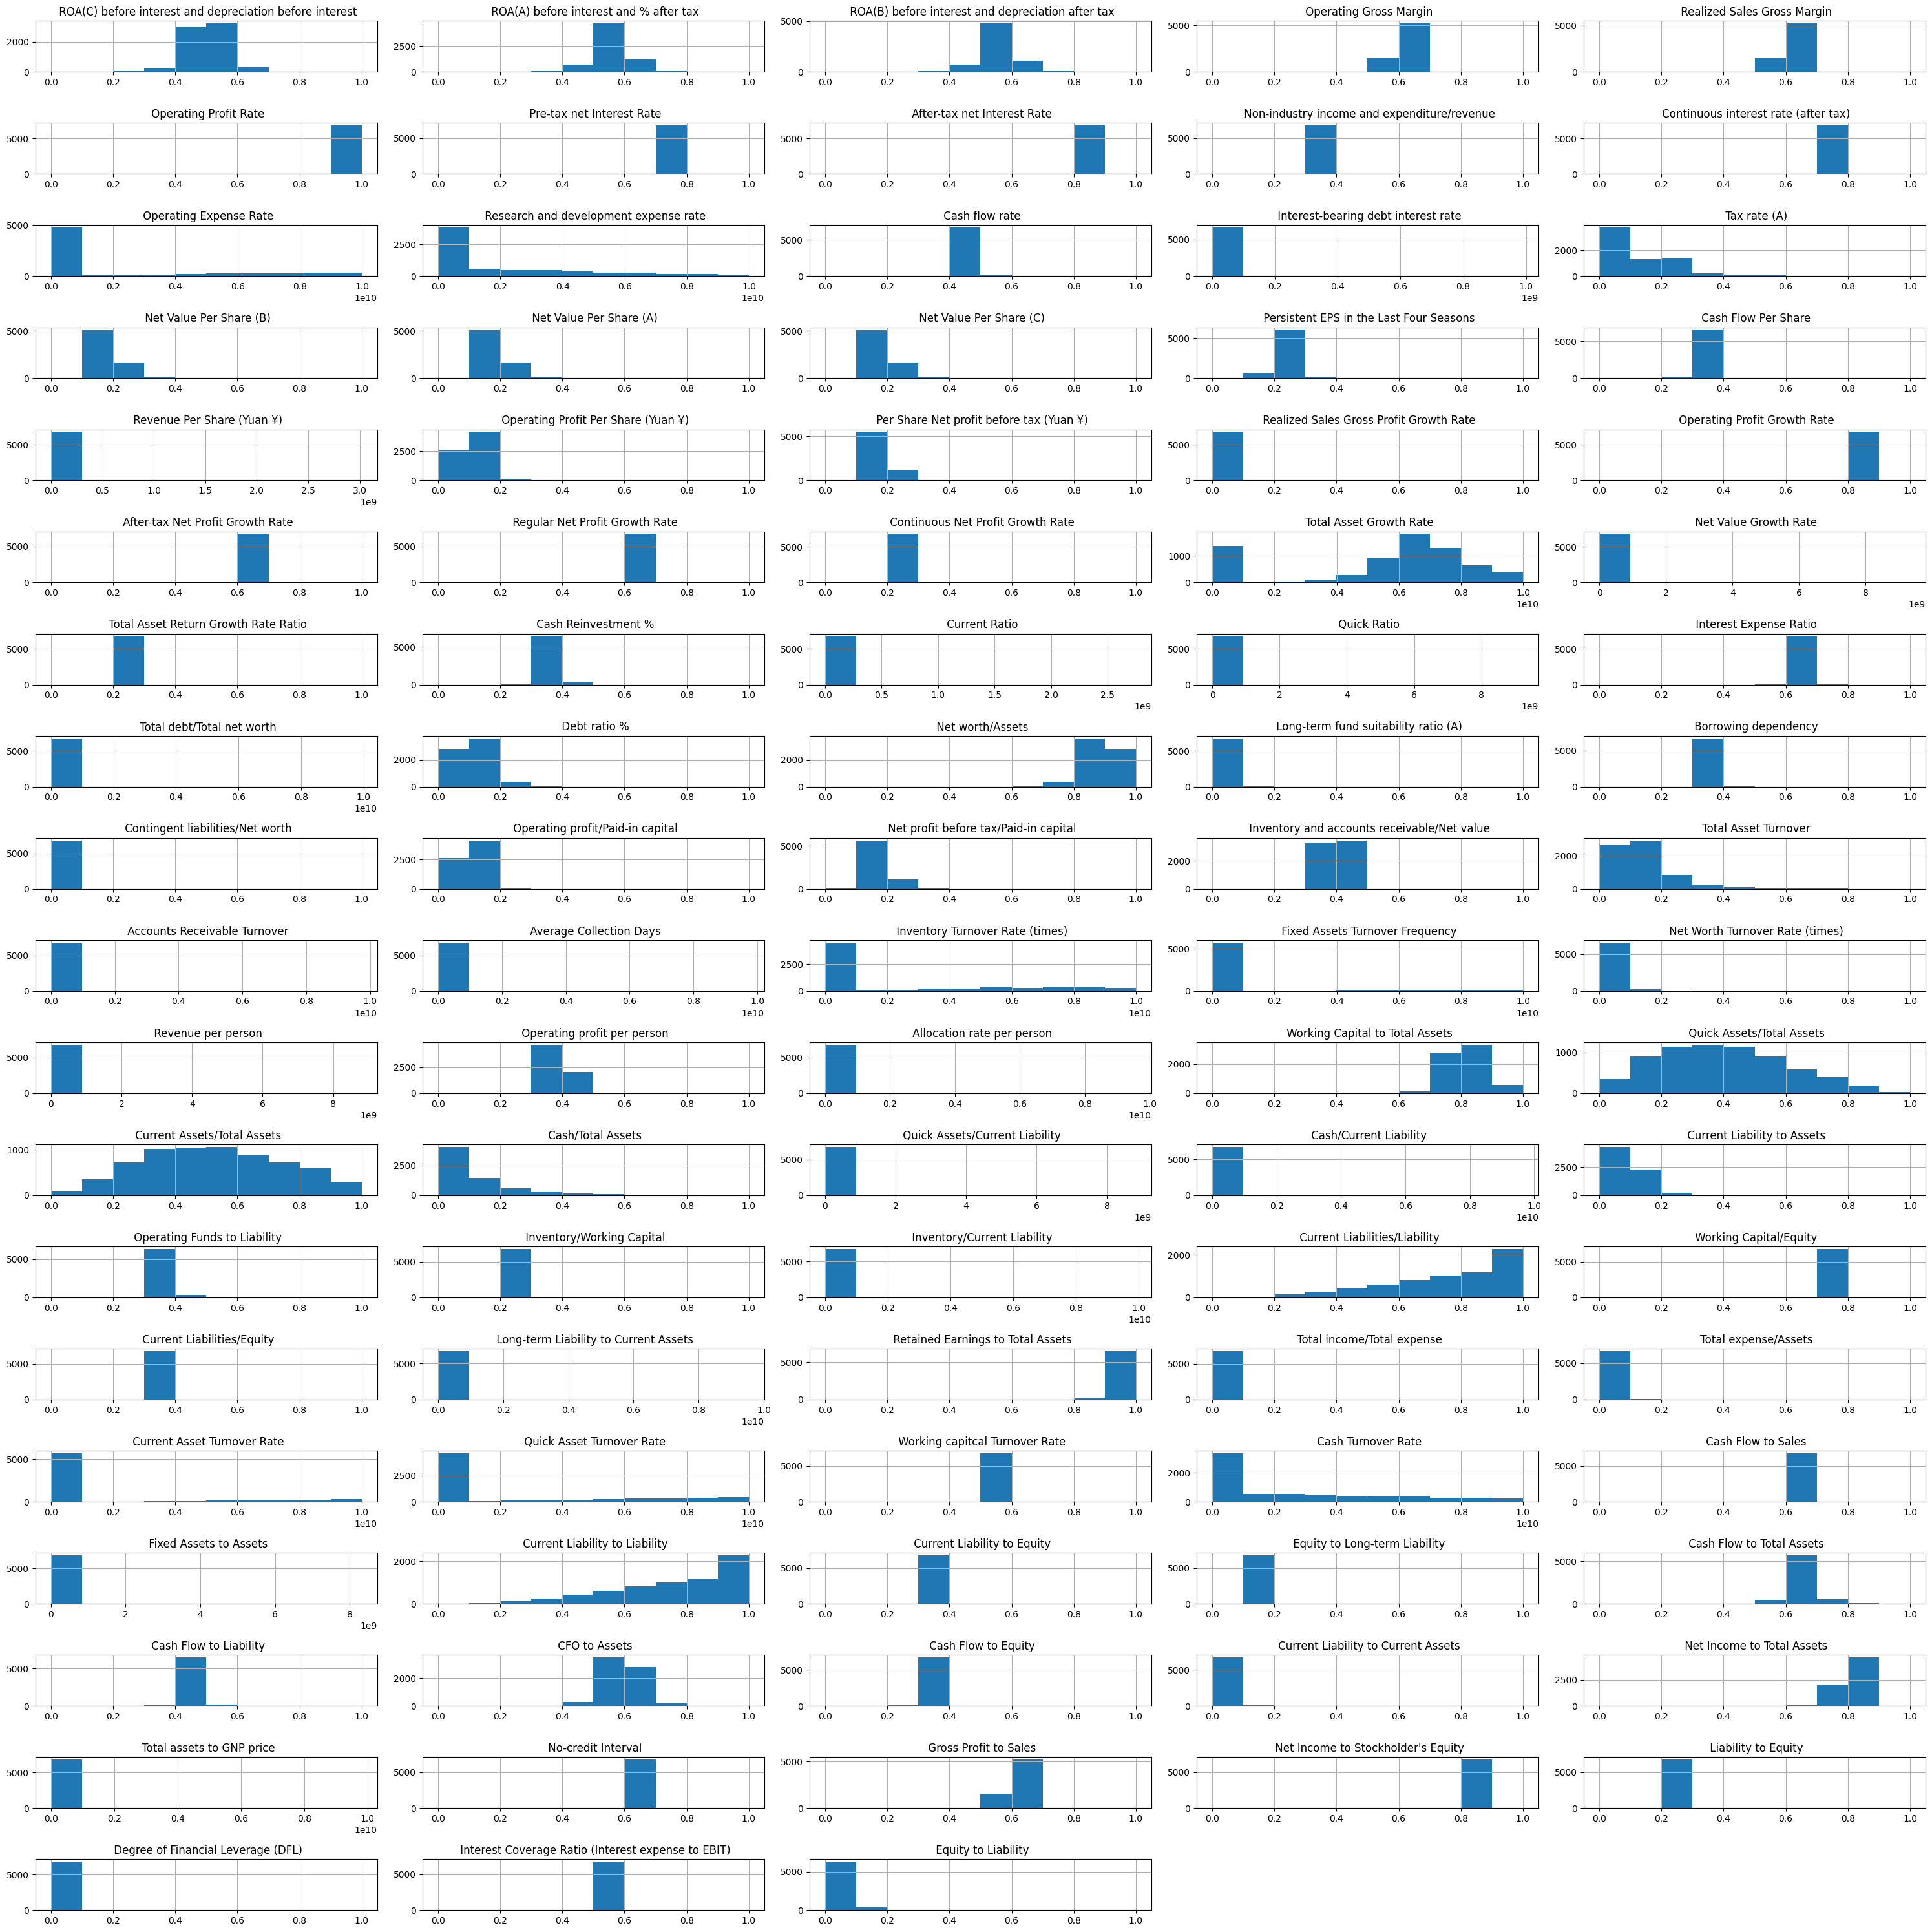

In [44]:
numeric_columns = df.select_dtypes(include=np.number).columns
num_subplots_per_row = 5
num_rows = (len(numeric_columns) - 1) // num_subplots_per_row + 1

figure = plt.figure(figsize=(30, 30))
for subplot_index, col in enumerate(numeric_columns):
    if subplot_index >= num_subplots_per_row * num_rows:
        break
    figure.add_subplot(num_rows, num_subplots_per_row, subplot_index + 1)
    df[col].hist()
    plt.title(col)
plt.tight_layout()
plt.show()


Por fim, montamos histogramas para cada uma das variáveis numéricas do dataset. A partir deles, podemos observar que as variáveis possuem distribuições bastante assimétricas, com caudas longas e valores extremos. Isso pode ser um problema para a aplicação de modelos de aprendizado de máquina, que podem ser sensíveis a outliers e distribuições assimétricas. Algumas poucas variáveis parecem seguir distribuições mais simétricas, mas a maioria delas apresenta distribuições assimétricas. Além disso, parece que algumas variáveis tendem a ter valores concentrados em torno de um valor específico, com pouca variação. Isso pode ser um problema para a aplicação de modelos de aprendizado de máquina, que podem ter dificuldades em encontrar padrões em variáveis com pouca variação.

# 6. Distribuição dos dados categóricos

# 7. Análise temporal dos dados